<span style="font-family: Century Gothic"> Load libraries</span>


In [2]:
import pandas as pd
import openpyxl
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import winsorize
import random

### <span style="font-family: Century Gothic"> Load and Explore the Dataset</span>

- <span style="font-family: Century Gothic"> Initial exploration to understand the structure, features, and potential issues </span>
- <span style="font-family: Century Gothic">Use libraries like Pandas to load the dataset.</span>
- <span style="font-family: Century Gothic">Check the size of the dataset (number of rows and columns).</span>
- <span style="font-family: Century Gothic">Inspect the first few rows to understand the features and their formats.</span>

In [3]:
# Load the dataset
df_fMRI = pd.read_csv('Data/FUNCTIONAL_CONNECTOME_MATRICES.csv')

df_labels = pd.read_excel('Data/LABELS.xlsx')
df_metaA = pd.read_excel('Data/METADATA_A.xlsx')
df_metaB = pd.read_excel('Data/METADATA_b.xlsx')
df_dictionary = pd.read_excel('Data Dictionary.xlsx')

### <span style="font-family: Century Gothic"> Data Dictionary</span>
#### <p style="font-family: Century Gothic; font-size: 15px">Purpose: Understand the variables in the dataset.</p>

- <span style="font-family: Century Gothic; font-size: 15px"> Inspect the file to see how variables are described.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Identify key variables.</span>

In [4]:
# Inspect the first few rows
df_dictionary.head(2)

DataType  Instrument           Field     Description Type Labels
0  METADATA A         NaN             NaN             NaN  NaN    NaN
1         NaN  Identifier  participant_id  Participant ID  str    NaN

In [5]:
df_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DataType     32 non-null     object
 1   Instrument   31 non-null     object
 2   Field        31 non-null     object
 3   Description  31 non-null     object
 4   Type         31 non-null     object
 5   Labels       11 non-null     object
dtypes: object(6)
memory usage: 1.9+ KB


In [6]:
df_dictionary.describe()

DataType                               Instrument           Field  \
count             32                                       31              31   
unique             6                                       11              30   
top     Quantitative  Strength and Difficulties Questionnaire  participant_id   
freq              18                                        9               2   

           Description Type                                             Labels  
count               31   31                                                 11  
unique              30    4                                                  9  
top     Participant ID  int  0=Homemaker, stay at home parent.\n5=Day labor...  
freq                 2   17                                                  2

In [7]:
df_dictionary.DataType.value_counts()

DataType
Quantitative    18
Categorical      9
Target           2
METADATA A       1
METADATA B       1
TARGETS          1
Name: count, dtype: int64

In [8]:
df_dictionary_copy = df_dictionary.copy()

# Filter rows by DataType
df_dictionary_meta_a = df_dictionary_copy[df_dictionary_copy['DataType'] == 'Quantitative']
df_dictionary_meta_b = df_dictionary_copy[df_dictionary_copy['DataType'] == 'Categorical ']
df_dictionary_target = df_dictionary_copy[df_dictionary_copy['DataType'] == 'Target']

In [9]:
df_dictionary_target

DataType                    Instrument         Field         Description  \
35   Target           Diagnosis:ADHD_type  ADHD_Outcome   Type of Diagnosis   
36   Target  Demographics:Basic_Demos,Sex         Sex_F  Sex of participant   

               Type                 Labels  
35              str  0= Other/None, 1=ADHD  
36  categorical int       0=Male\n1=Female

### <span style="font-family: Century Gothic">Labels</span>
#### <p style="font-family: Century Gothic; font-size: 15px">Purpose: Contains the target variables.</p>
- <span style="font-family: Century Gothic; font-size: 15px">Check the structure of the file.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Identify the columns for ADHD diagnosis and sex.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Check for missing values or inconsistencies.</span>

#### <p style="font-family: Century Gothic; font-size: 15px">Check Data Structure.</p>

In [10]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


In [11]:
df_labels.head(3)

participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0

In [12]:
df_labels.shape

(1213, 3)

#### <p style="font-family: Century Gothic; font-size: 15px">Check for Missing Values.</p>

In [13]:
df_labels.isnull().sum()

participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64

#### <p style="font-family: Century Gothic; font-size: 15px">Summary Statistics.</p>

In [14]:
df_labels.describe()

ADHD_Outcome        Sex_F
count   1213.000000  1213.000000
mean       0.685078     0.342951
std        0.464676     0.474891
min        0.000000     0.000000
25%        0.000000     0.000000
50%        1.000000     0.000000
75%        1.000000     1.000000
max        1.000000     1.000000

#### <p style="font-family: Century Gothic; font-size: 15px">Check Unique Values.</p>

In [15]:
df_labels.nunique()

participant_id    1213
ADHD_Outcome         2
Sex_F                2
dtype: int64

#### <p style="font-family: Century Gothic; font-size: 15px">Explore Class Distribution</p>

In [16]:
# 0= Other/None, 1=ADHD
df_labels.ADHD_Outcome.value_counts()

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

In [17]:
# 0=Male, 1=Female
df_labels.Sex_F.value_counts()

Sex_F
0    797
1    416
Name: count, dtype: int64

In [18]:
# This code snippet is filtering a DataFrame `df_labels` to select rows where the "ADHD_Outcome" column has a value of 1 (indicating ADHD) and the "Sex_F" column has a value of 0 (indicating male gender).

df_male_with_adhd = df_labels[(df_labels["ADHD_Outcome"] == 1) & (df_labels["Sex_F"] == 0)]
df_male_with_adhd.shape

(581, 3)

In [19]:
# This code snippet is filtering a DataFrame `df_labels` to select rows where the "ADHD_Outcome" column has a value of 1 (indicating ADHD) and the "Sex_F" column has a value of 1 (indicating female gender).

df_female_with_adhd = df_labels[(df_labels["ADHD_Outcome"] == 1) & (df_labels["Sex_F"] == 1)]
df_female_with_adhd.shape

(250, 3)

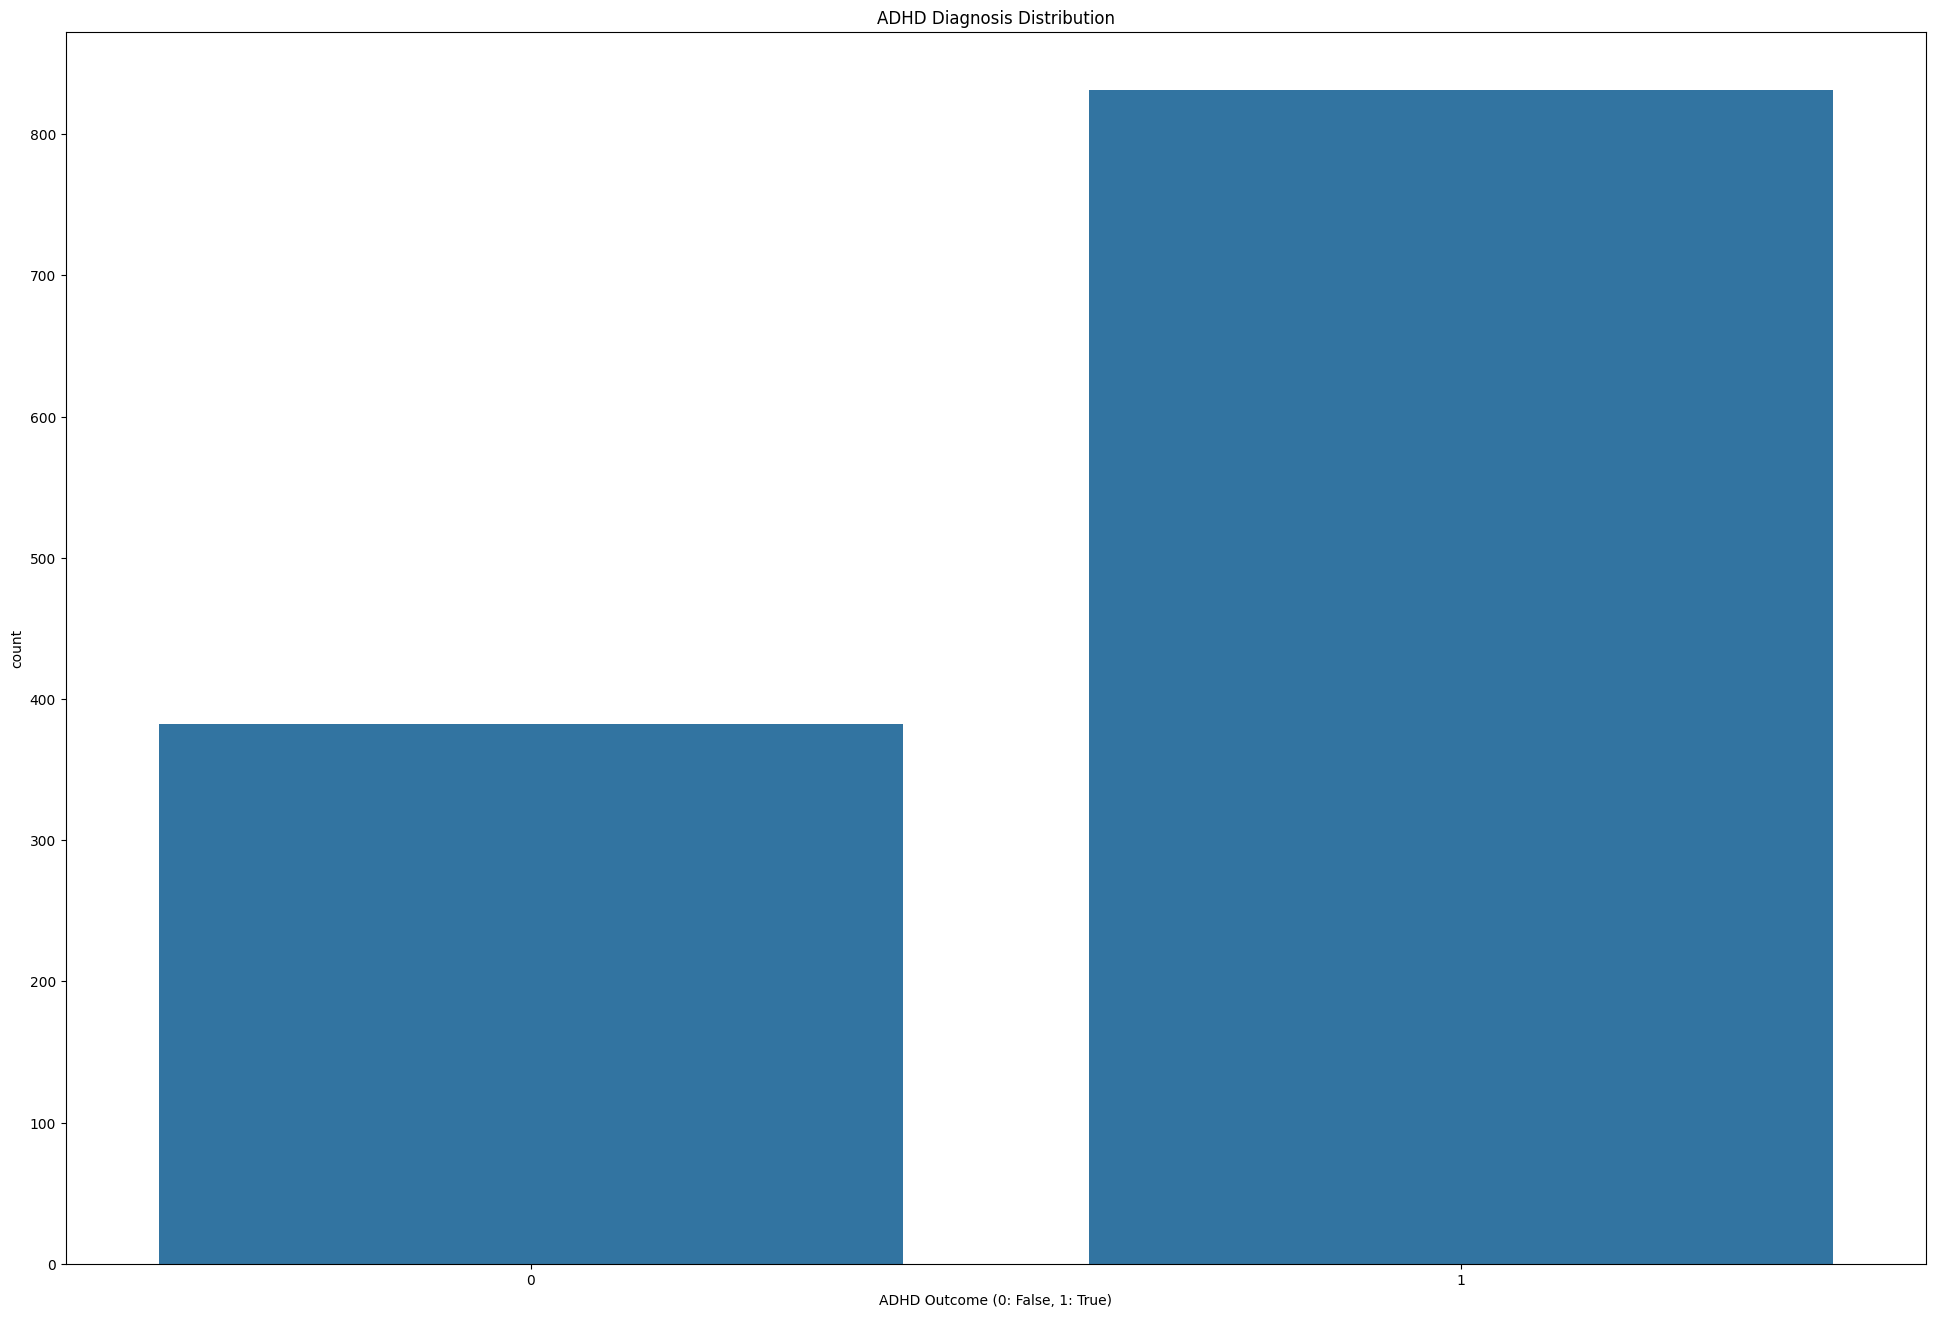

In [20]:
plt.figure(figsize=(24, 16))
sns.countplot(x='ADHD_Outcome', data=df_labels)
plt.title("ADHD Diagnosis Distribution")
plt.xlabel('ADHD Outcome (0: False, 1: True)')
plt.show()

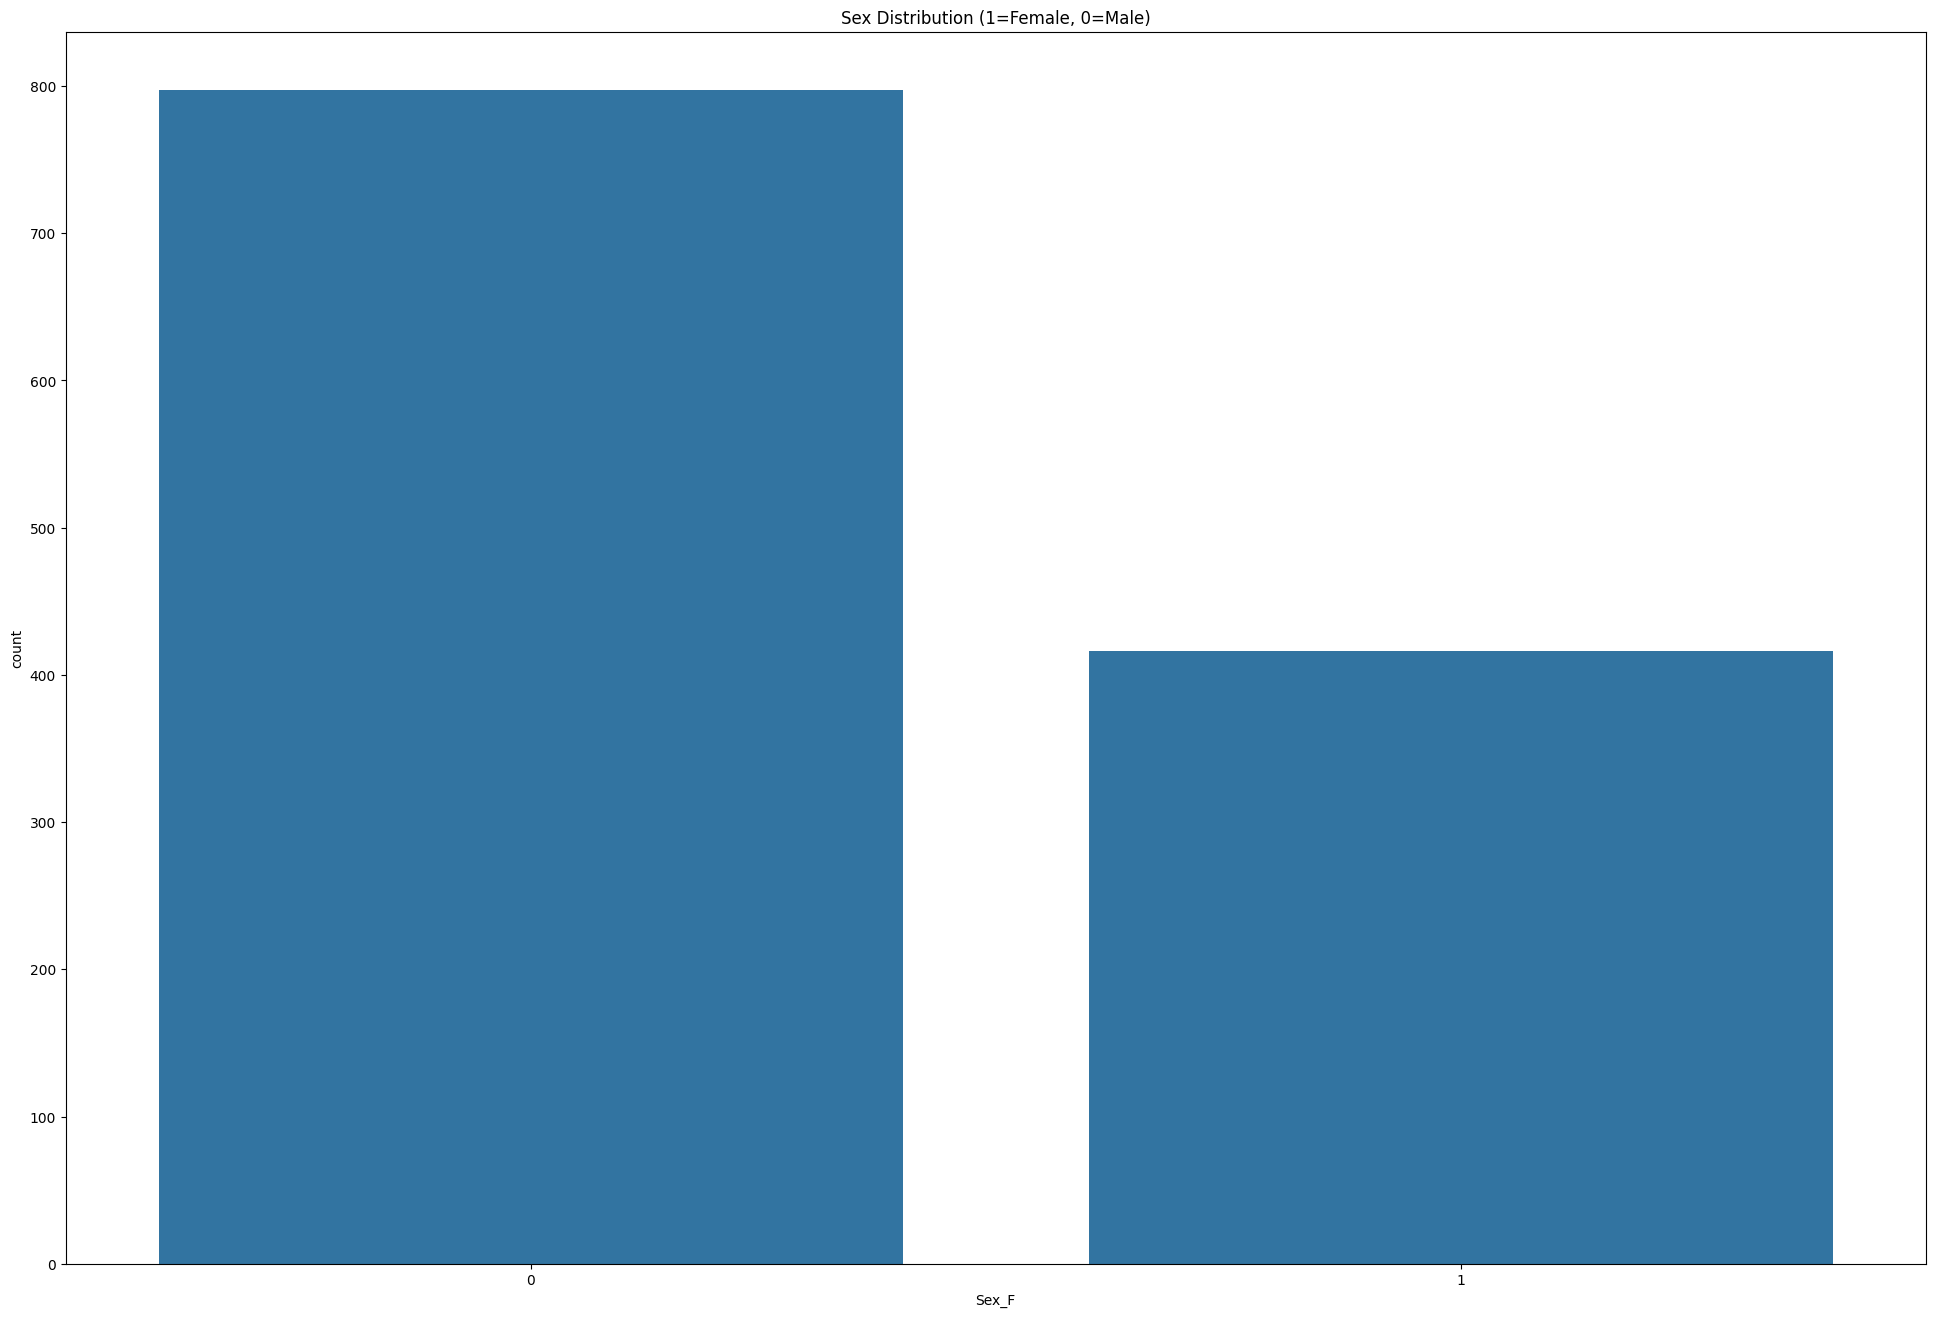

In [21]:
plt.figure(figsize=(24, 16))
sns.countplot(x='Sex_F', data=df_labels)
plt.title("Sex Distribution (1=Female, 0=Male)")
plt.show()

#### <p style="font-family: Century Gothic; font-size: 15px">Cross-Check ADHD and Sex Distributions</p>

- <p style="font-family: Century Gothic; font-size: 15px">This will give the percentage of ADHD cases for each sex, helping to detect biases.</p>

In [22]:
def labels_crosstab(df: pd.DataFrame):
    crosstab = pd.crosstab(df['Sex_F'], df['ADHD_Outcome'], normalize='index') * 100

    # Rename index and columns
    crosstab.index = ['Male', 'Female']
    crosstab.columns = ['No ADHD', 'ADHD']
    
    return crosstab

In [23]:
labels_crosstab(df_labels)

No ADHD       ADHD
Male    27.101631  72.898369
Female  39.903846  60.096154

<Figure size 2400x1600 with 0 Axes>

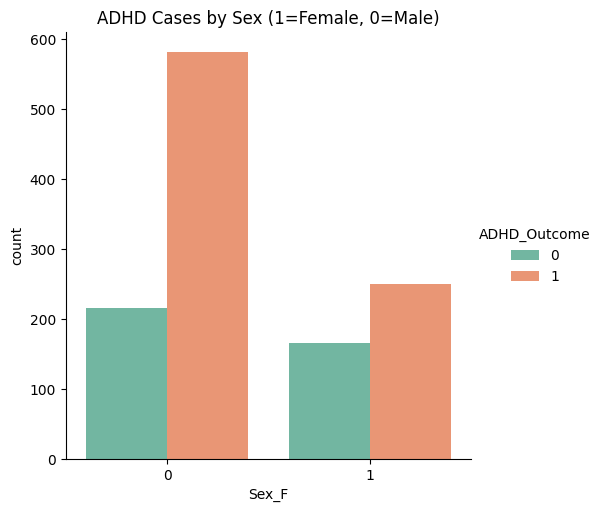

In [24]:
plt.figure(figsize=(24, 16))
sns.catplot(x="Sex_F", hue="ADHD_Outcome", kind="count", data=df_labels, palette="Set2")
plt.title("ADHD Cases by Sex (1=Female, 0=Male)")
plt.show()

##### <span style="font-family: Century Gothic">Primary labels:</span>

- <span style="font-family: Century Gothic; font-size: 15px">`participant_id`: Unique identifier for each individual.</span>
- <span style="font-family: Century Gothic; font-size: 15px">`ADHD_Outcome`: Binary label (1 = ADHD diagnosis, 0 = no diagnosis).</span>
- <span style="font-family: Century Gothic; font-size: 15px">`Sex_F`: Binary feature for sex (1 = Female, 0 = Male).</span>

#### <p style="font-family: Century Gothic; font-size: 15px">Conclusion</p>

- <span style="font-family: Century Gothic; font-size: 15px">Sex imbalance? Males dominate the dataset.</span>
- <span style="font-family: Century Gothic; font-size: 15px">ADHD prevalence? More male has ADHD.</span>

### <span style="font-family: Century Gothic">Metadata A</span>
#### <p style="font-family: Century Gothic; font-size: 15px">Purpose: Contains additional metadata about the subjects.</p>
- <span style="font-family: Century Gothic; font-size: 15px">Inspect the files to understand the features.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Check for missing values and inconsistencies.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Merge these files if they contain complementary information.</span>

In [25]:
df_metaA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

#### <p style="font-family: Century Gothic; font-size: 15px">Key Observations</p>

- <span style="font-family: Century Gothic; font-size: 15px">19 columns with different types (float64, int64, object)
.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Missing values in "MRI_Track_Age_at_Scan" (only 853 out of 1213 present)
.</span>
- <span style="font-family: Century Gothic; font-size: 15px">"participant_id" is an identifier and should not be used as a feature.</span>

In [26]:
df_metaA.describe()

EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  \
count    1213.000000           1213.000000     1213.000000     1213.000000   
mean       58.876917             13.164880        3.781533       13.205276   
std        49.855501              2.780624        1.376700        3.811772   
min      -100.000000              0.000000        0.000000        0.000000   
25%        45.600000             14.000000        3.000000       11.000000   
50%        76.670000             14.000000        3.000000       13.000000   
75%        93.400000             14.000000        4.000000       16.000000   
max       100.000000             14.000000       12.000000       28.000000   

       APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  \
count      1213.000000      1213.000000     1213.000000     1213.000000   
mean         39.374279        17.785655       16.393240       25.246496   
std           6.245928         3.764112        5.376994        3.950529   
min           0.000000         0.000000        0.000000        0.000000   
25%          36.000000        16.000000       13.000000       23.000000   
50%          40.000000        18.000000       16.000000       26.000000   
75%          43.000000        20.000000       19.000000       28.000000   
max          50.000000        28.000000       37.000000       30.000000   

       SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
count               1213.000000                 1213.000000   
mean                   2.059357                   12.122836   
std                    2.023322                    6.577207   
min                    0.000000                    0.000000   
25%                    0.000000                    7.000000   
50%                    2.000000                   12.000000   
75%                    3.000000                   17.000000   
max                   10.000000                   34.000000   

       SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
count                 1213.000000            1213.000000   
mean                     2.307502               7.557296   
std                      2.167549               4.166627   
min                      0.000000               0.000000   
25%                      1.000000               4.000000   
50%                      2.000000               7.000000   
75%                      4.000000              10.000000   
max                     10.000000              20.000000   

       SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  \
count                1213.000000            1213.000000   
mean                    4.073372               5.497939   
std                     2.819731               2.836764   
min                     0.000000               0.000000   
25%                     2.000000               4.000000   
50%                     4.000000               6.000000   
75%                     6.000000               8.000000   
max                    10.000000              10.000000   

       SDQ_SDQ_Internalizing  SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  \
count            1213.000000            1213.000000        1213.000000   
mean                4.565540               2.258038           7.683430   
std                 3.519634               2.090414           2.190295   
min                 0.000000               0.000000           0.000000   
25%                 2.000000               0.000000           6.000000   
50%                 4.000000               2.000000           8.000000   
75%                 7.000000               4.000000          10.000000   
max                17.000000               9.000000          10.000000   

       MRI_Track_Age_at_Scan  
count             853.000000  
mean               11.245678  
std                 3.234372  
min                 0.000000  
25%                 8.803901  
50%                10.739219  
75%                13.460871  
max                21.564453

In [27]:
df_metaA.shape

(1213, 19)

In [28]:
df_metaA.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   UmrK0vMLopoR          40.00                    13               3   
1   CPaeQkhcjg7d         -94.47                    14               3   
2   Nb4EetVPm3gs         -46.67                    14               4   
3   p4vPhVu91o4b         -26.68                    10               5   
4   M09PXs7arQ5E           0.00                    14               5   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0              10               47               13              11   
1              13               34               18              23   
2              10               35               16              10   
3              12               39               19              16   
4              15               40               20              24   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0              28                         0                           6   
1              30                         0                          18   
2              29                         1                          14   
3              28                         6                          24   
4              28                         1                          18   

   SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
0                           1                      5   
1                           6                      8   
2                           2                      8   
3                           4                     16   
4                           4                     11   

   SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
0                          0                      5                      1   
1                          7                      8                     10   
2                          5                      7                      6   
3                          9                     10                      8   
4                          4                     10                      7   

   SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  MRI_Track_Age_at_Scan  
0                      0                 10                    NaN  
1                      4                  5                    NaN  
2                      4                  9               8.239904  
3                      4                  6                    NaN  
4                      3                  9               8.940679

In [29]:
df_metaA.isnull().sum()

participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64

Null values would be handled in the Cleaning and Preprocessing Section

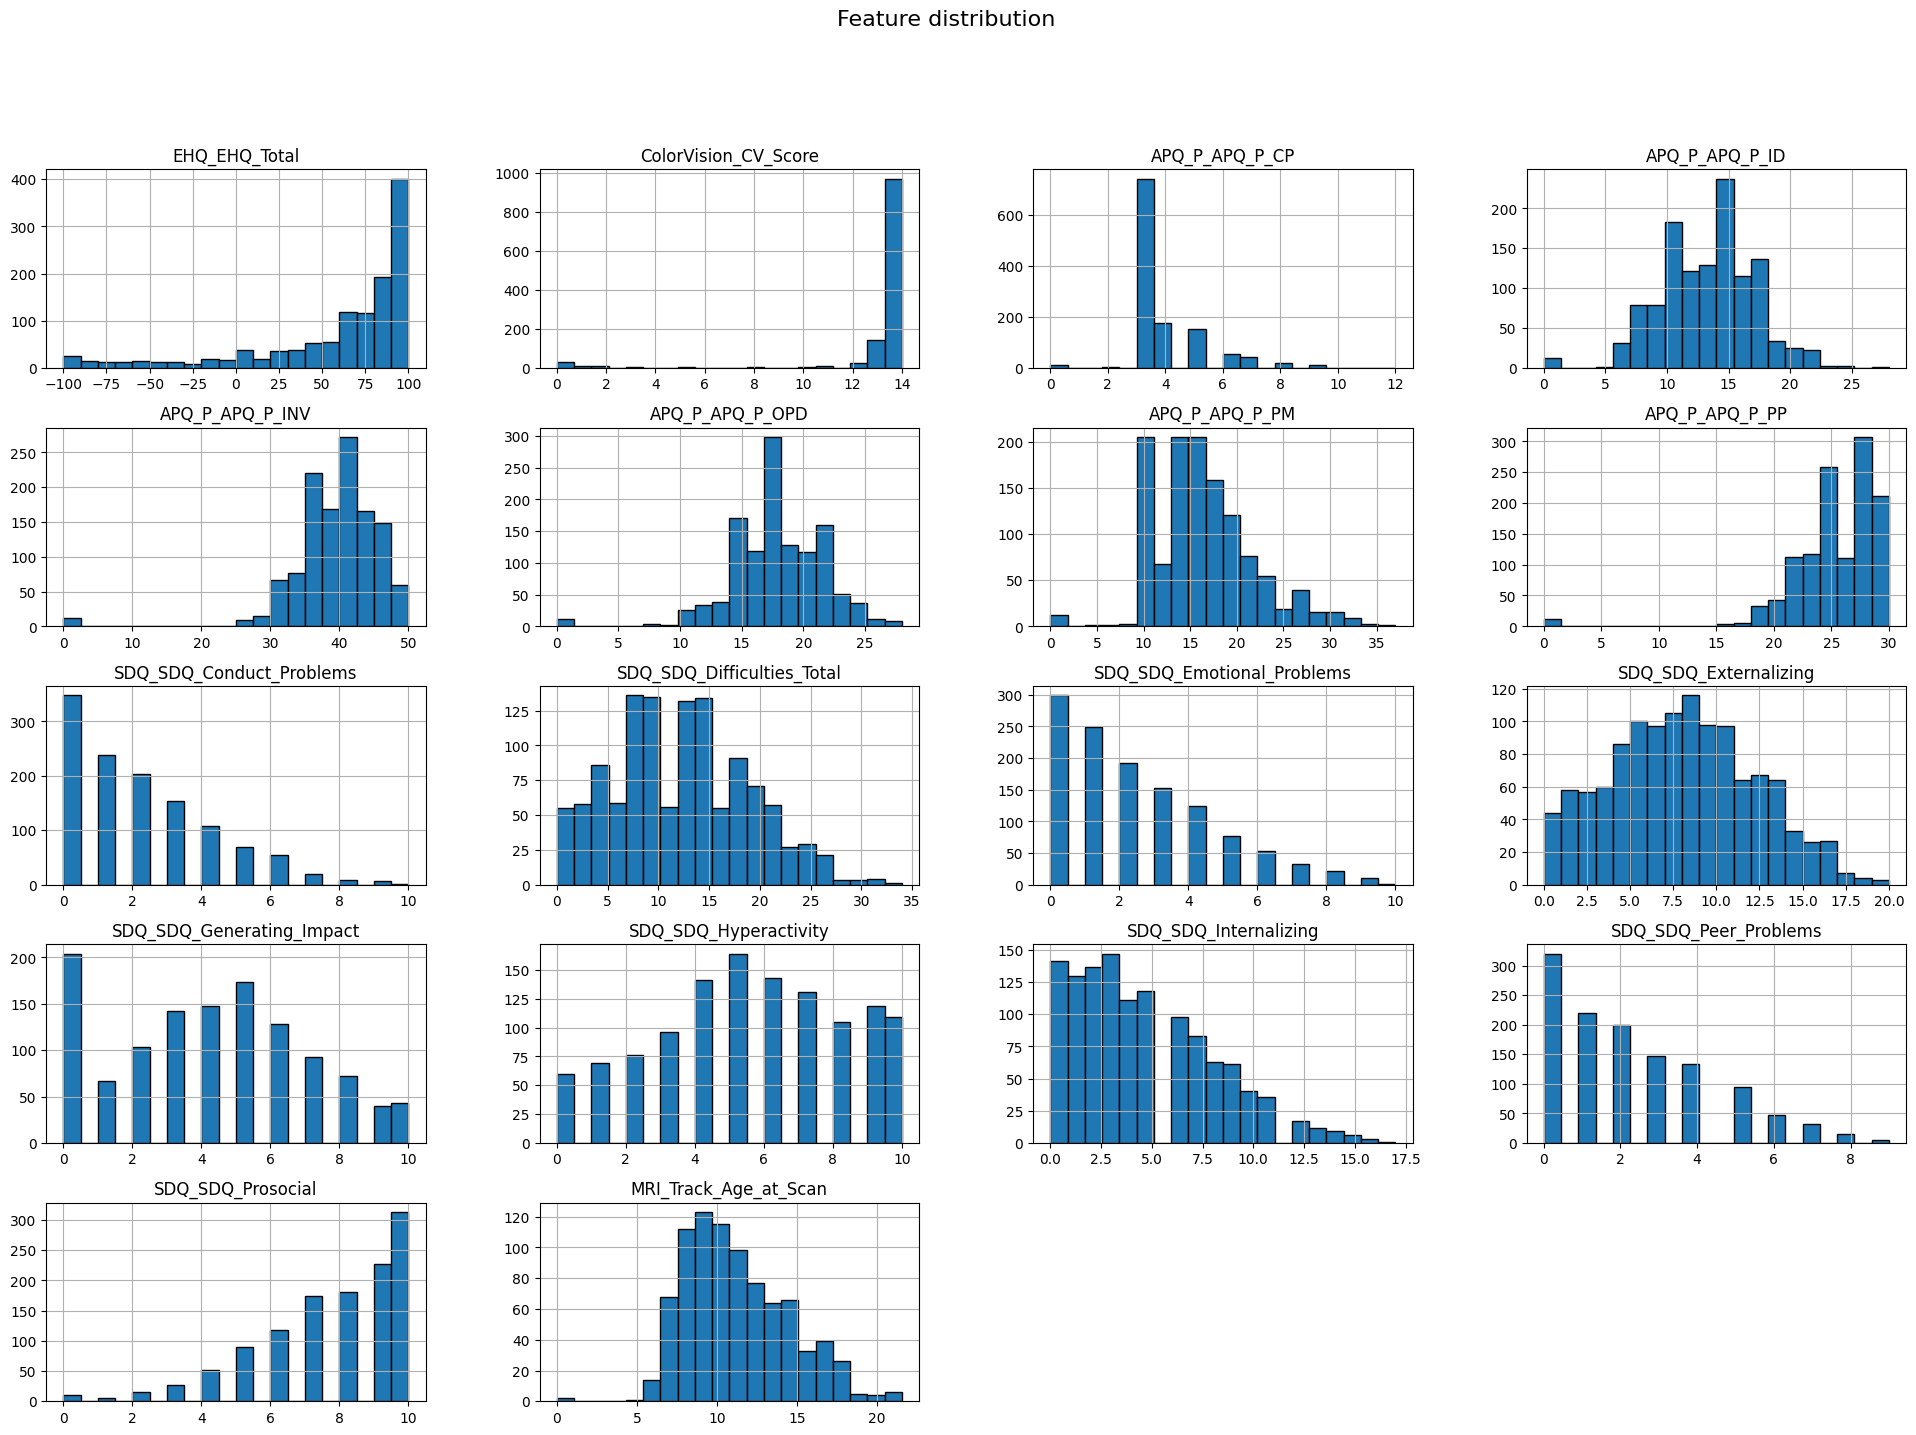

In [30]:
df_metaA.hist(figsize=(24,16), bins=20, edgecolor='black')
plt.suptitle('Feature distribution', fontsize=16)
plt.show()

In [31]:
# Set visualization style
sns.set(style="whitegrid")

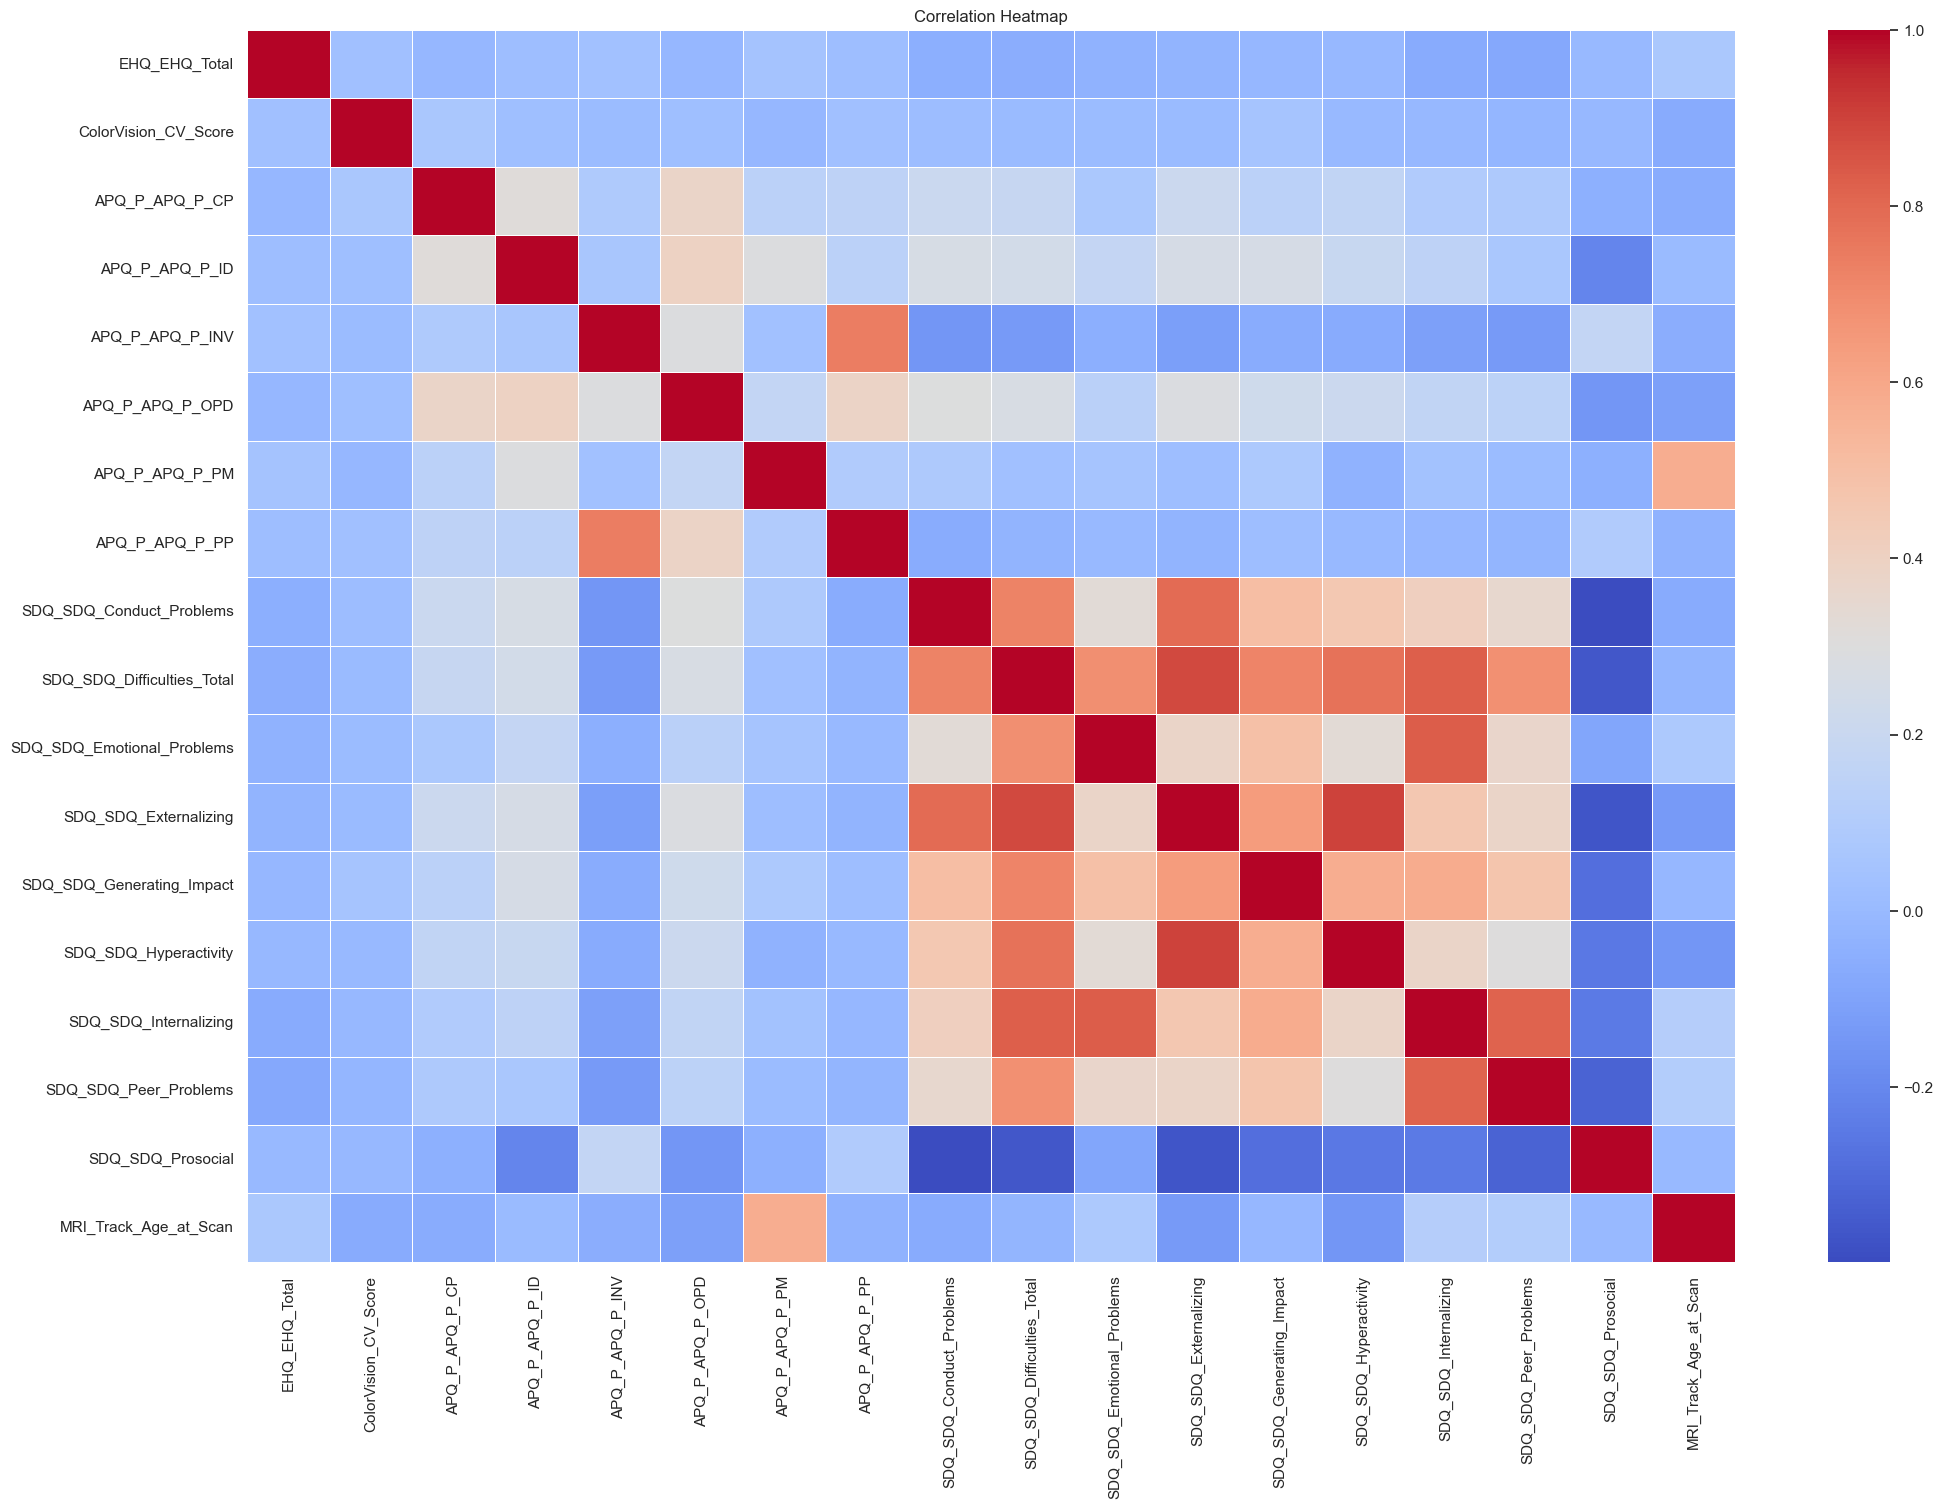

In [32]:
df_plot = df_metaA.copy()
df_plot = df_plot.drop(columns=['participant_id'])

plt.figure(figsize=(24, 16))
sns.heatmap(df_plot.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

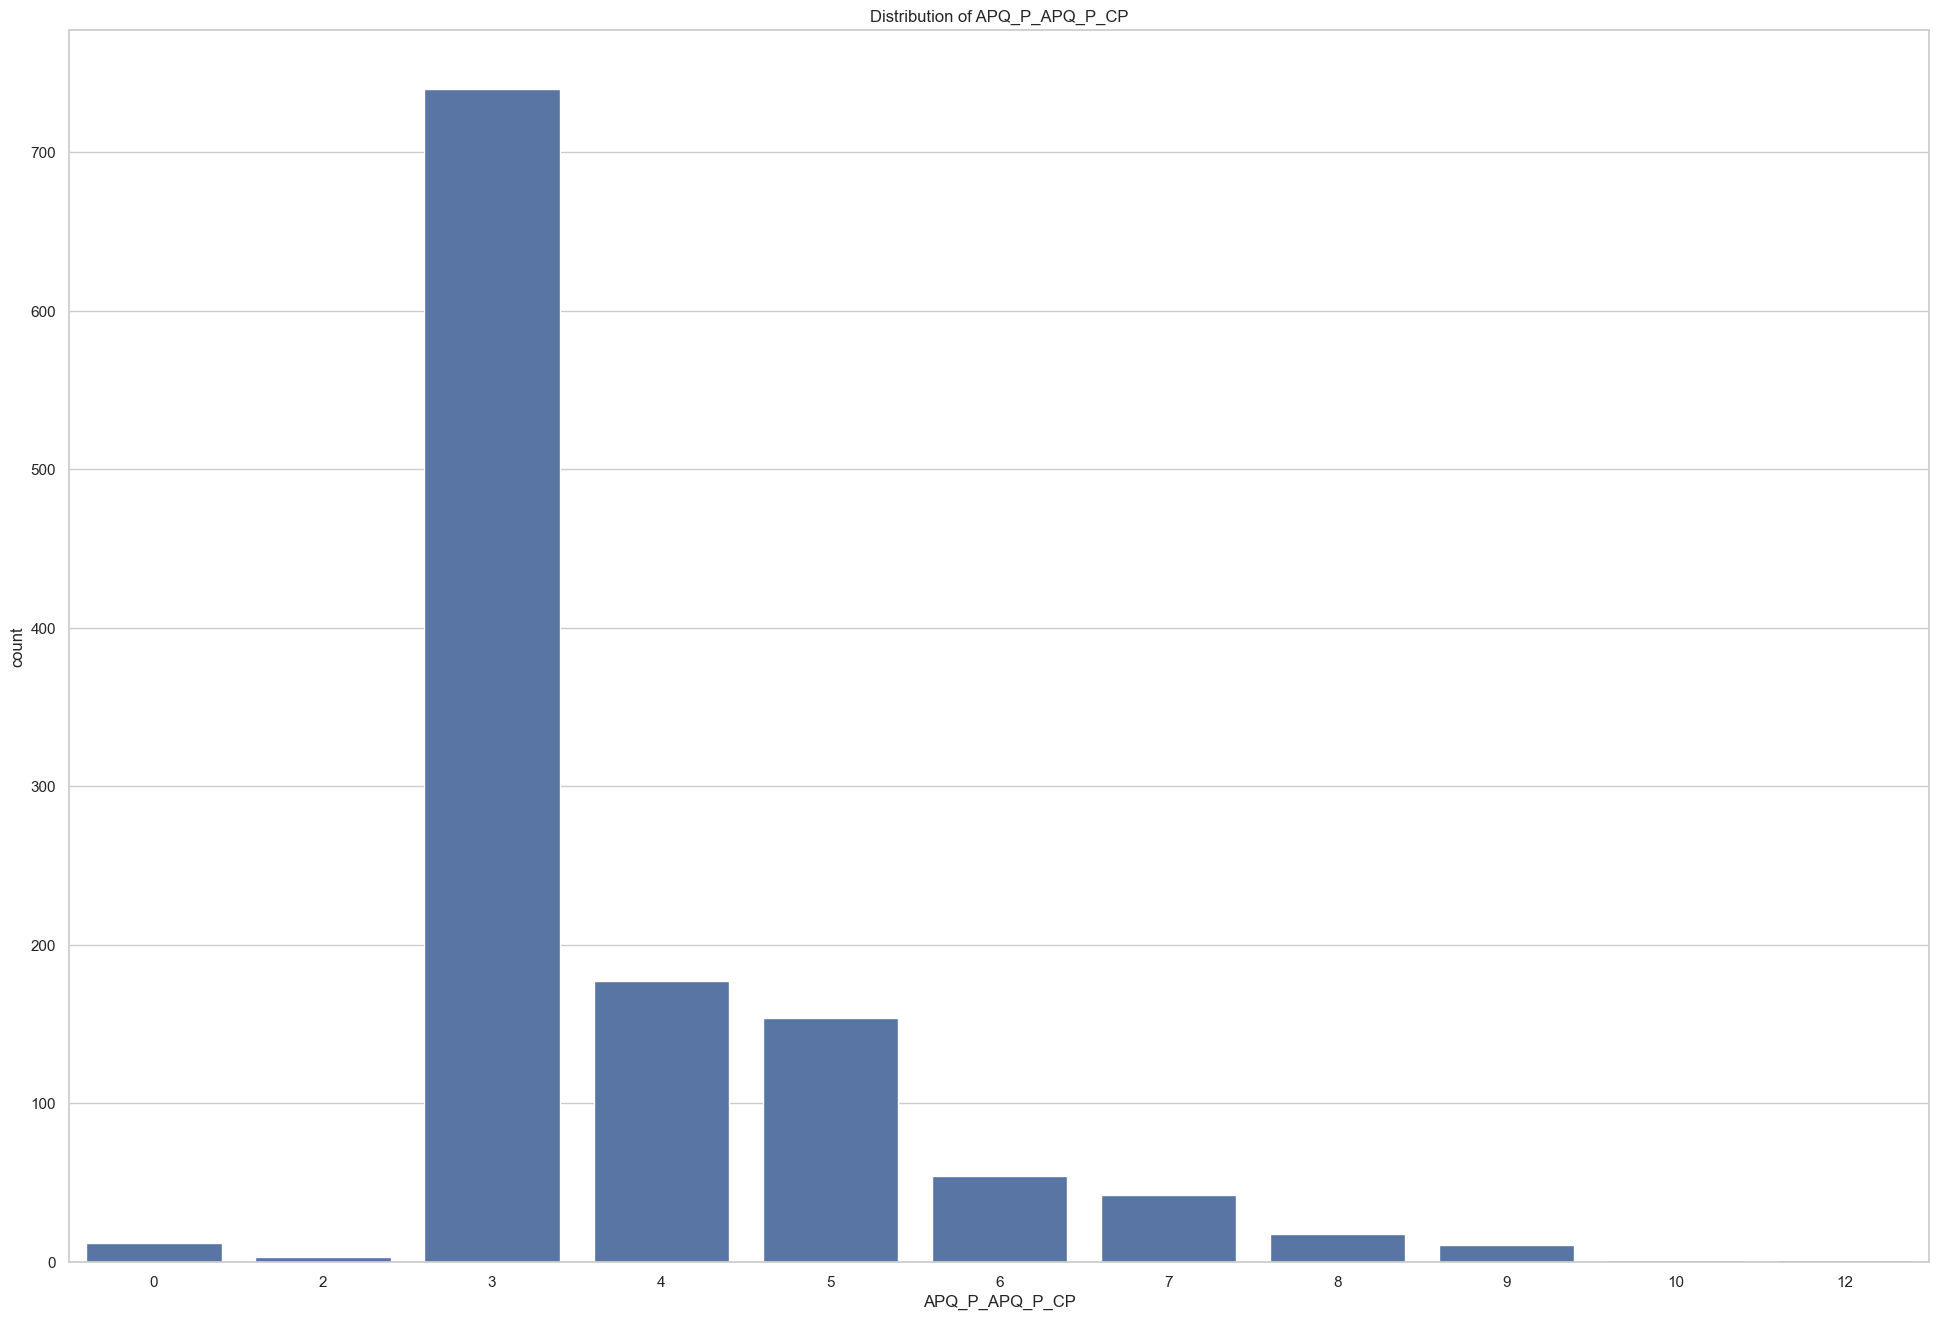

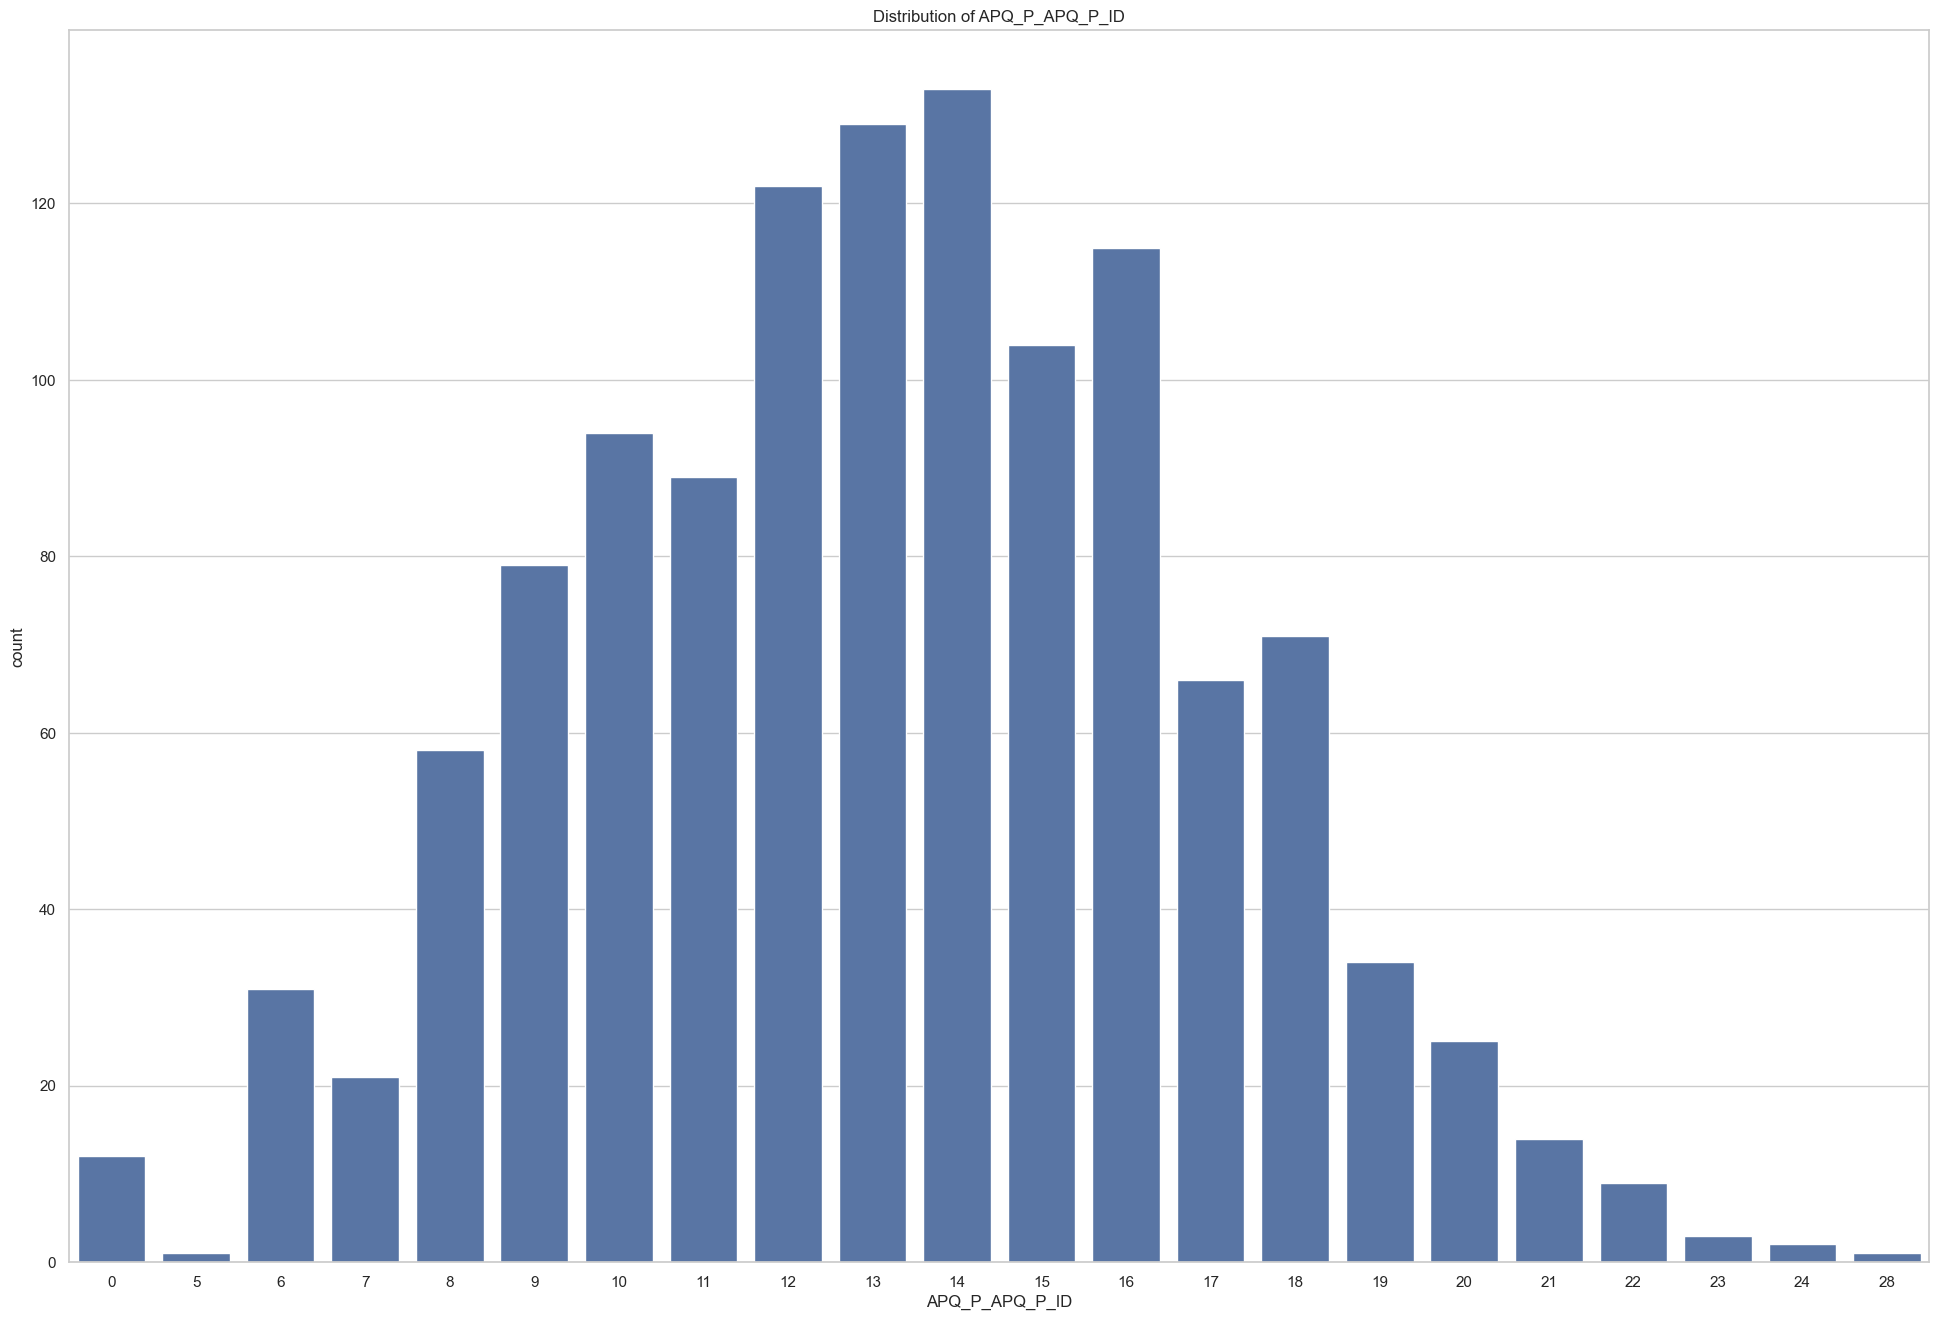

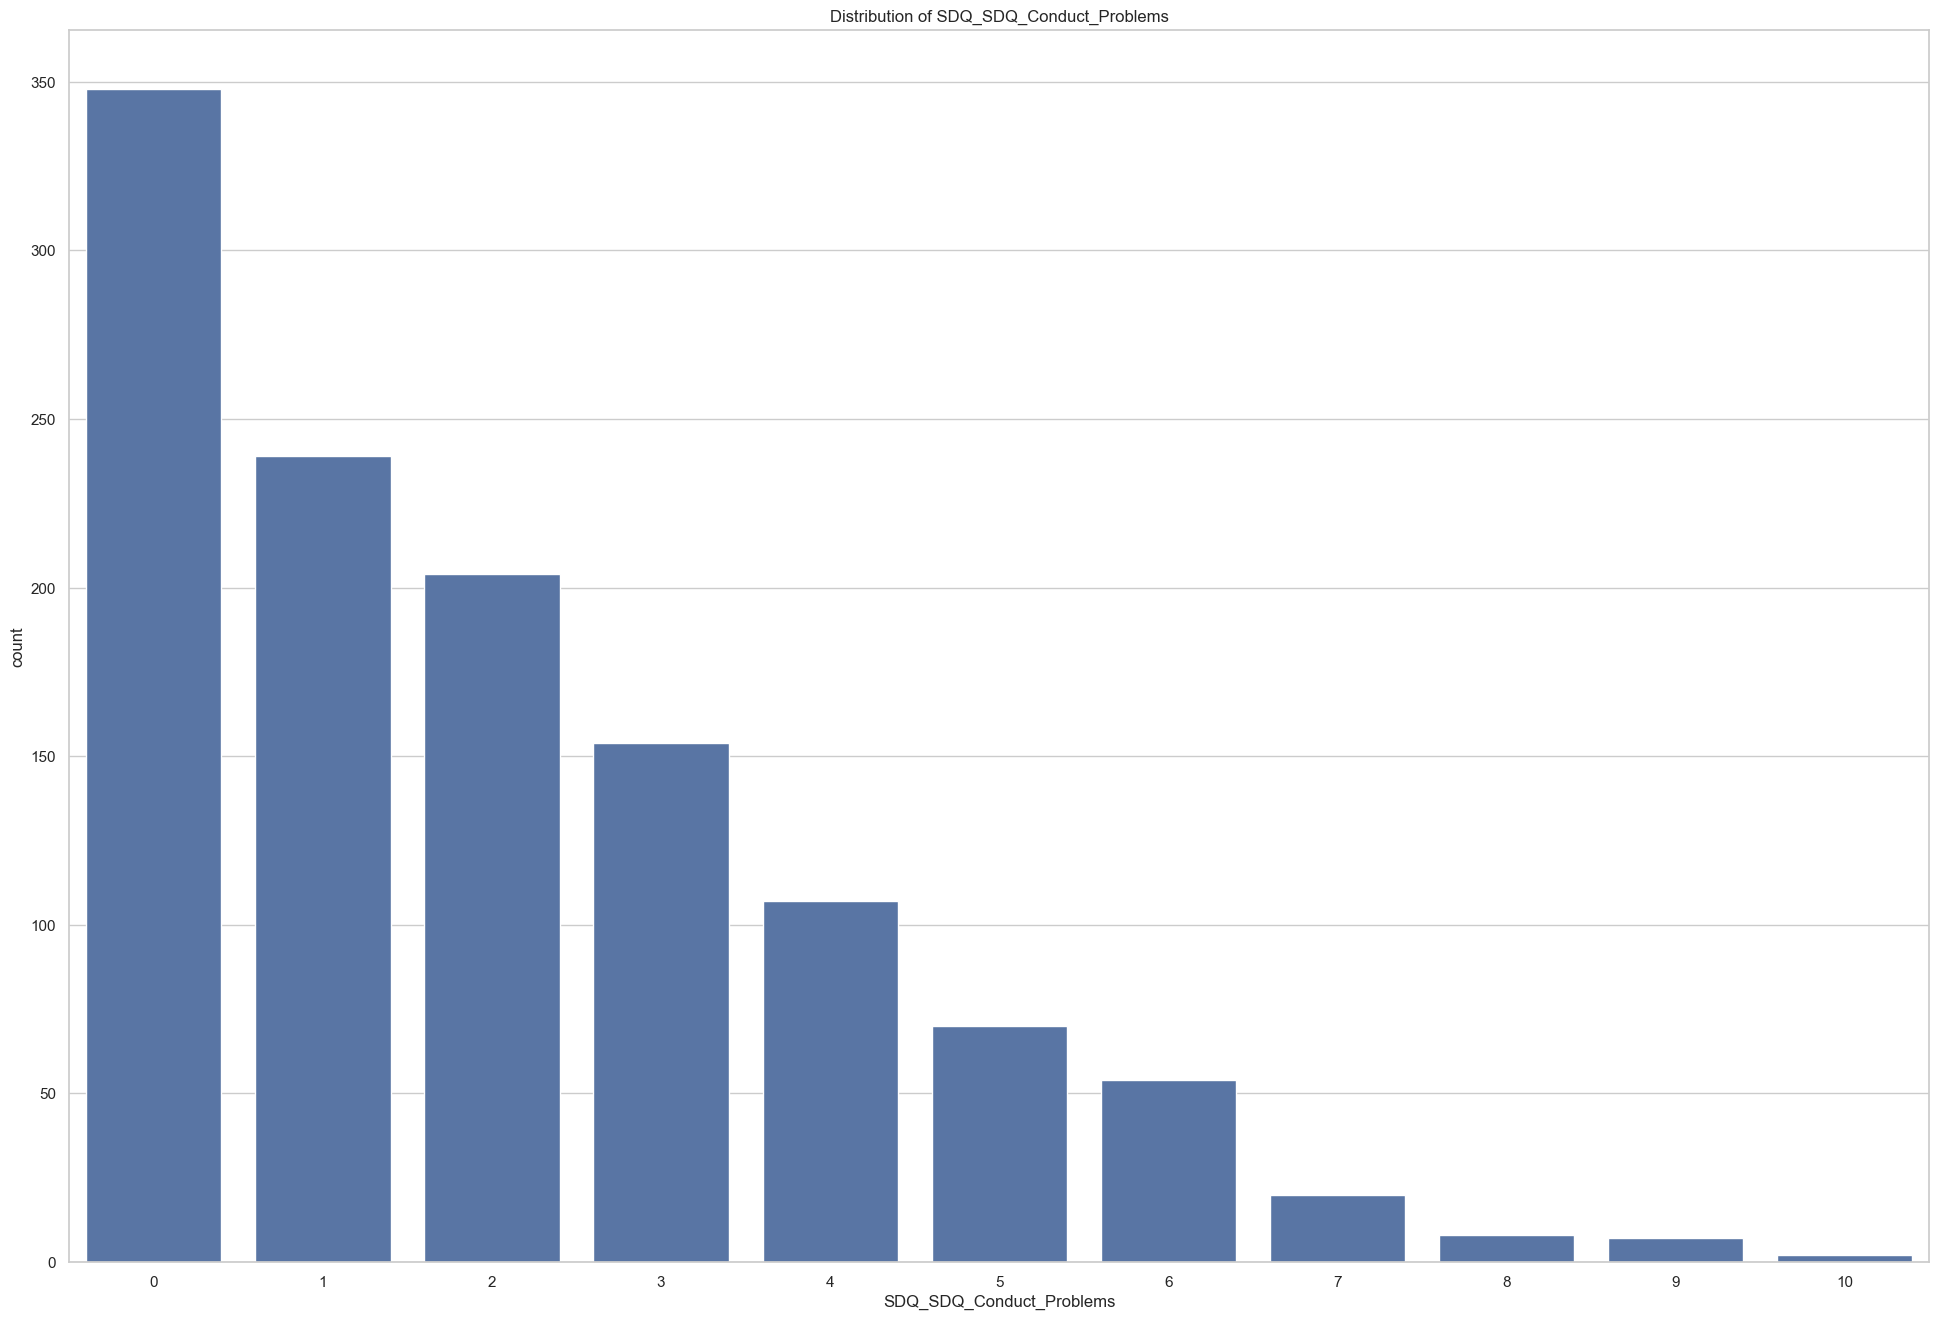

In [33]:
possible_categorical_features = ['APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'SDQ_SDQ_Conduct_Problems']
for col in possible_categorical_features:
    plt.figure(figsize=(24, 16))
    sns.countplot(x=col, data=df_metaA)
    plt.title(f'Distribution of {col}')
    plt.show()


In [34]:
def feature_relationship(df: pd.DataFrame, label: str ):
    for col in df.columns[1:]:  # Exclude participant_id
        plt.figure(figsize=(24, 16))
        sns.boxplot(x=df_labels[label], y=df[col])
        plt.title(f"{col} vs {str}")
        plt.show()

#### <p style="font-family: Century Gothic; font-size: 15px">Feature Relationships with Labels</p>

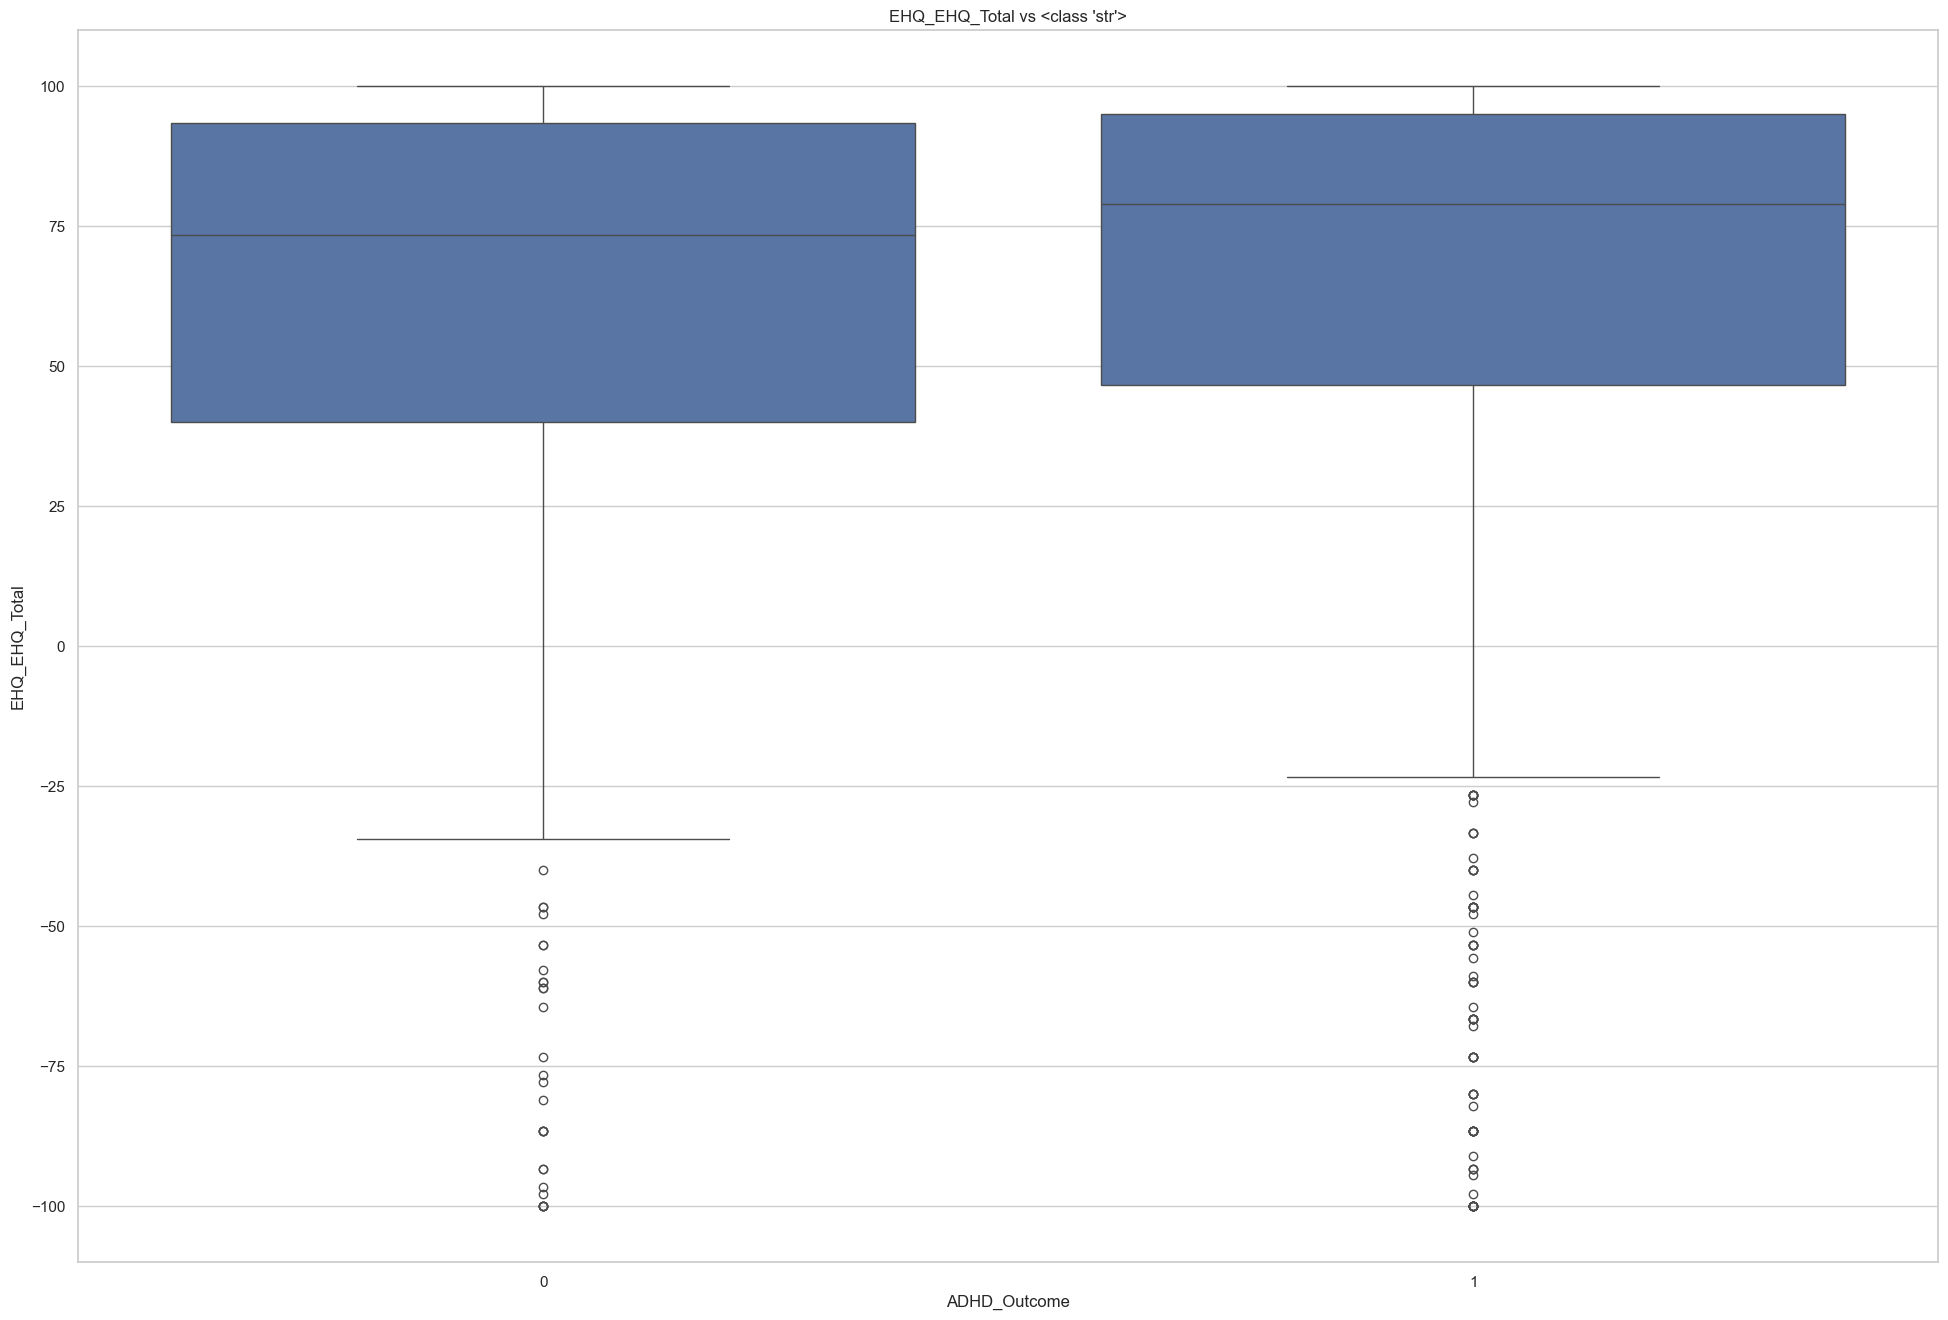

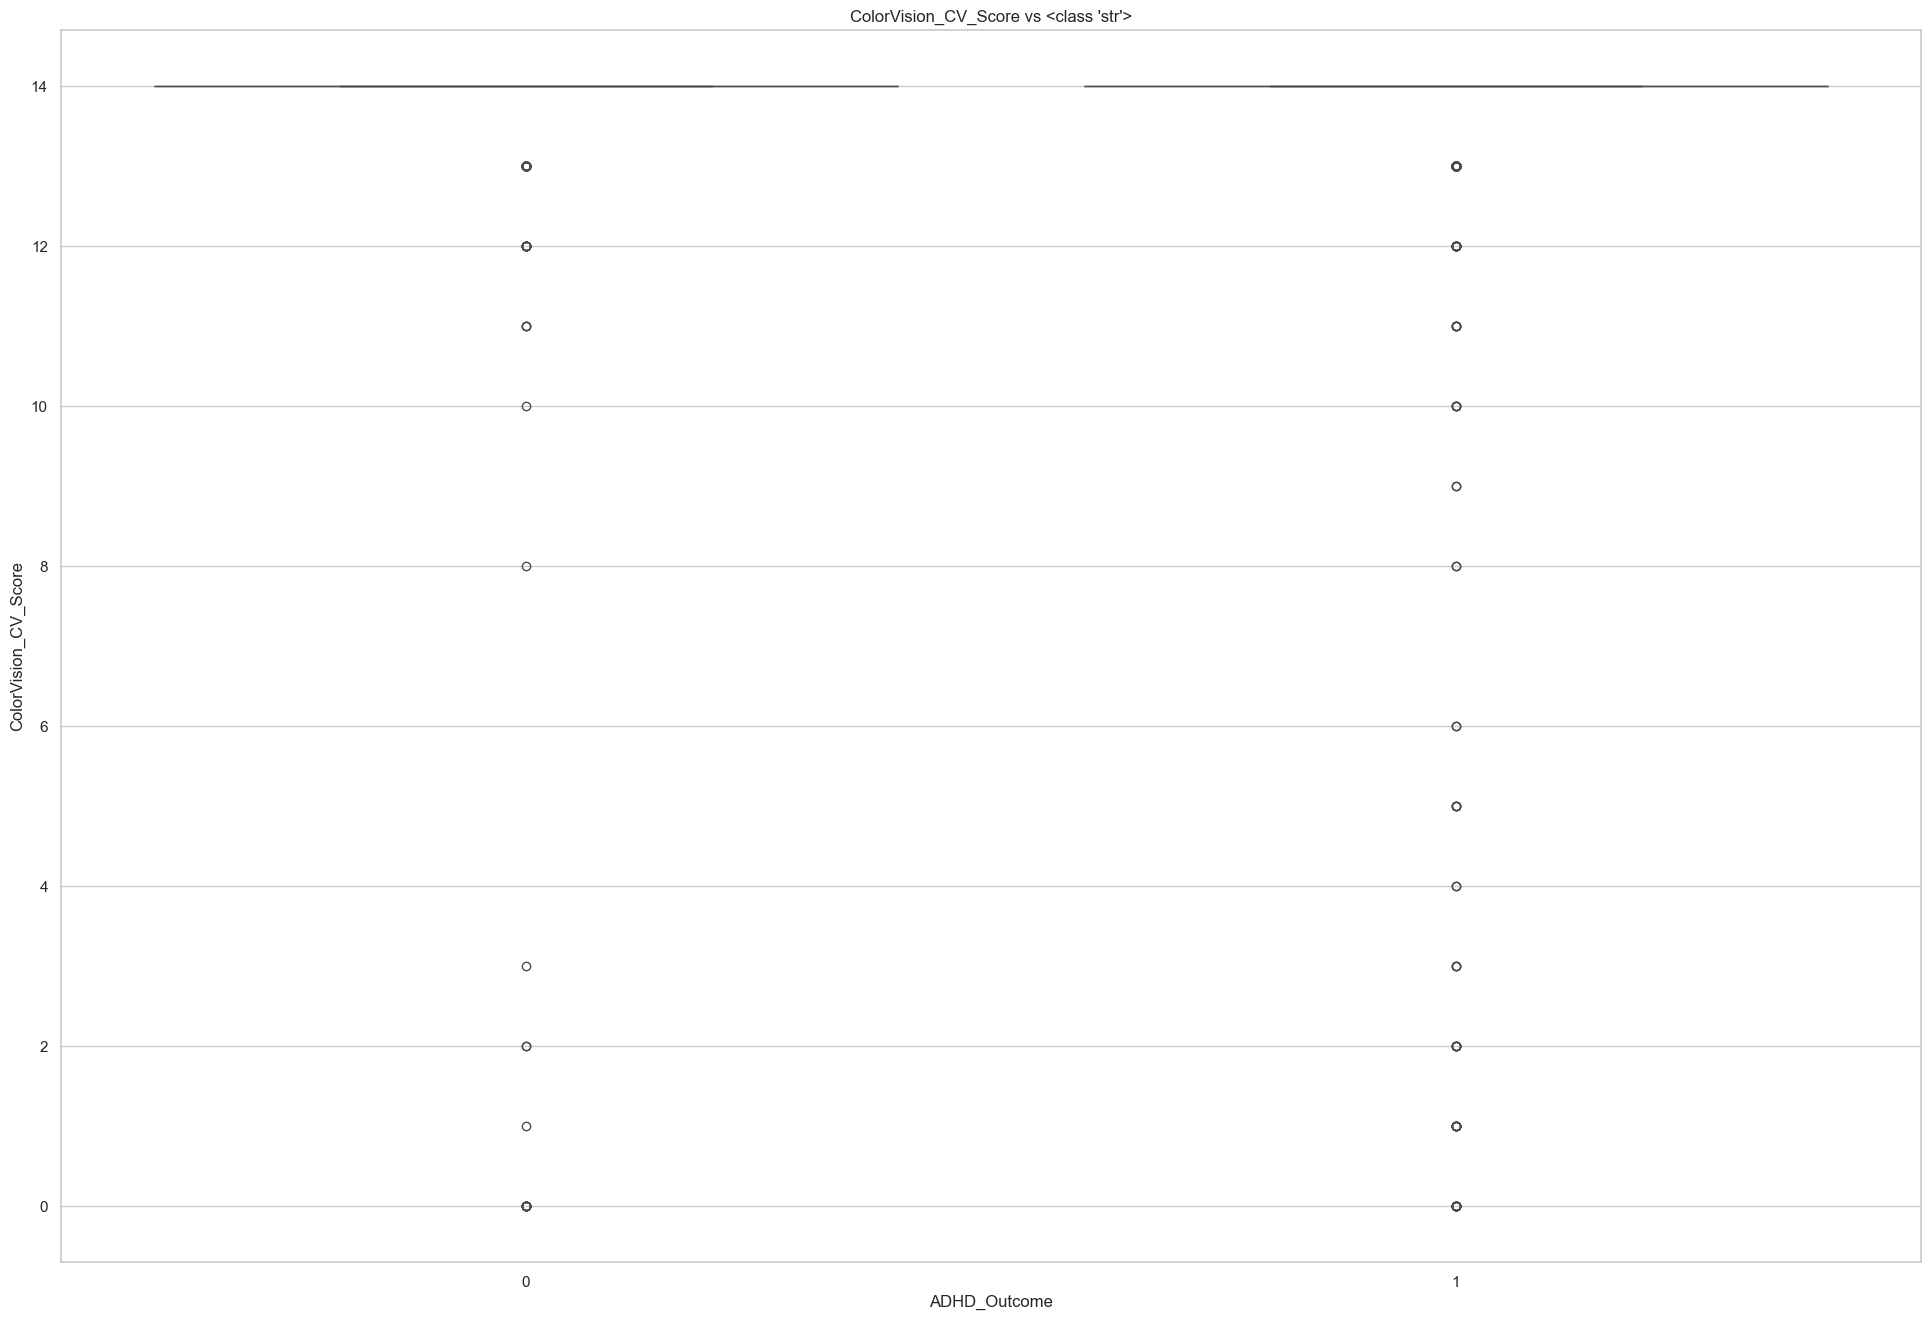

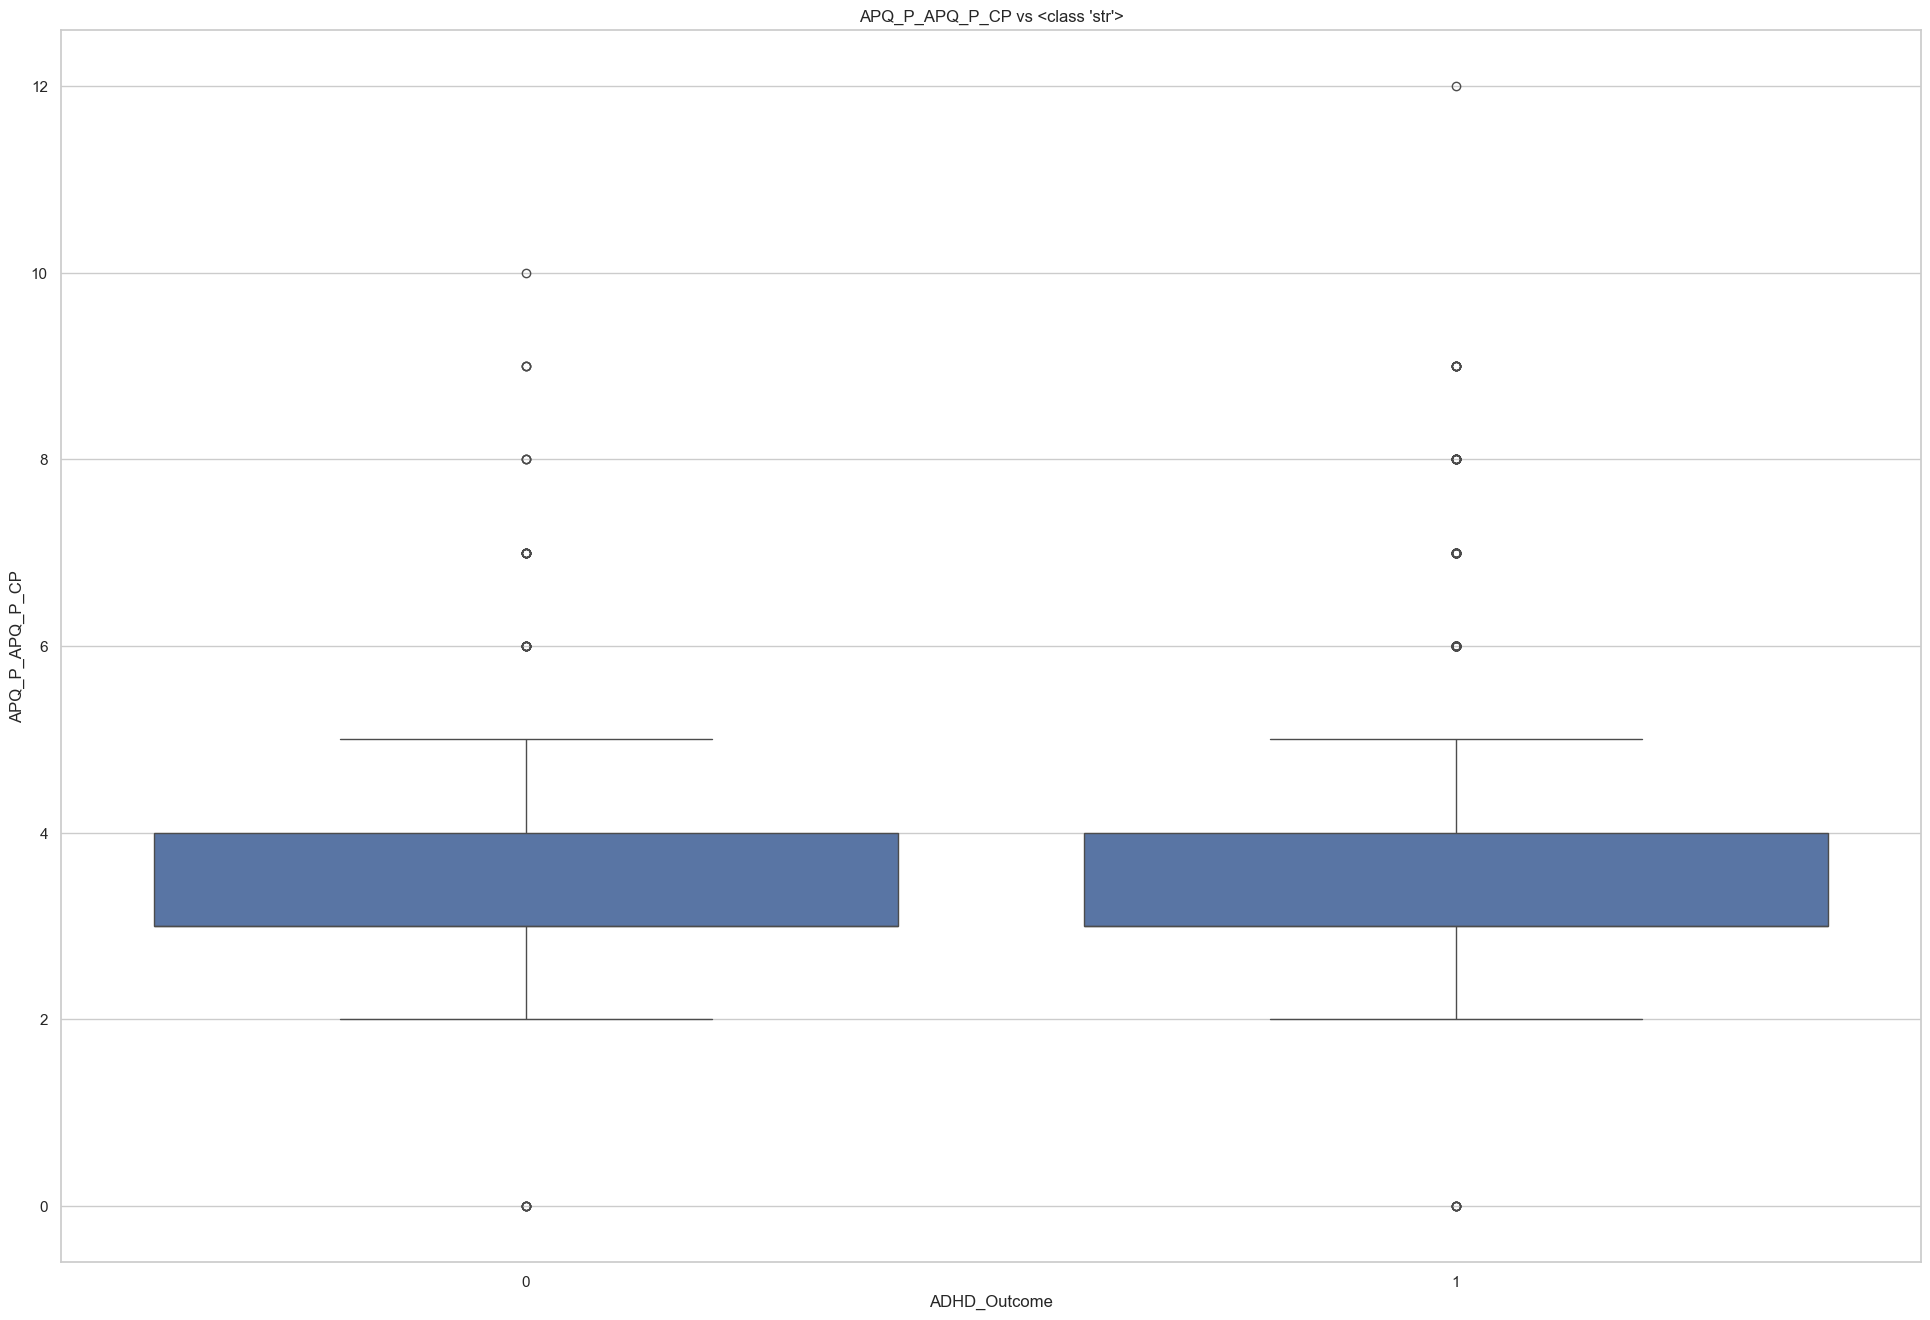

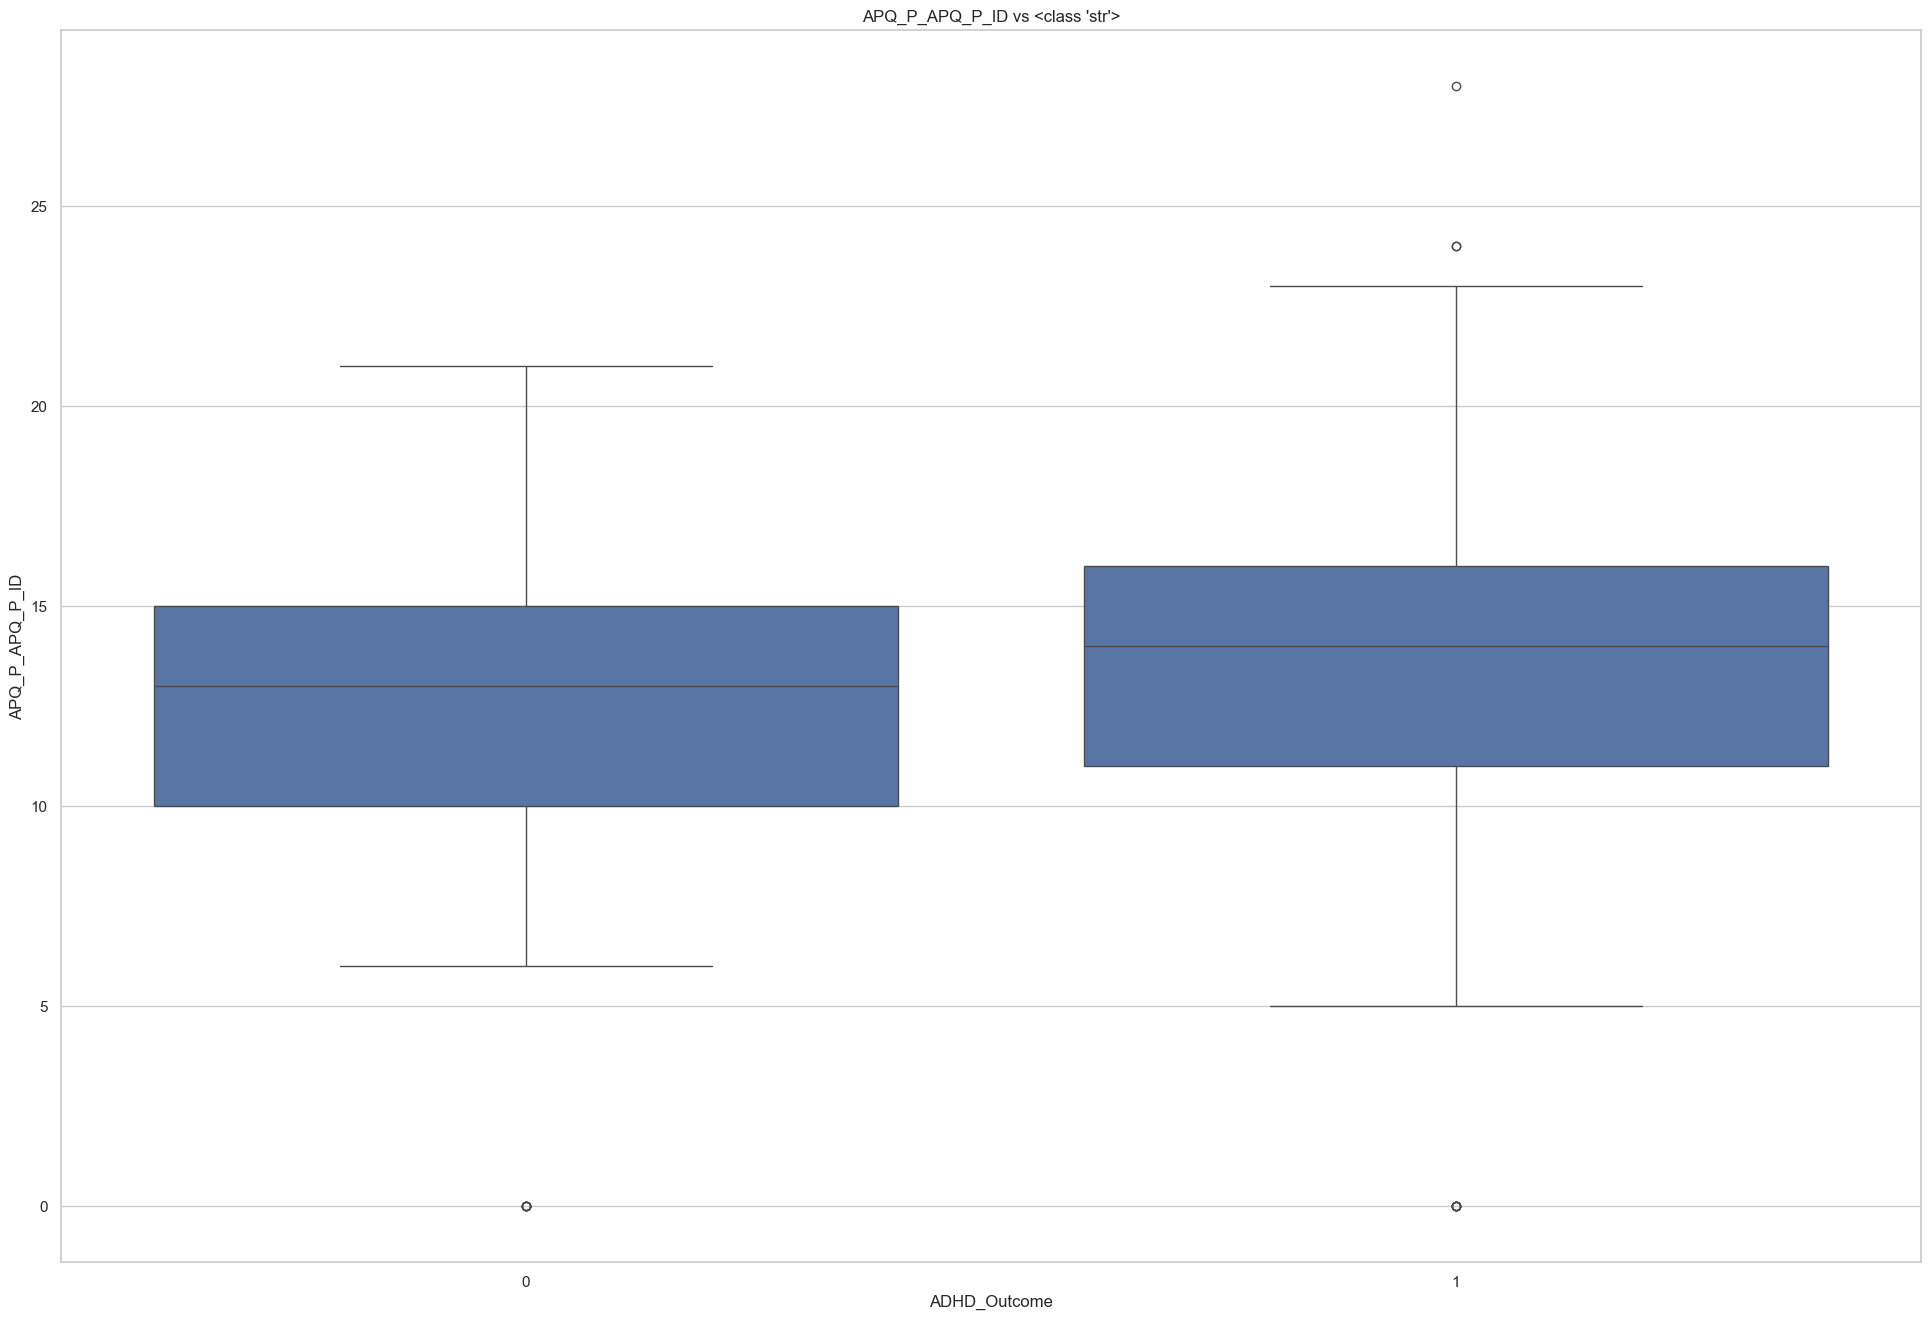

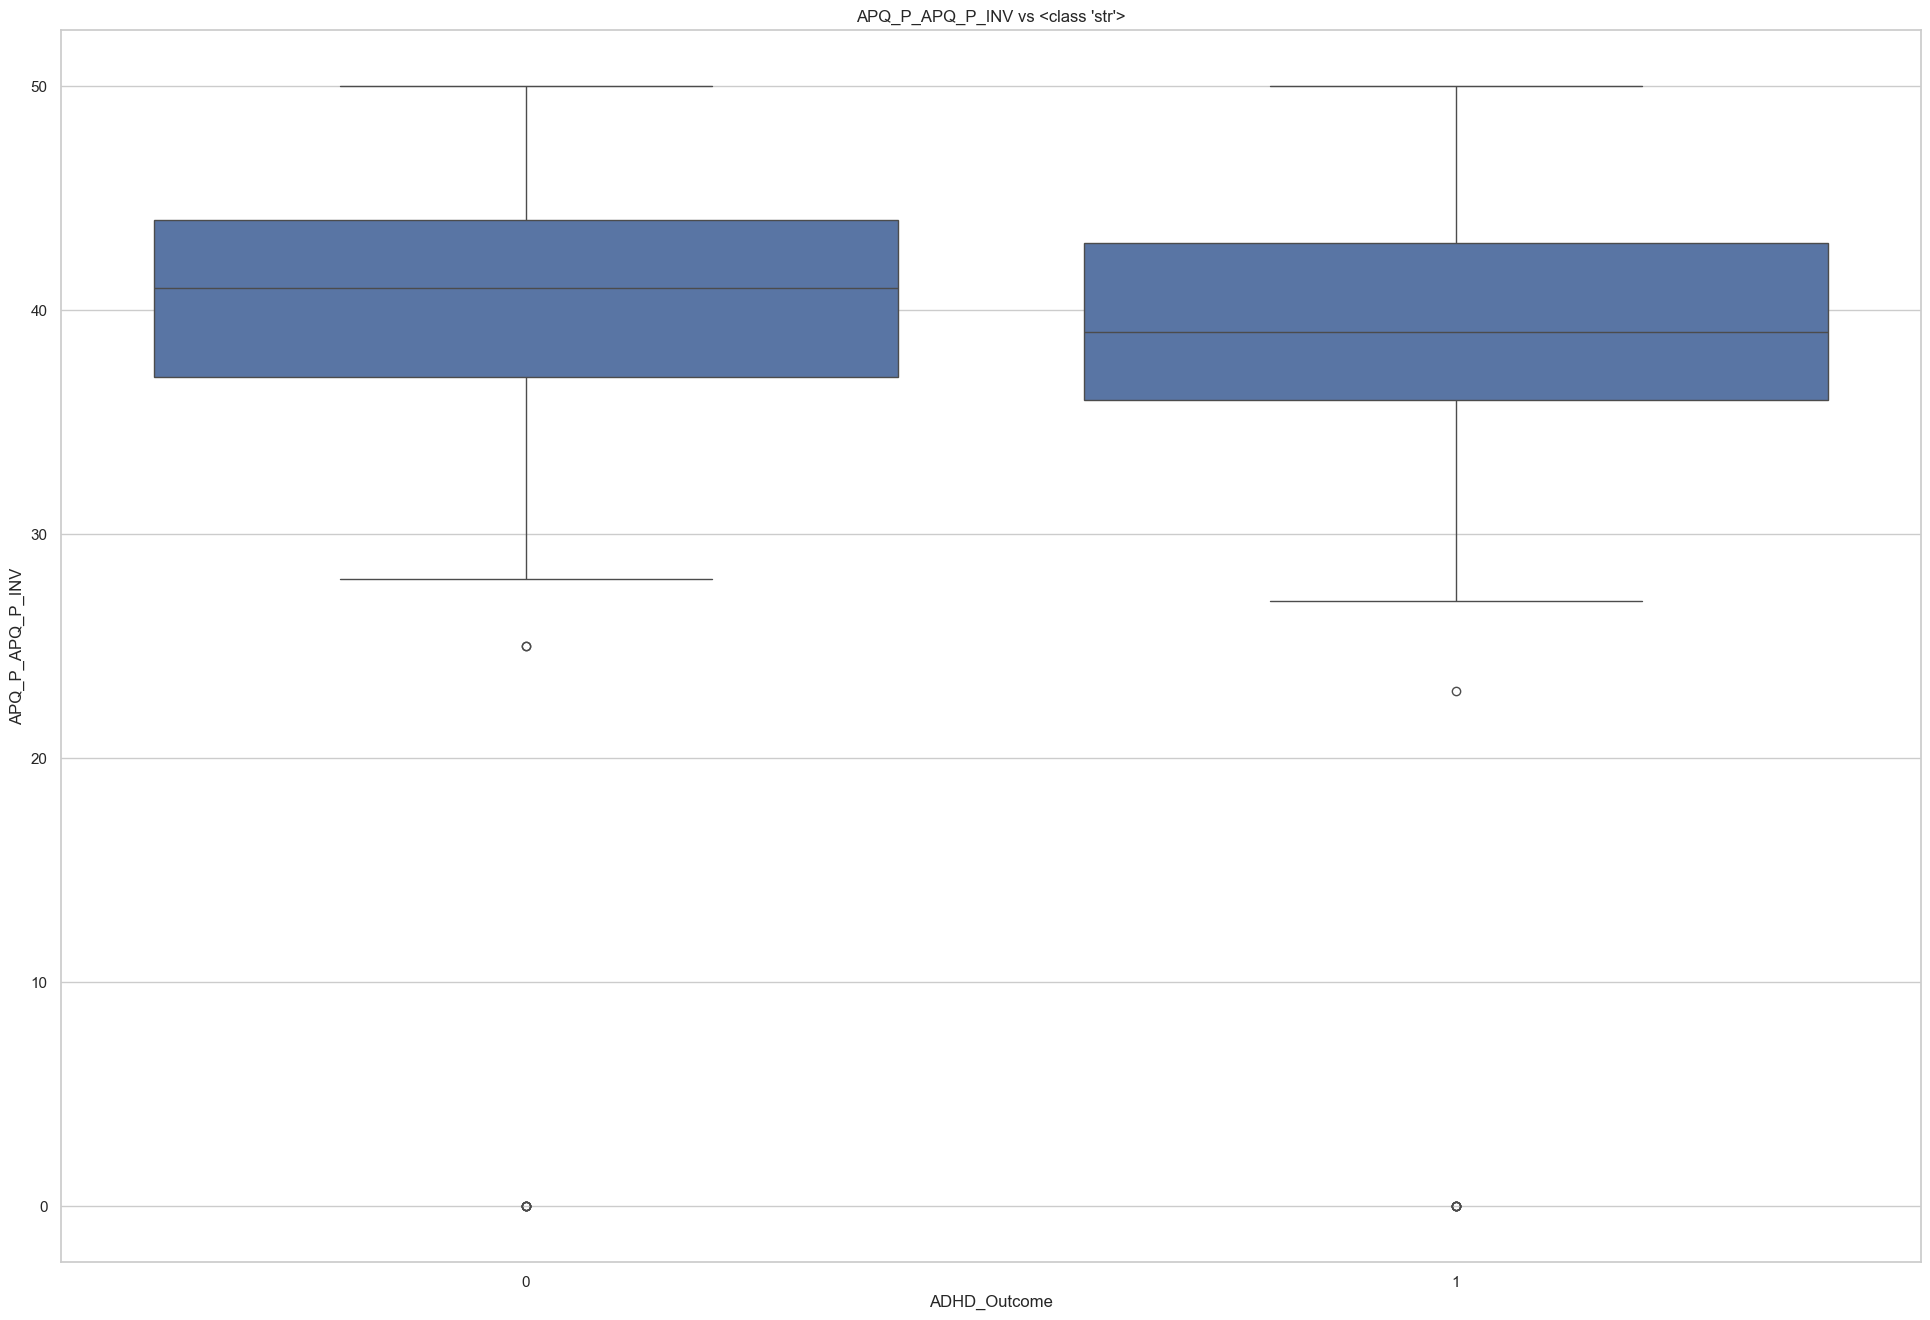

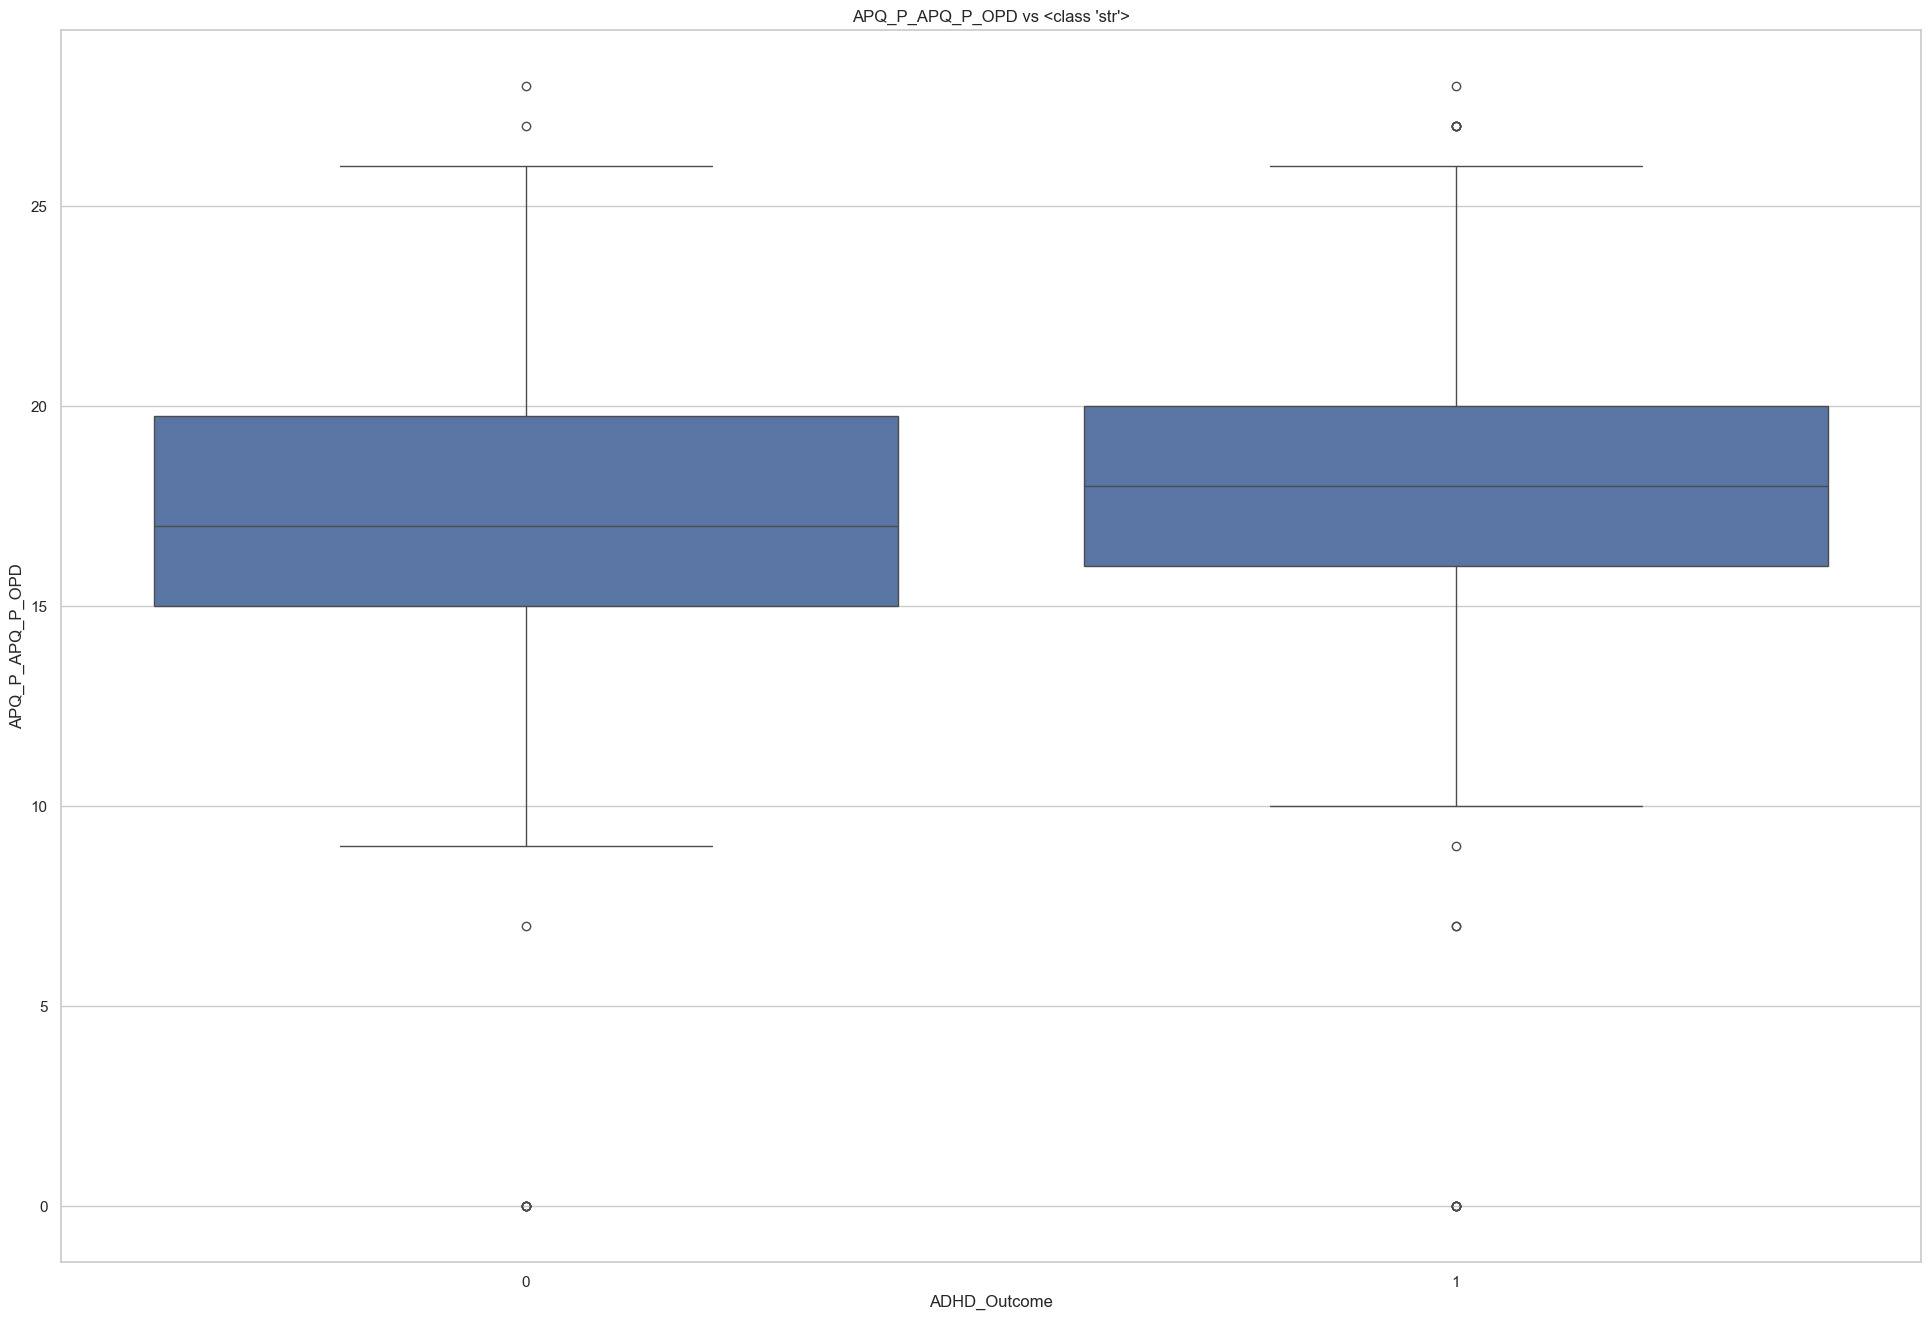

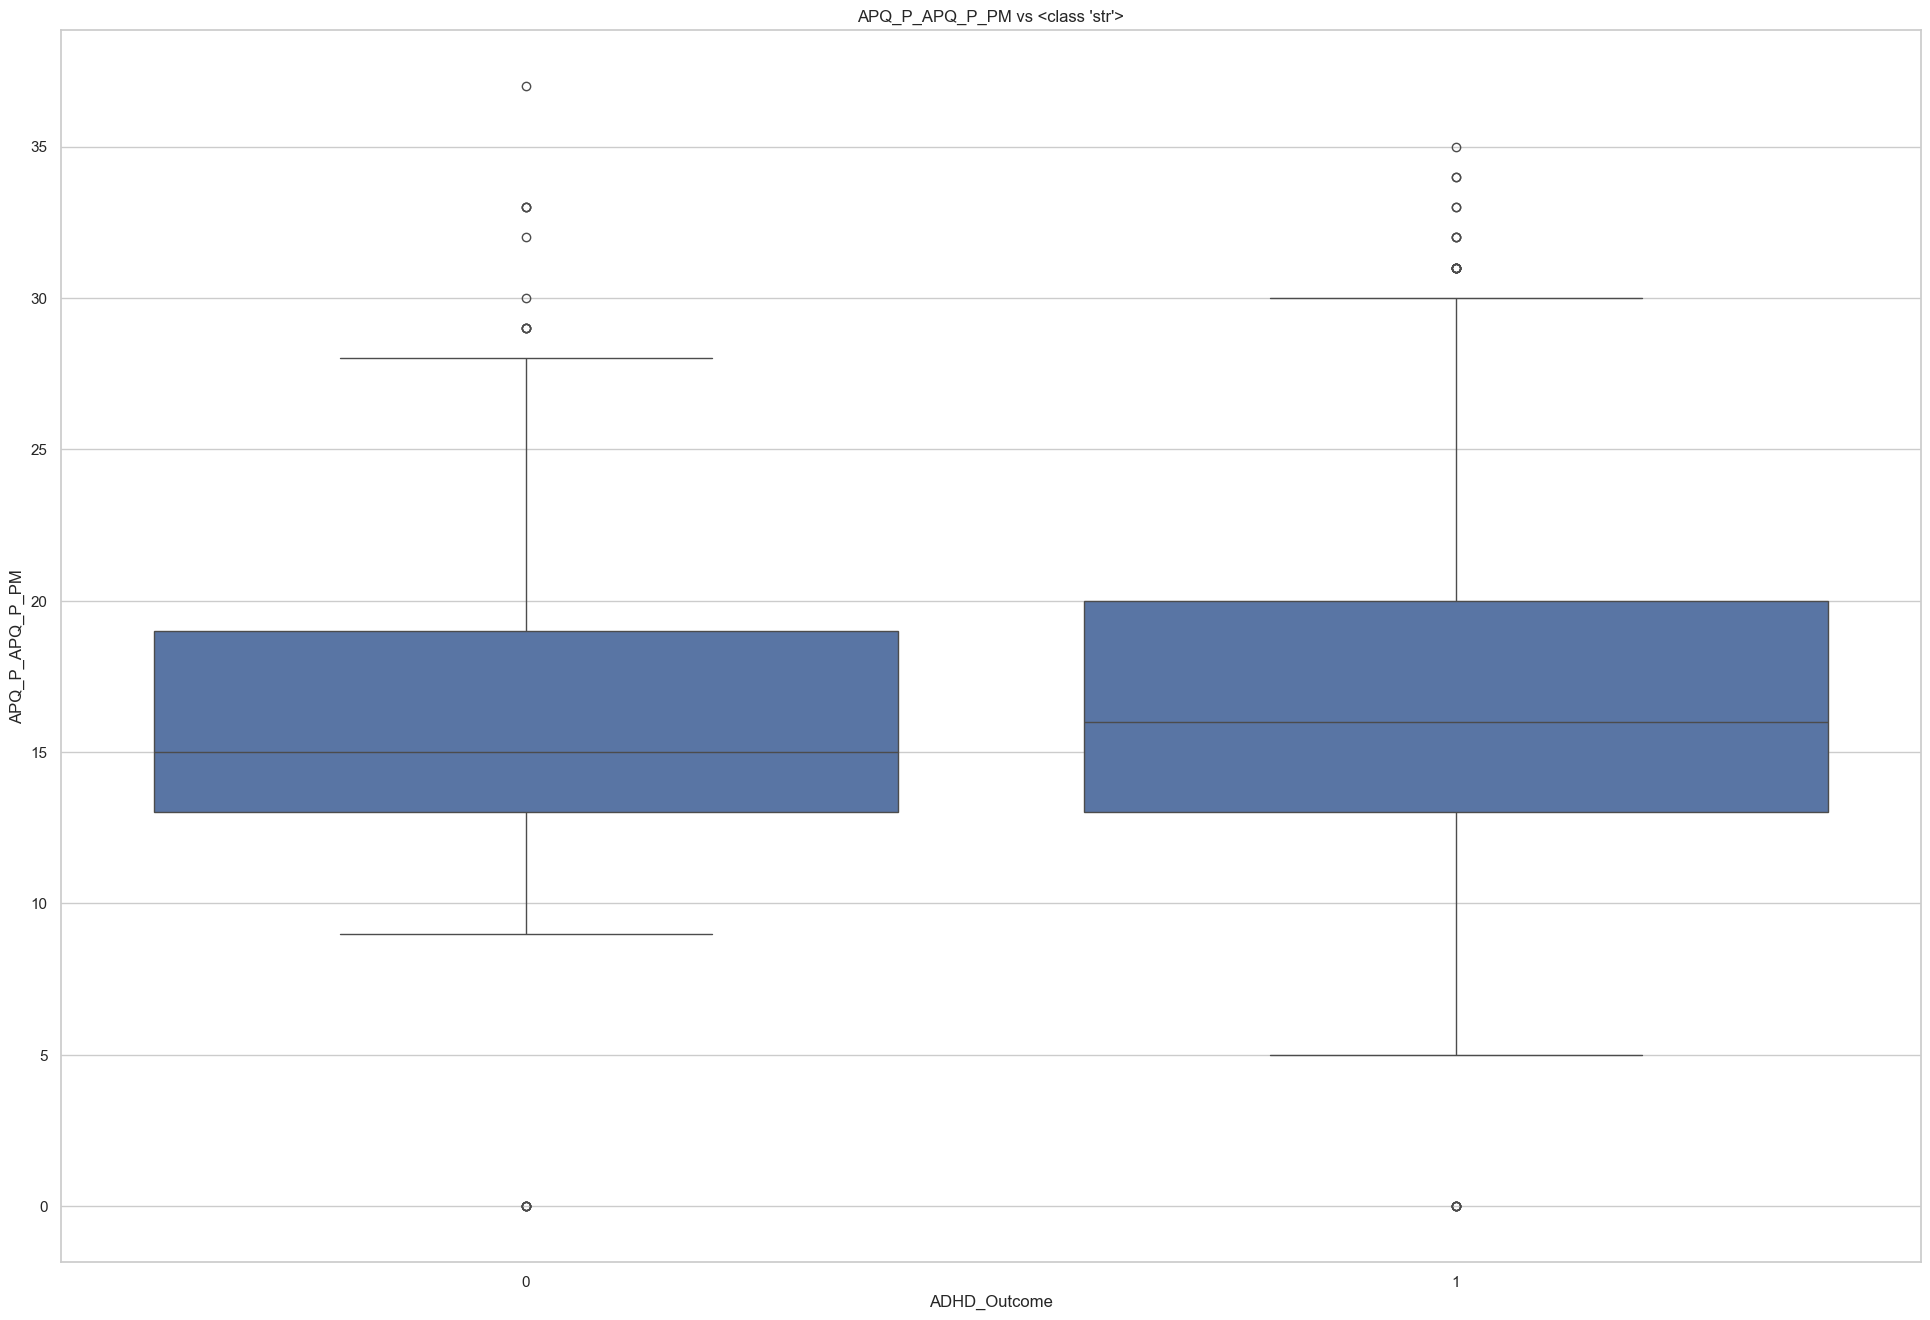

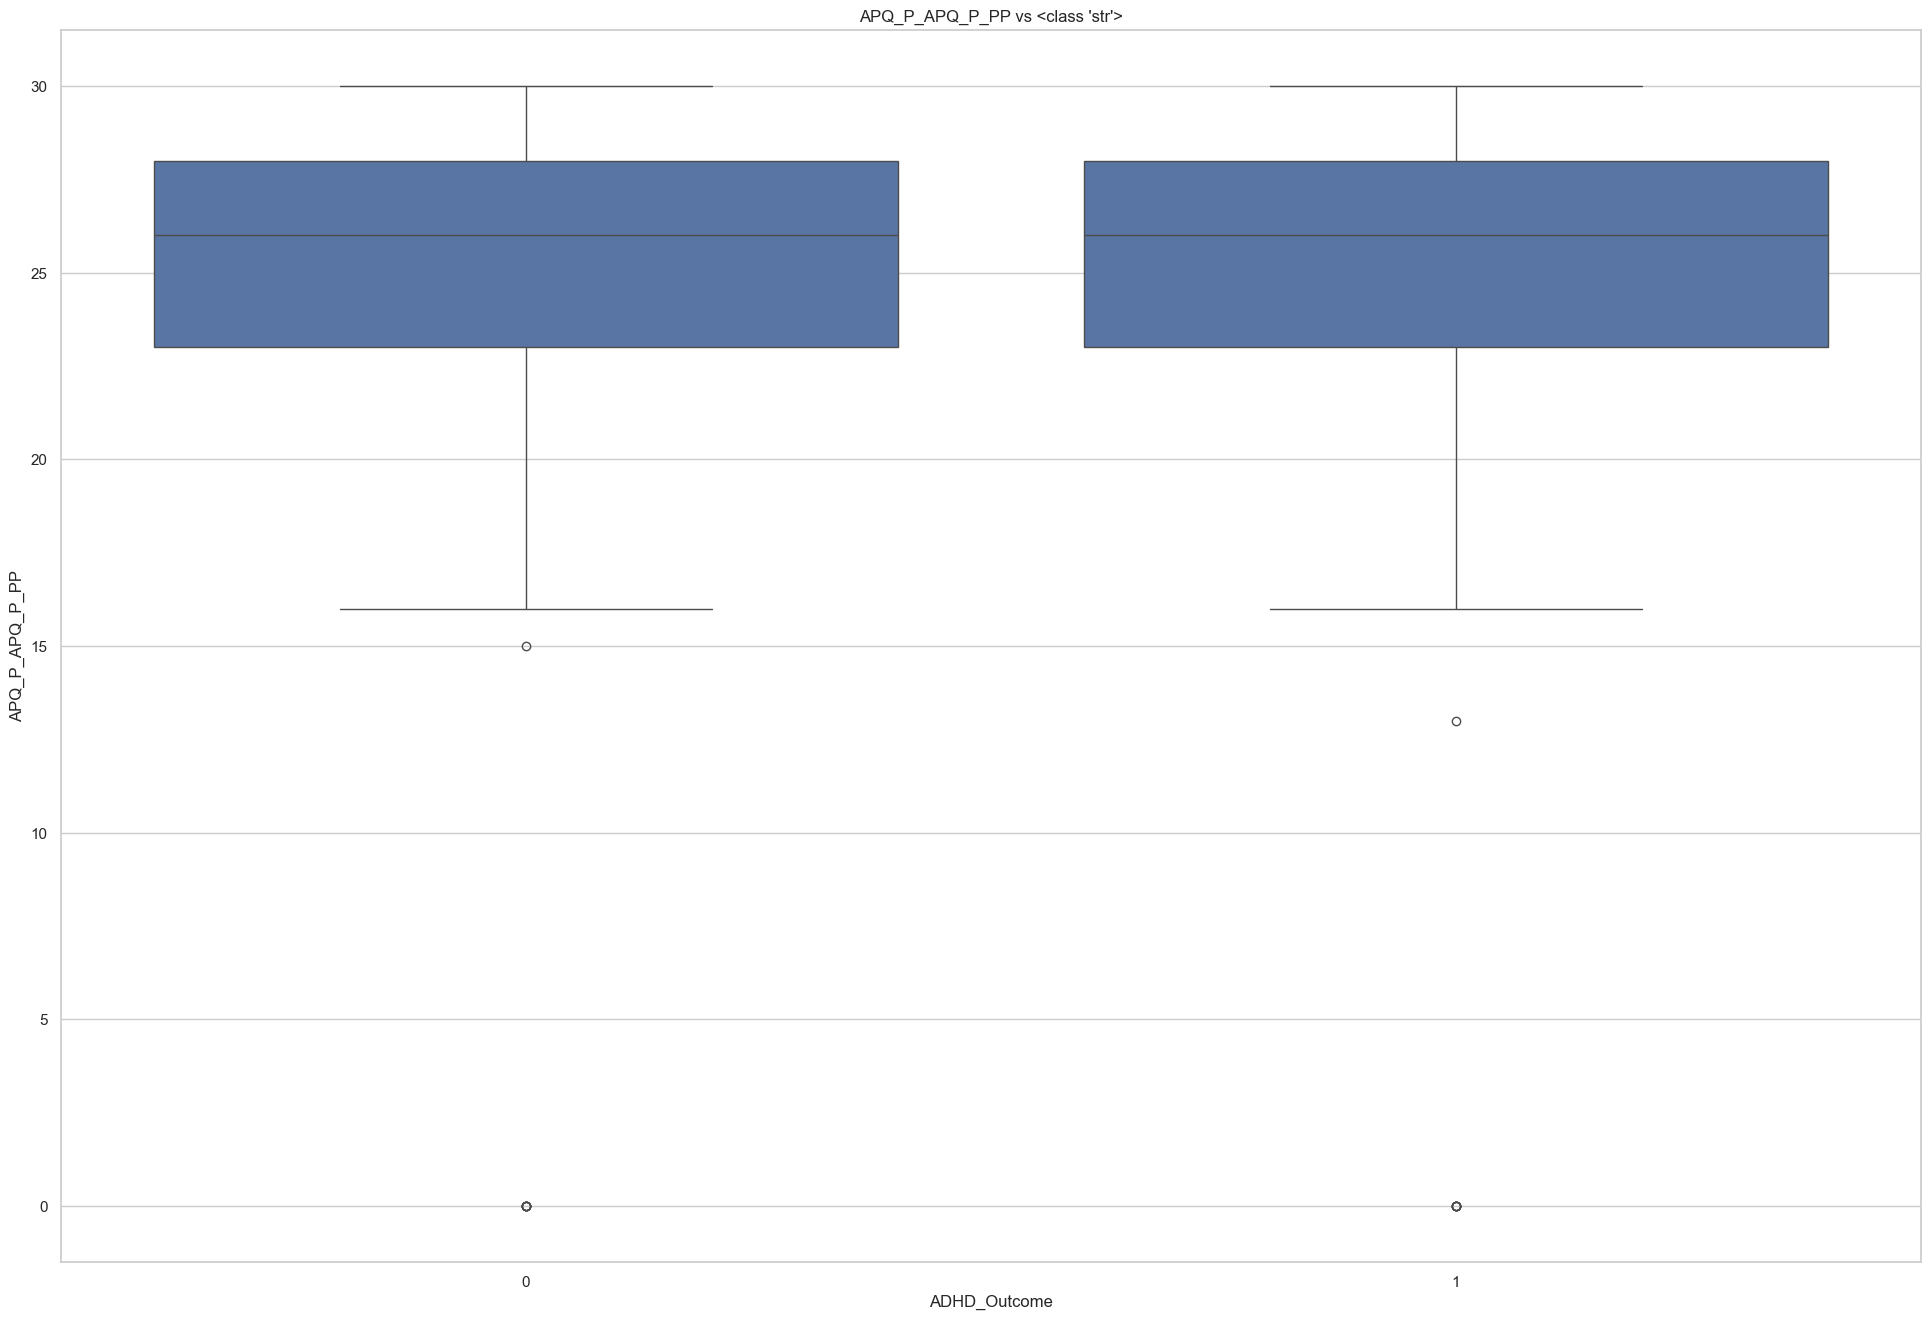

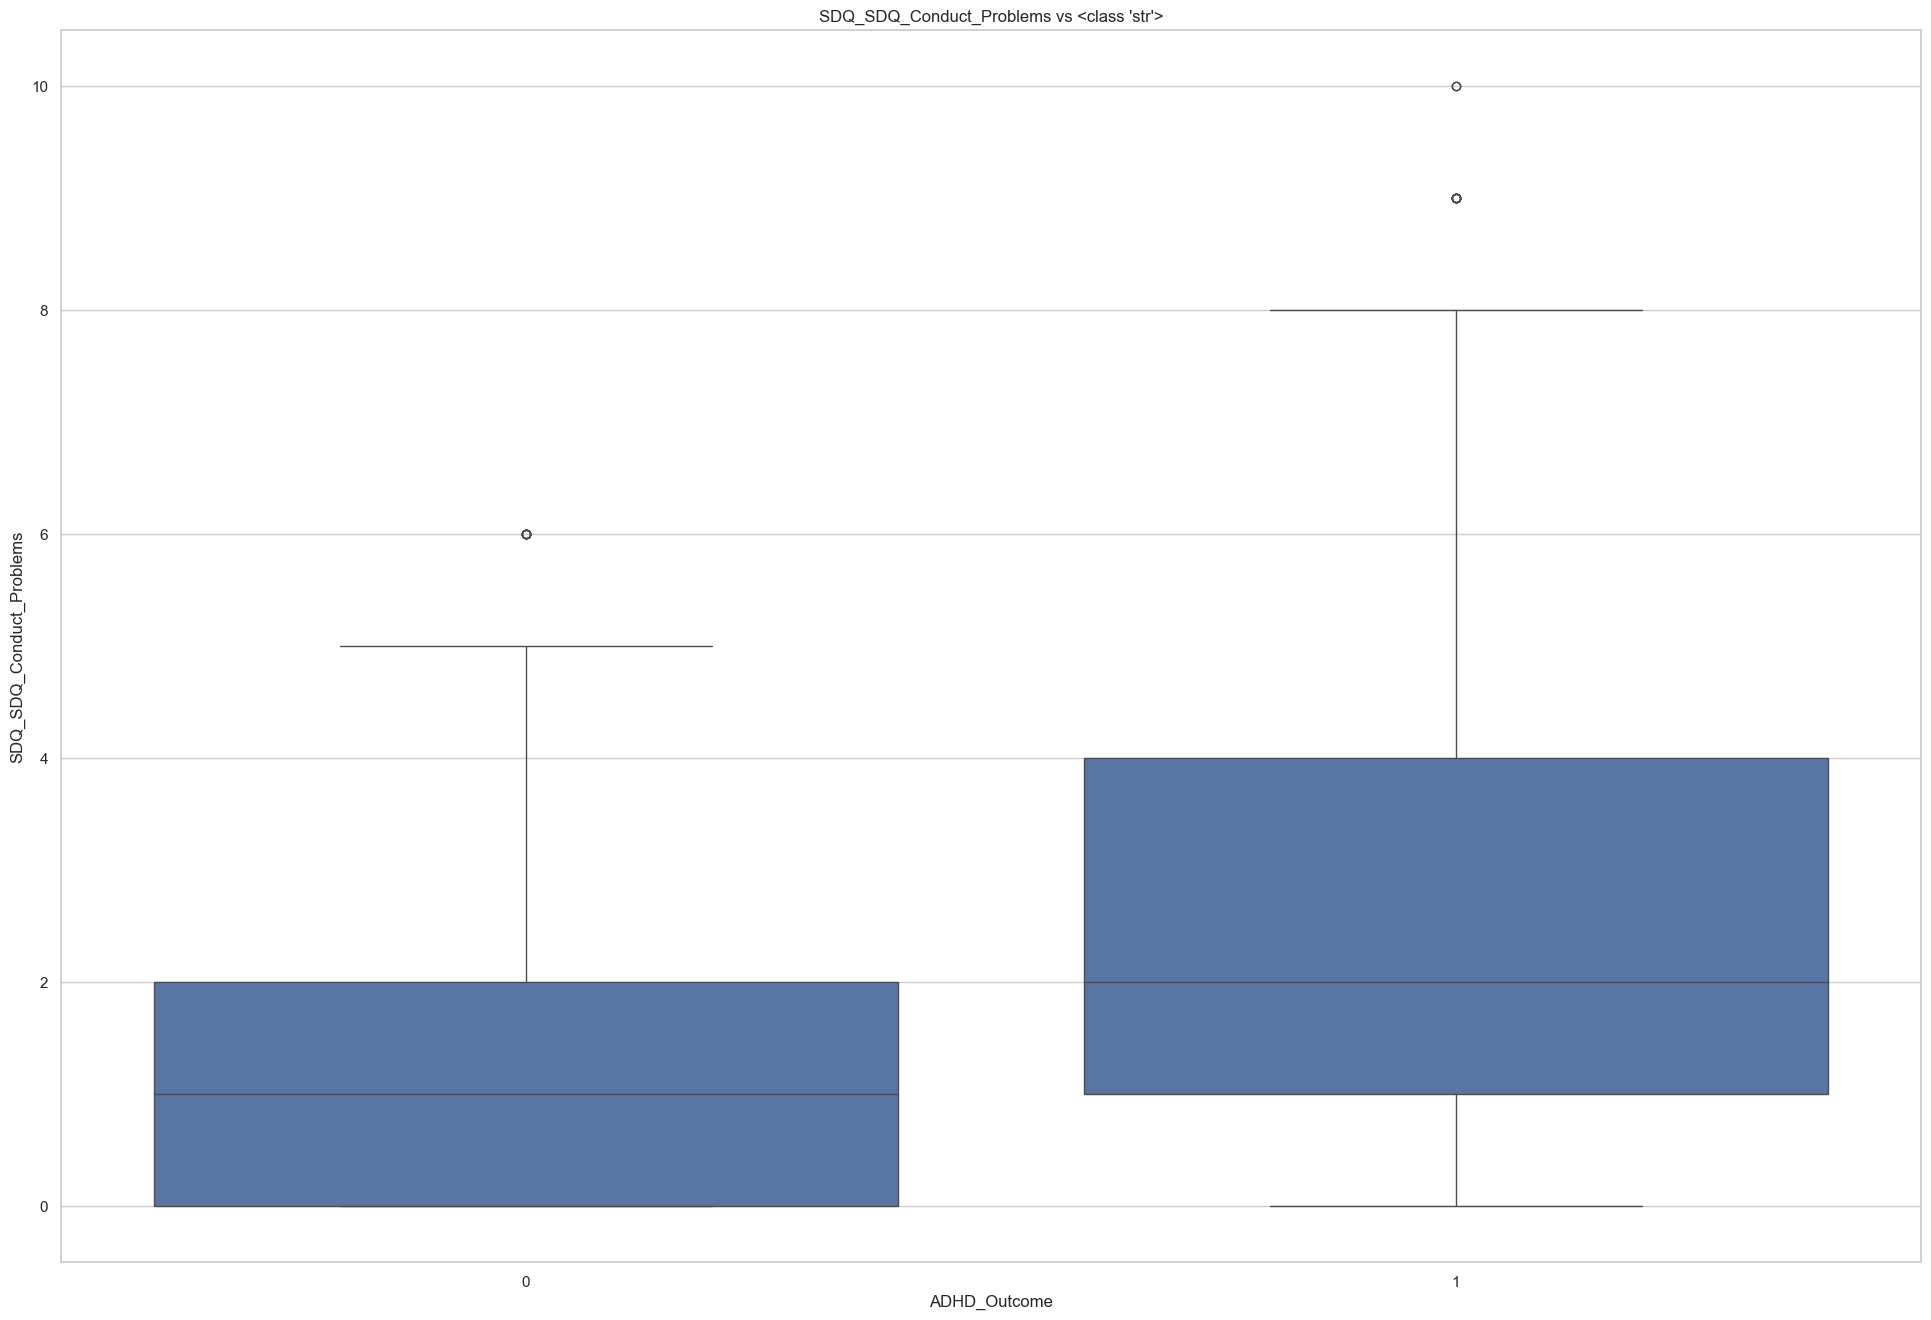

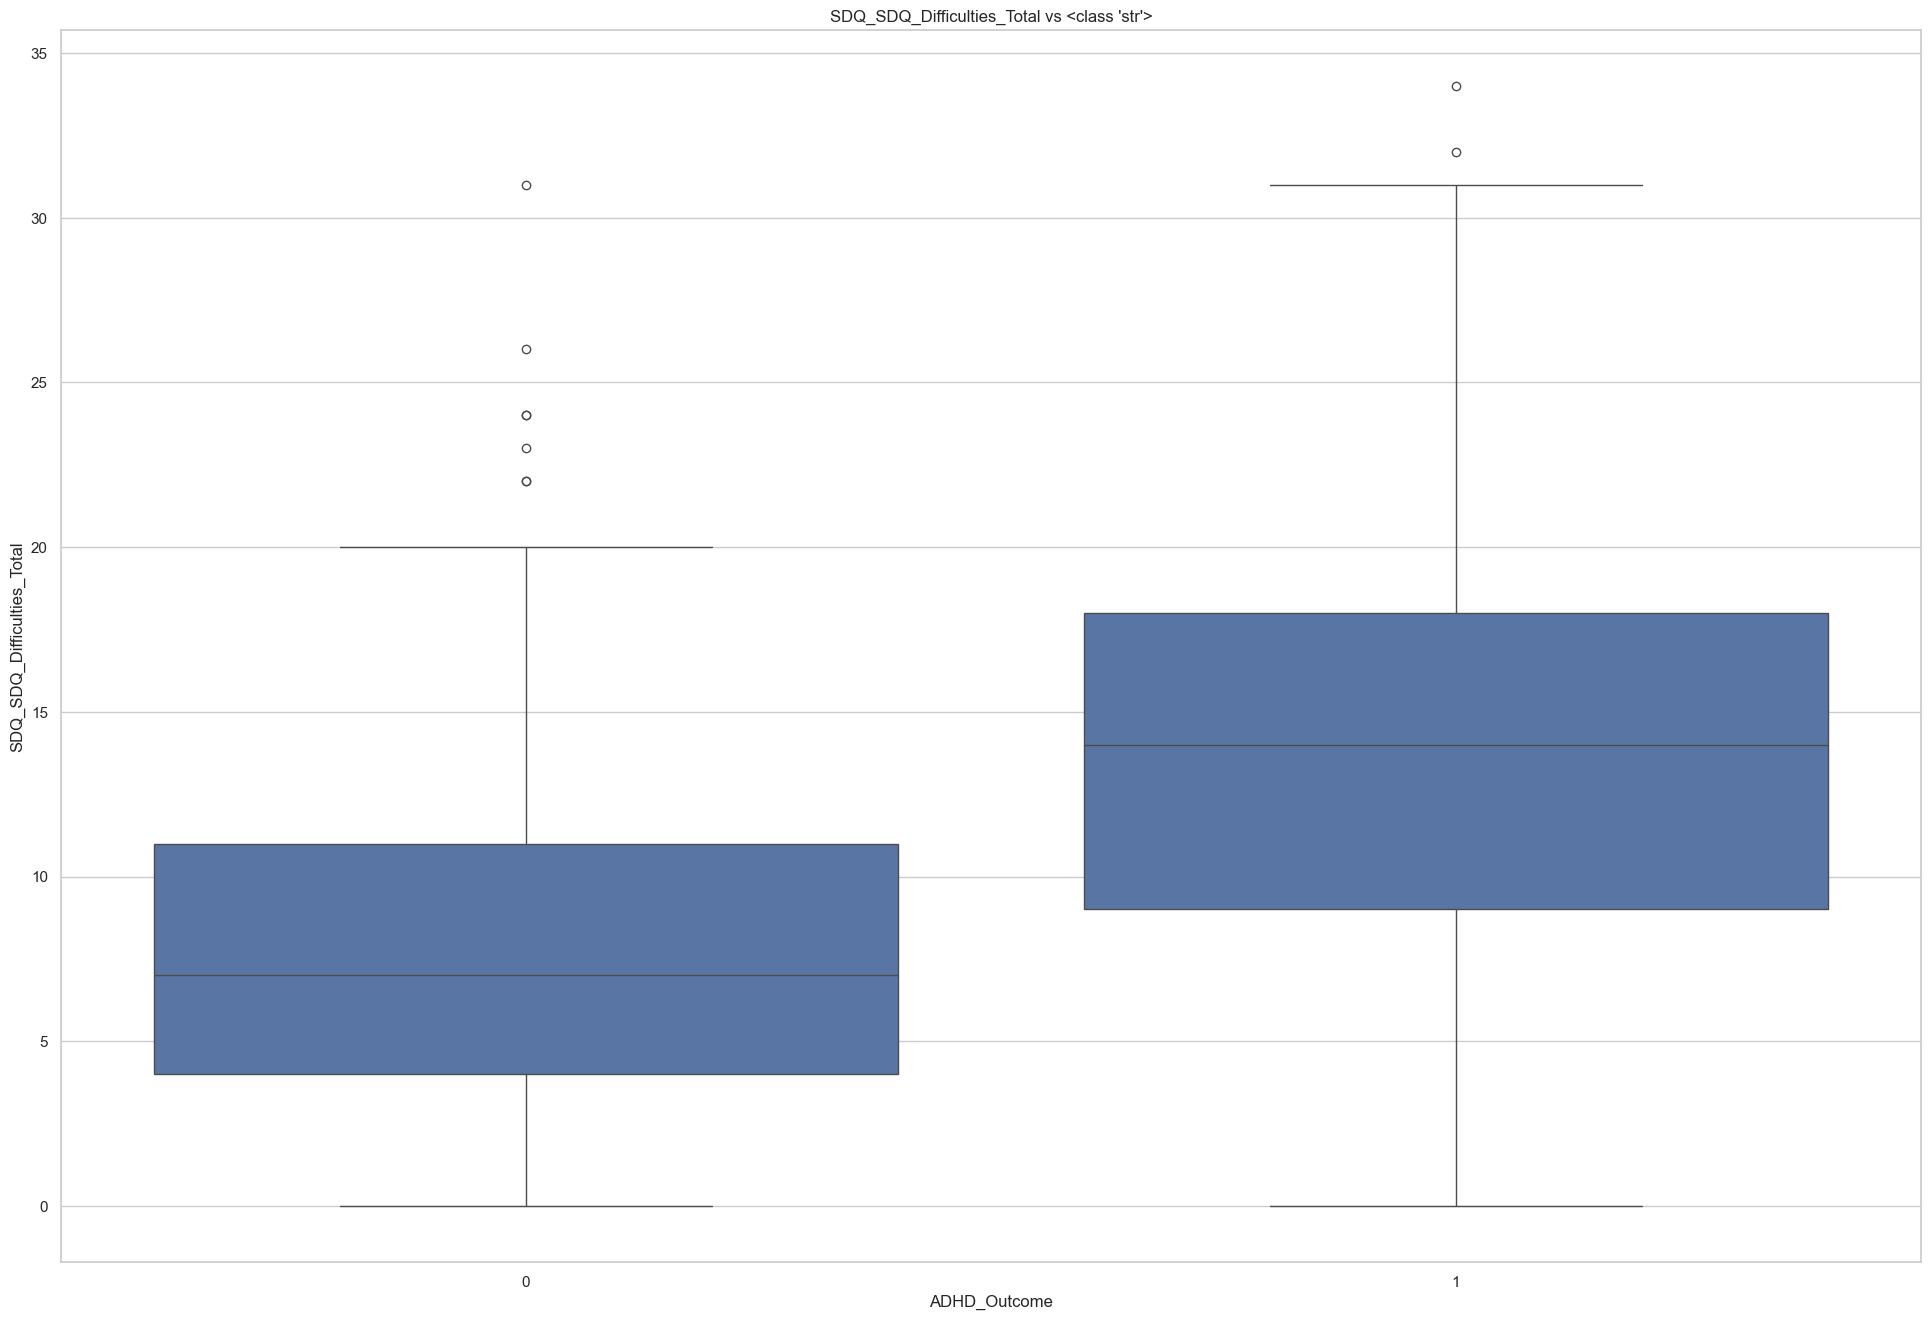

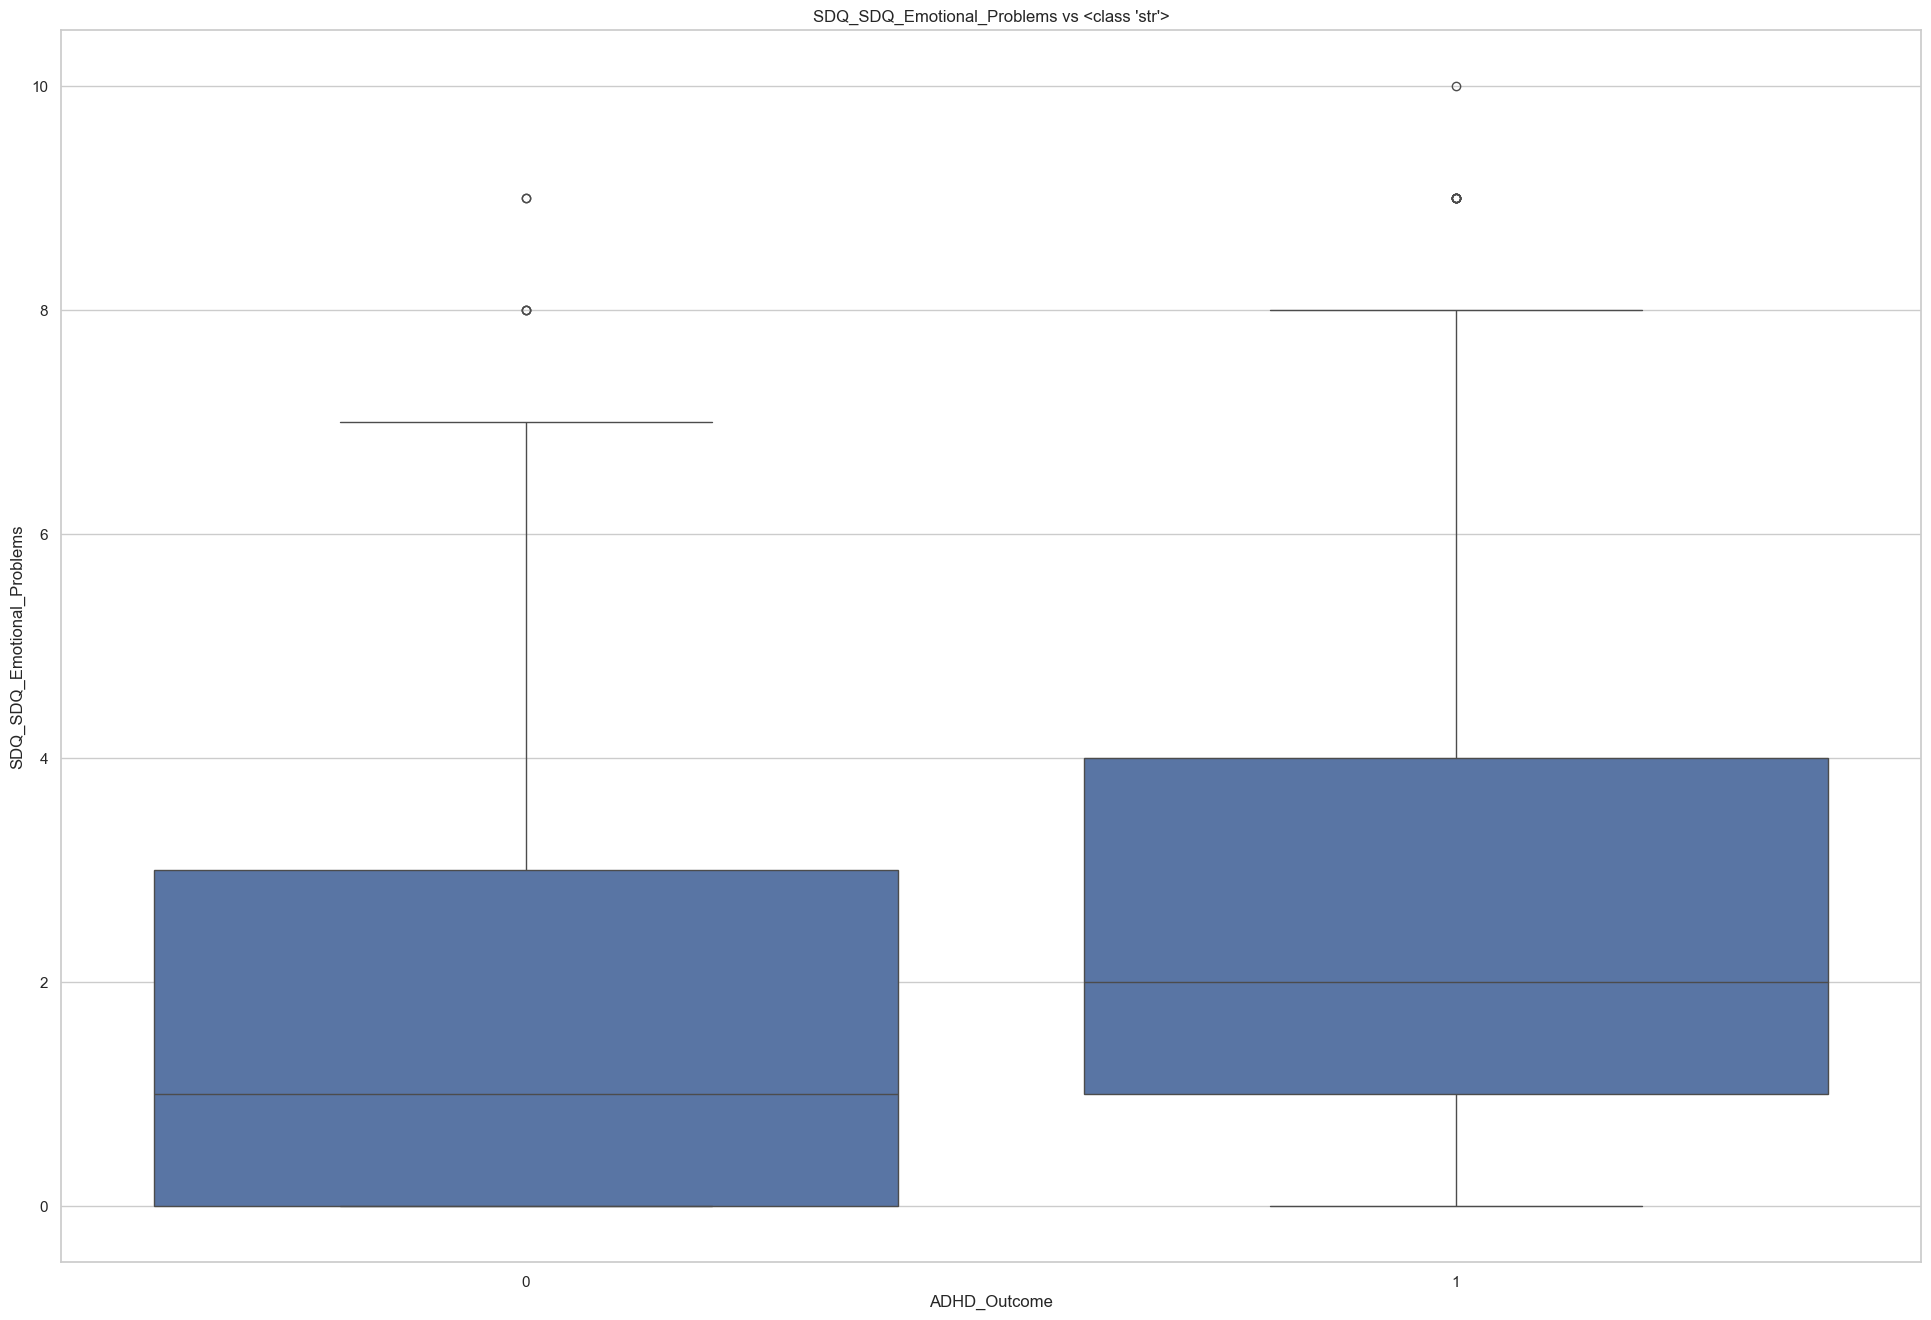

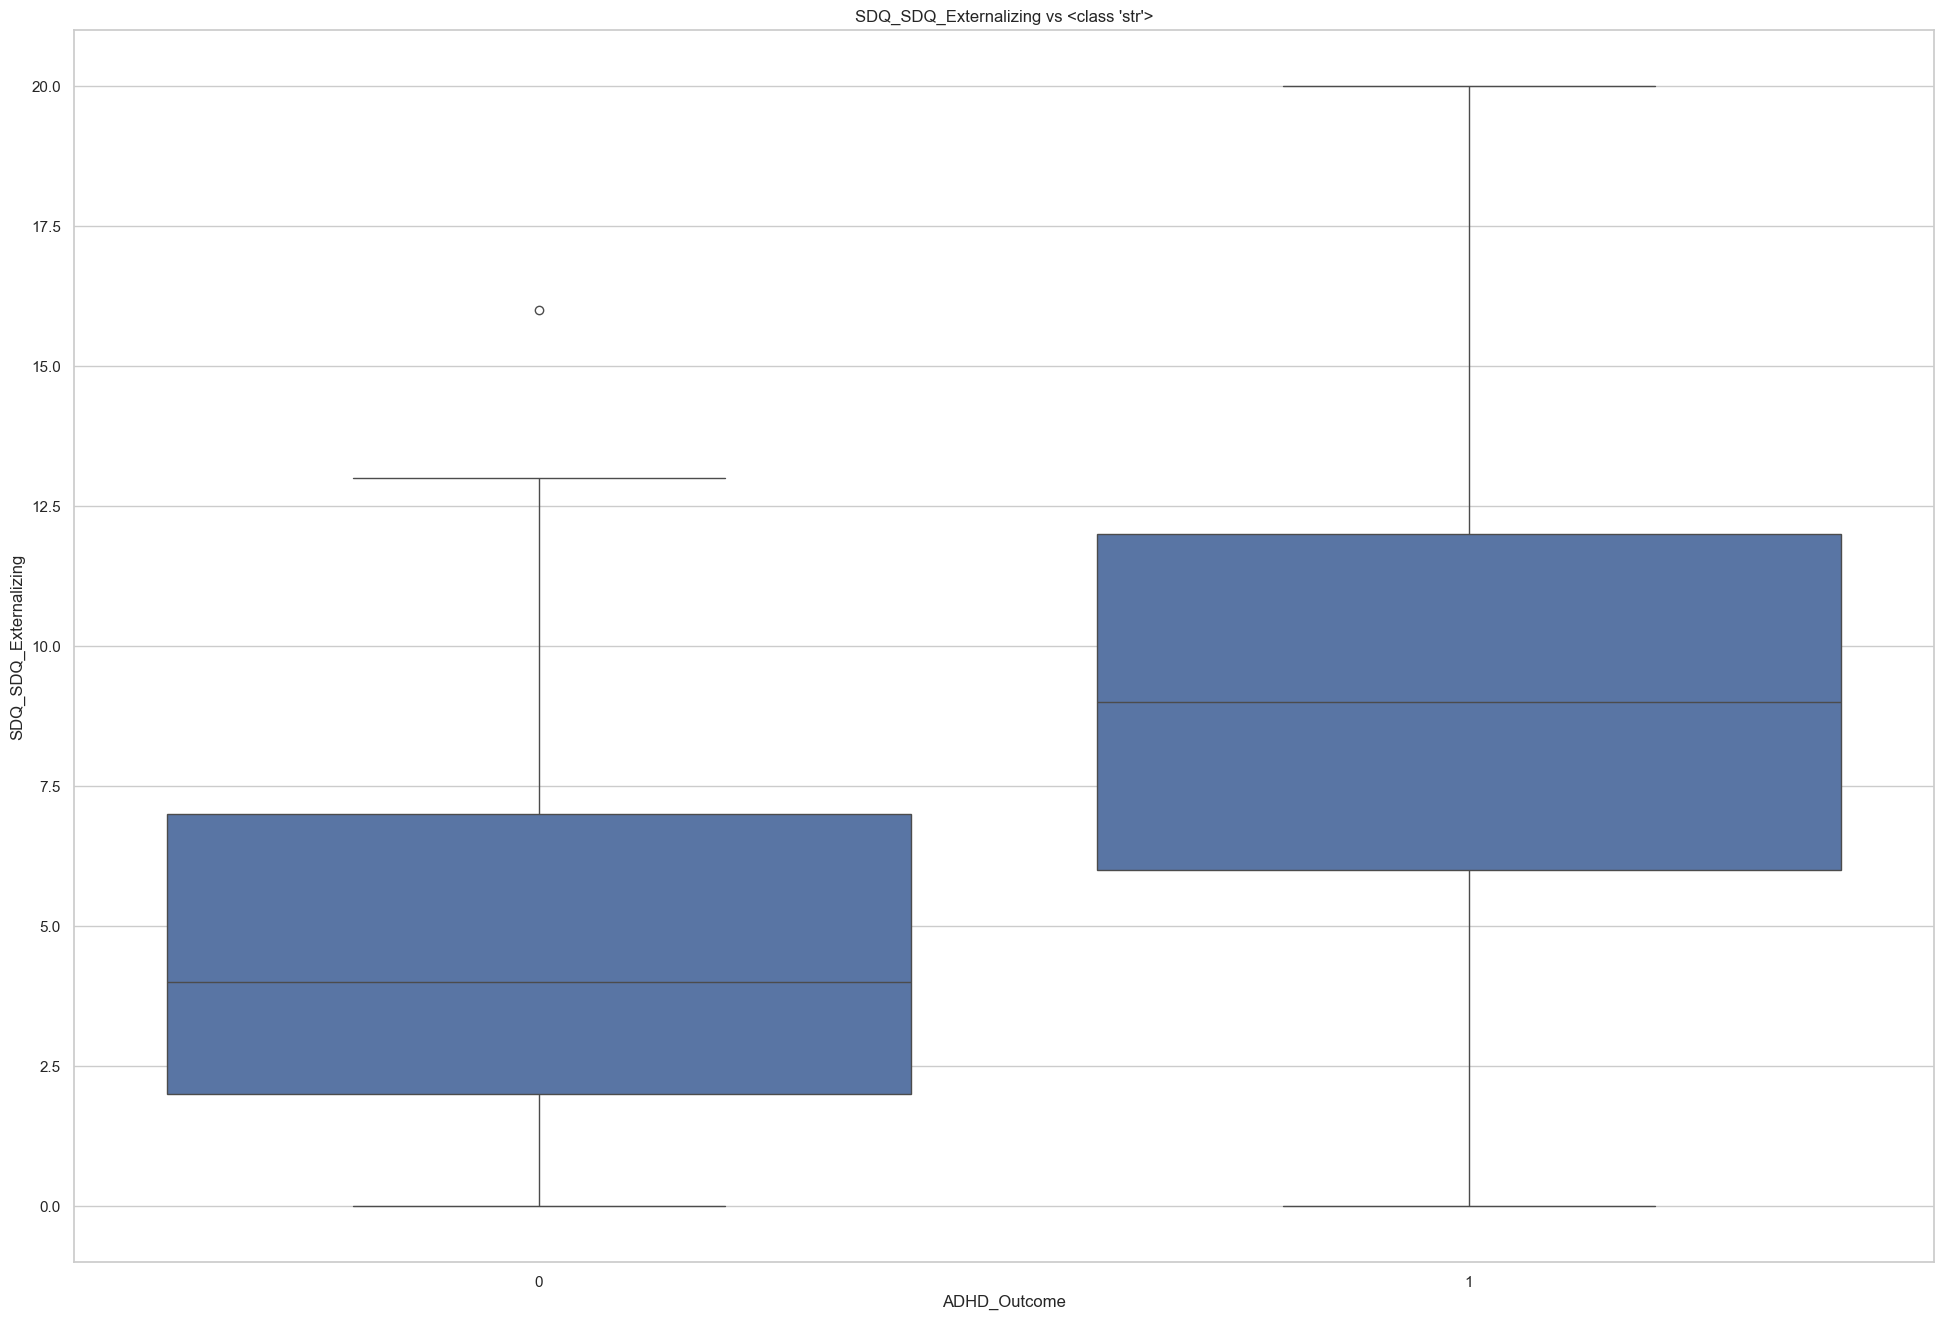

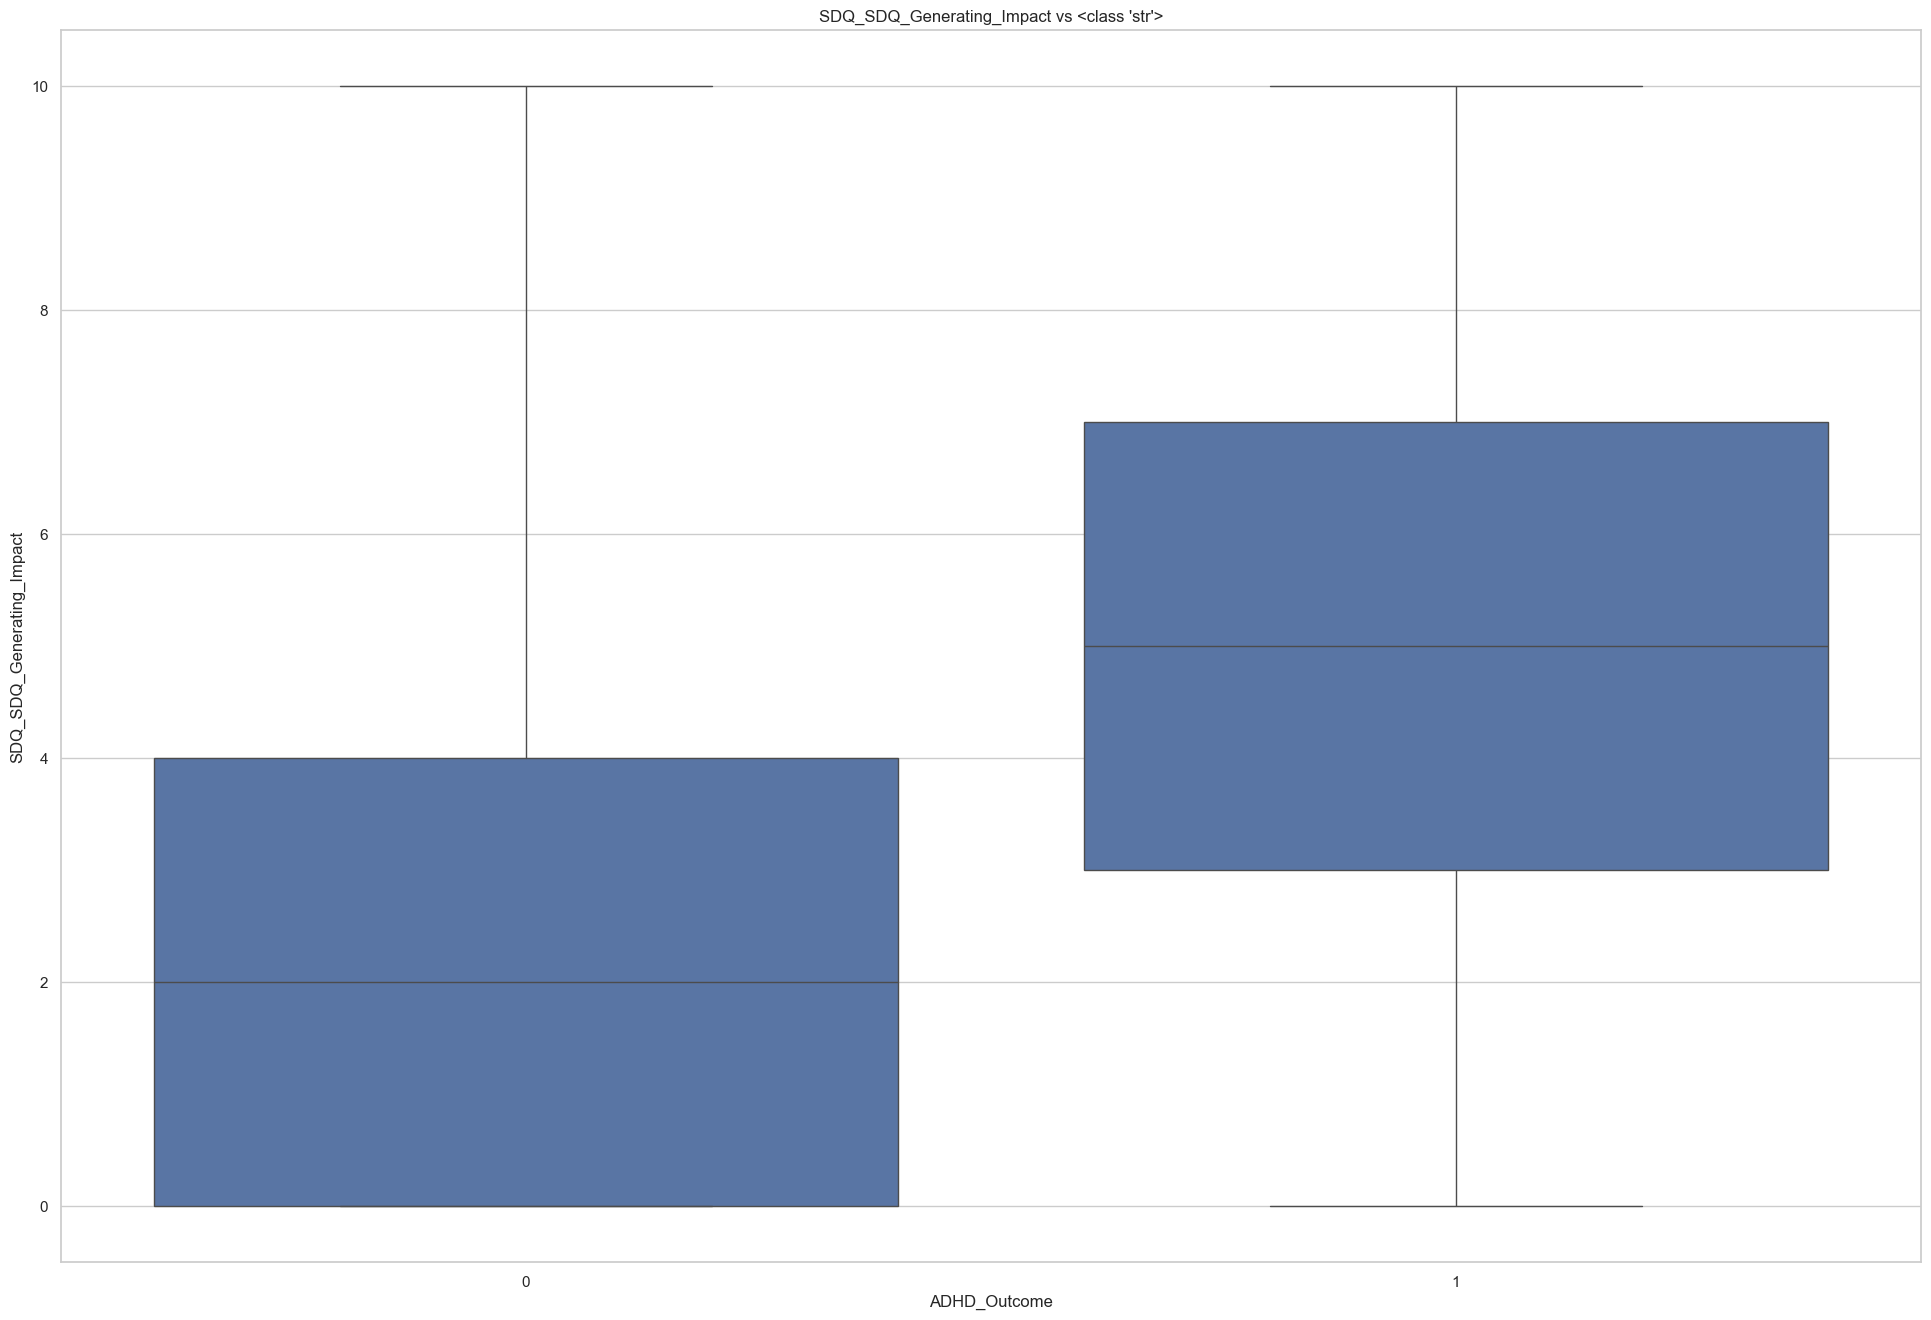

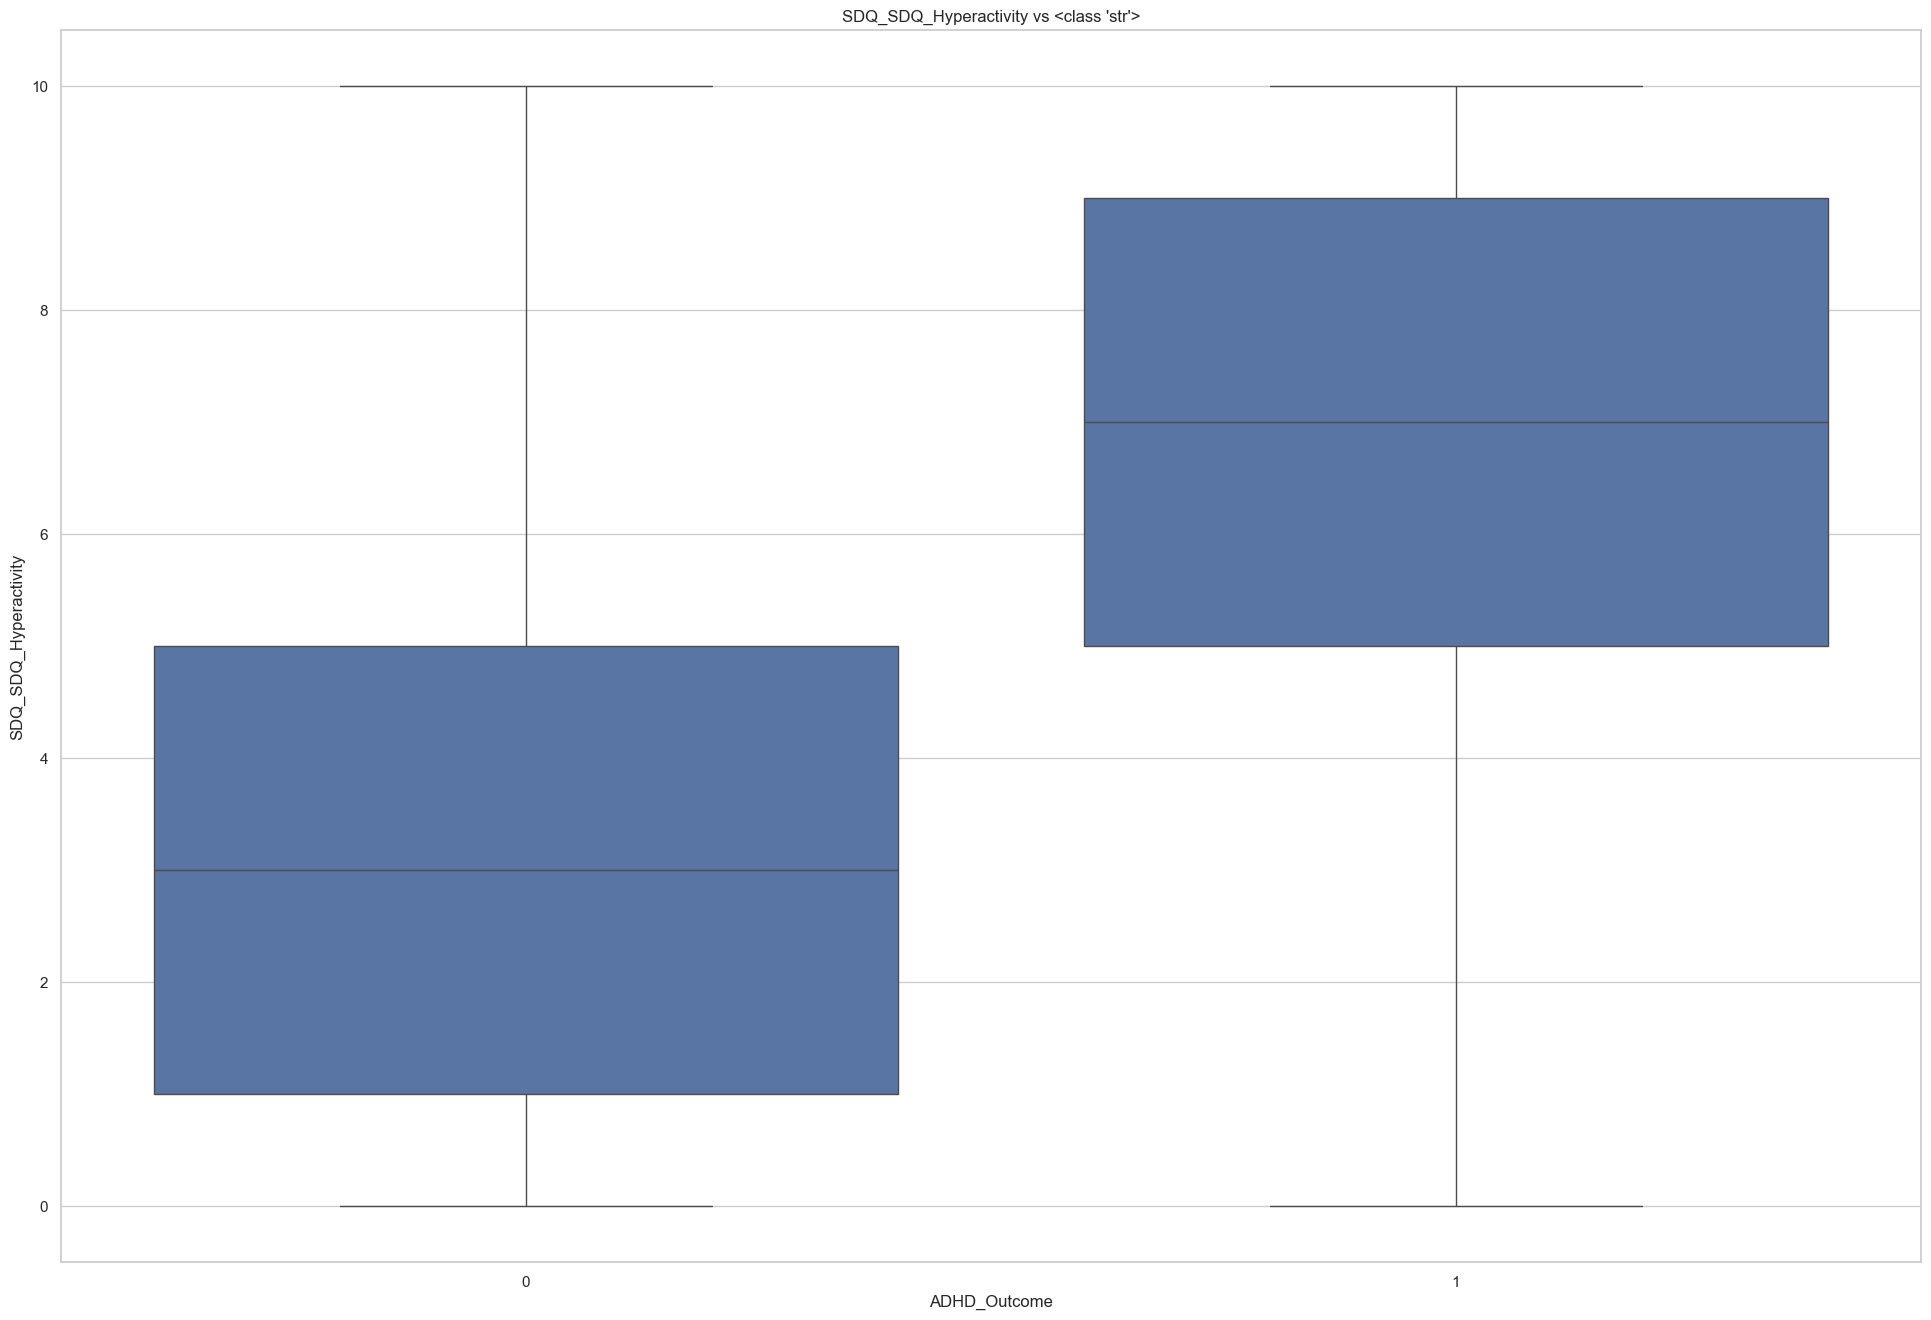

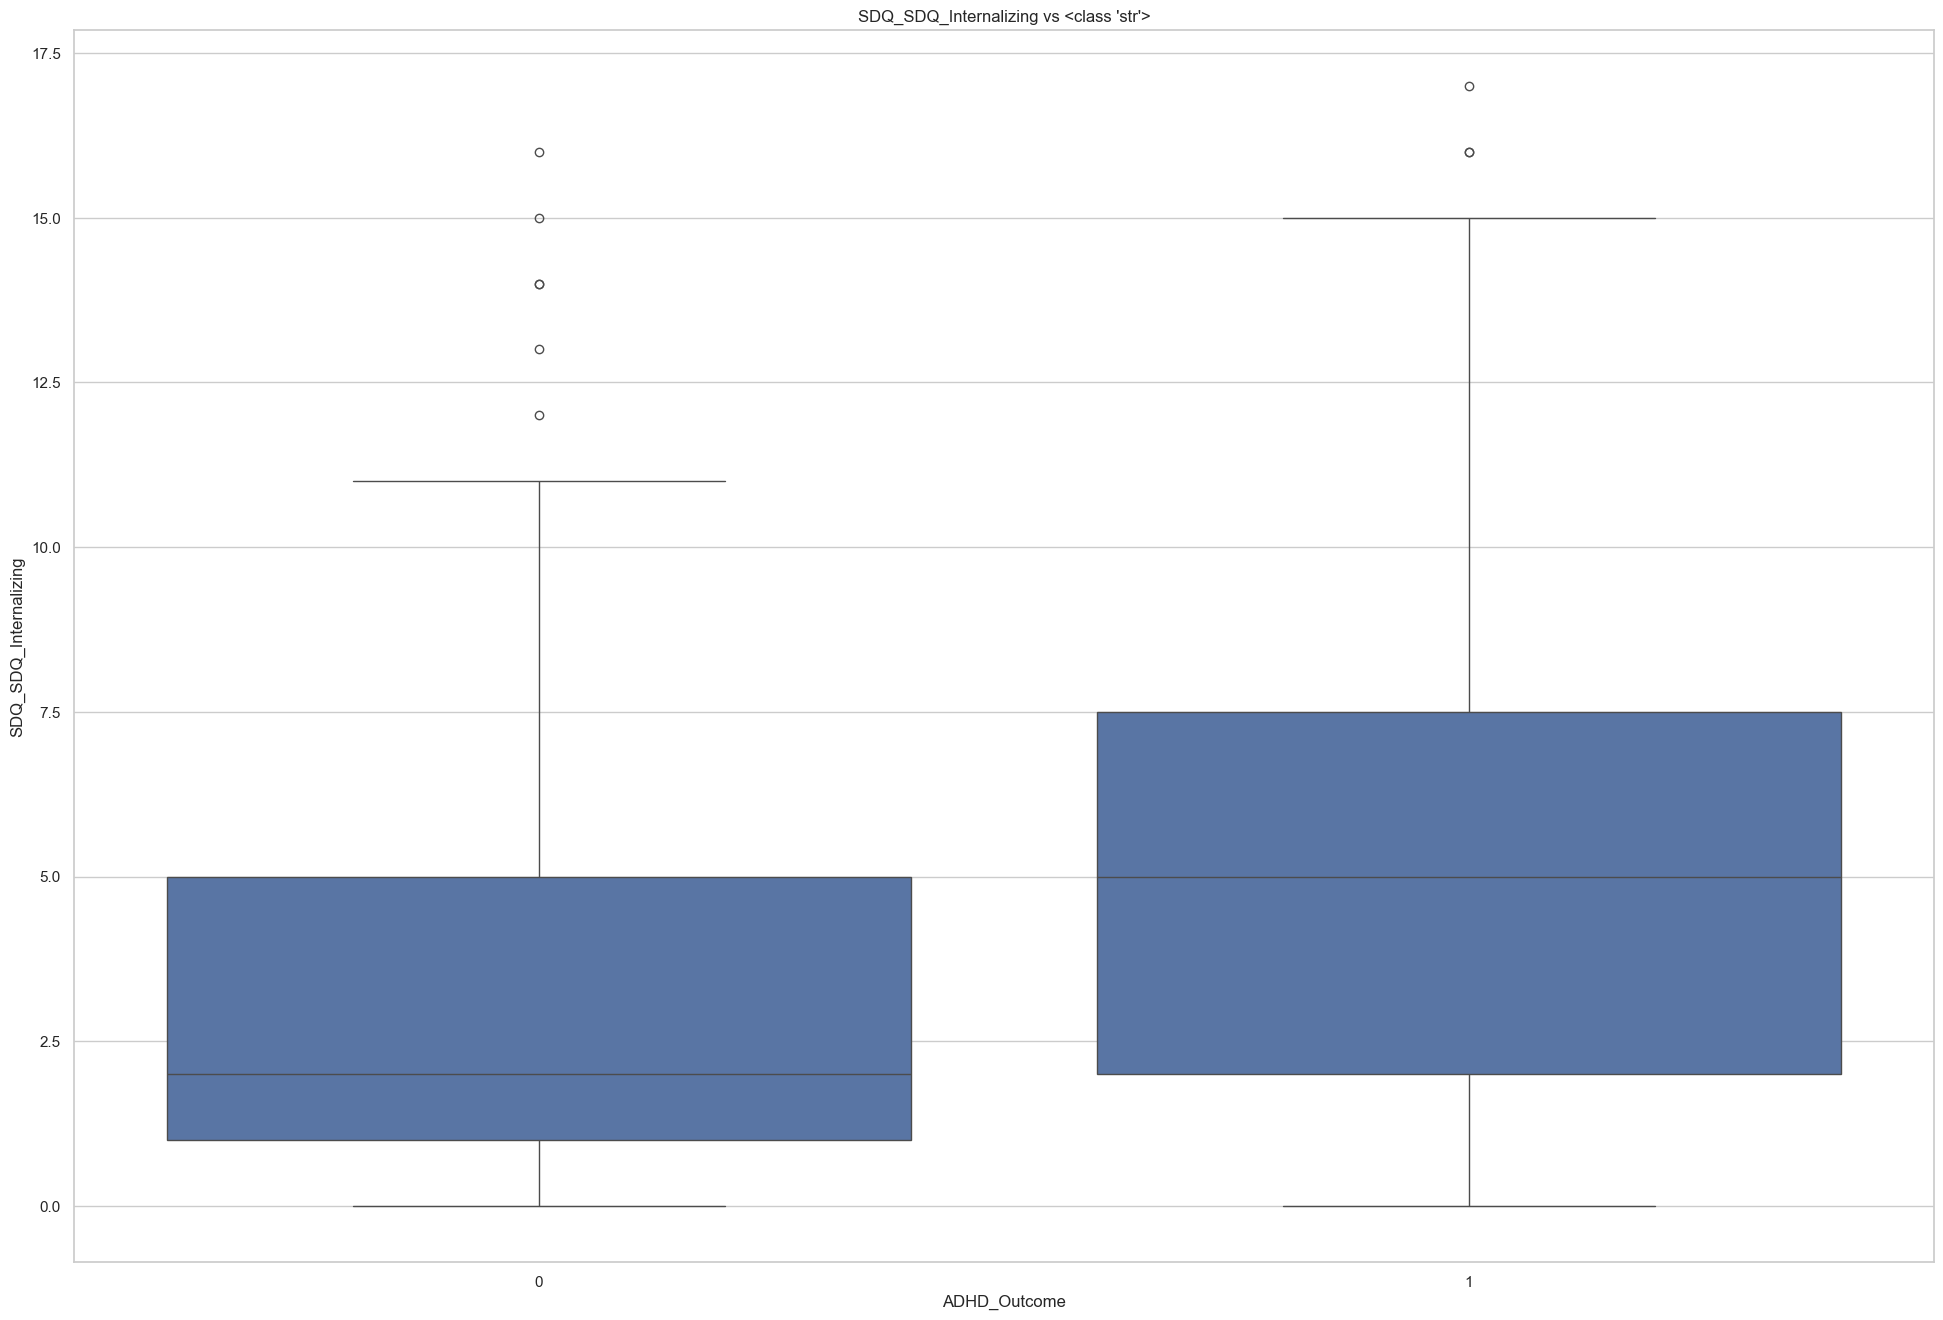

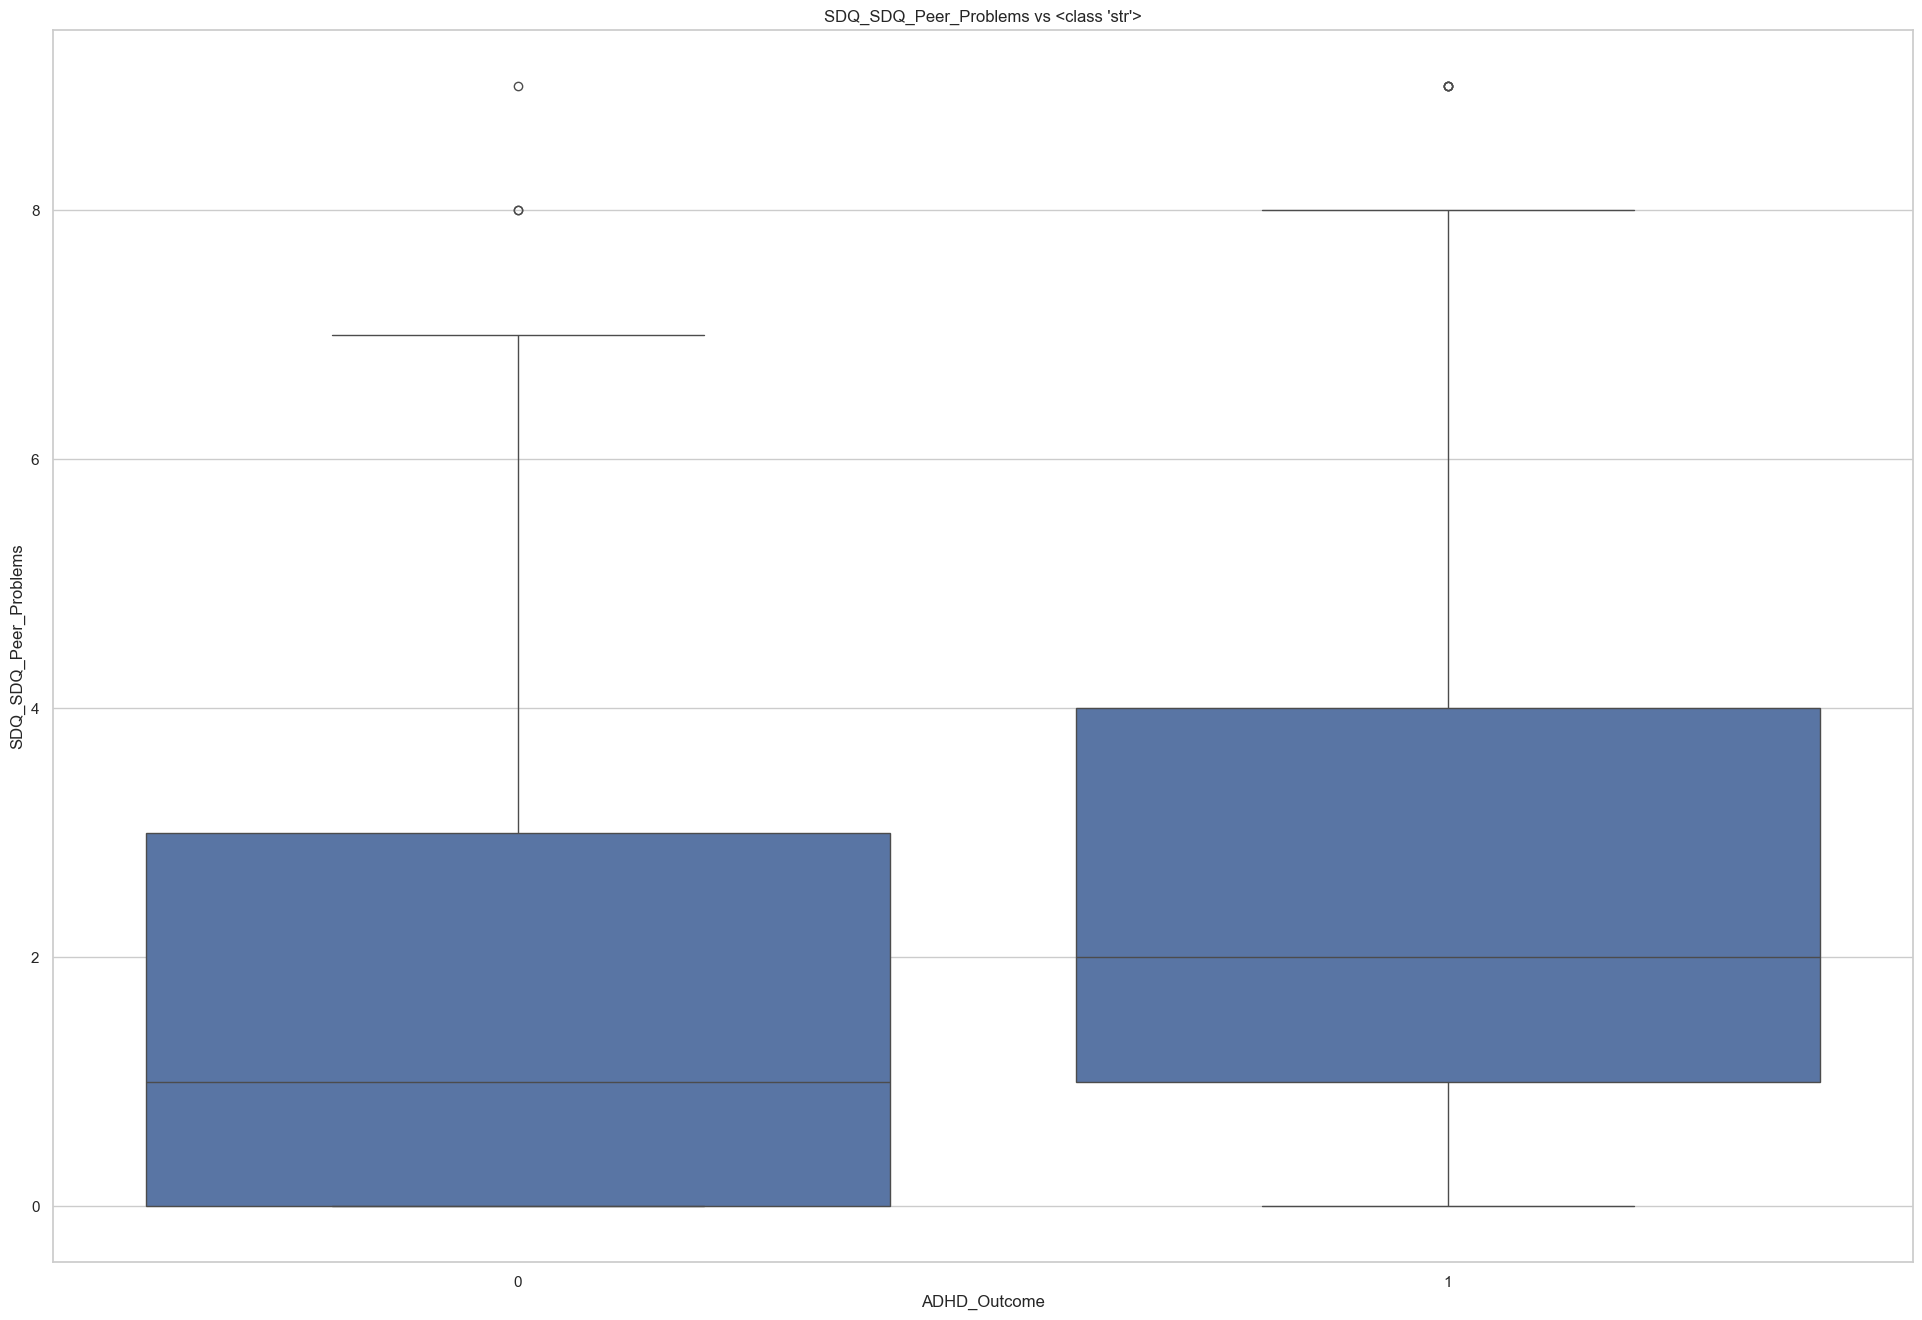

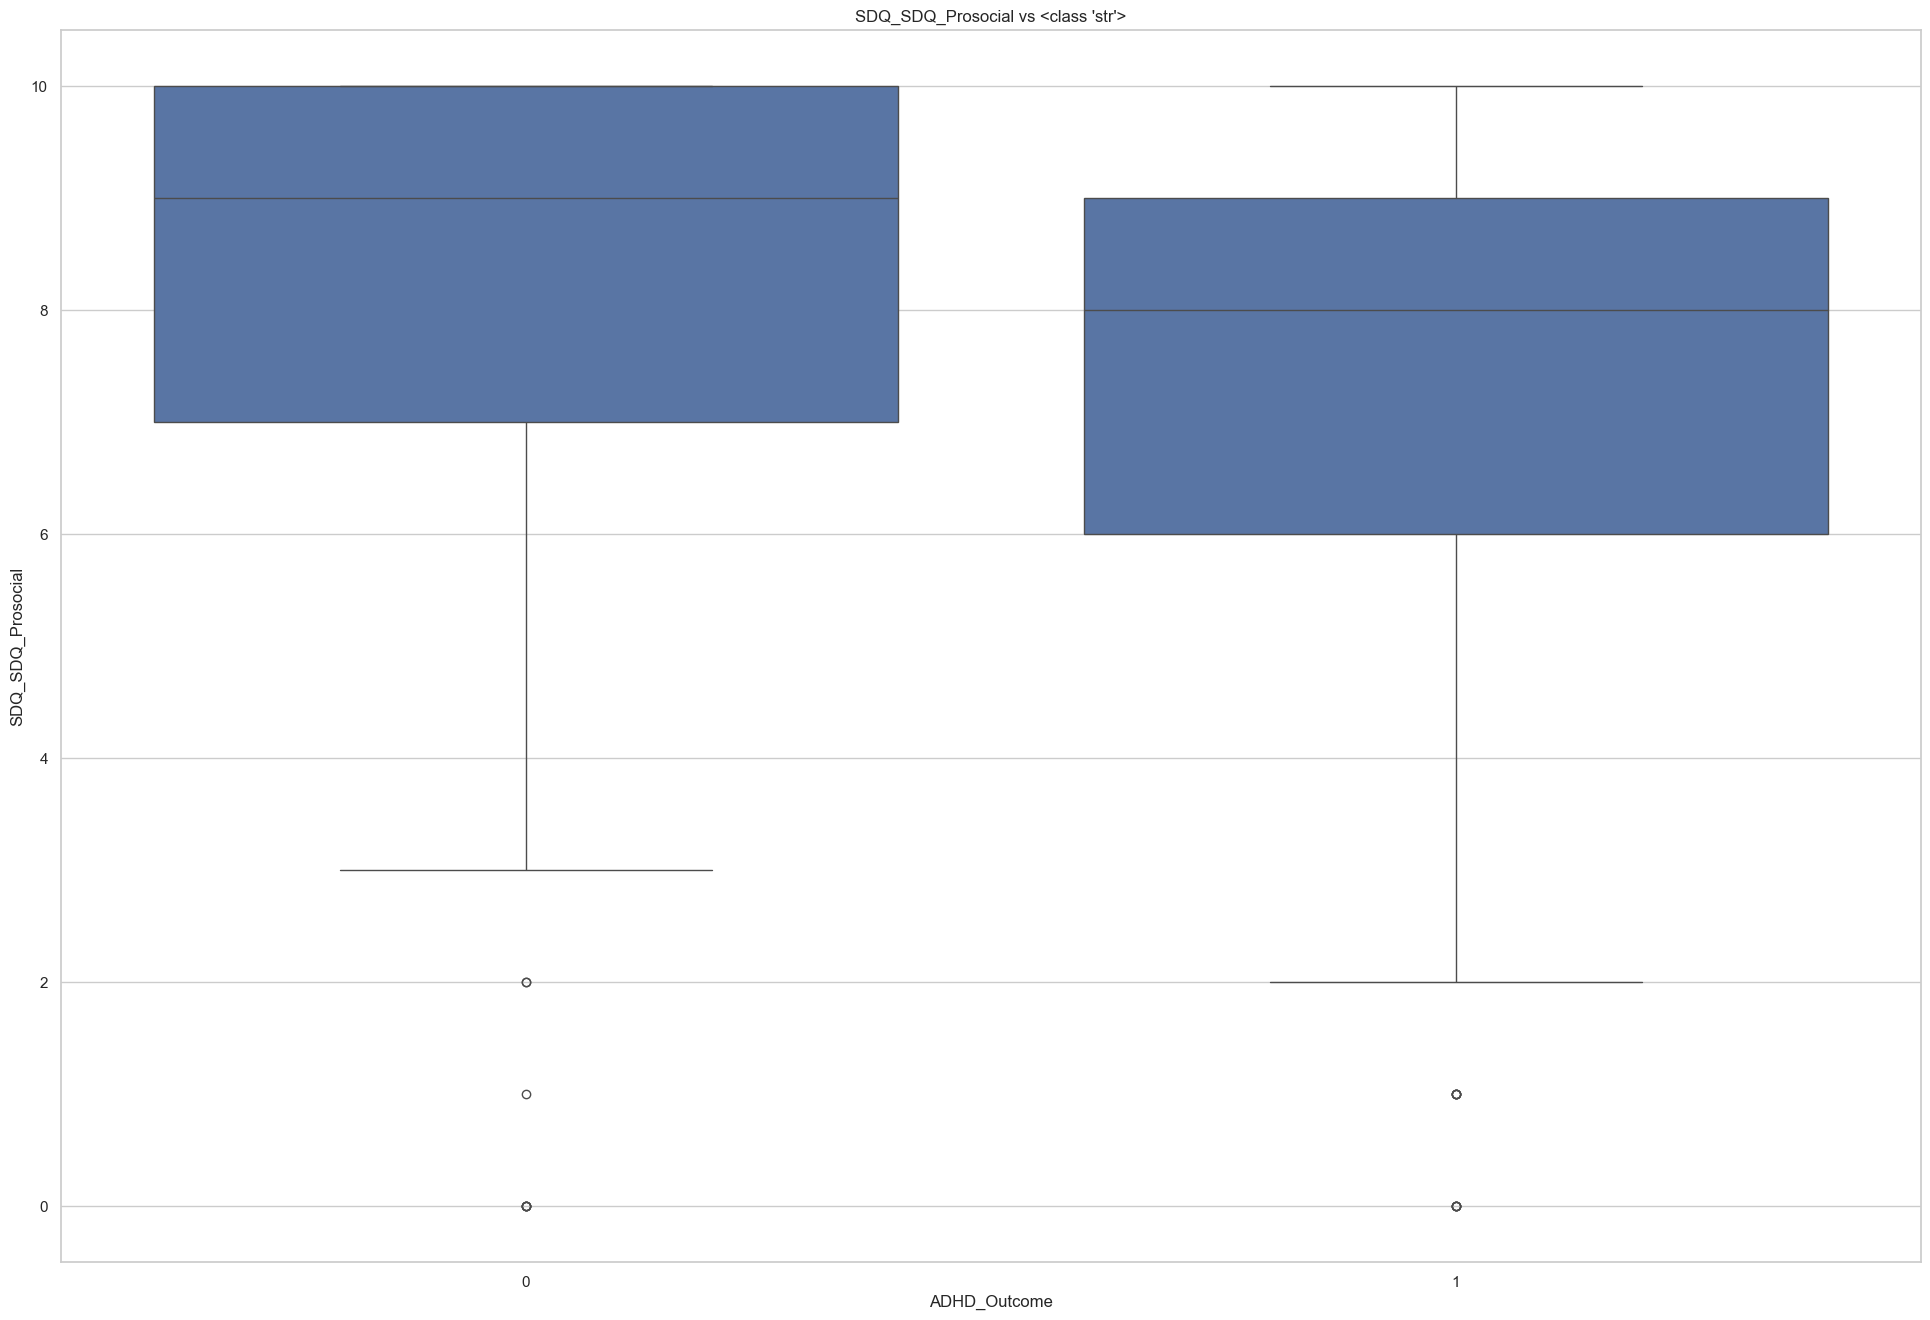

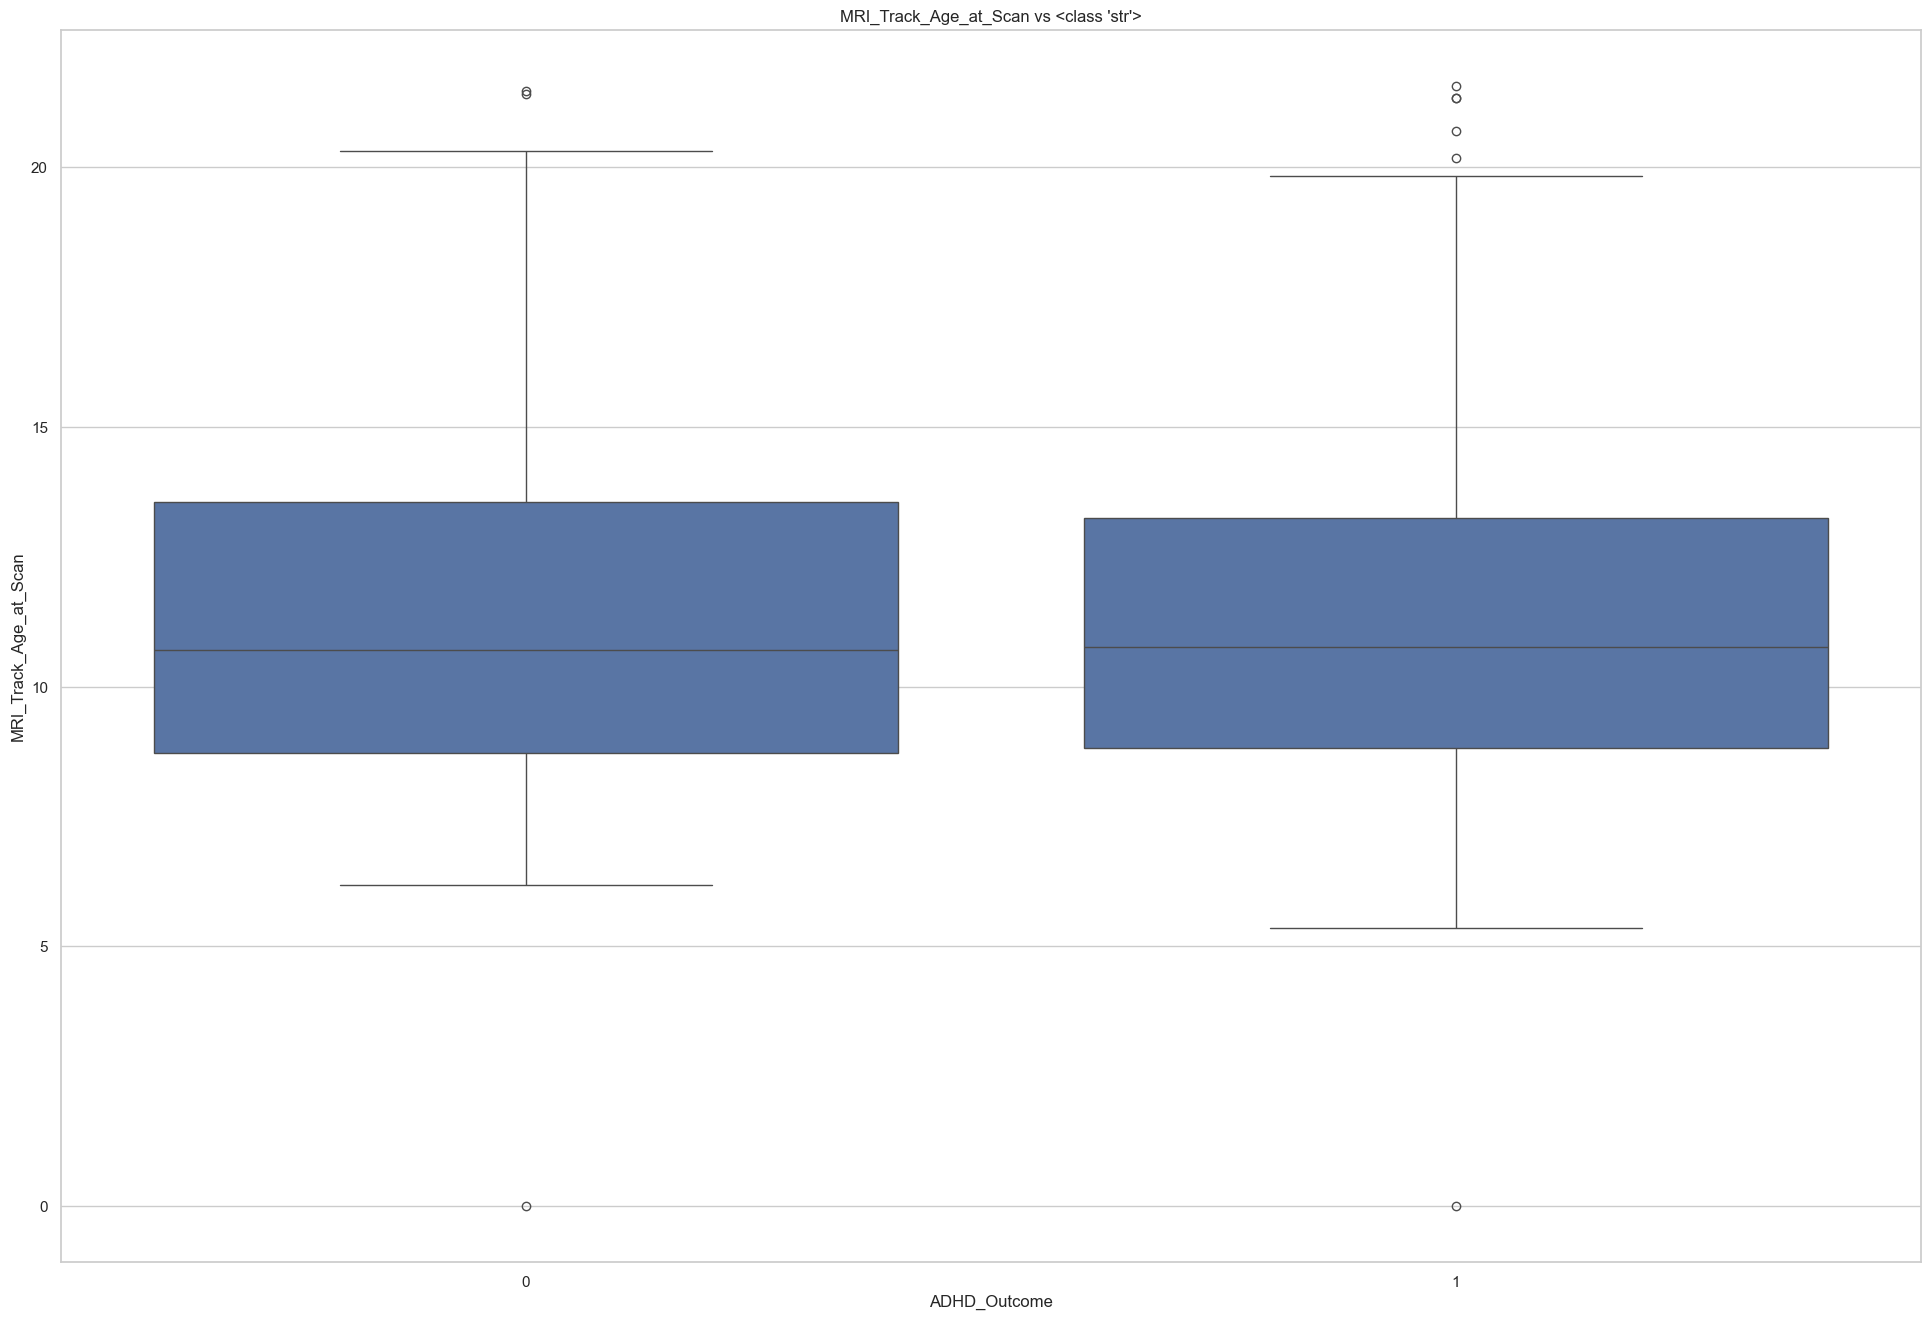

In [35]:
feature_relationship(df_metaA, "ADHD_Outcome")

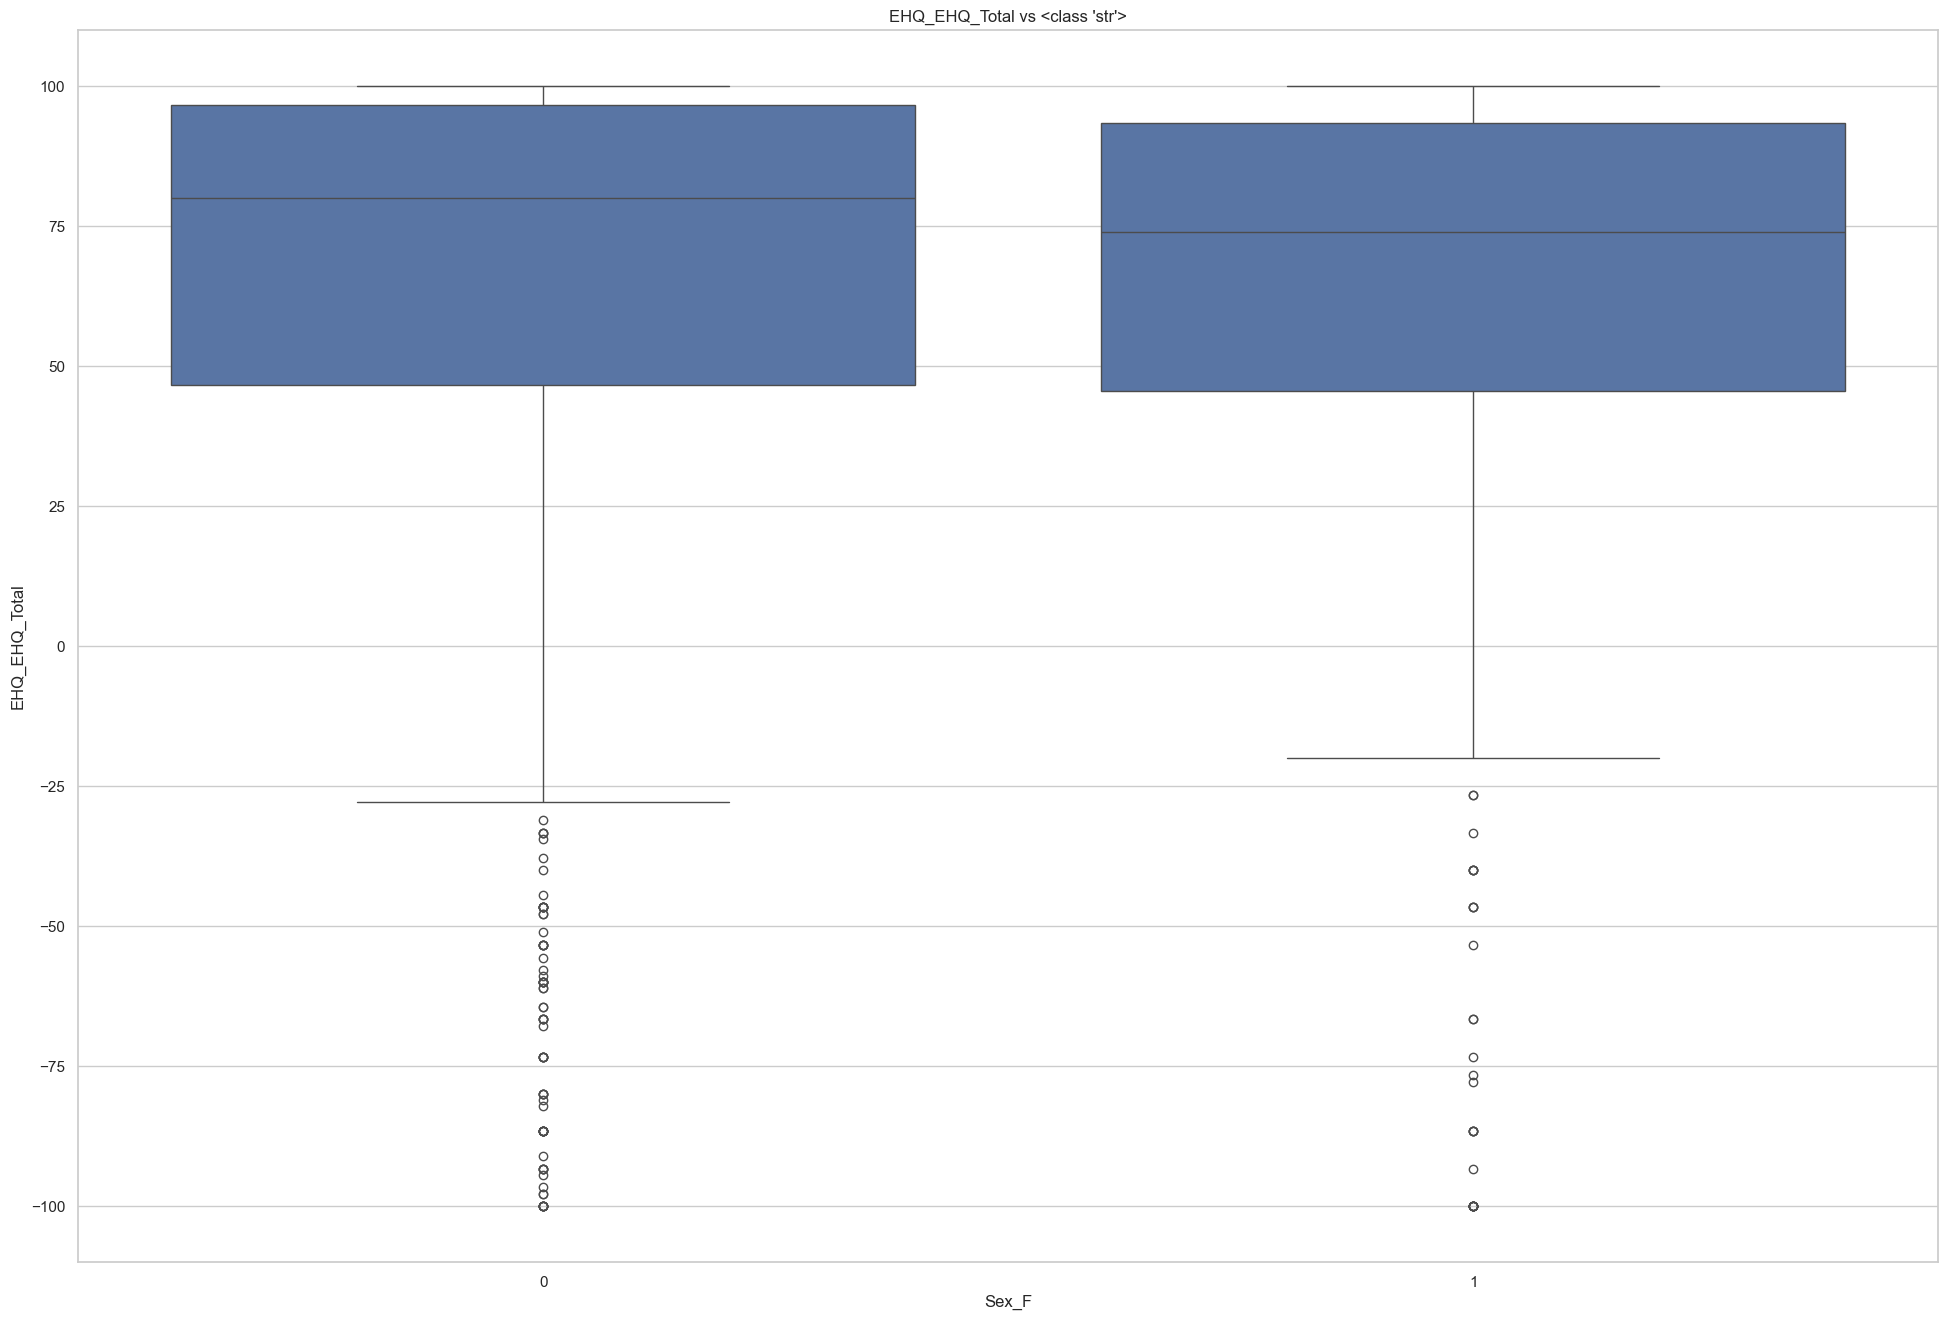

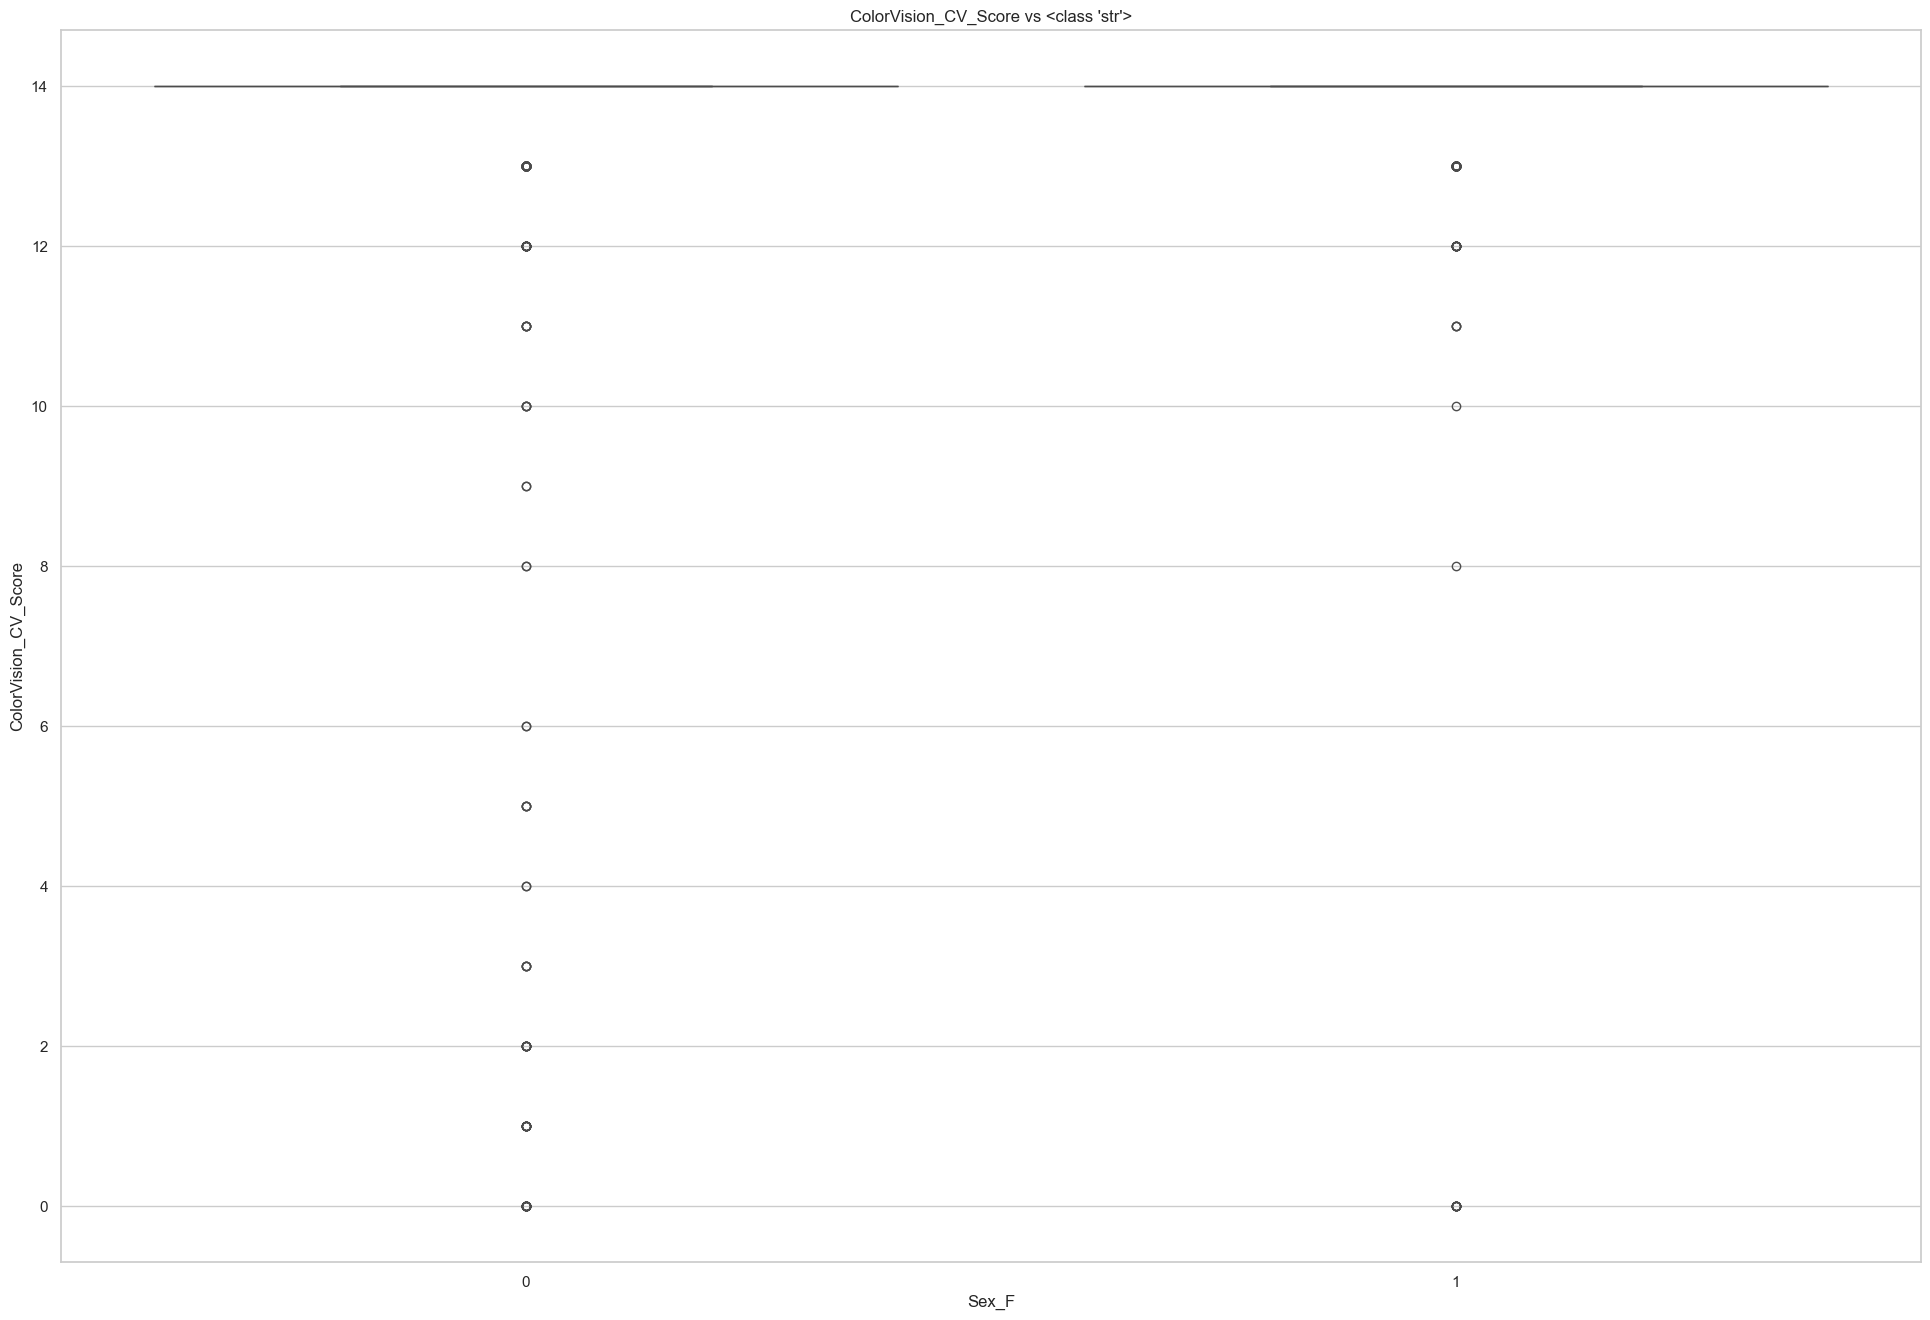

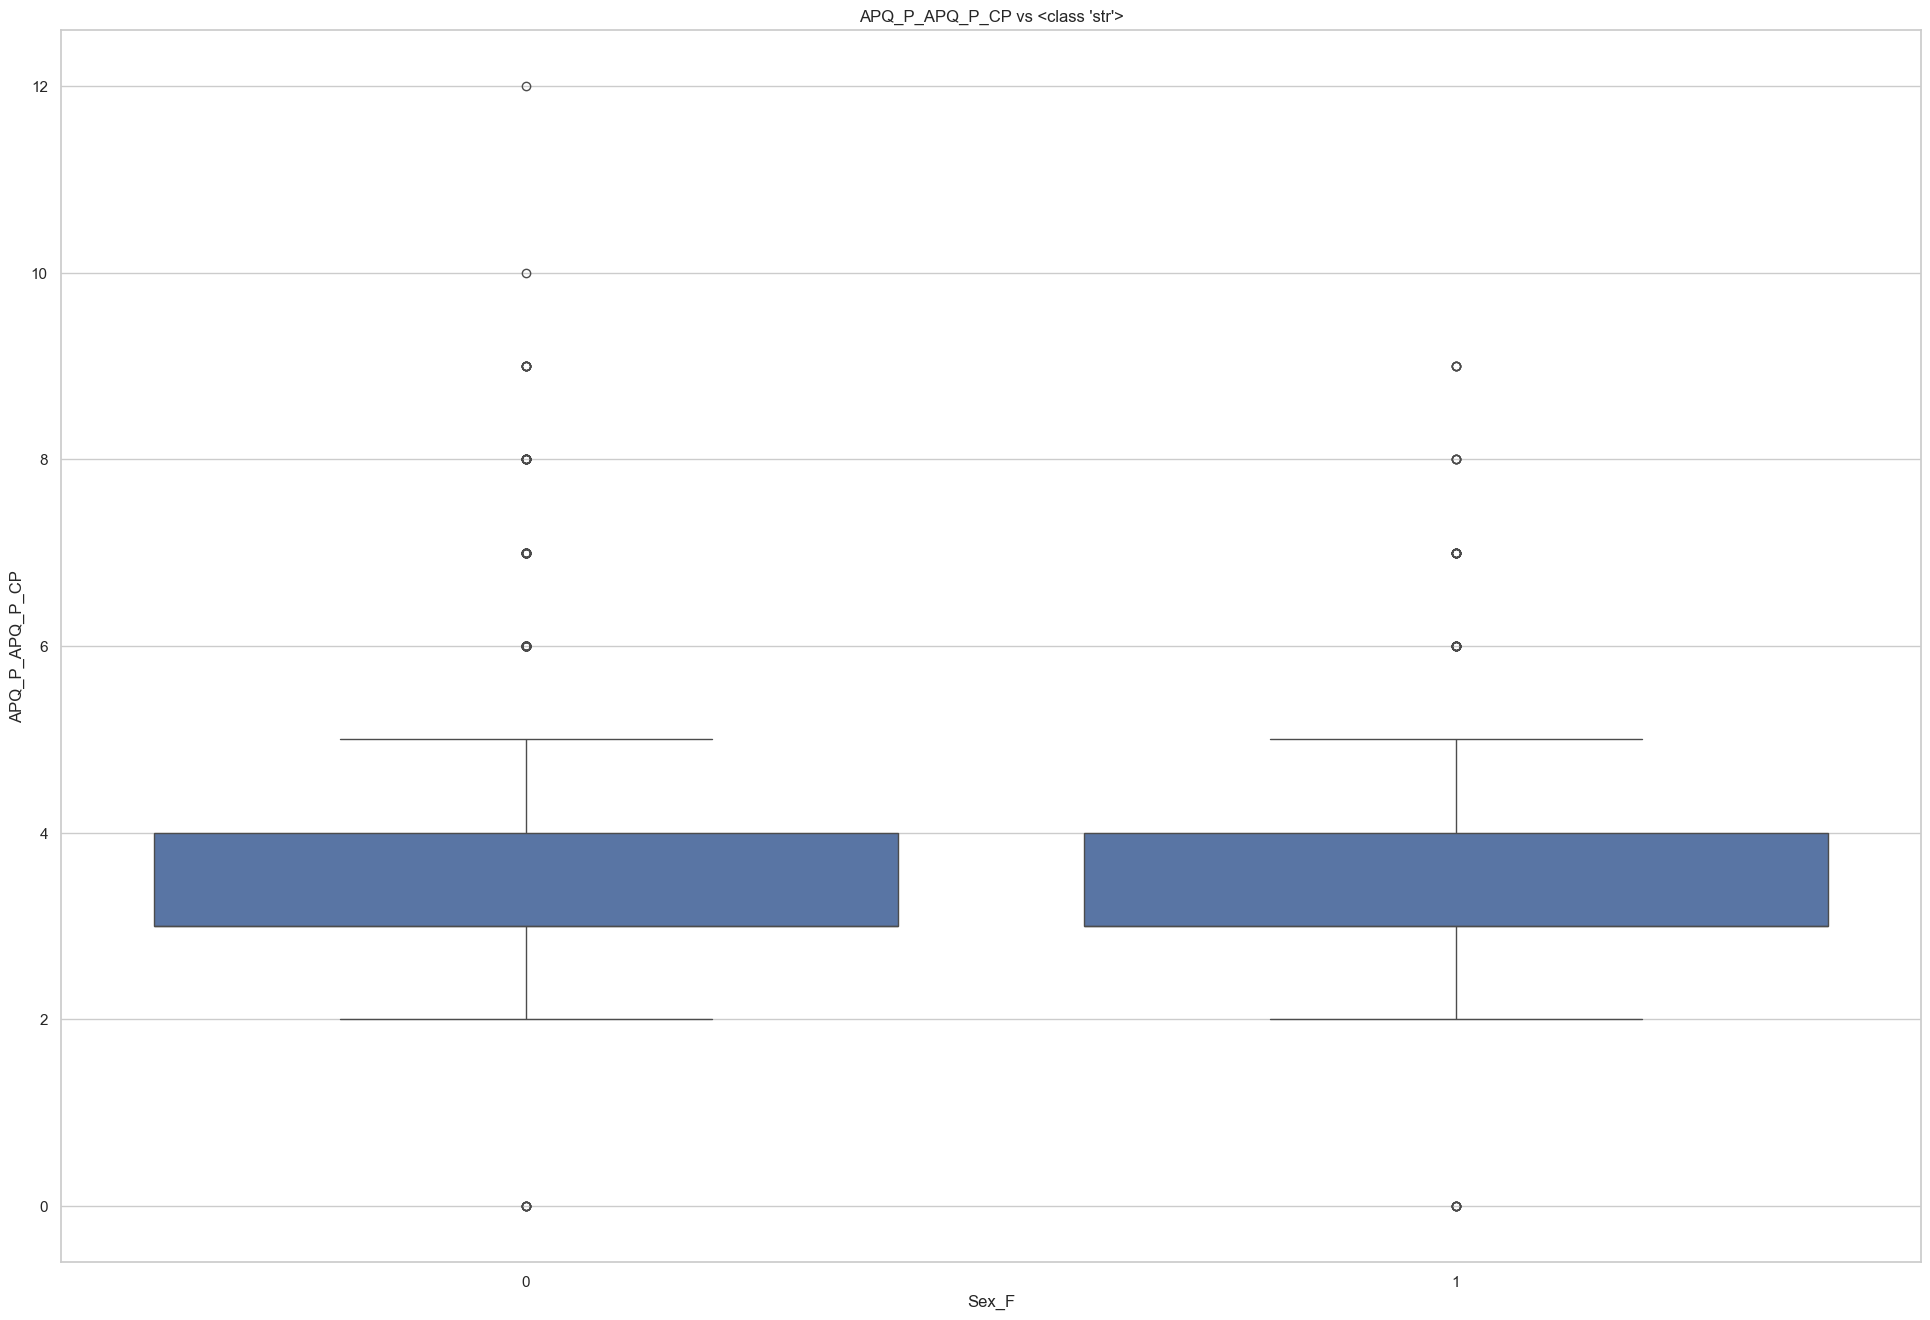

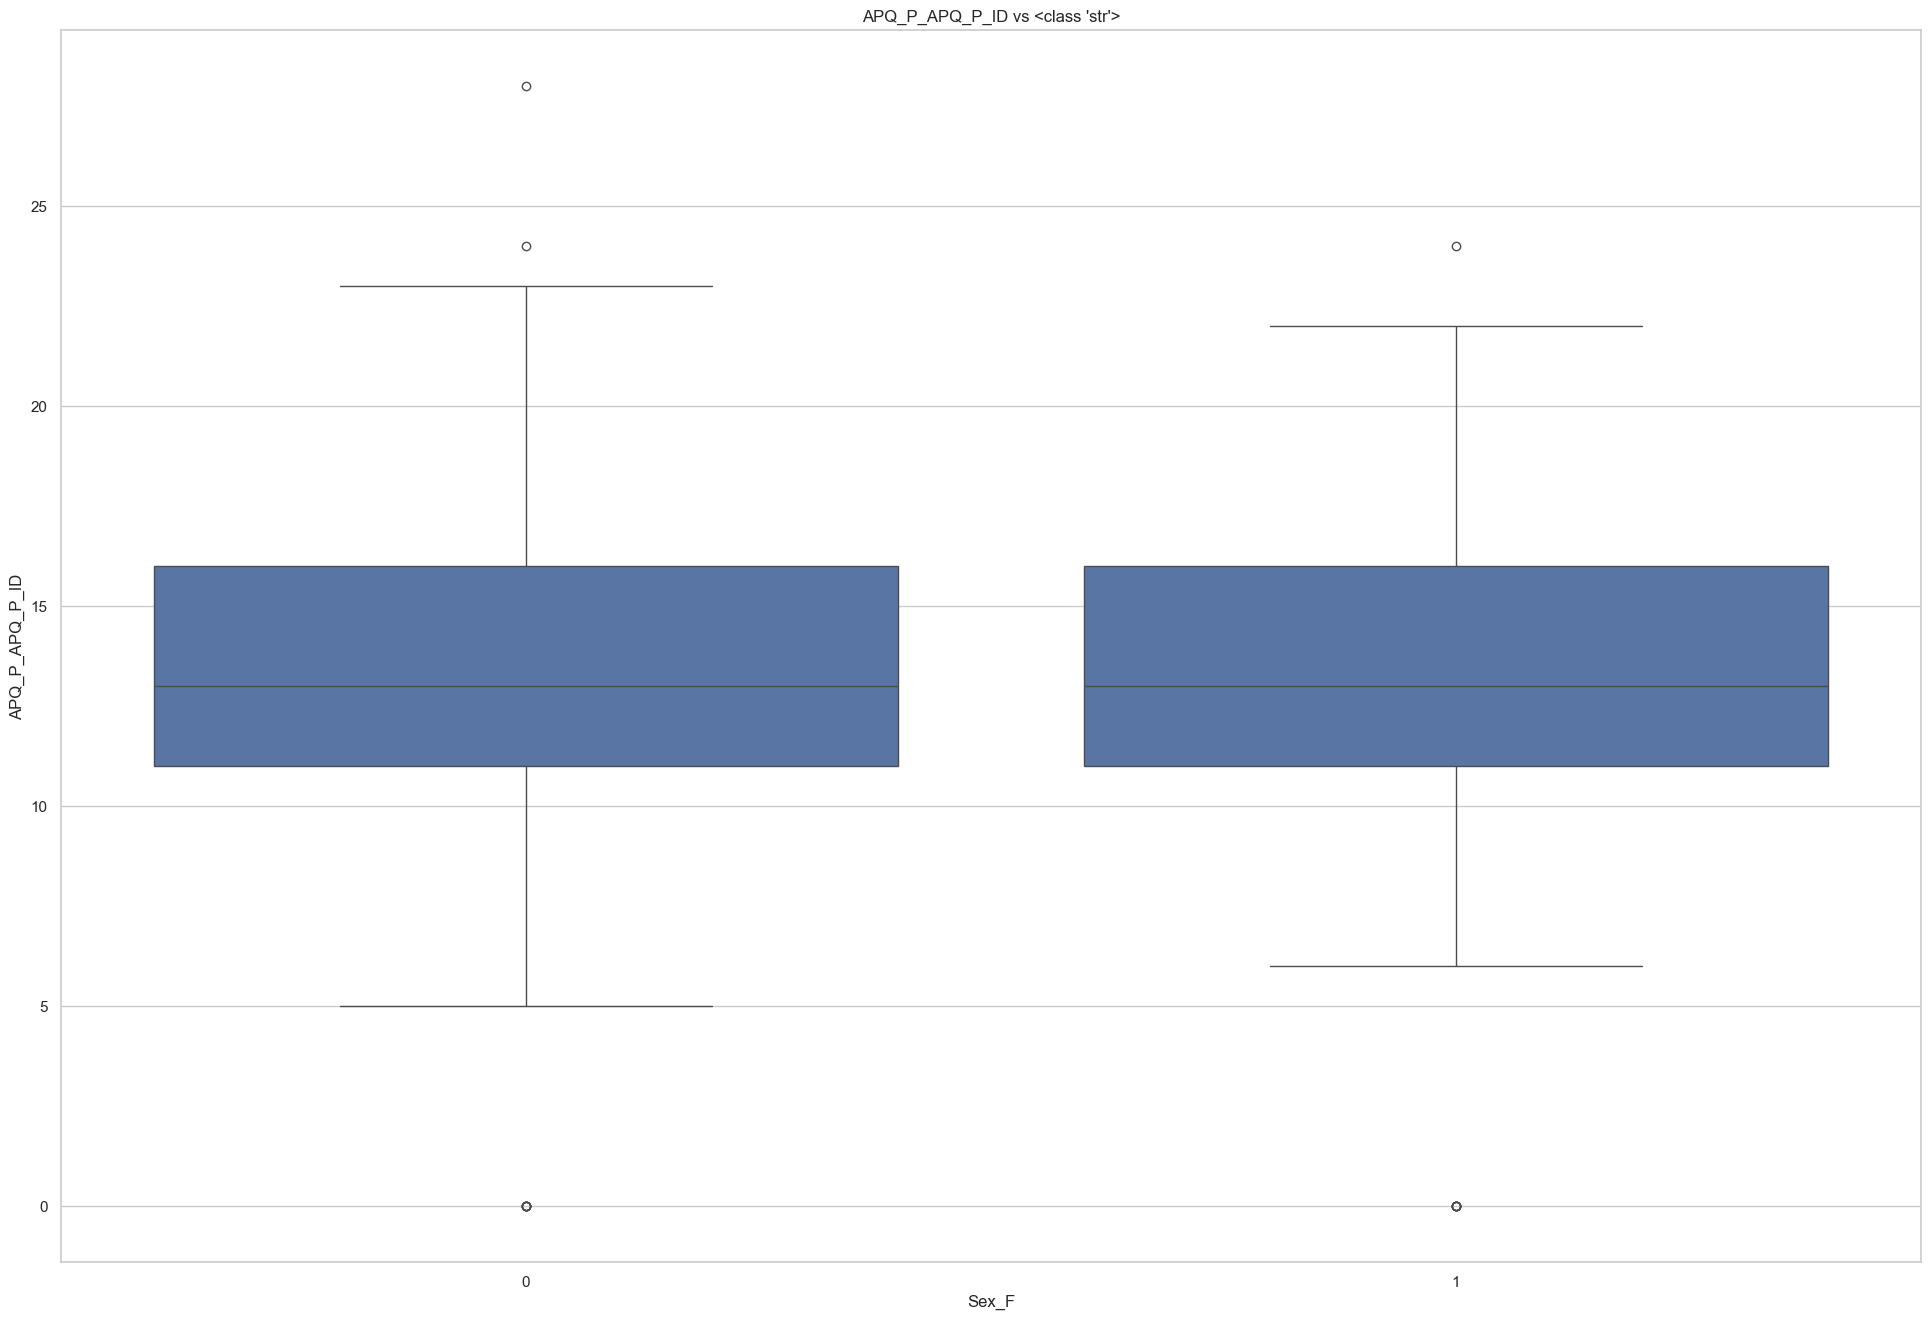

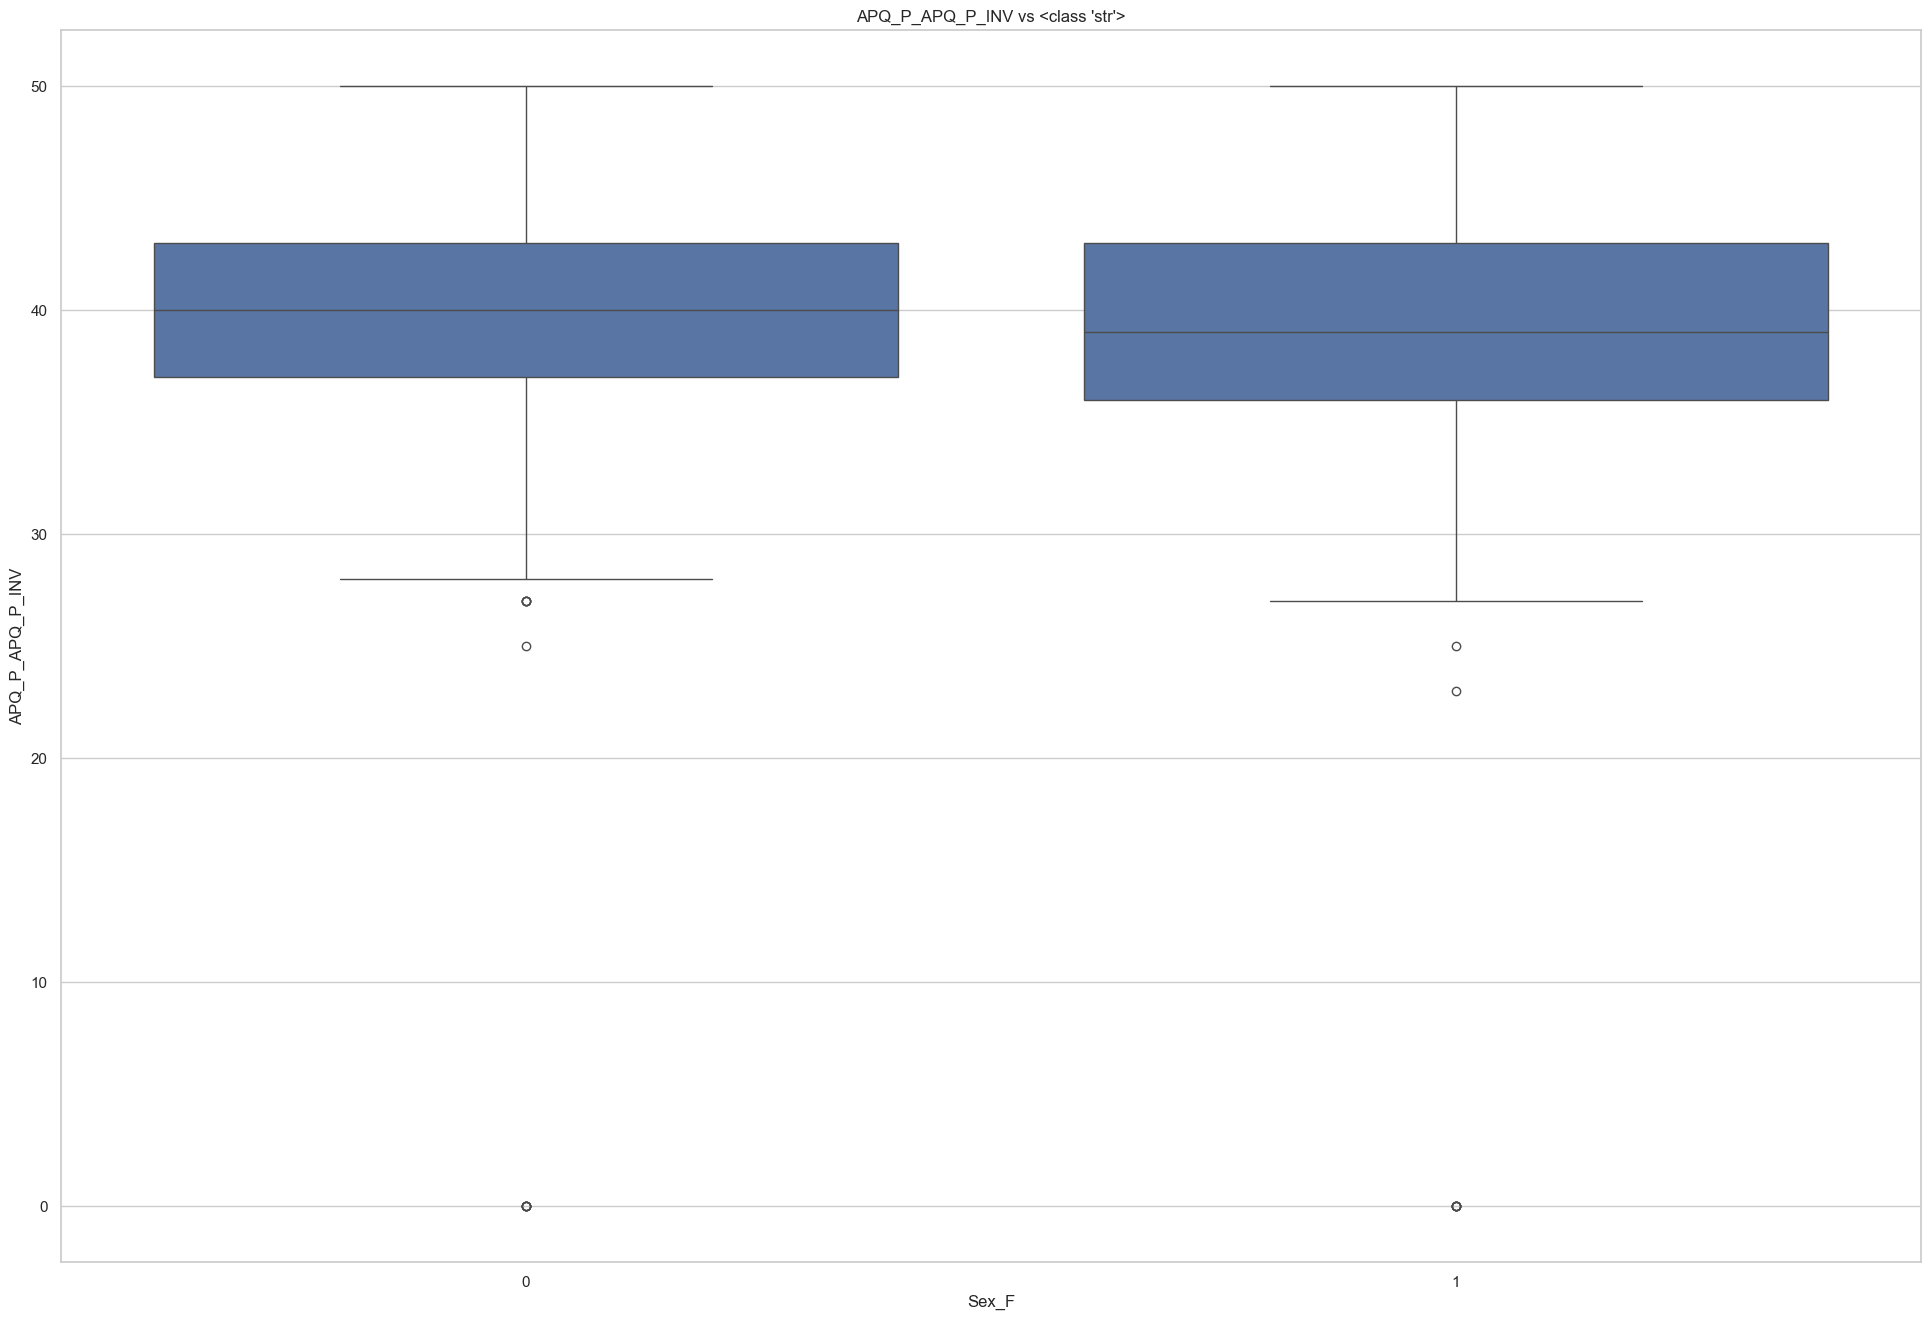

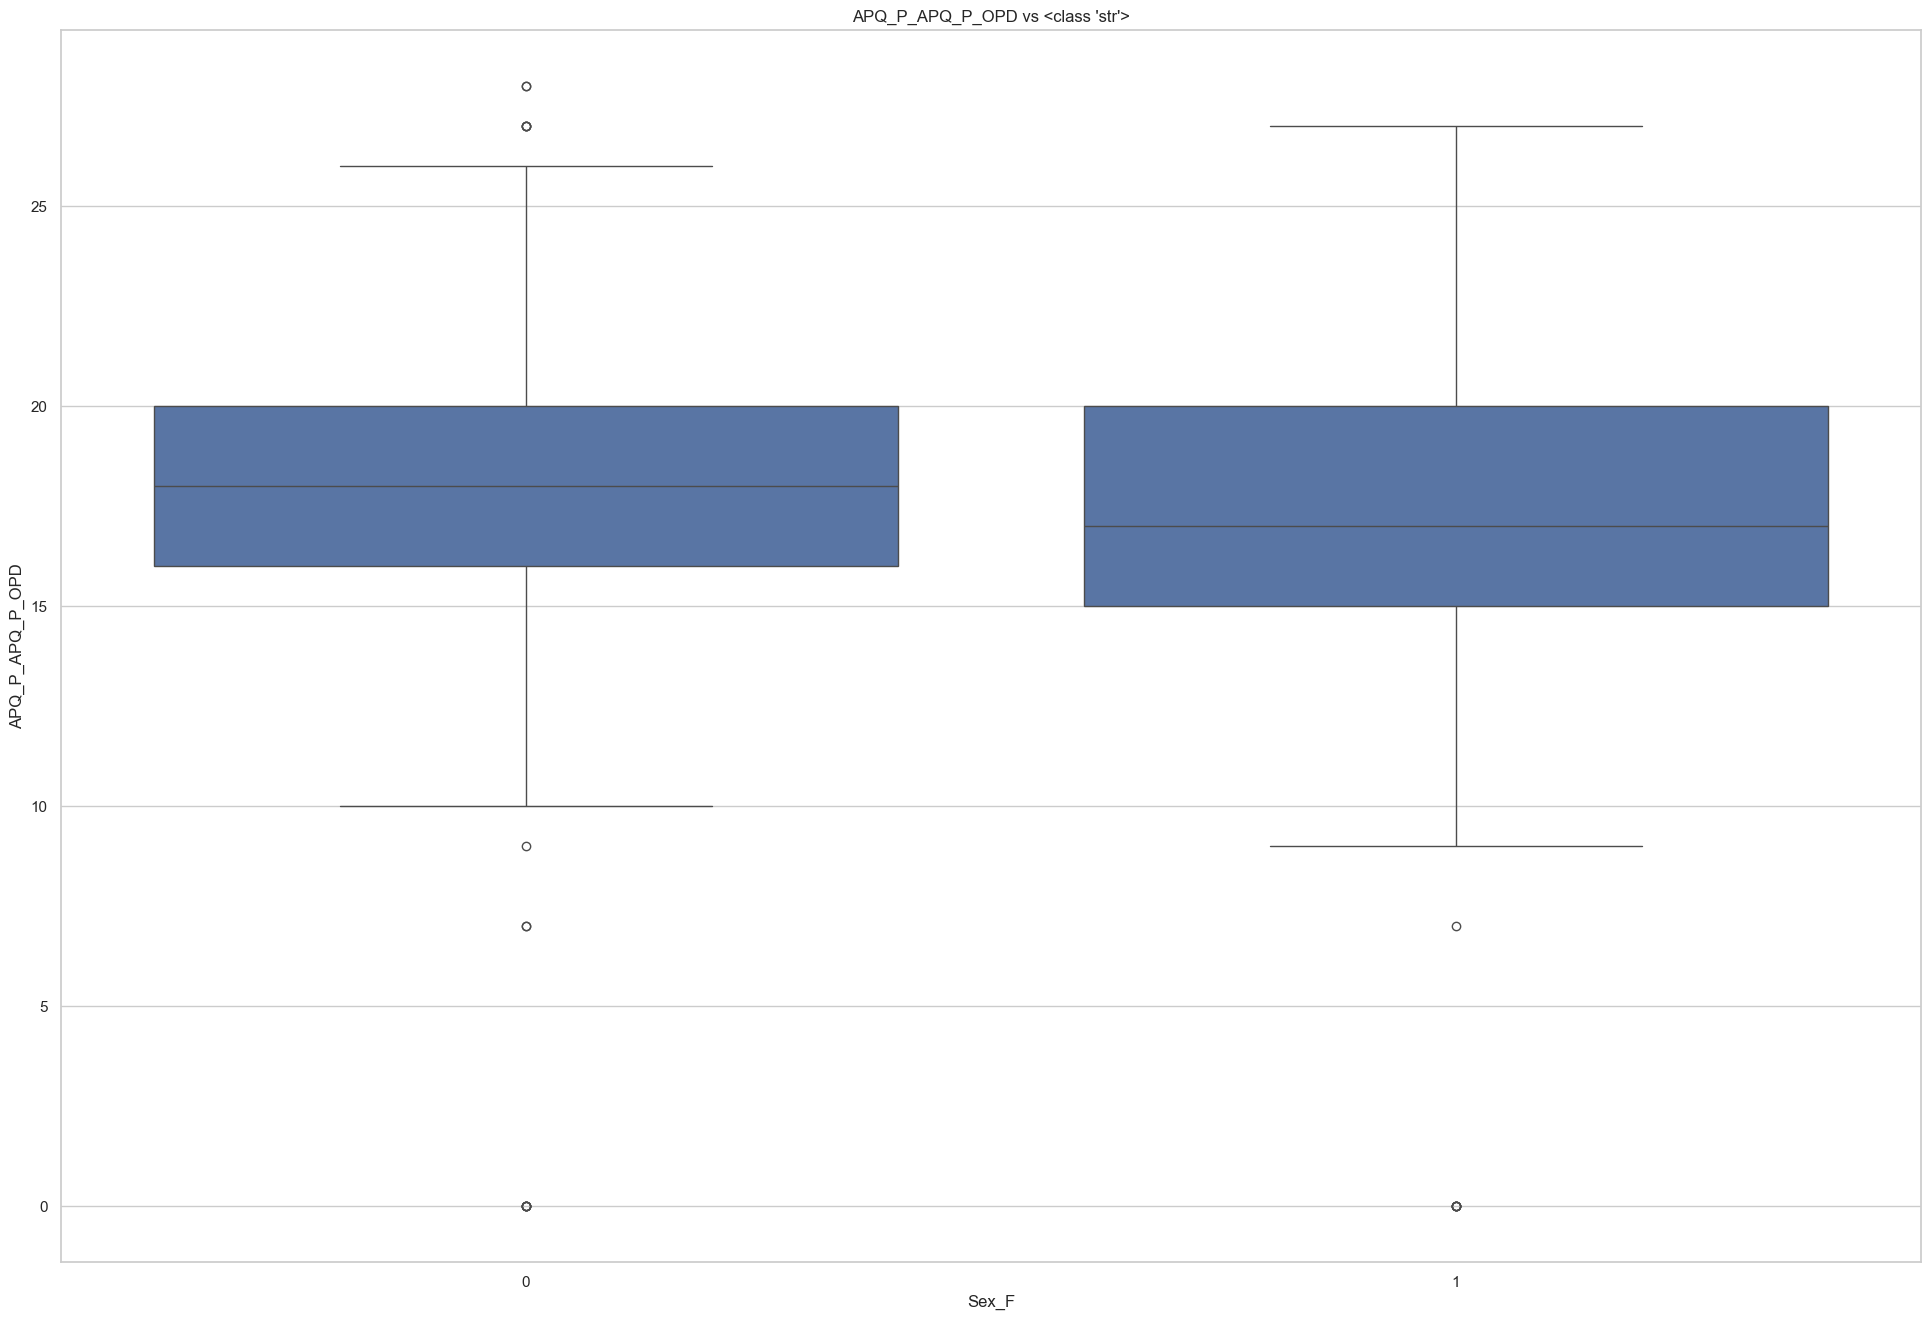

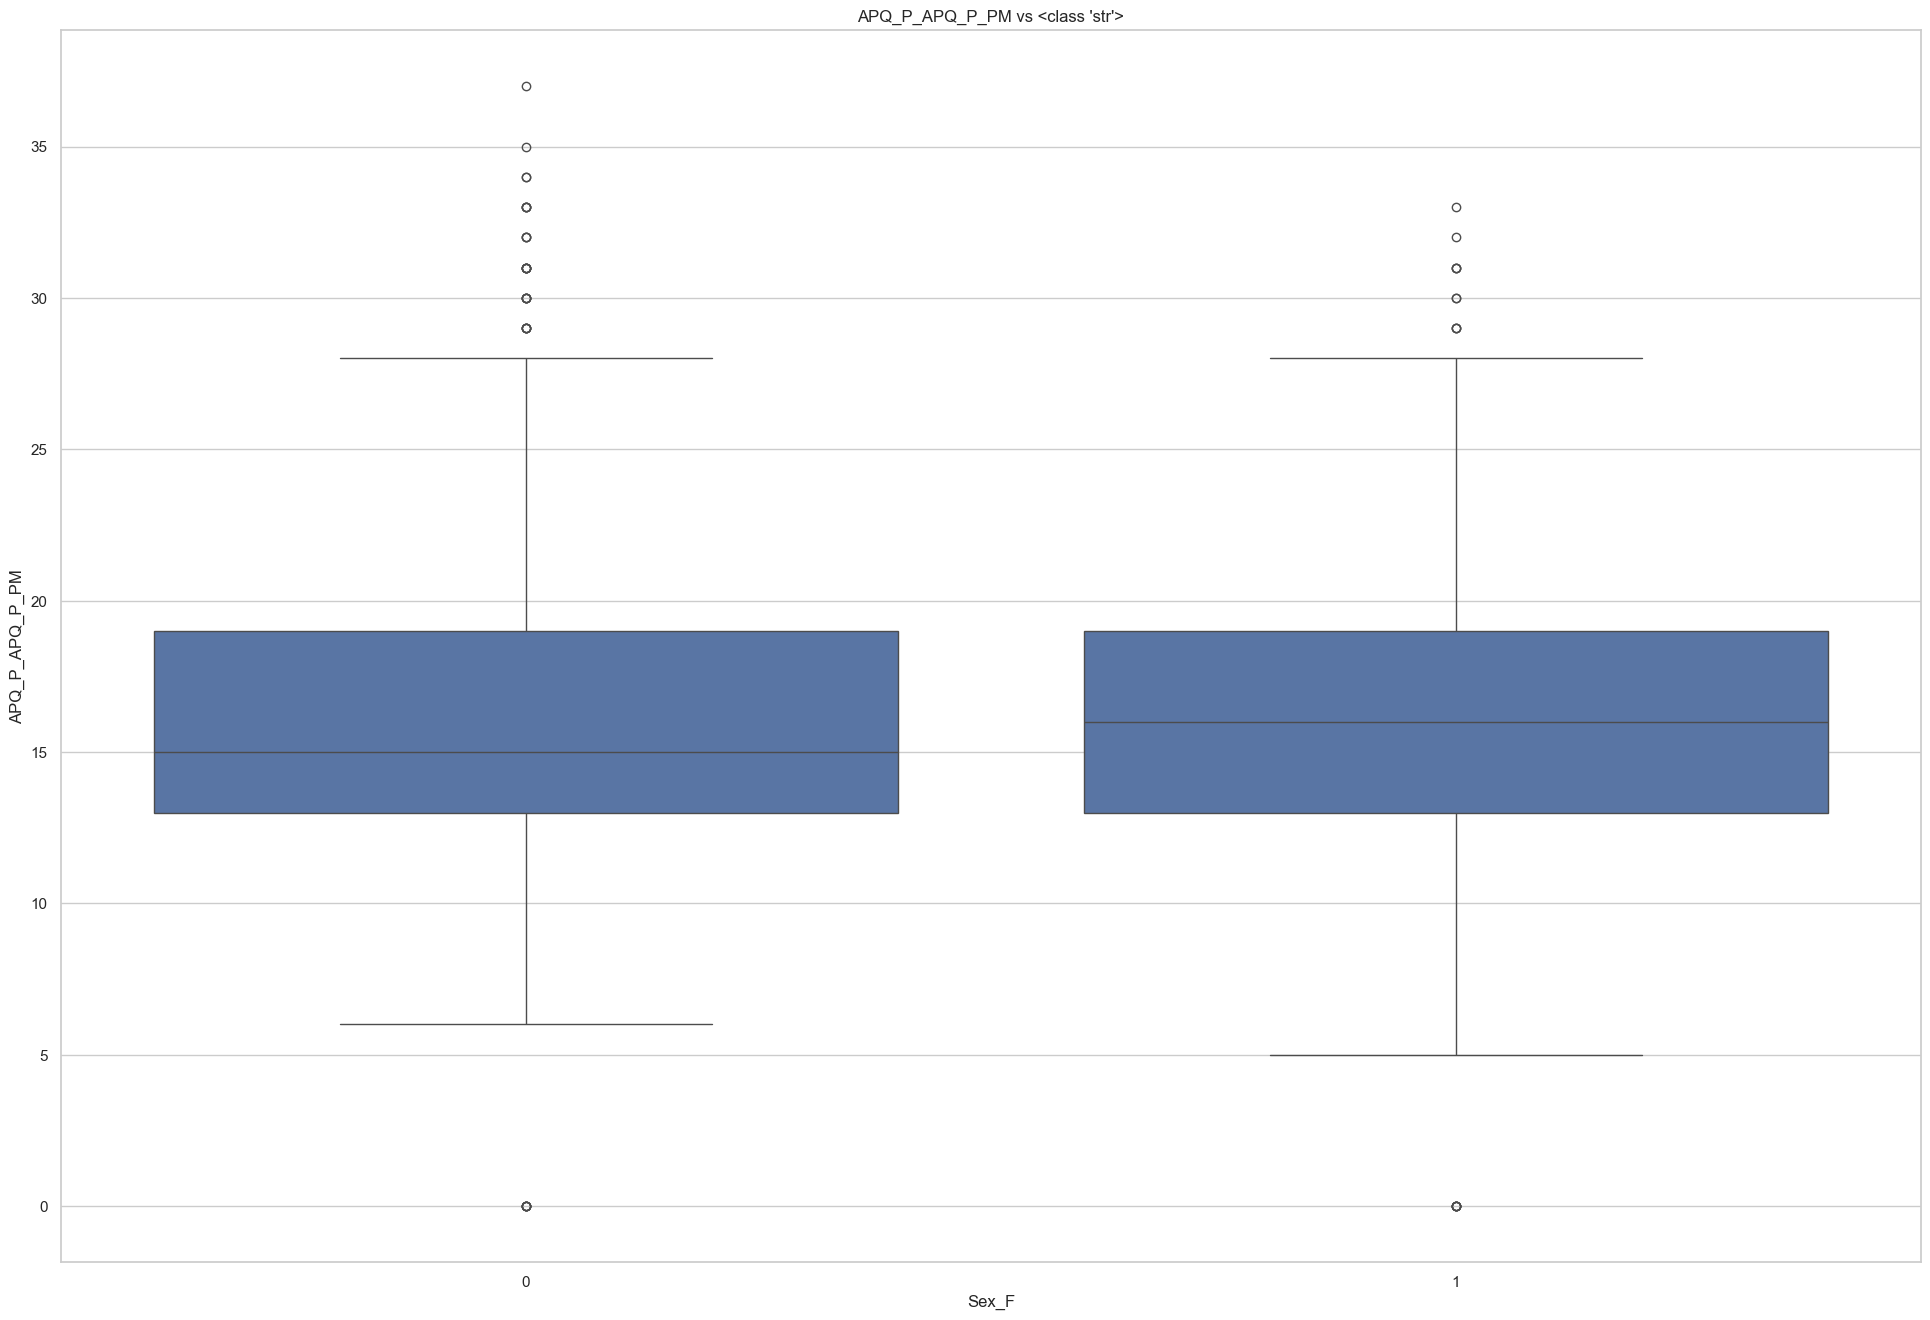

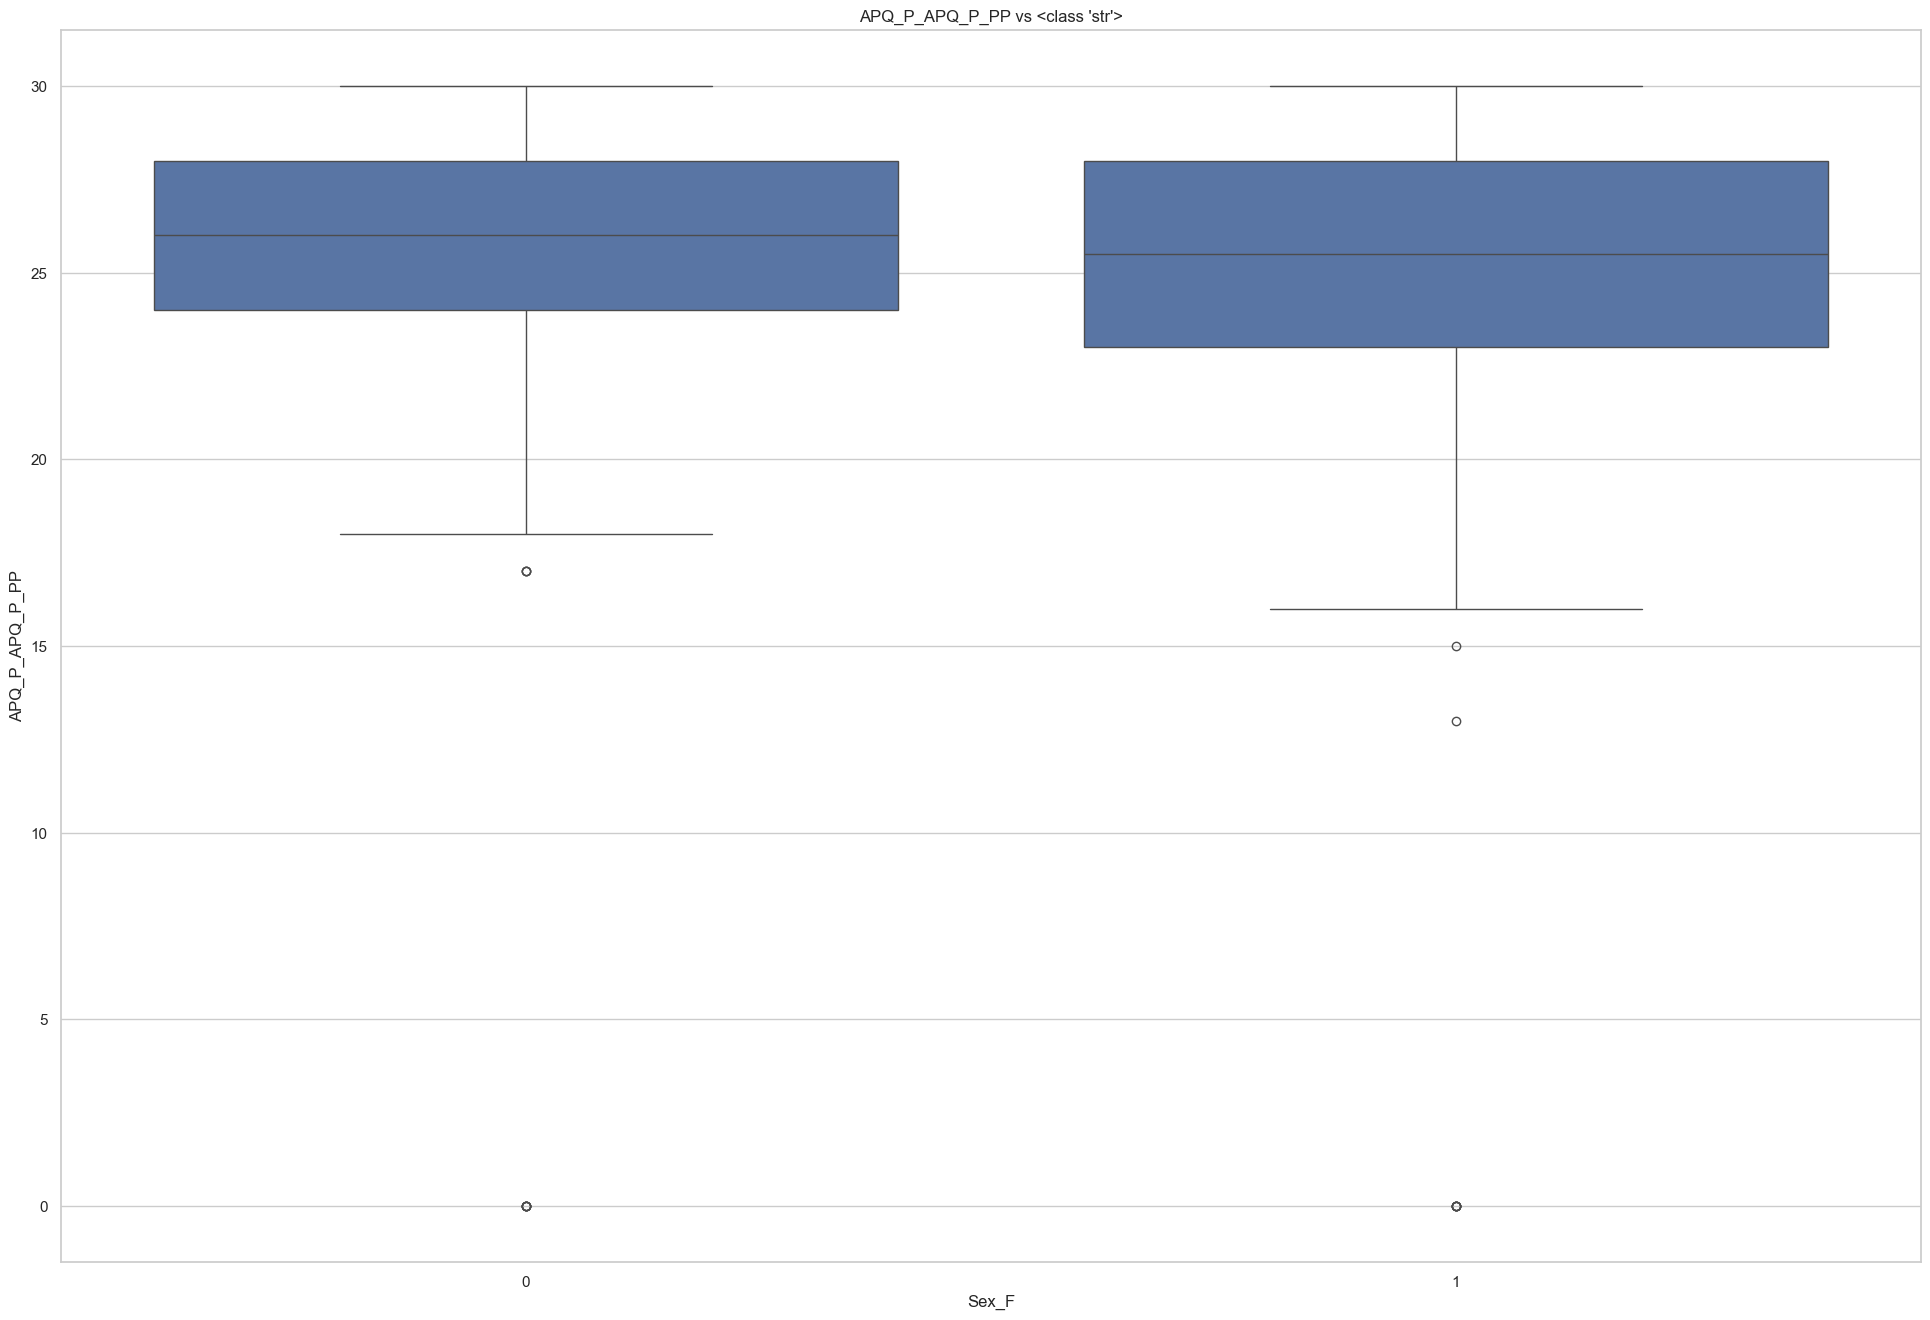

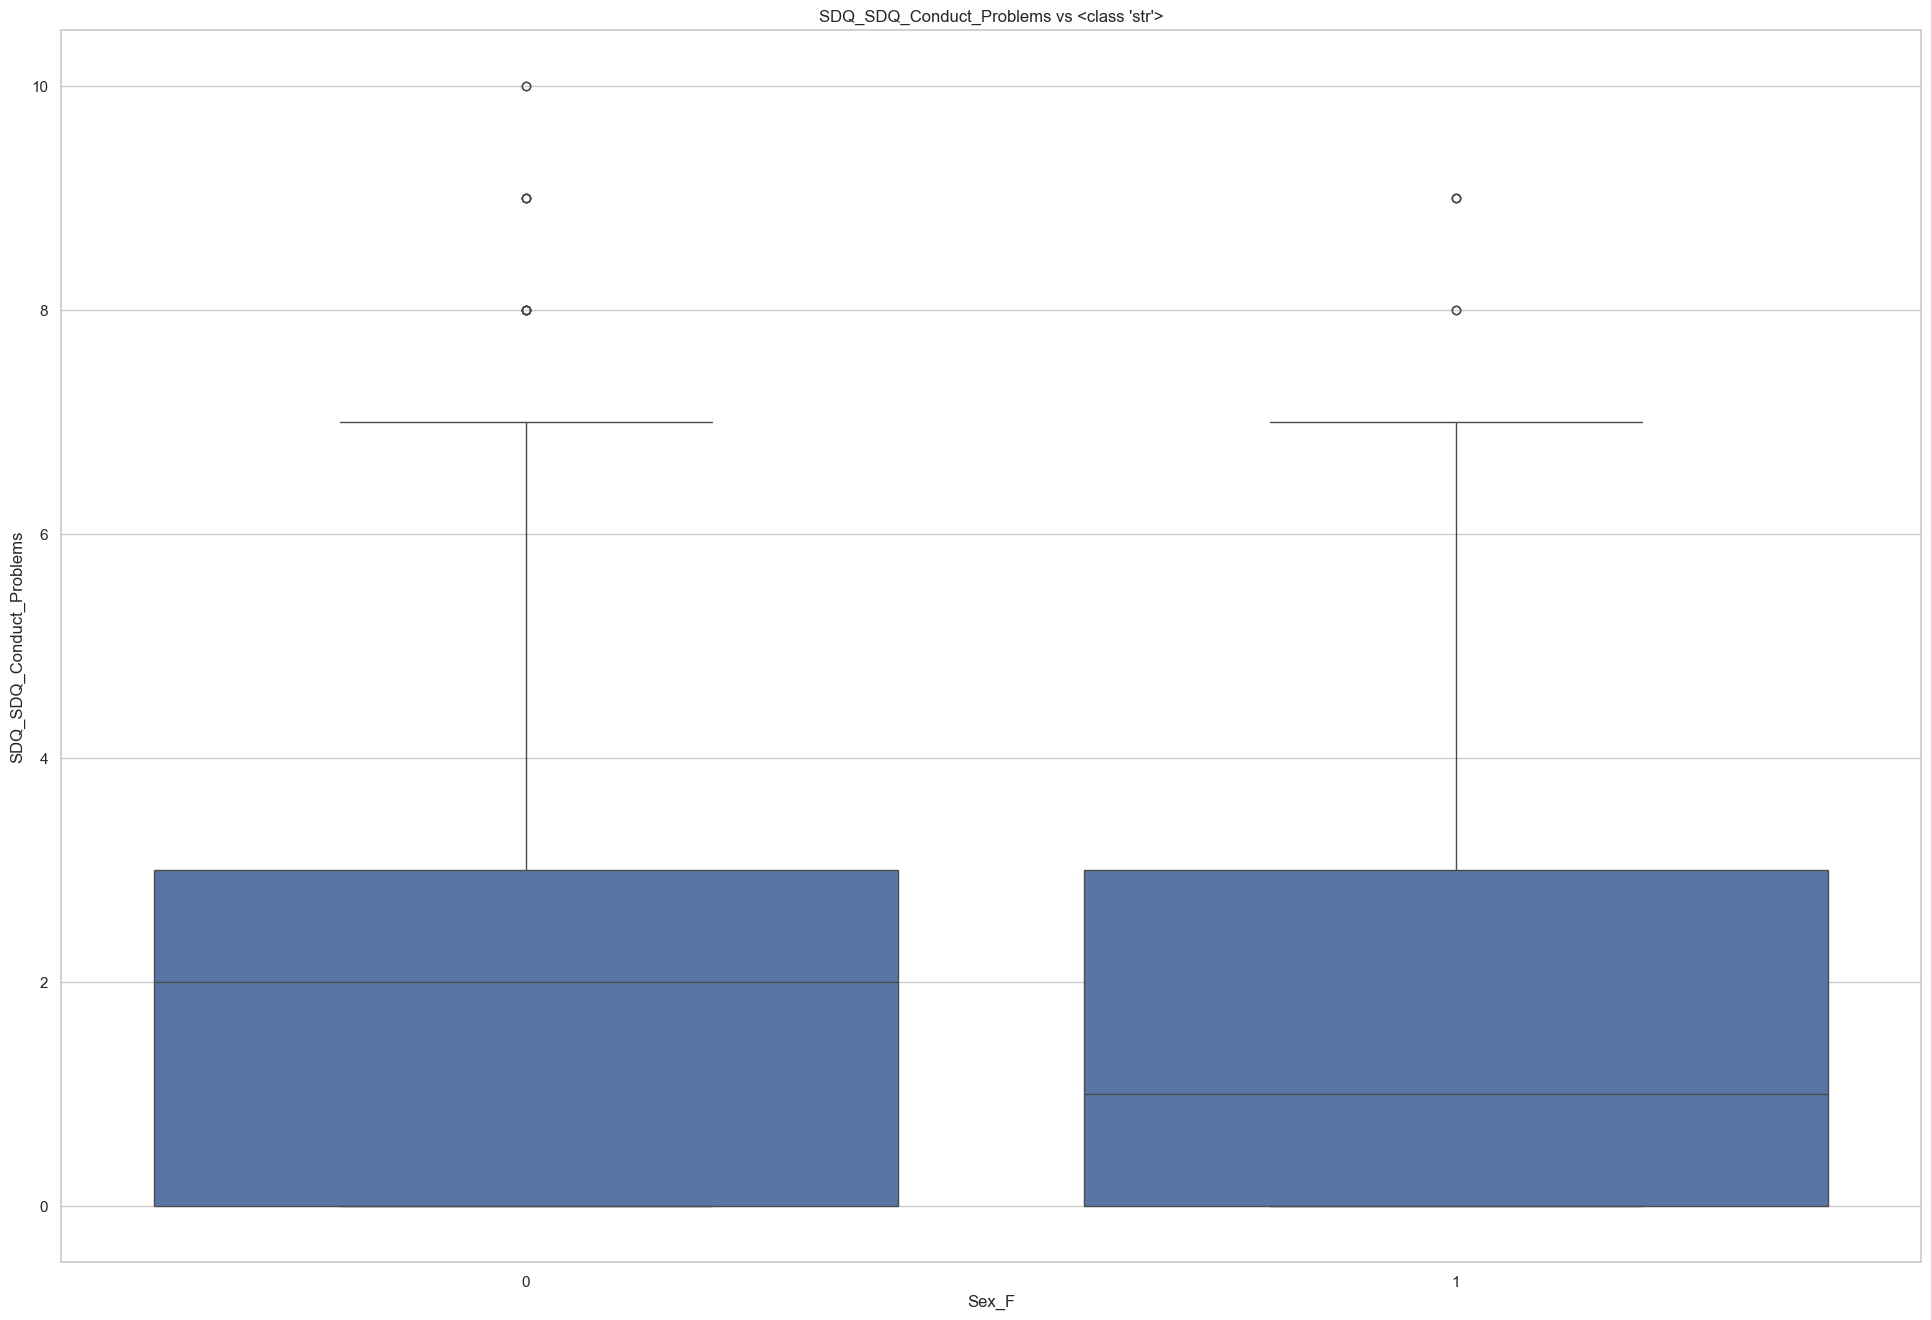

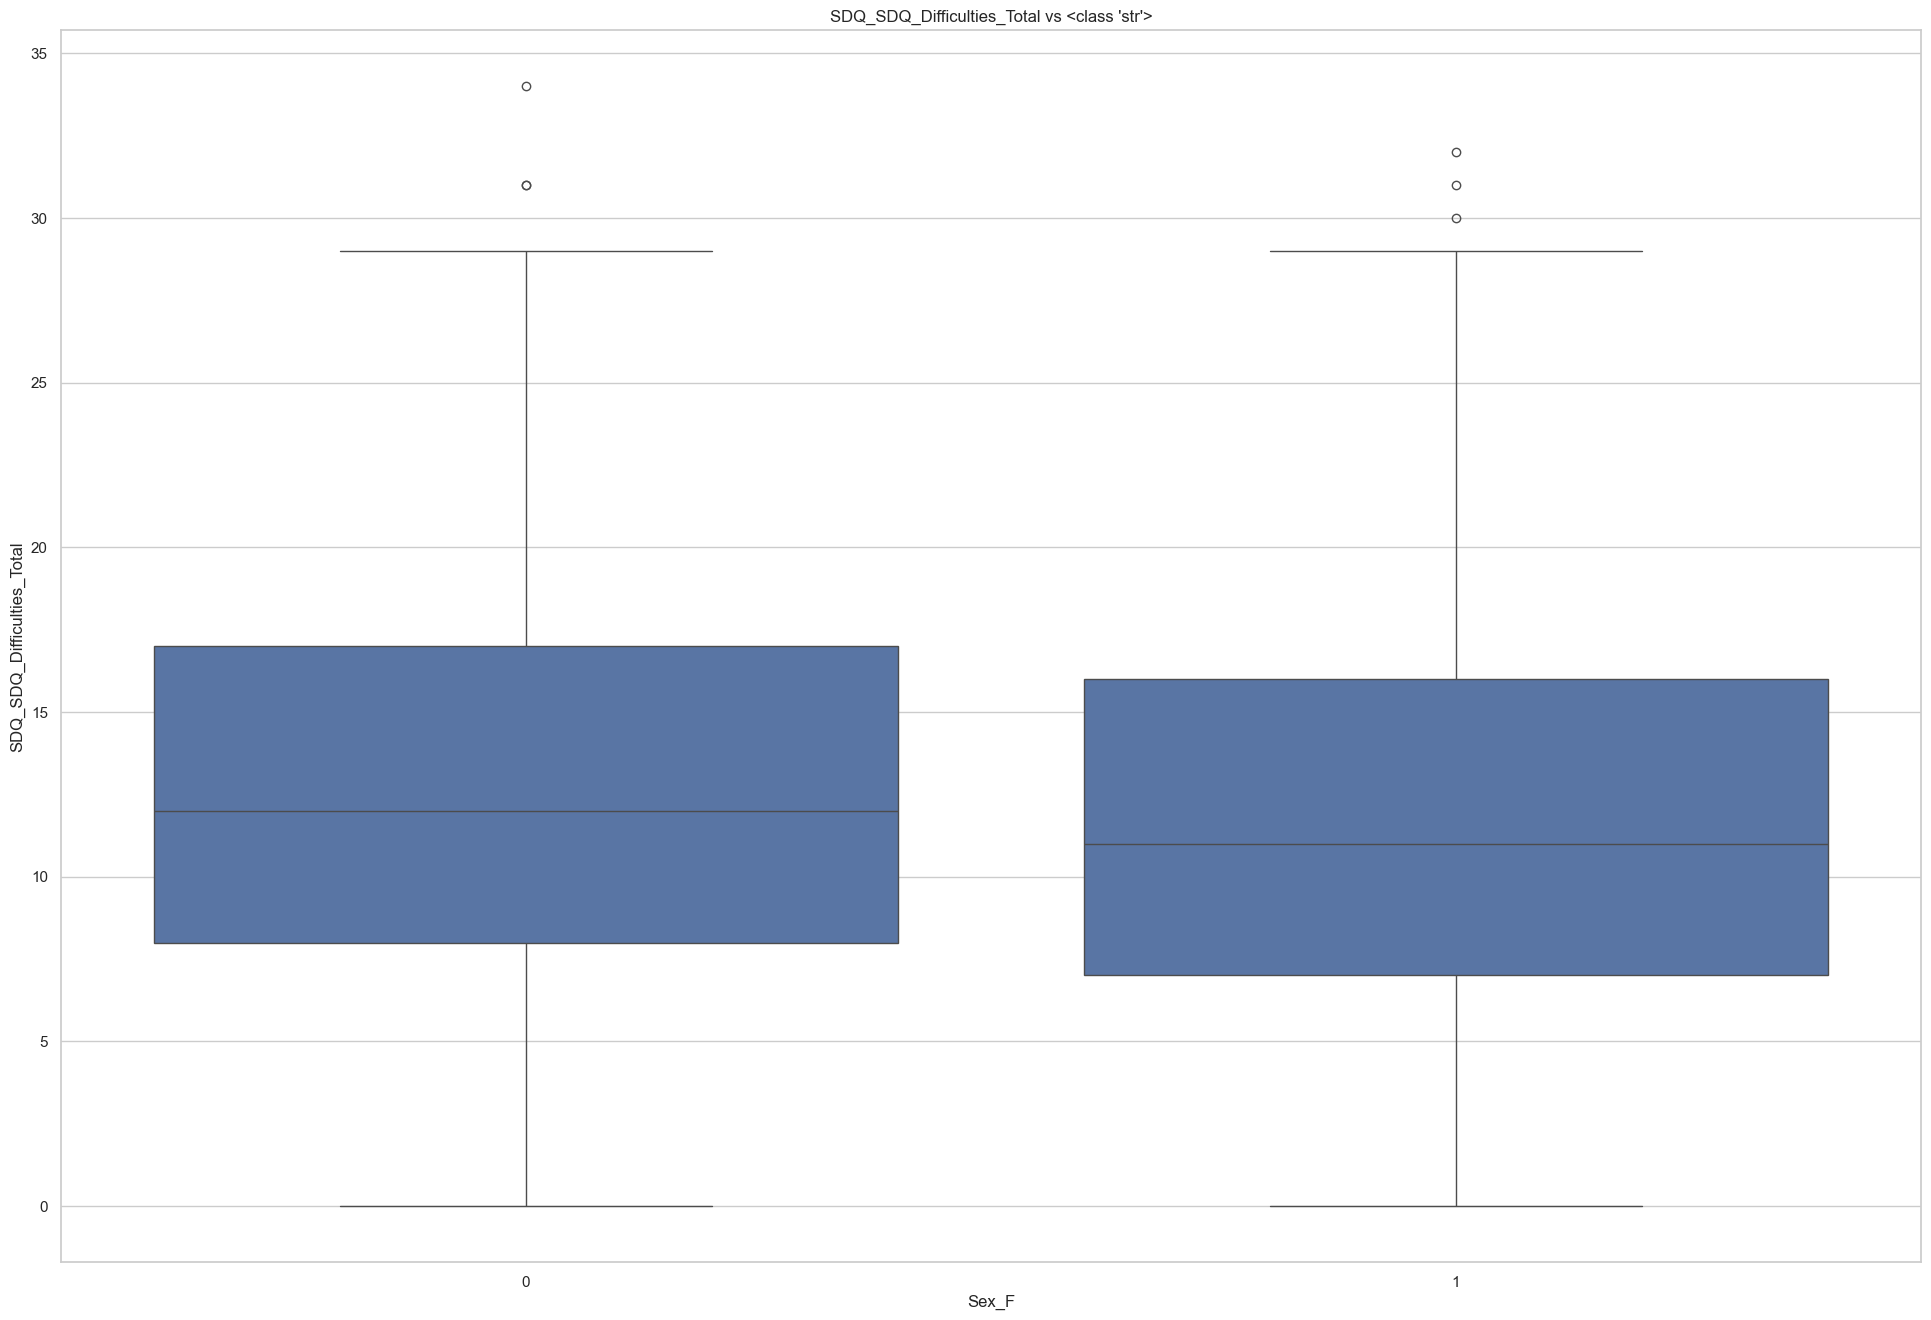

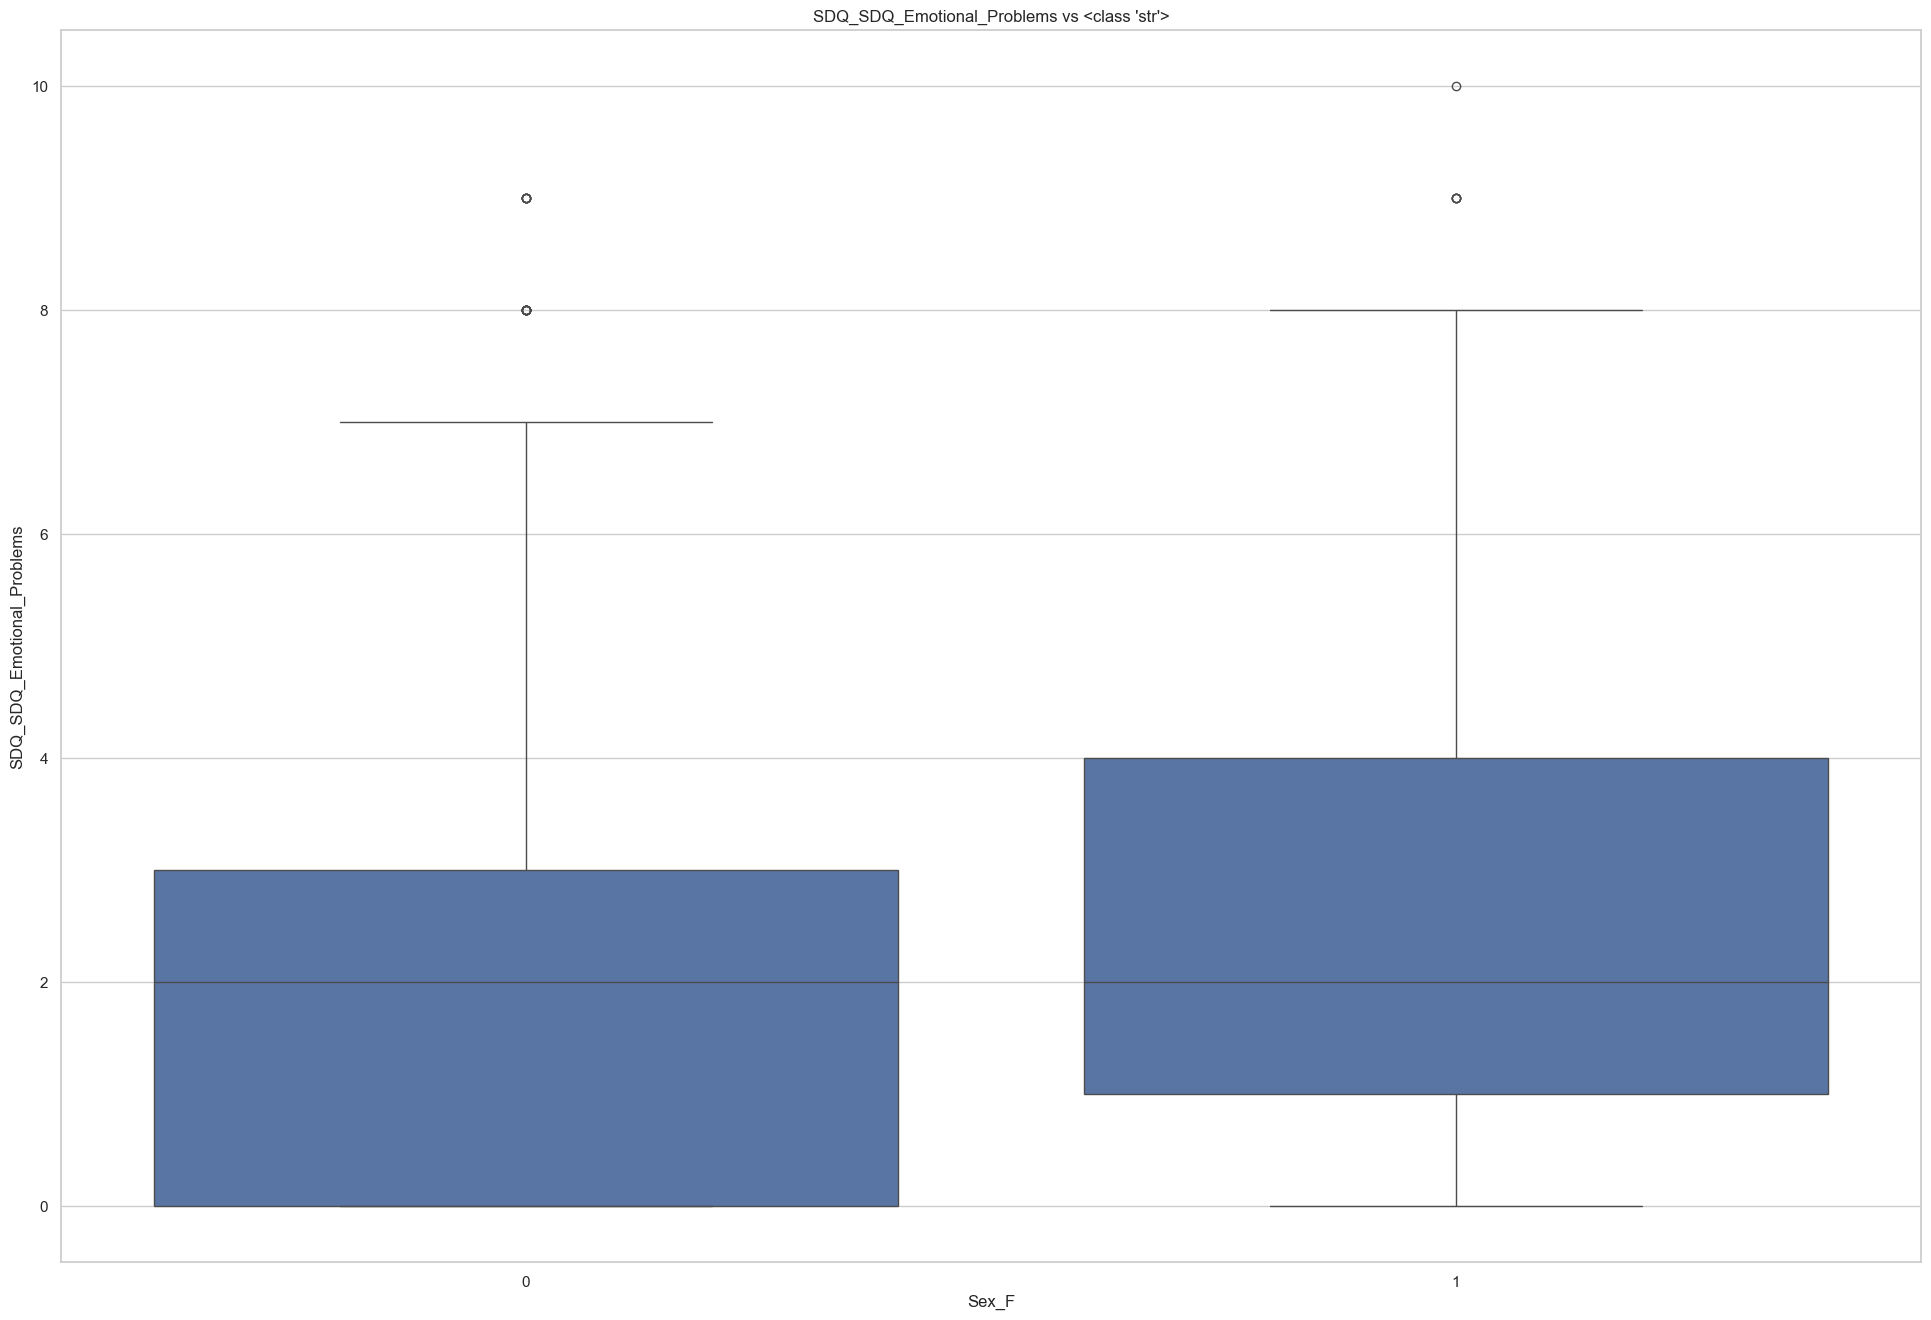

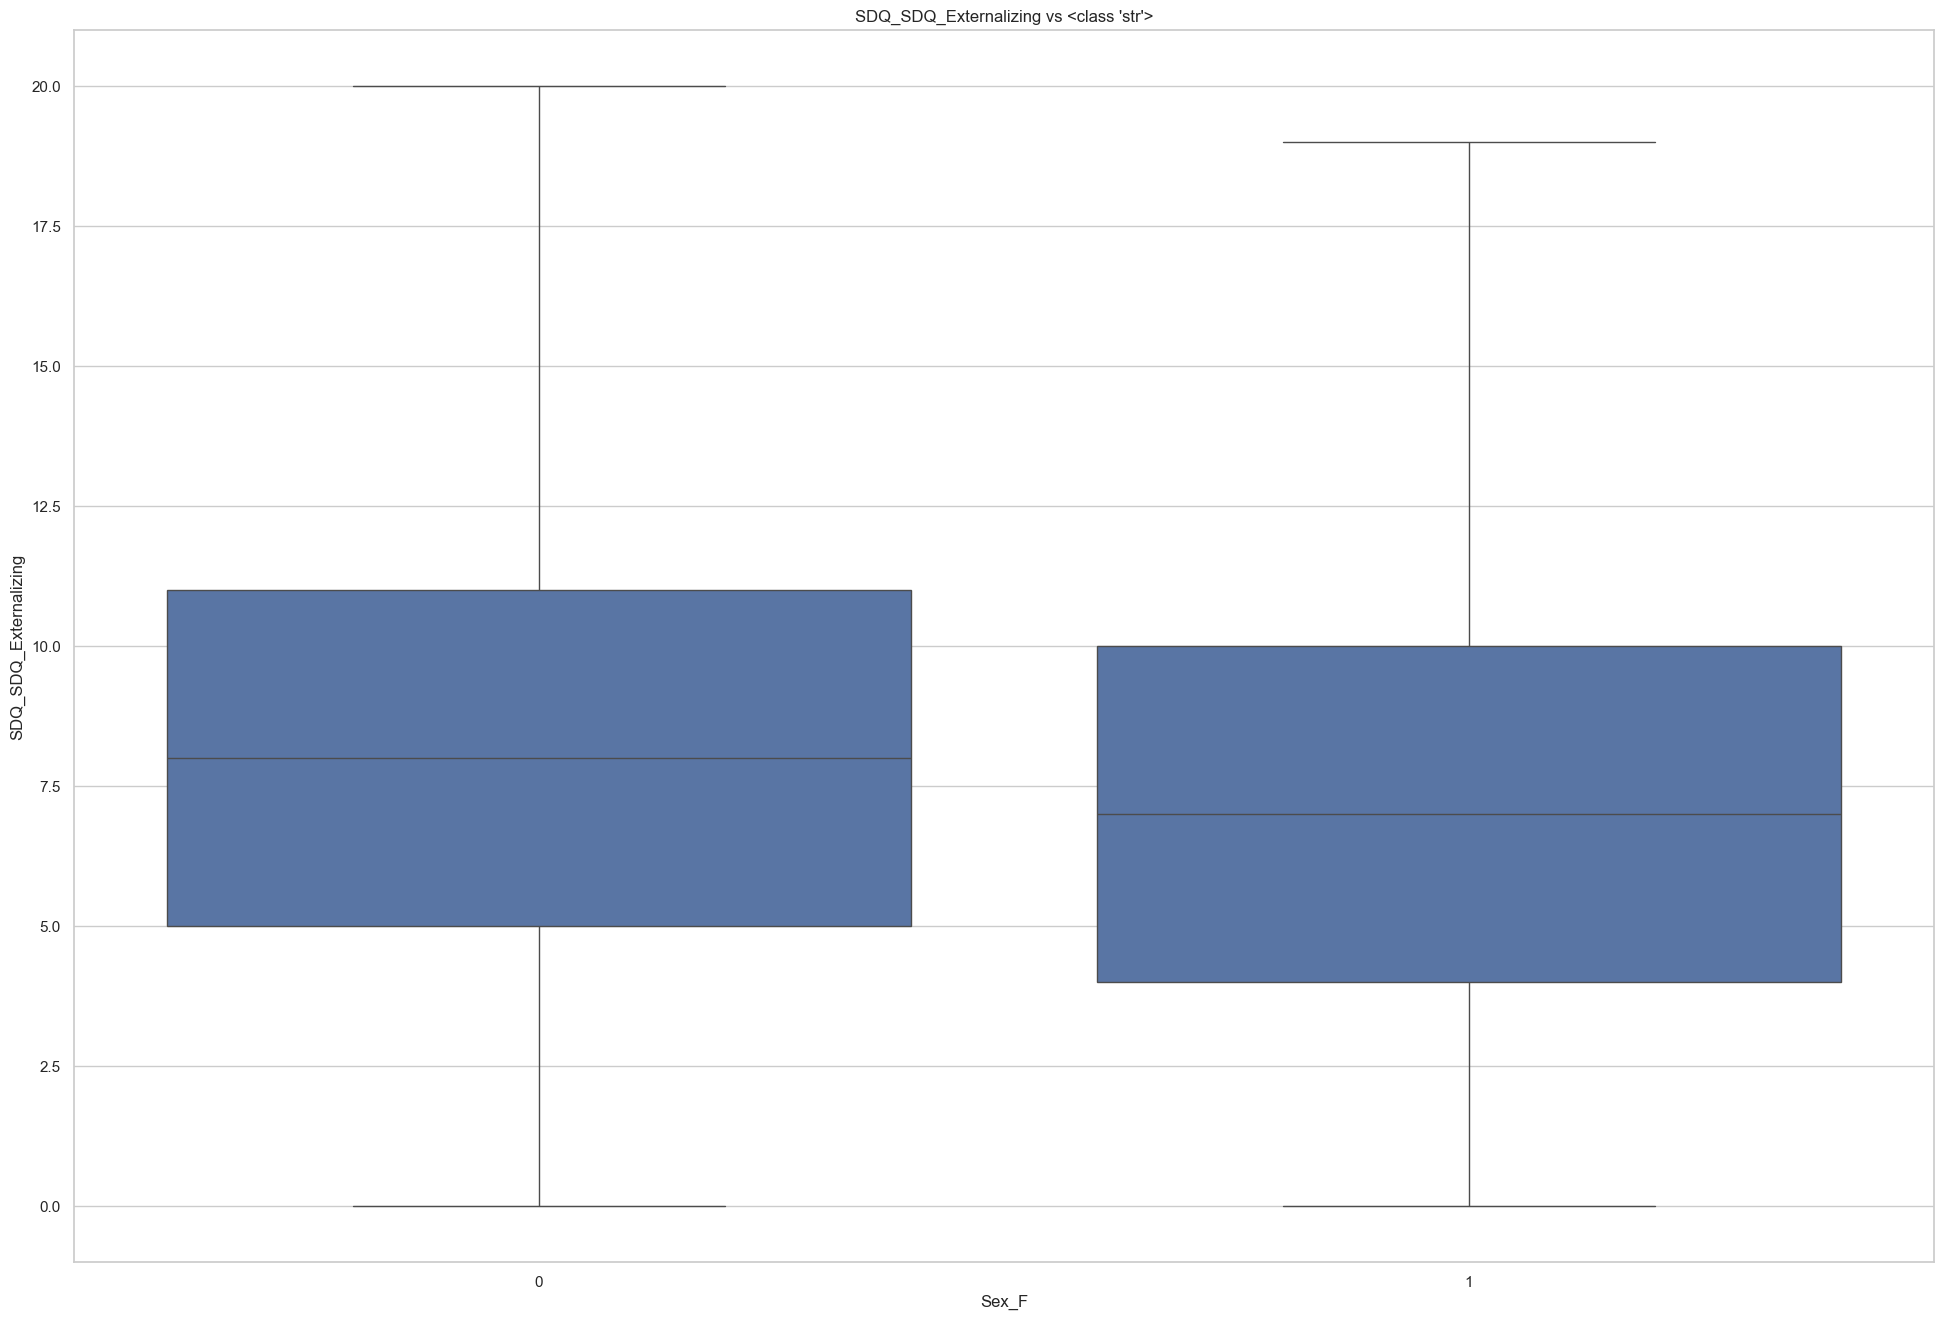

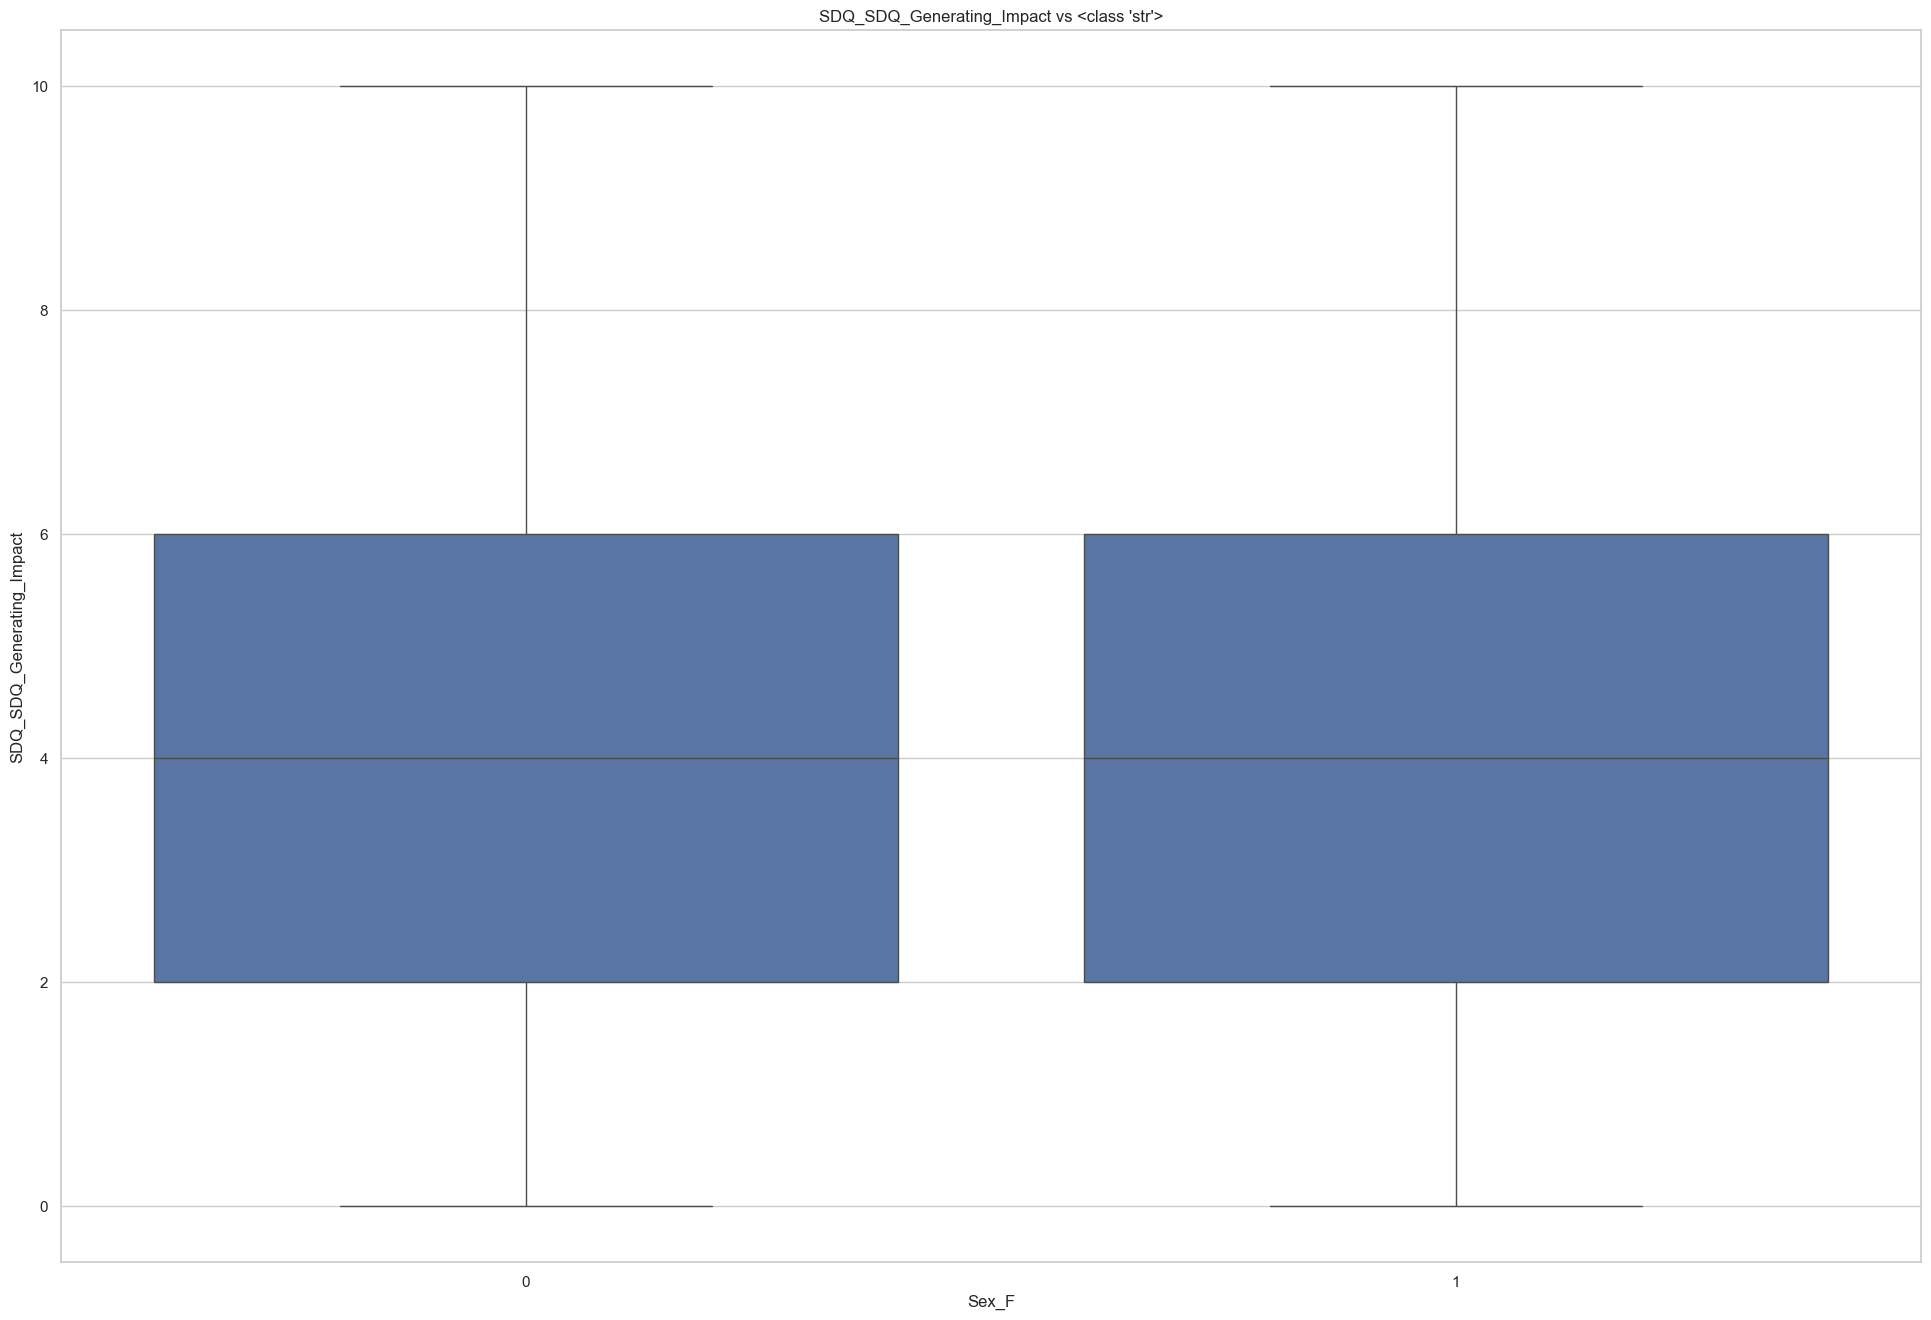

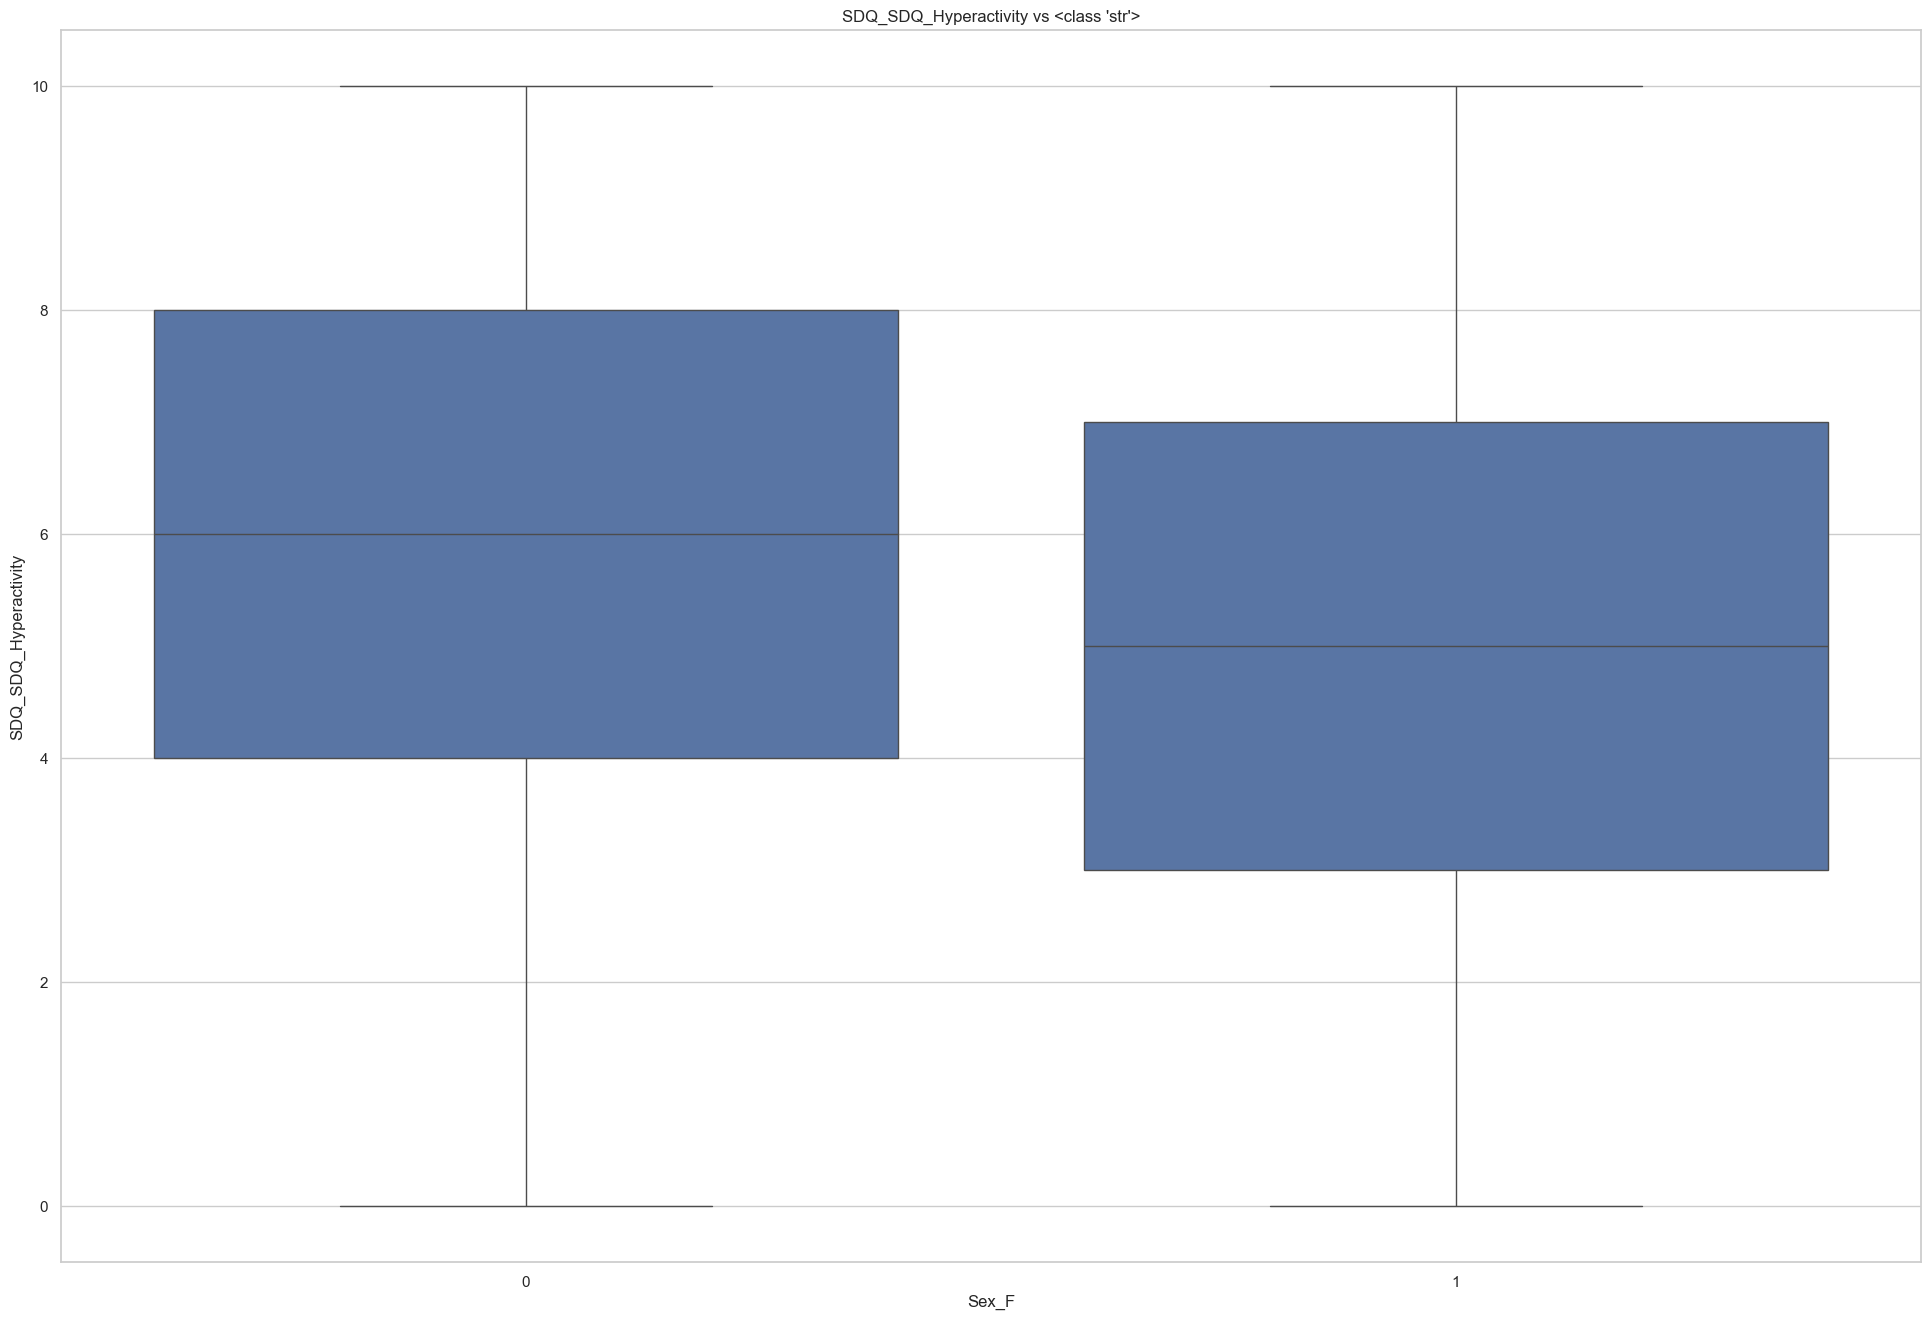

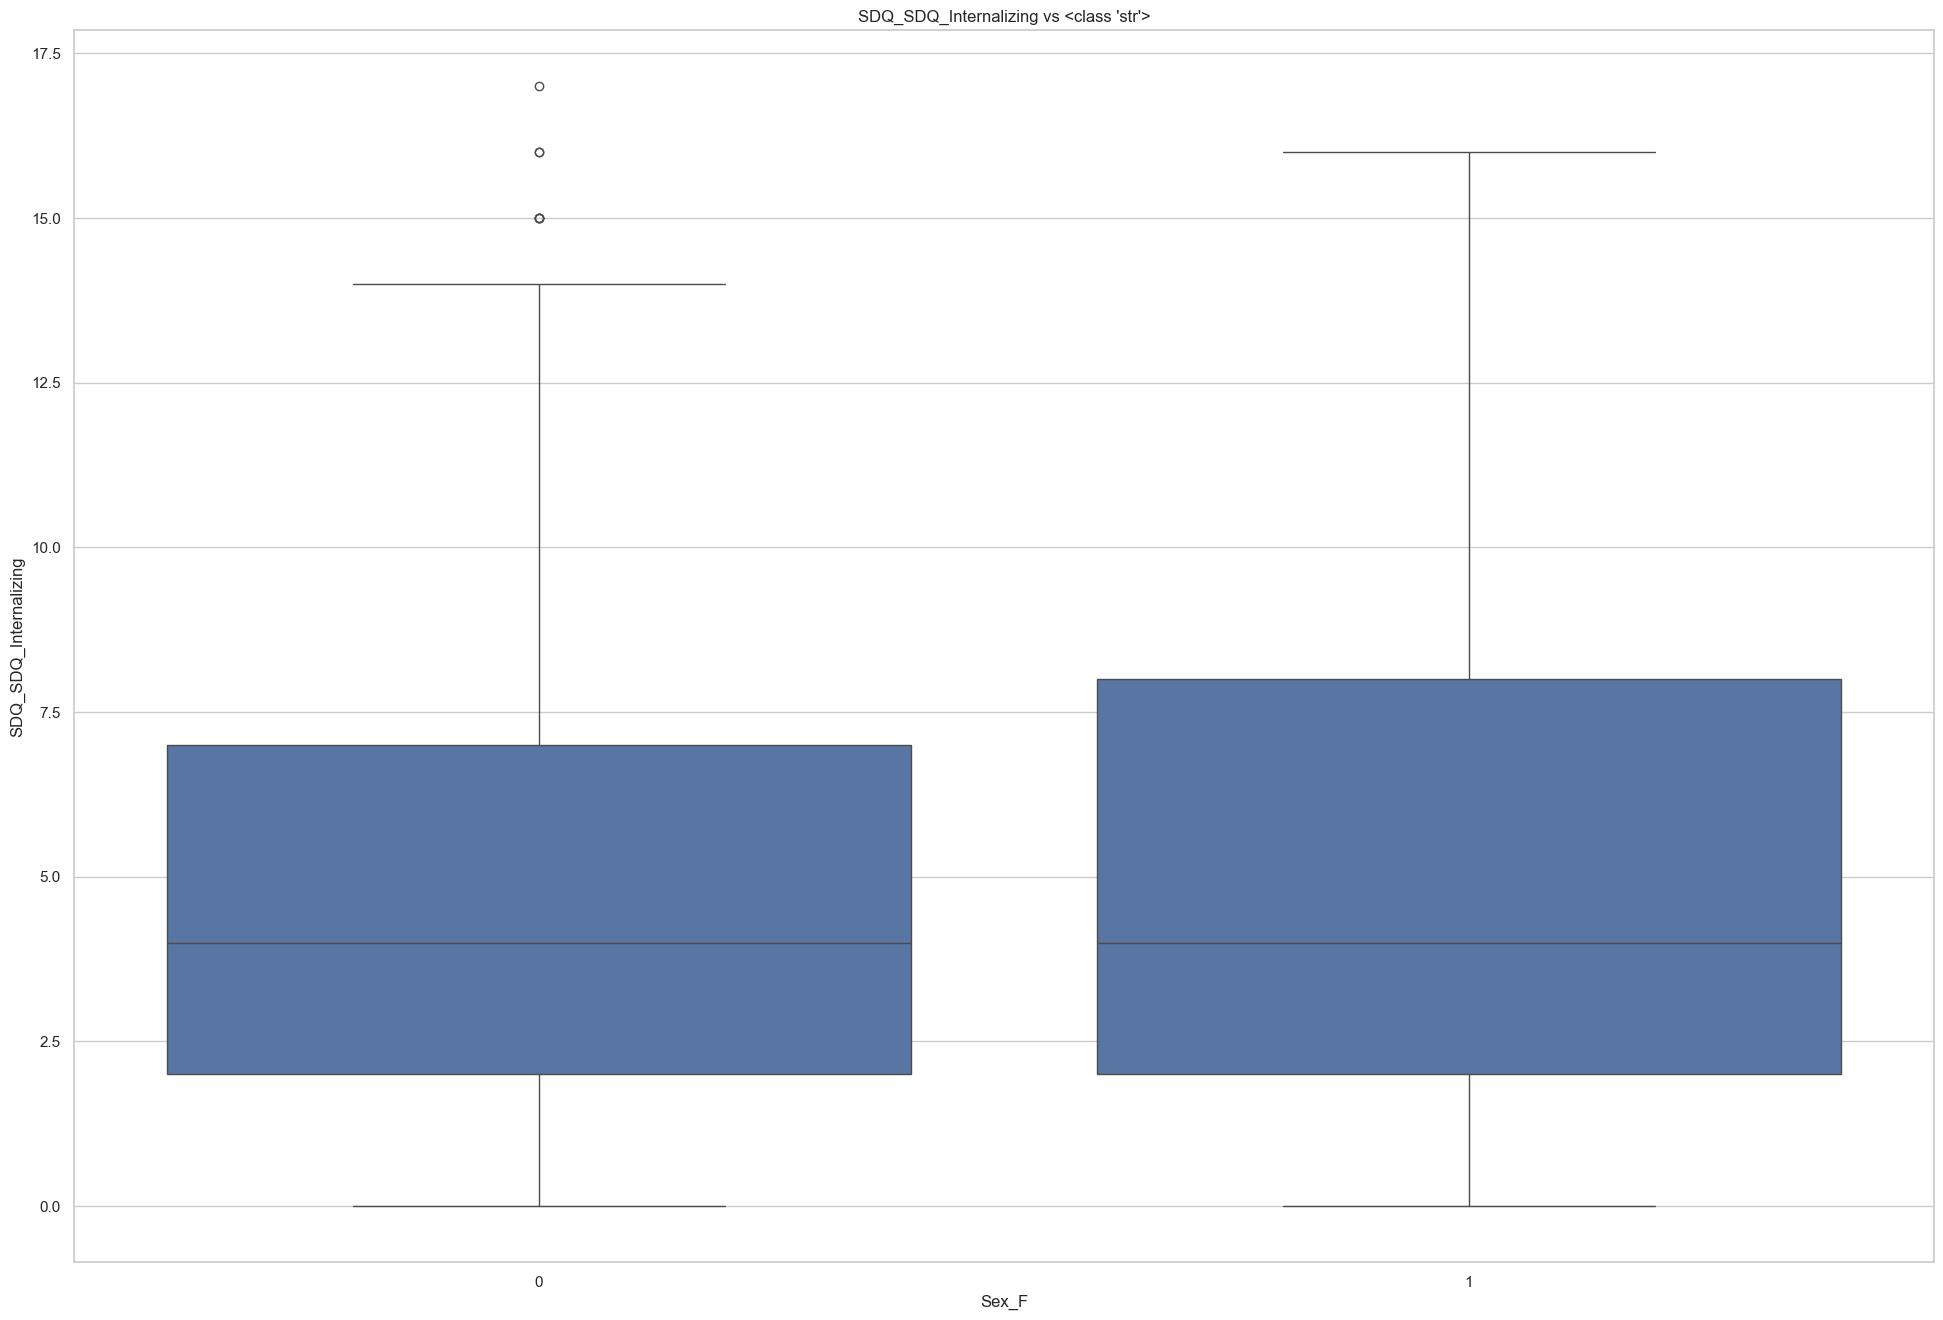

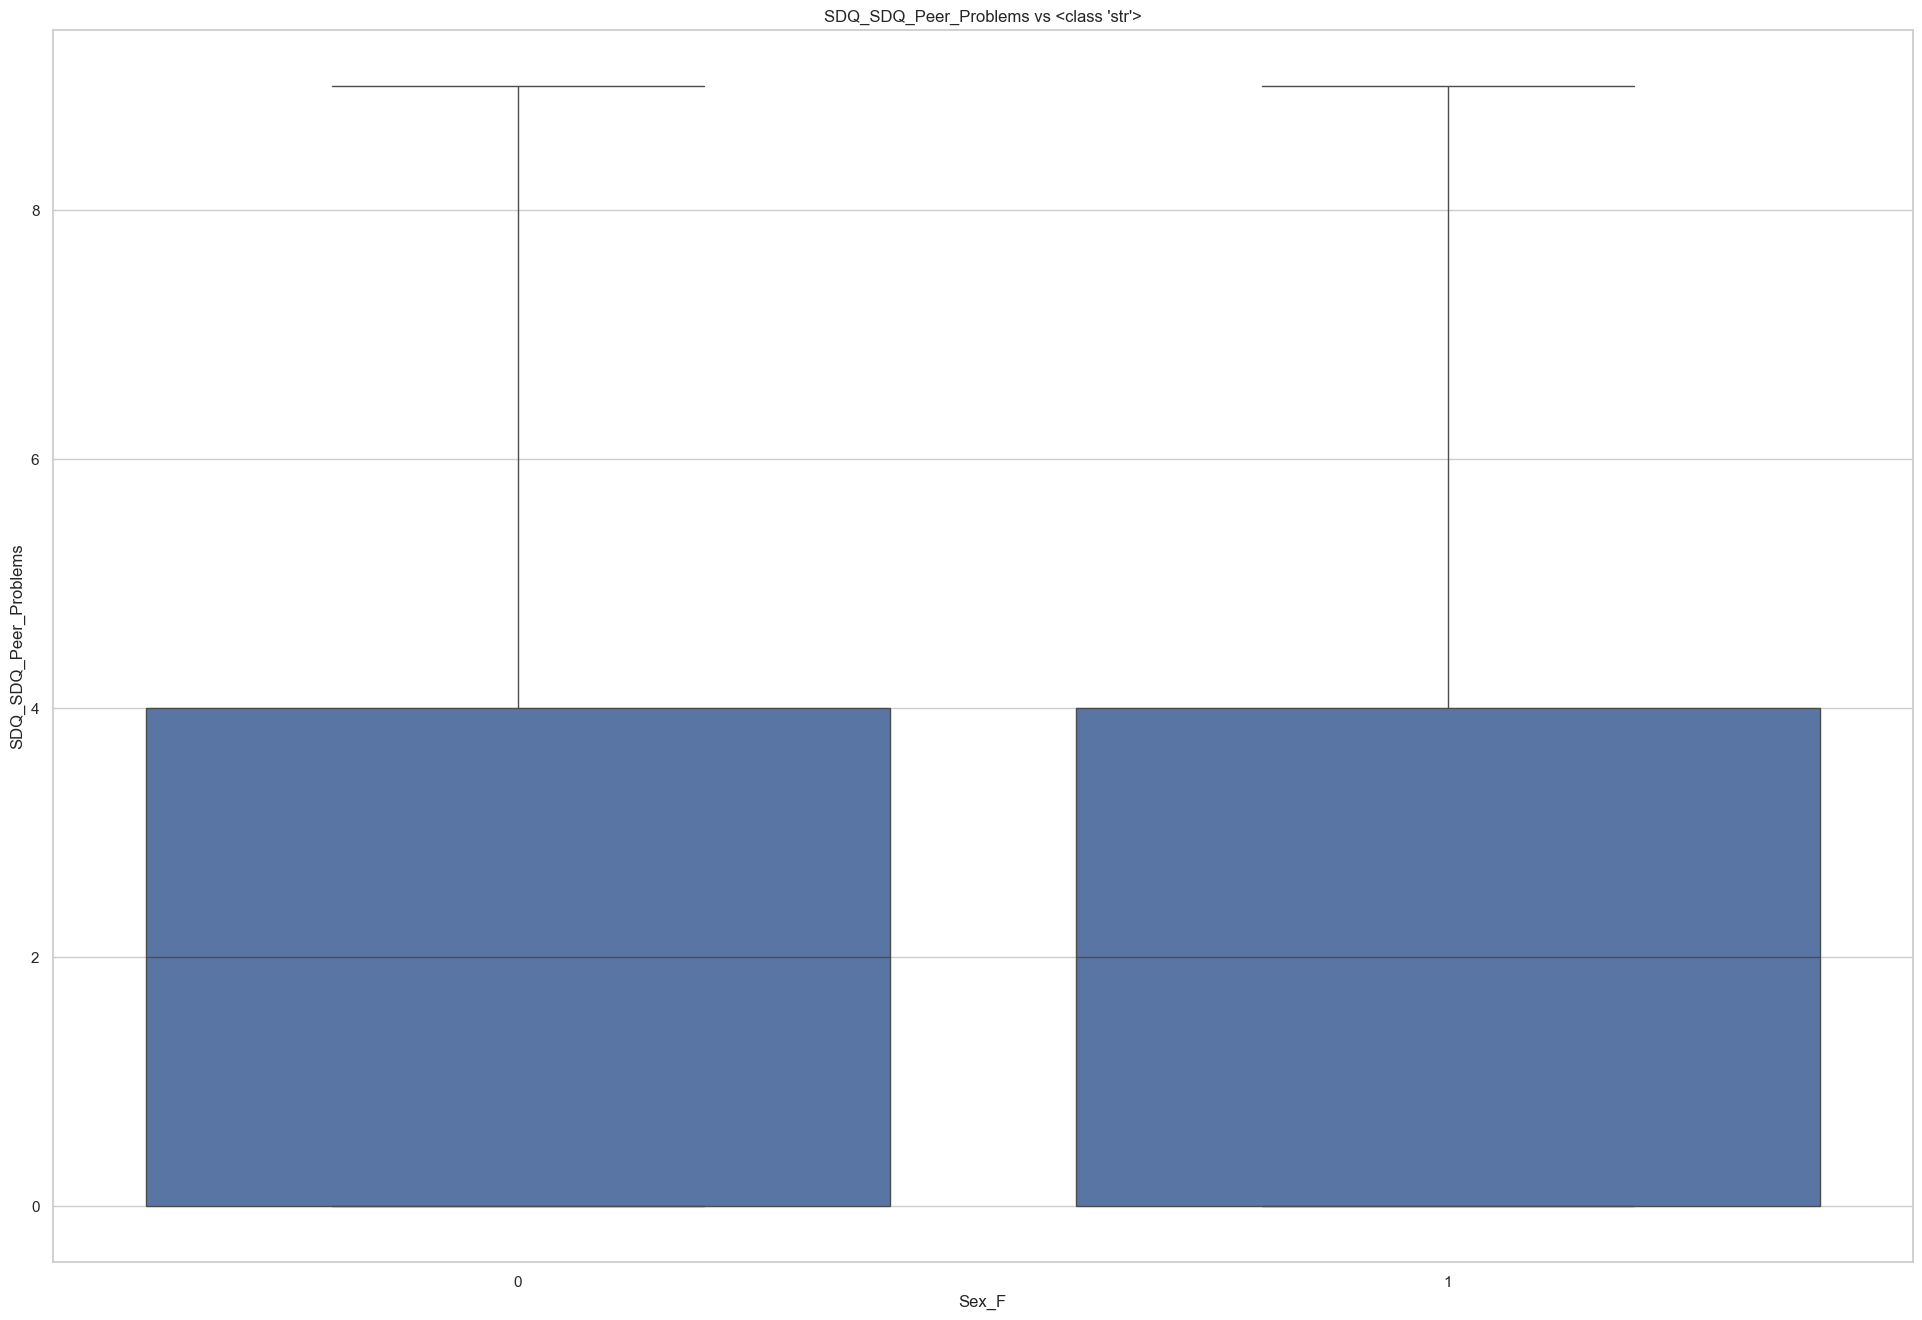

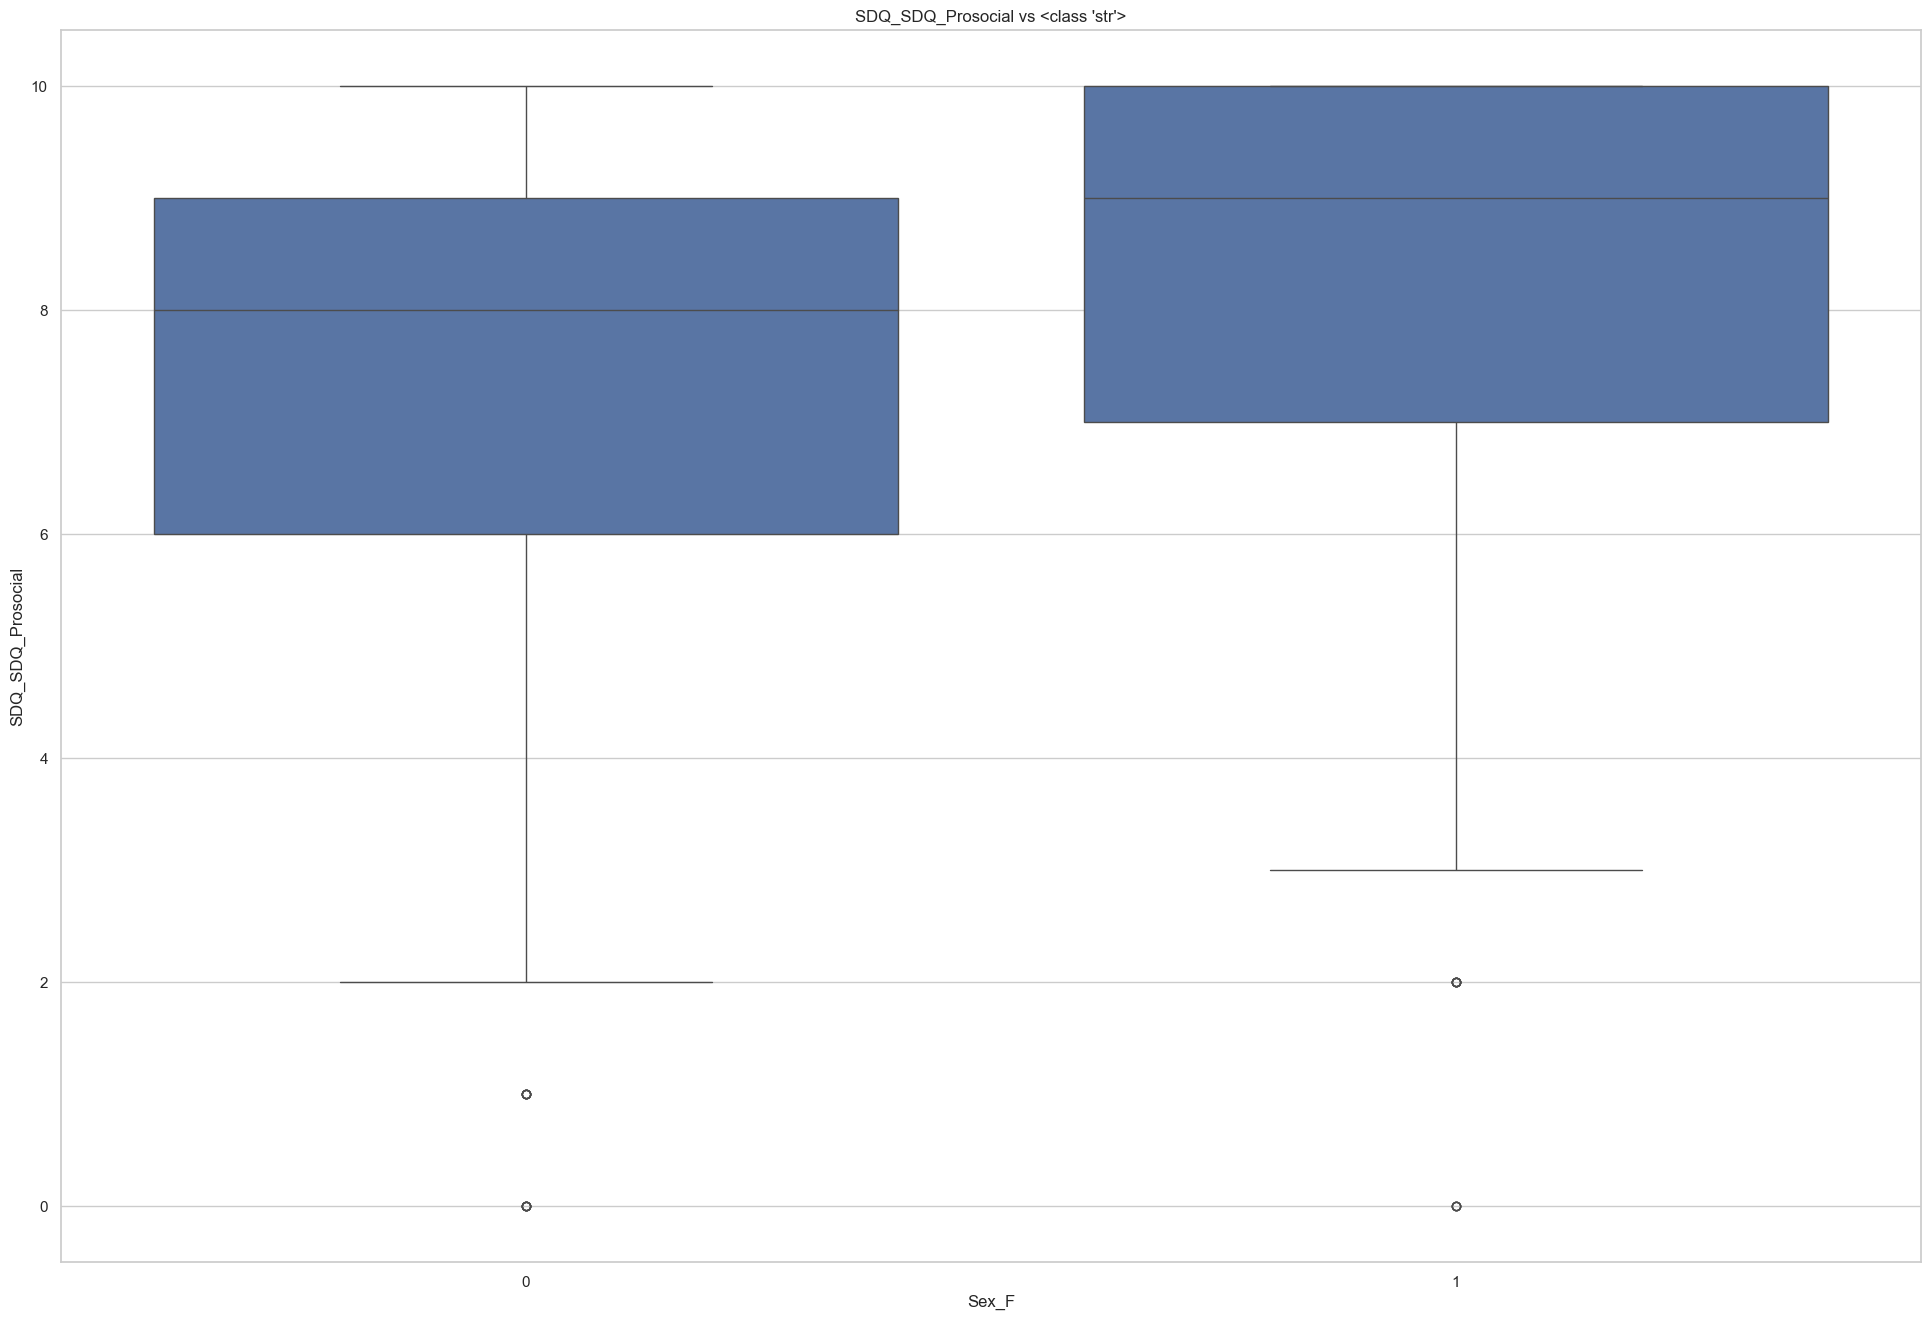

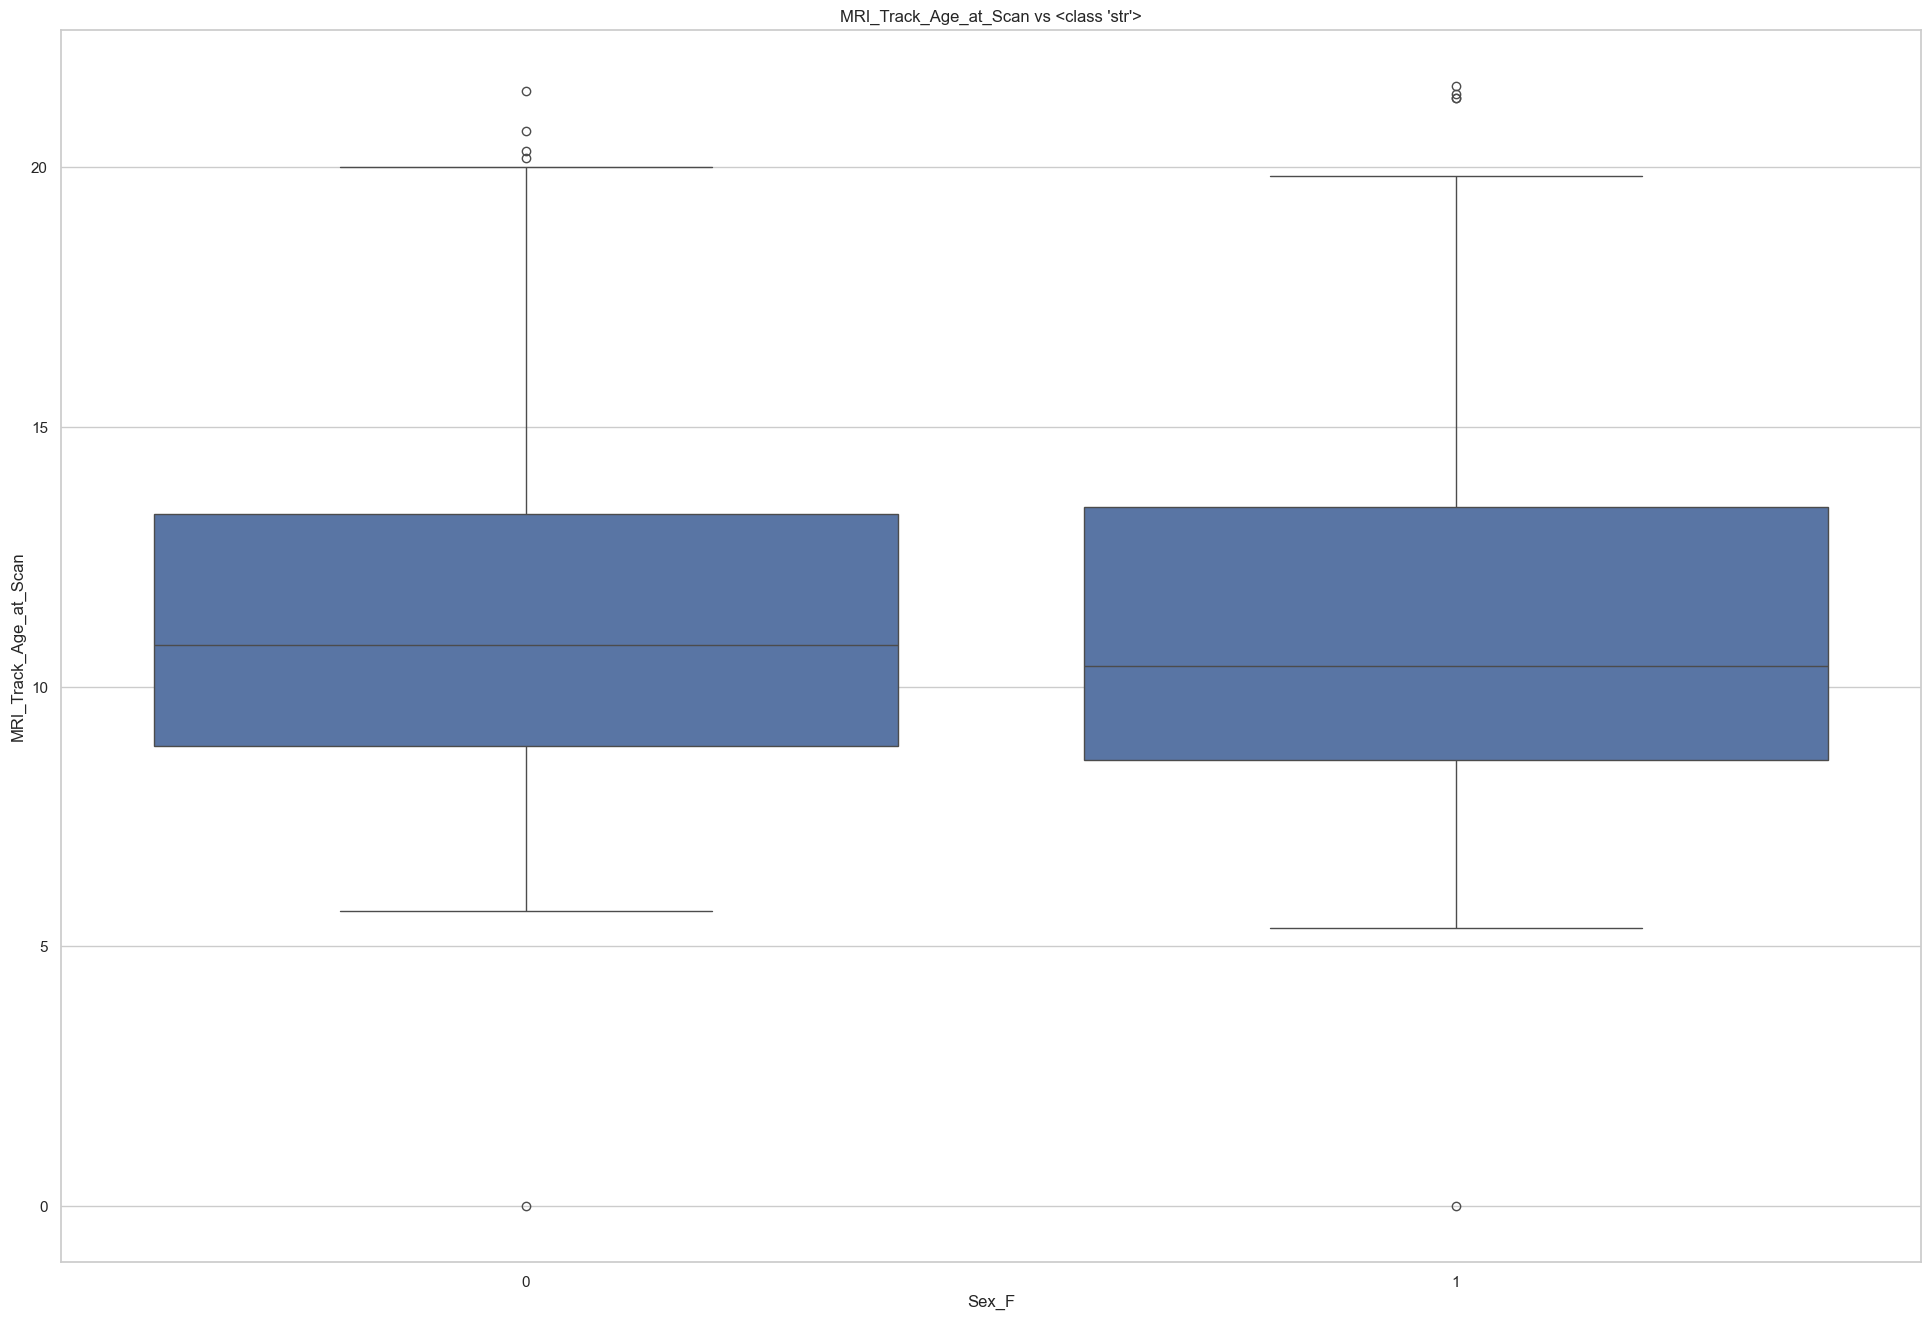

In [36]:
feature_relationship(df_metaA, "Sex_F")

### <span style="font-family: Century Gothic">Metadata B</span>
#### <p style="font-family: Century Gothic; font-size: 15px">Purpose: Contains additional metadata about the subjects.</p>
- <span style="font-family: Century Gothic; font-size: 15px">Inspect the files to understand the features.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Check for missing values and inconsistencies.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Merge these files if they contain complementary information.</span>

In [37]:
df_metaB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [38]:
df_metaB.shape

(1213, 10)

In [39]:
df_metaB.describe()

Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
count              1213.000000             1213.000000   
mean               2017.652102                2.014839   
std                   1.122522                1.135147   
min                2015.000000                1.000000   
25%                2017.000000                1.000000   
50%                2018.000000                1.000000   
75%                2019.000000                3.000000   
max                2020.000000                4.000000   

       PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
count                       1202.000000                  1213.000000   
mean                           0.424293                     2.080791   
std                            0.687470                     3.164636   
min                            0.000000                     0.000000   
25%                            0.000000                     0.000000   
50%                            0.000000                     0.000000   
75%                            1.000000                     2.000000   
max                            3.000000                    11.000000   

       MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  \
count              1213.000000             1213.000000   
mean                  2.288541               17.641385   
std                   0.758348                4.004639   
min                   0.000000                0.000000   
25%                   2.000000               15.000000   
50%                   2.000000               18.000000   
75%                   3.000000               21.000000   
max                   4.000000               21.000000   

       Barratt_Barratt_P1_Occ  Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  
count             1213.000000             1213.000000             1213.000000  
mean                24.892828               14.122012               24.719703  
std                 17.025899                7.201023               17.171113  
min                  0.000000                0.000000                0.000000  
25%                  0.000000               12.000000                5.000000  
50%                 30.000000               18.000000               30.000000  
75%                 40.000000               21.000000               40.000000  
max                 45.000000               21.000000               45.000000

In [40]:
df_metaB.head()

participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   UmrK0vMLopoR                     2016                       1   
1   CPaeQkhcjg7d                     2019                       3   
2   Nb4EetVPm3gs                     2016                       1   
3   p4vPhVu91o4b                     2018                       3   
4   M09PXs7arQ5E                     2019                       3   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                            0   
1                               1.0                            2   
2                               1.0                            8   
3                               0.0                            8   
4                               0.0                            1   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        1                      21                      45   
1                        3                      15                      15   
2                        1                      18                      40   
3                        3                      15                      30   
4                        3                      15                      20   

   Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  
0                      21                      45  
1                       0                       0  
2                       0                       0  
3                      18                       0  
4                       0                       0

In [41]:
df_metaB.isnull().sum()

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64

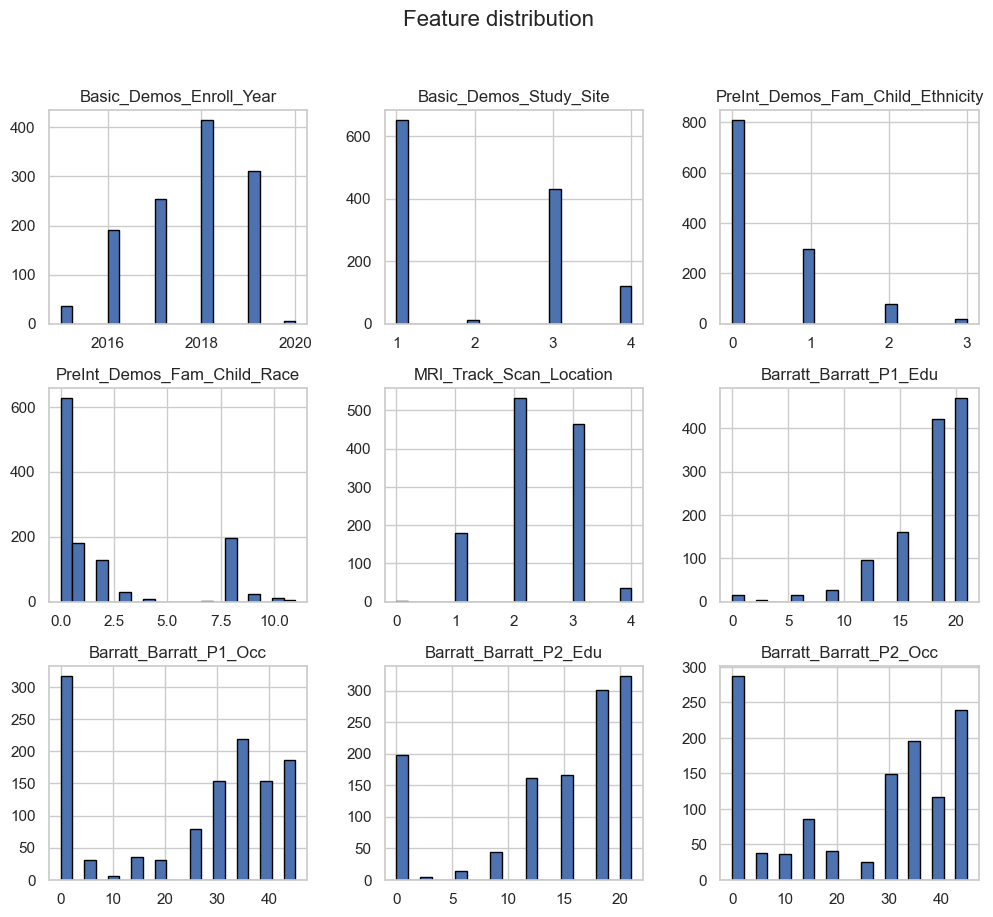

In [42]:
df_metaB.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle('Feature distribution', fontsize=16)
plt.show()

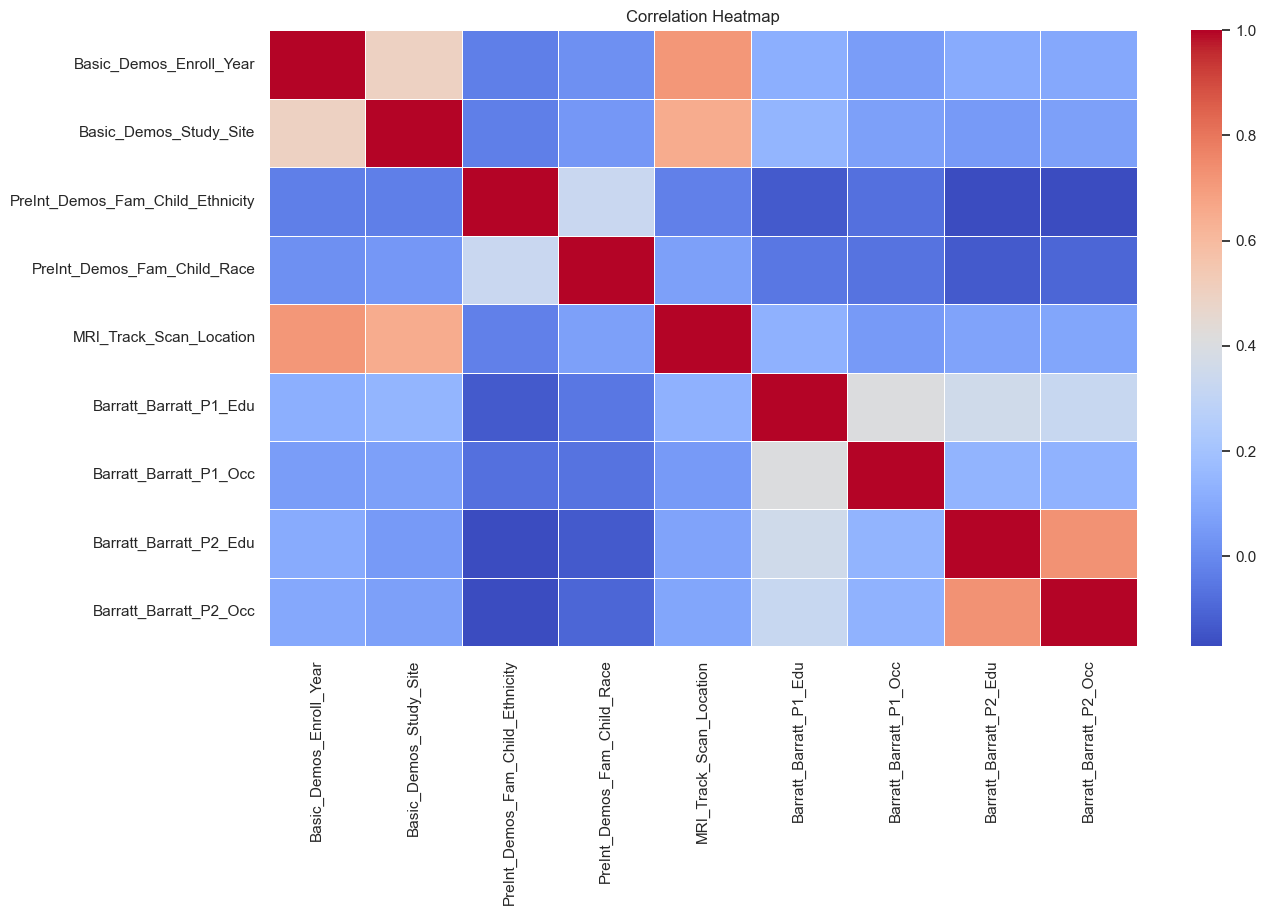

In [43]:
df_plot = df_metaB.copy()
df_plot = df_plot.drop(columns=['participant_id'])

plt.figure(figsize=(14, 8))
sns.heatmap(df_plot.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

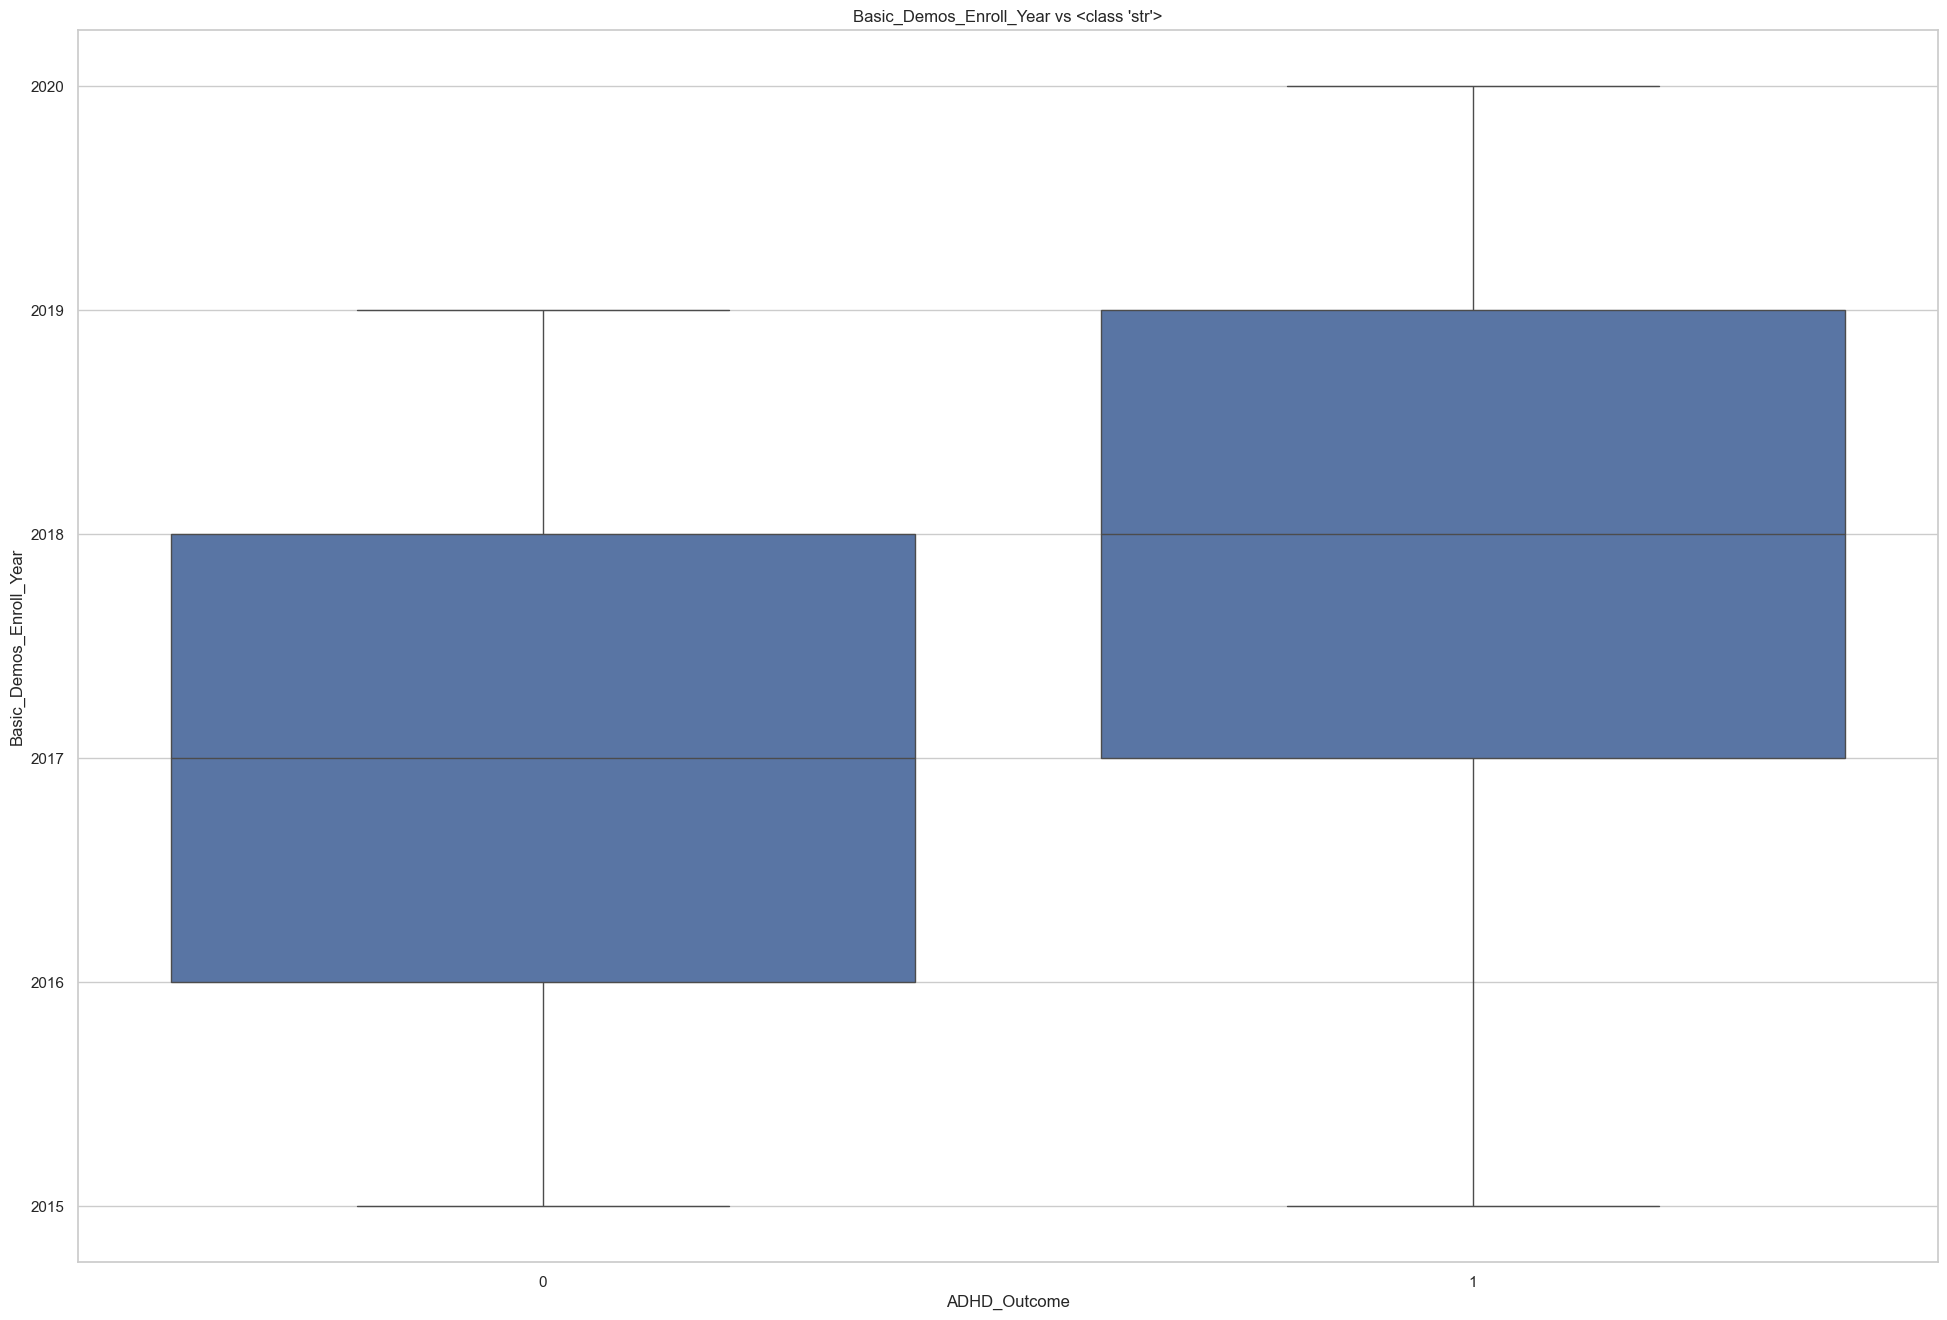

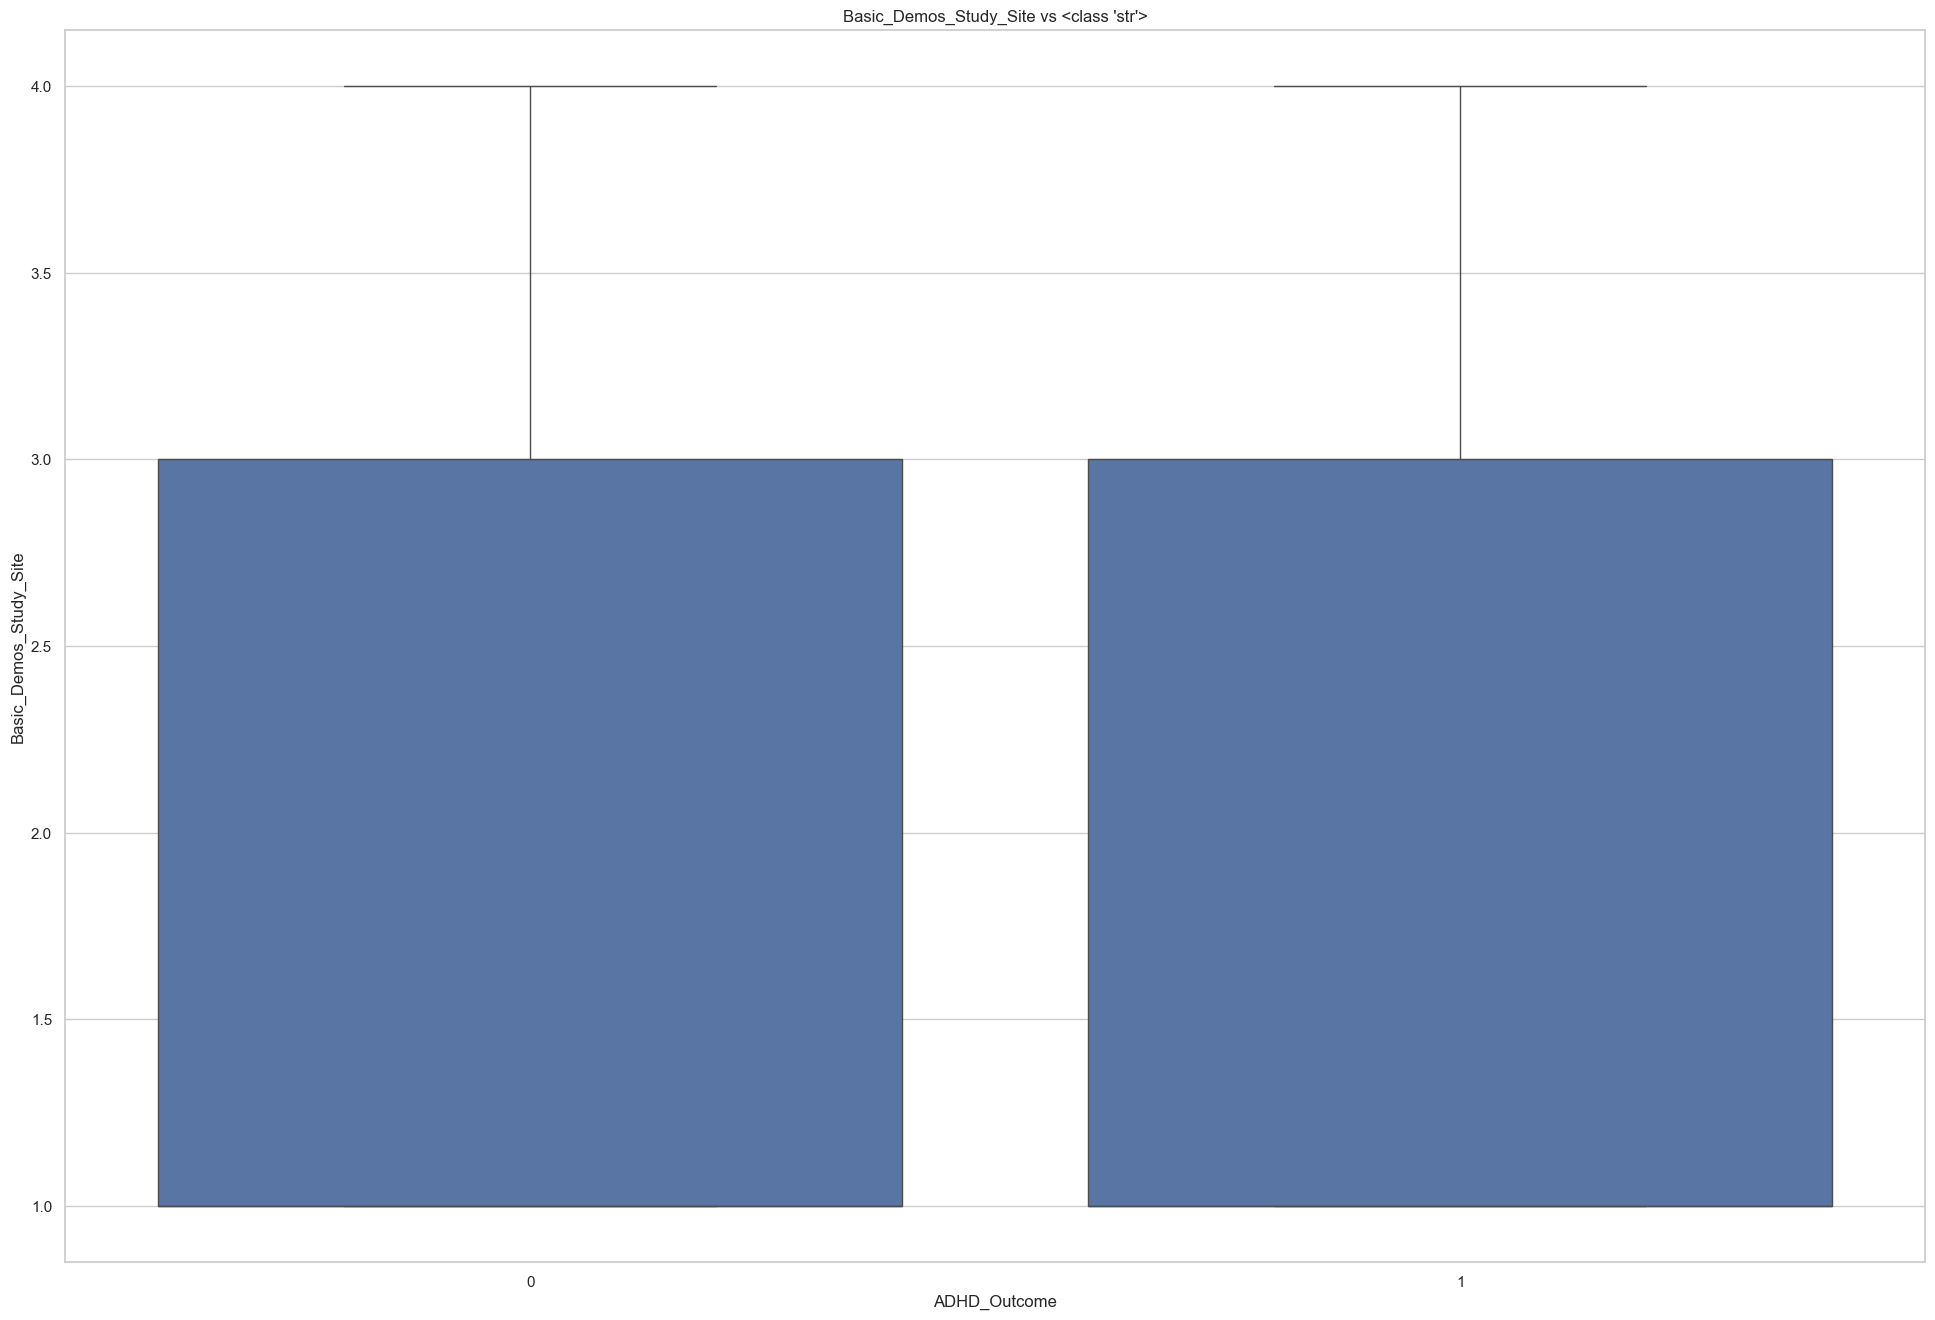

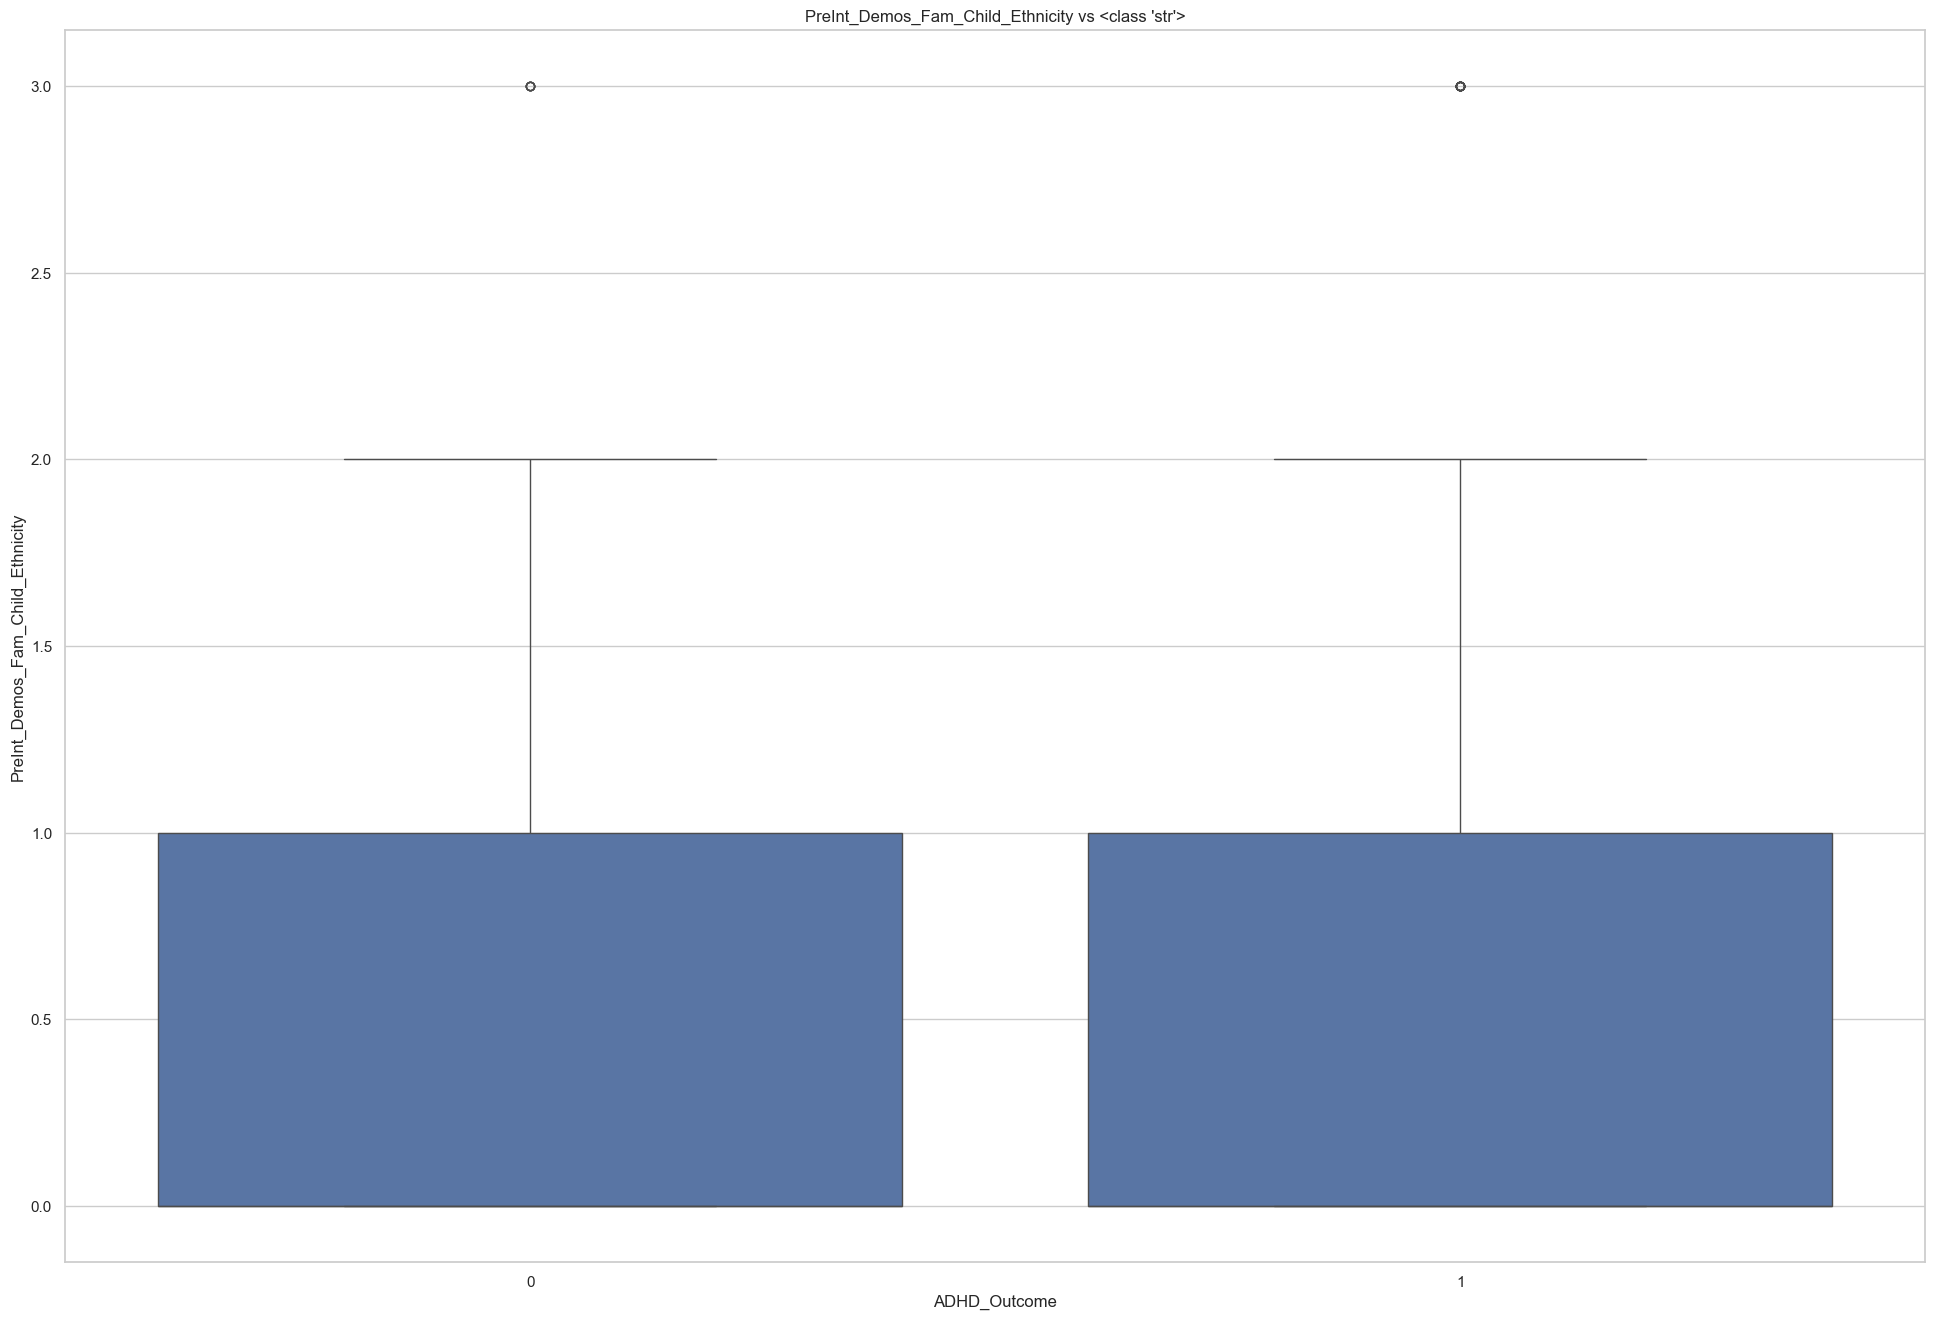

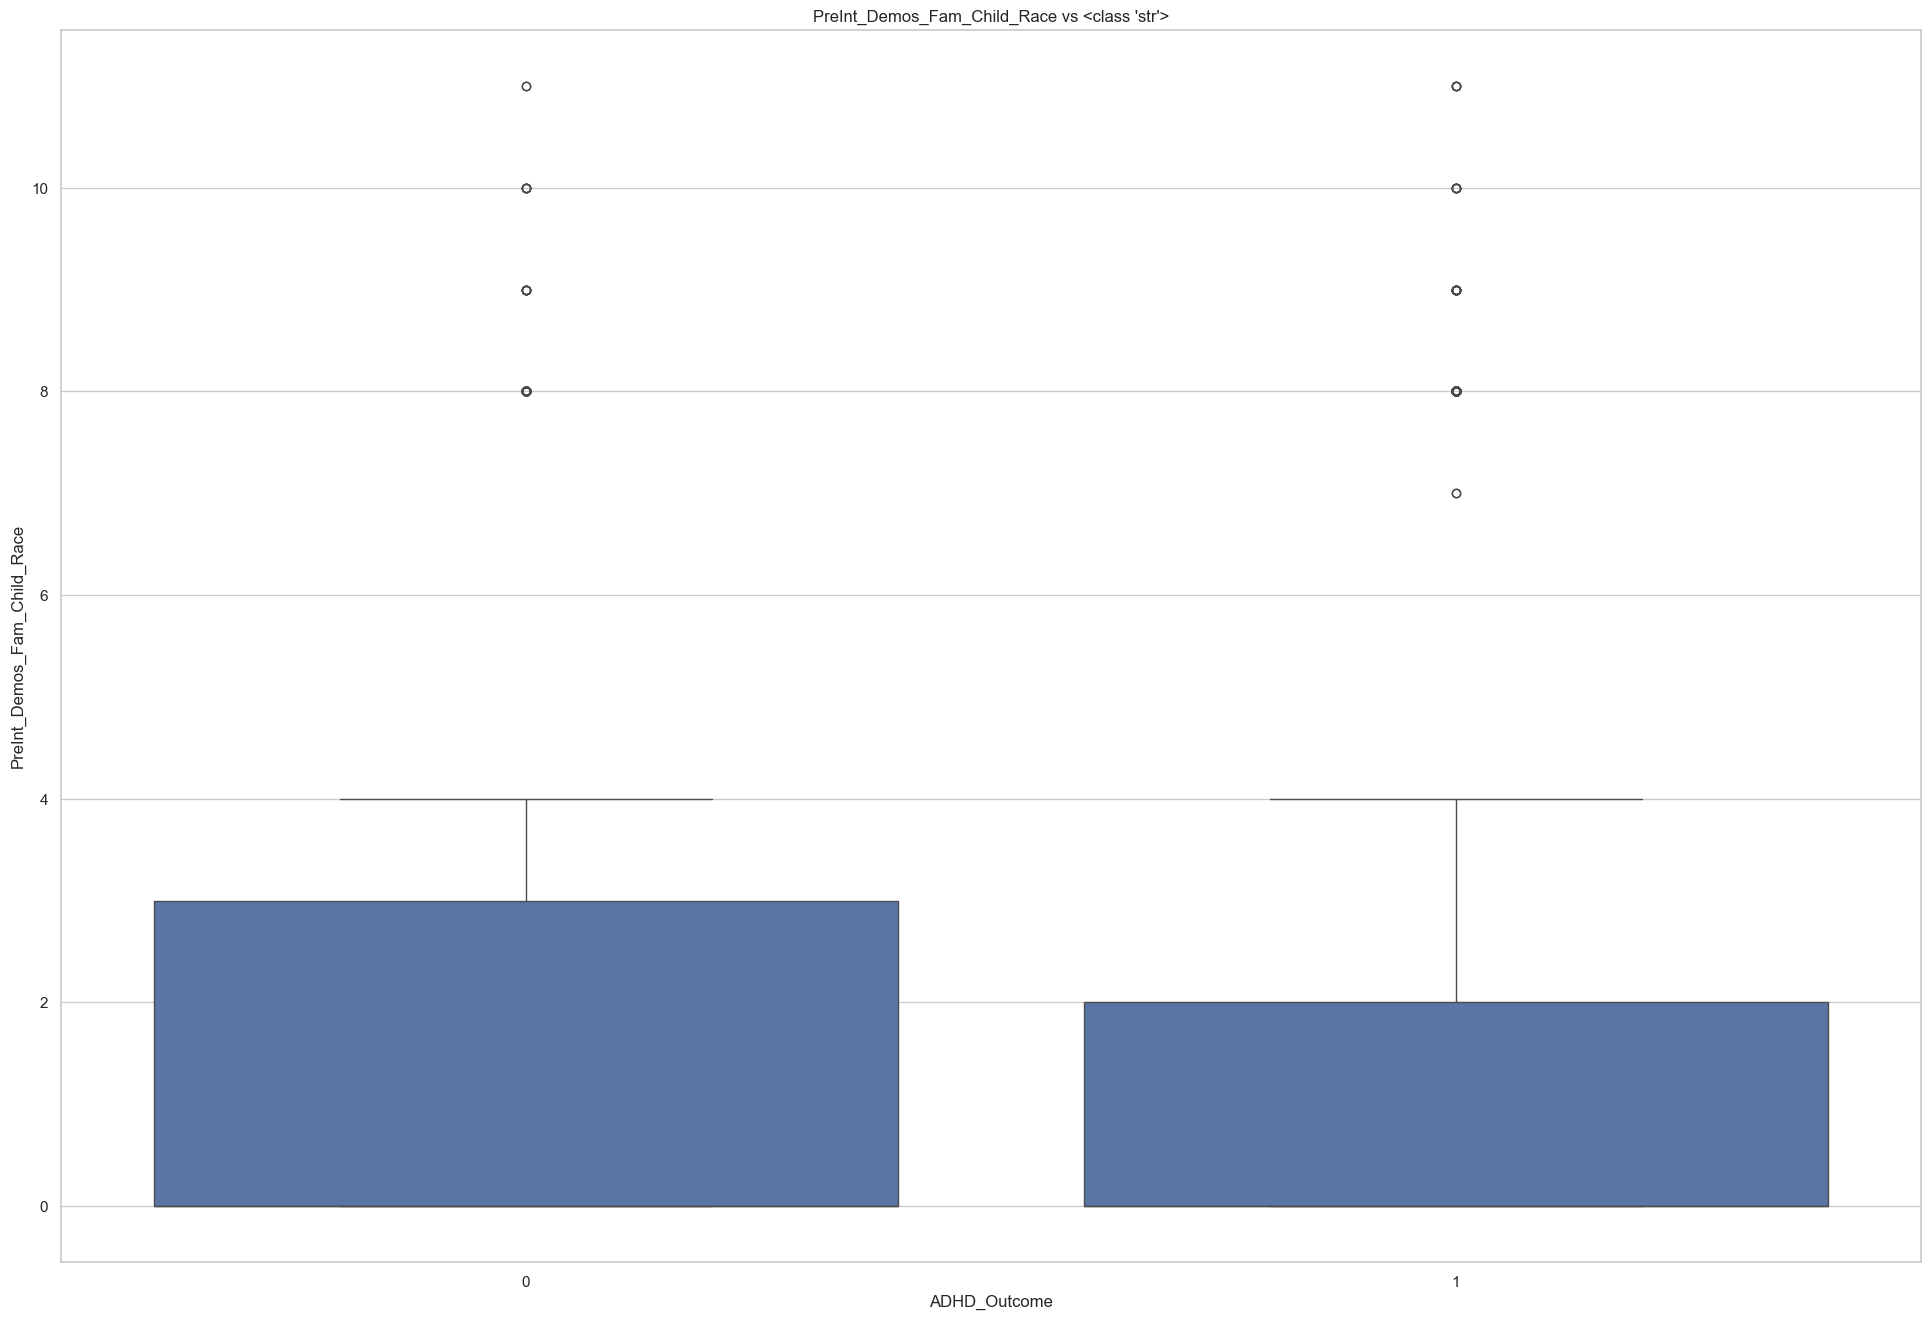

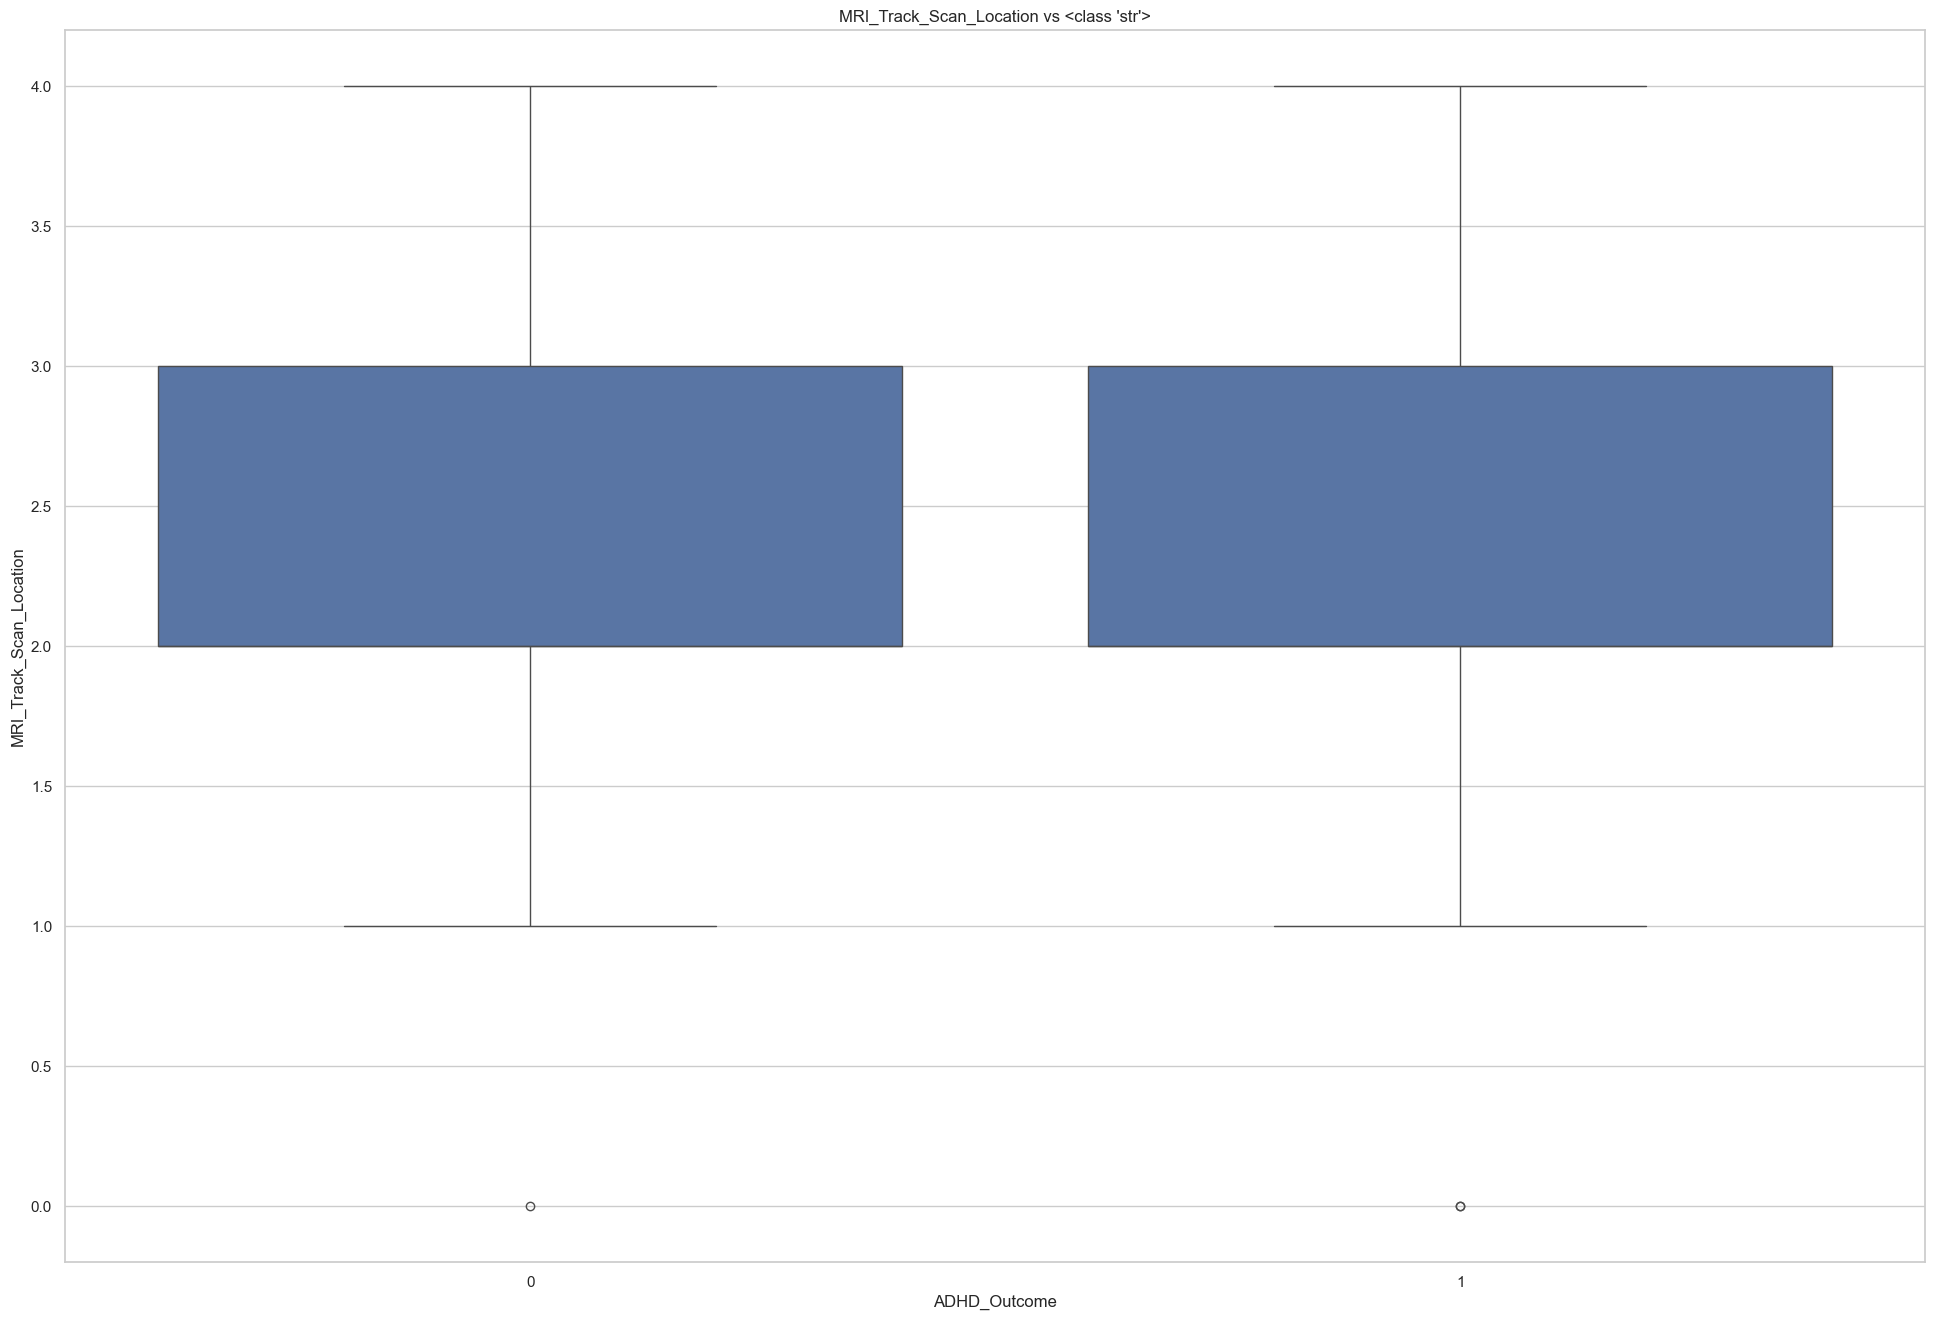

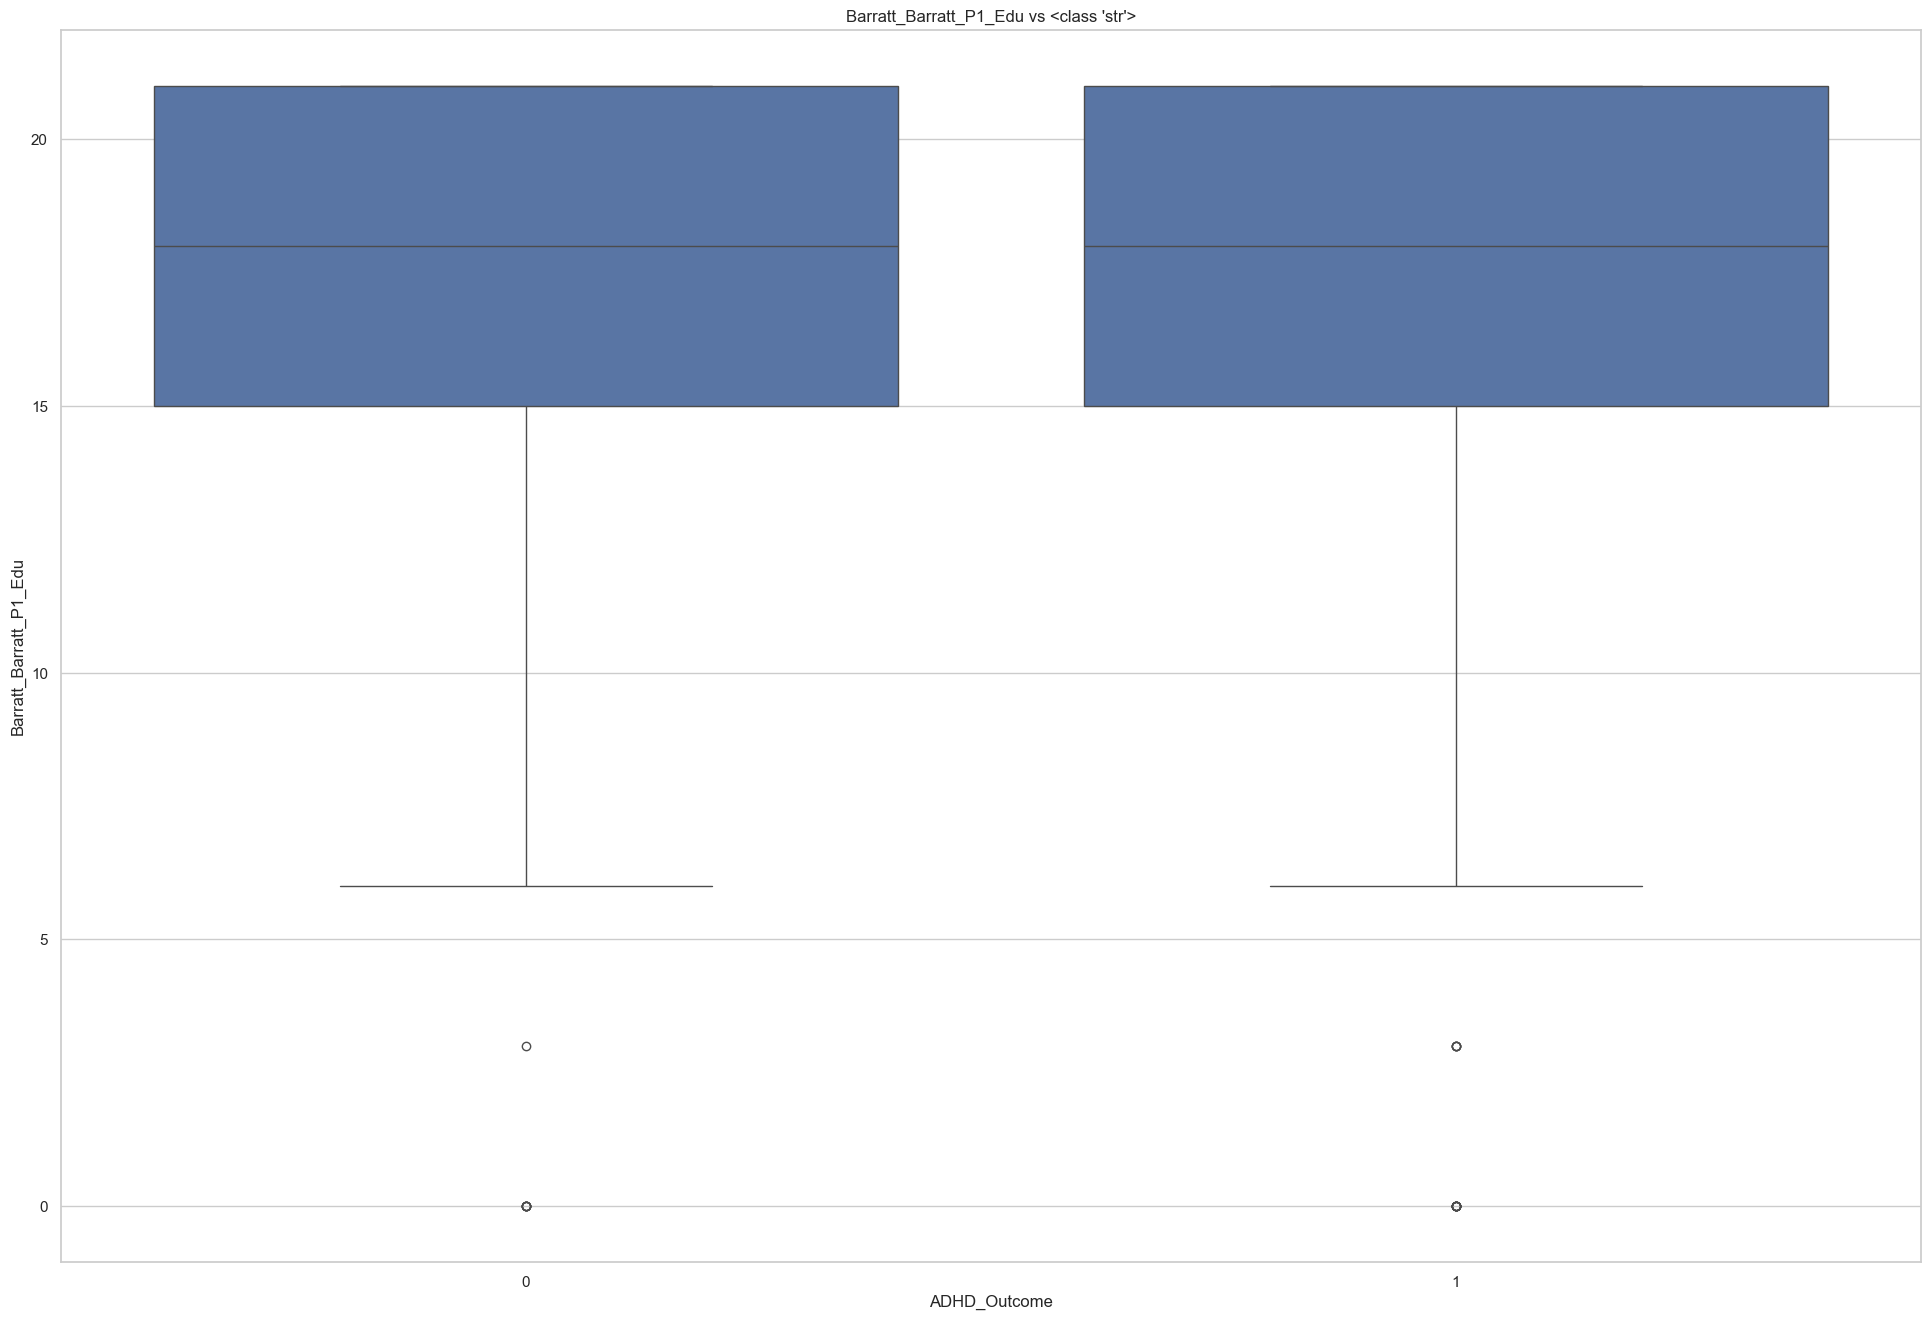

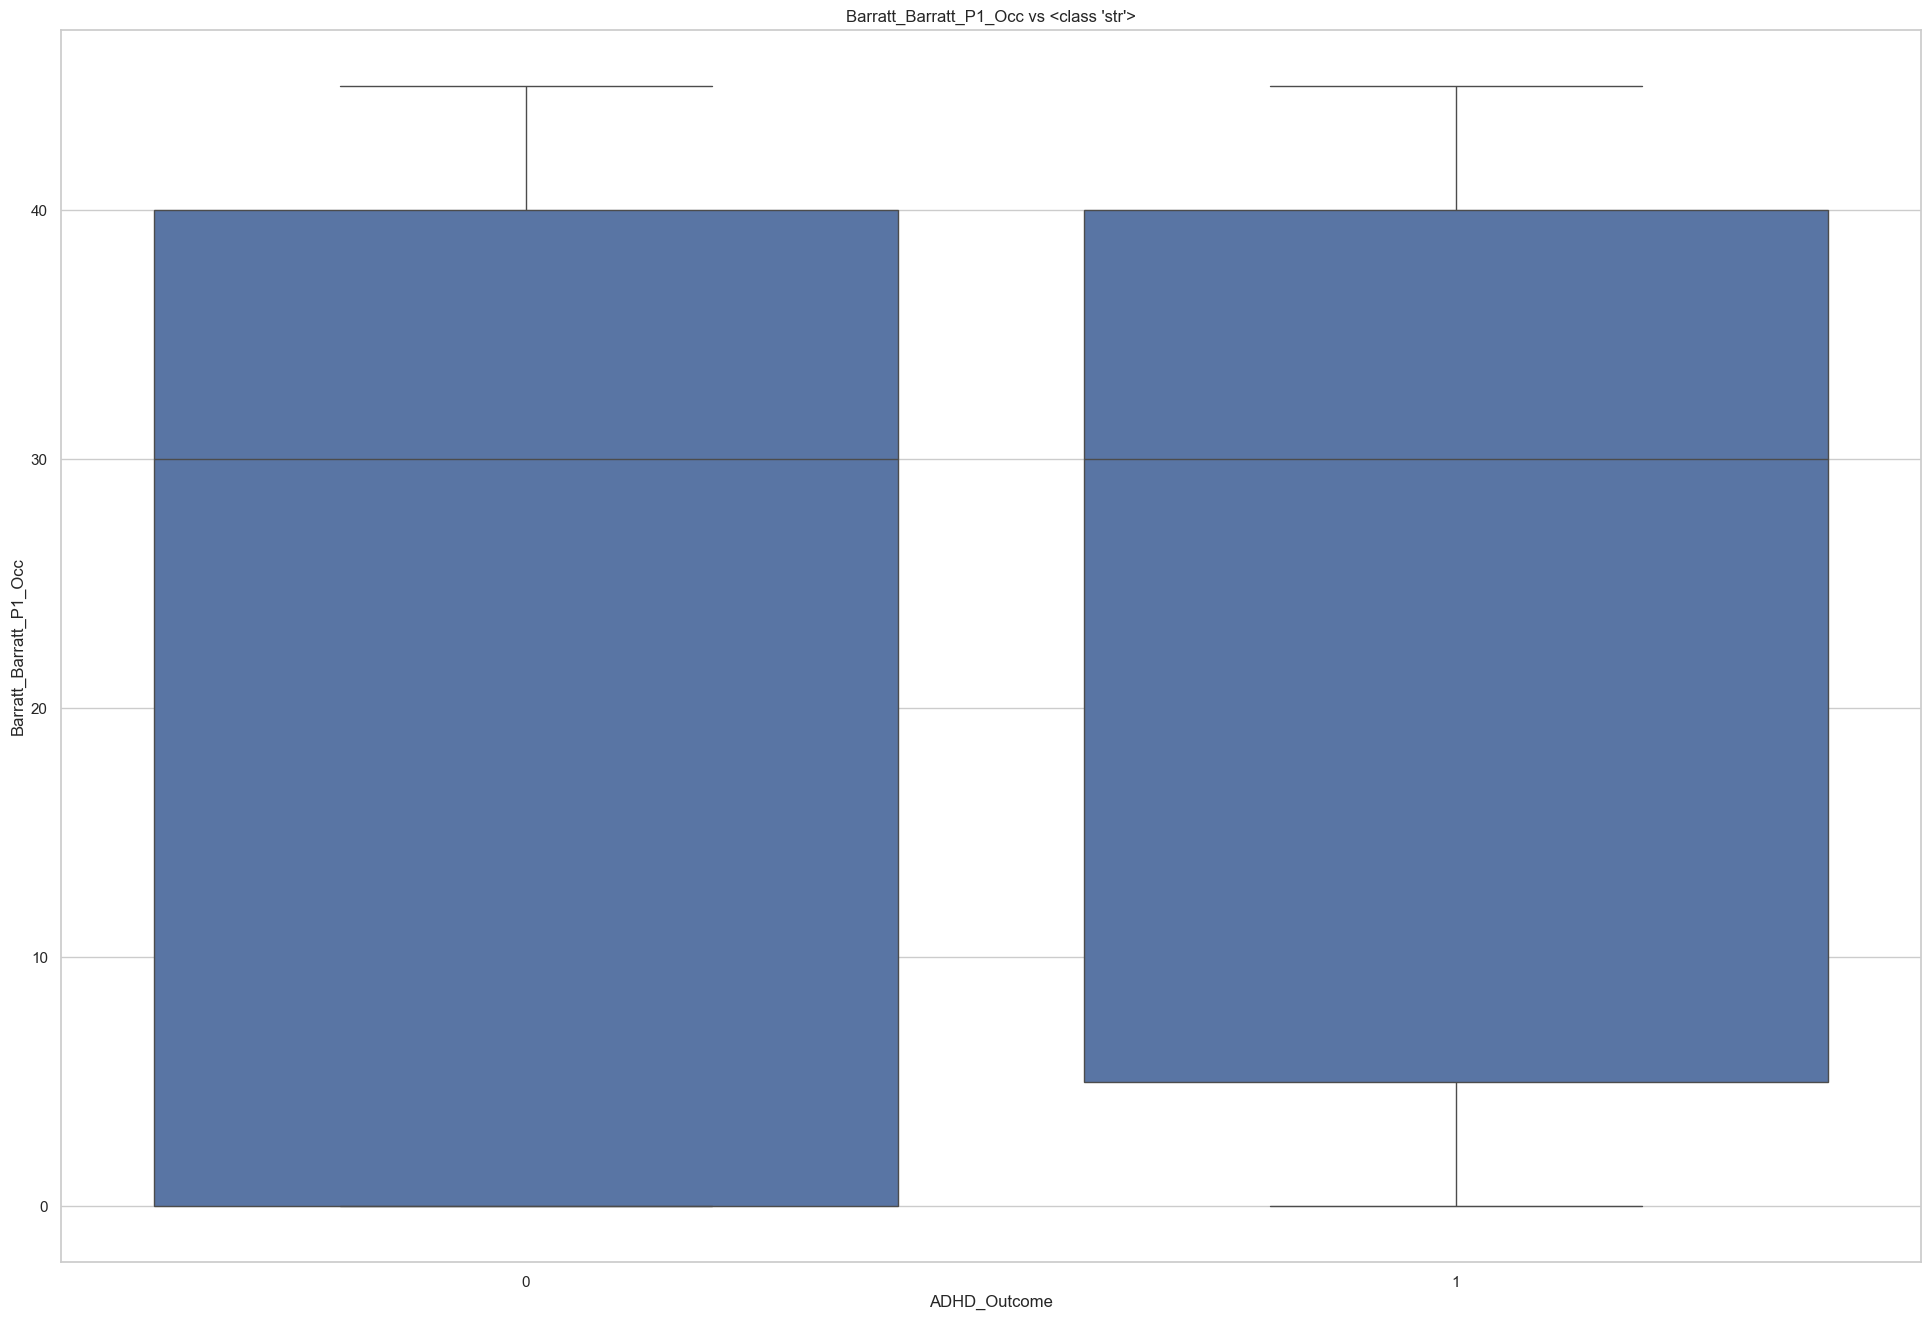

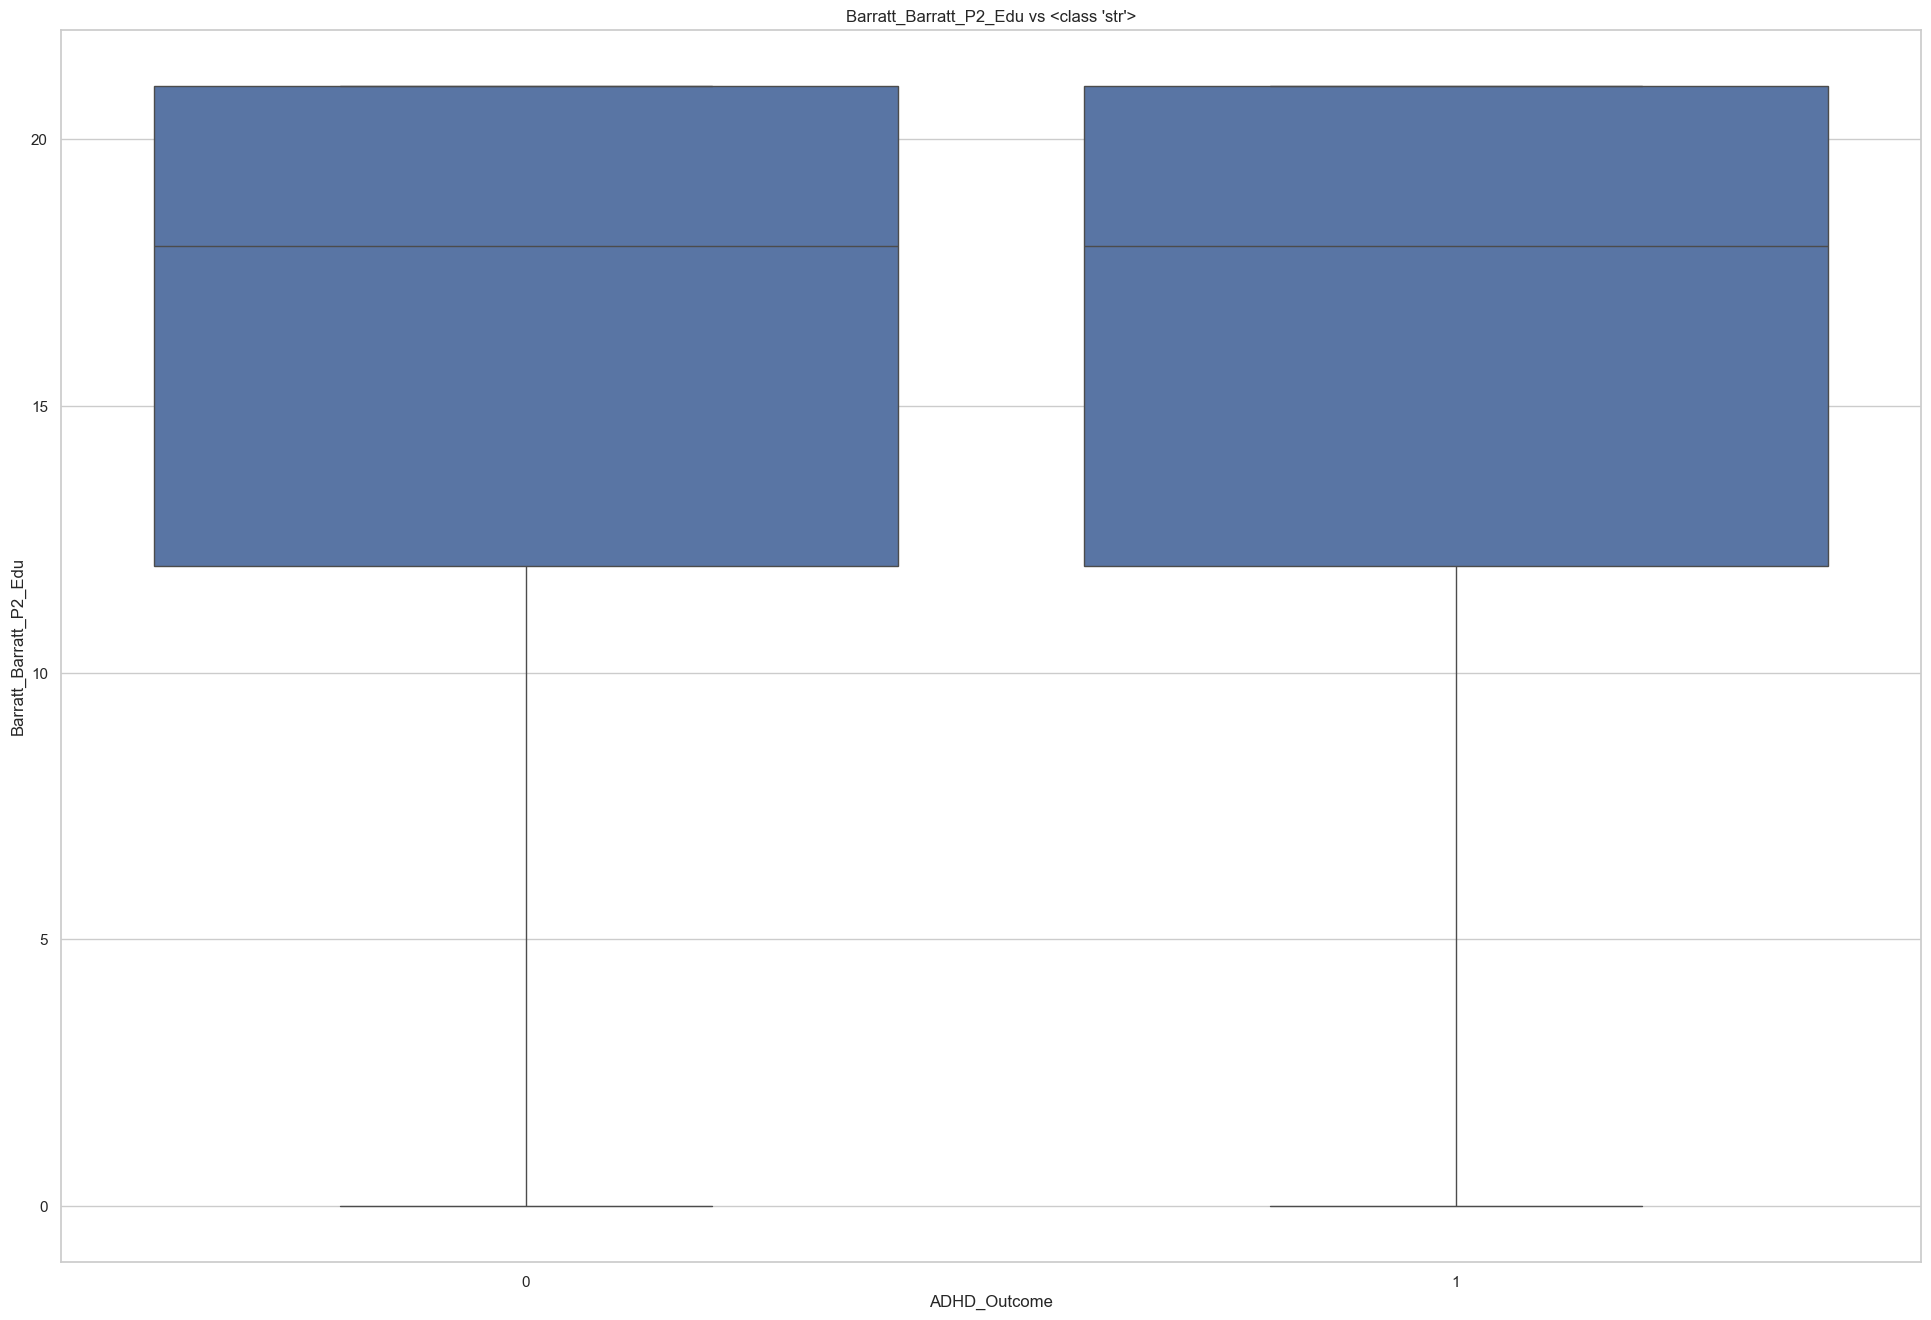

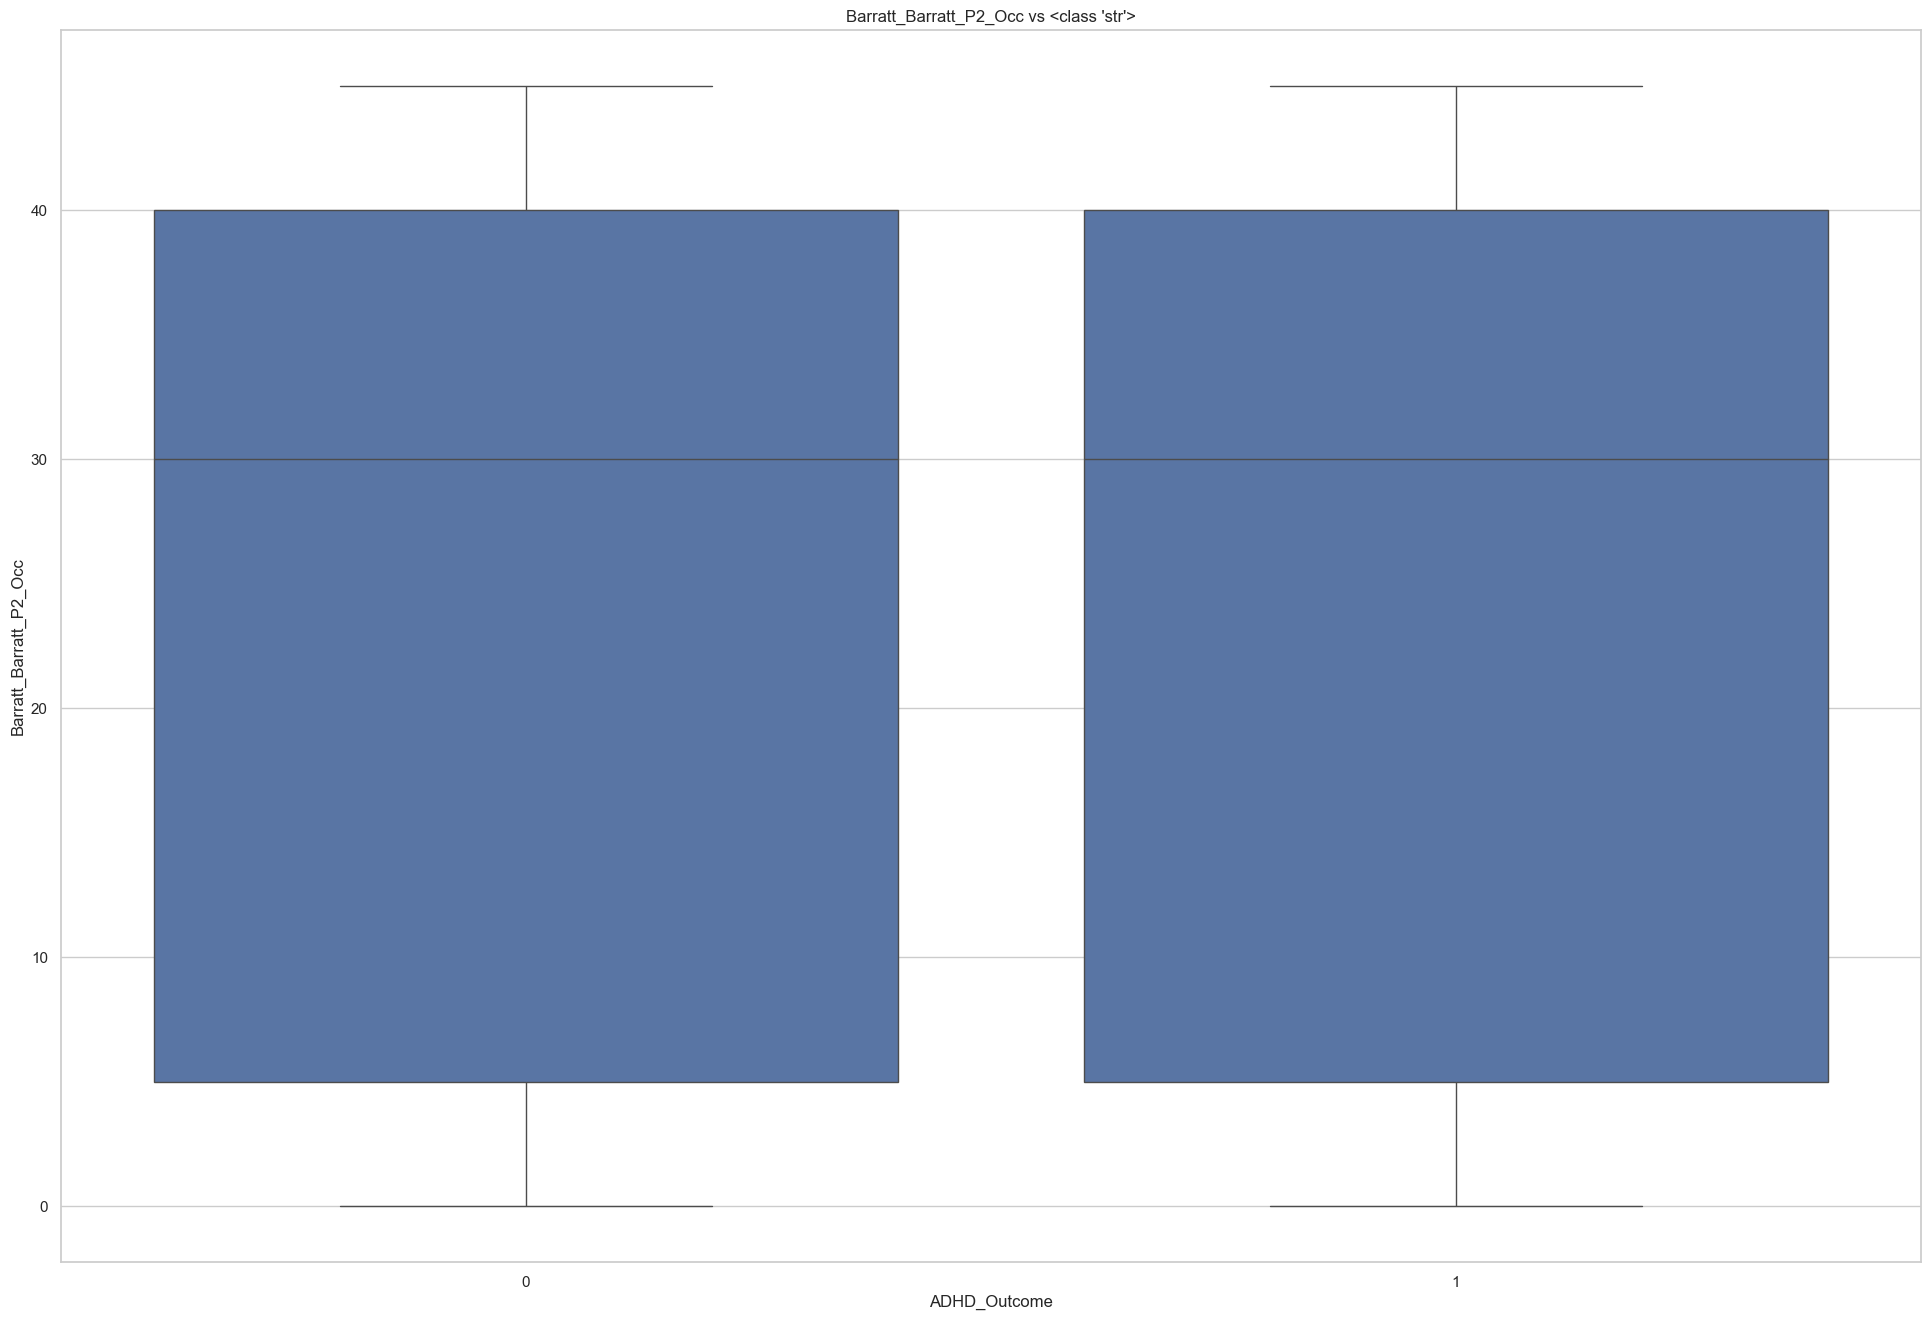

In [44]:
feature_relationship(df_metaB, "ADHD_Outcome")

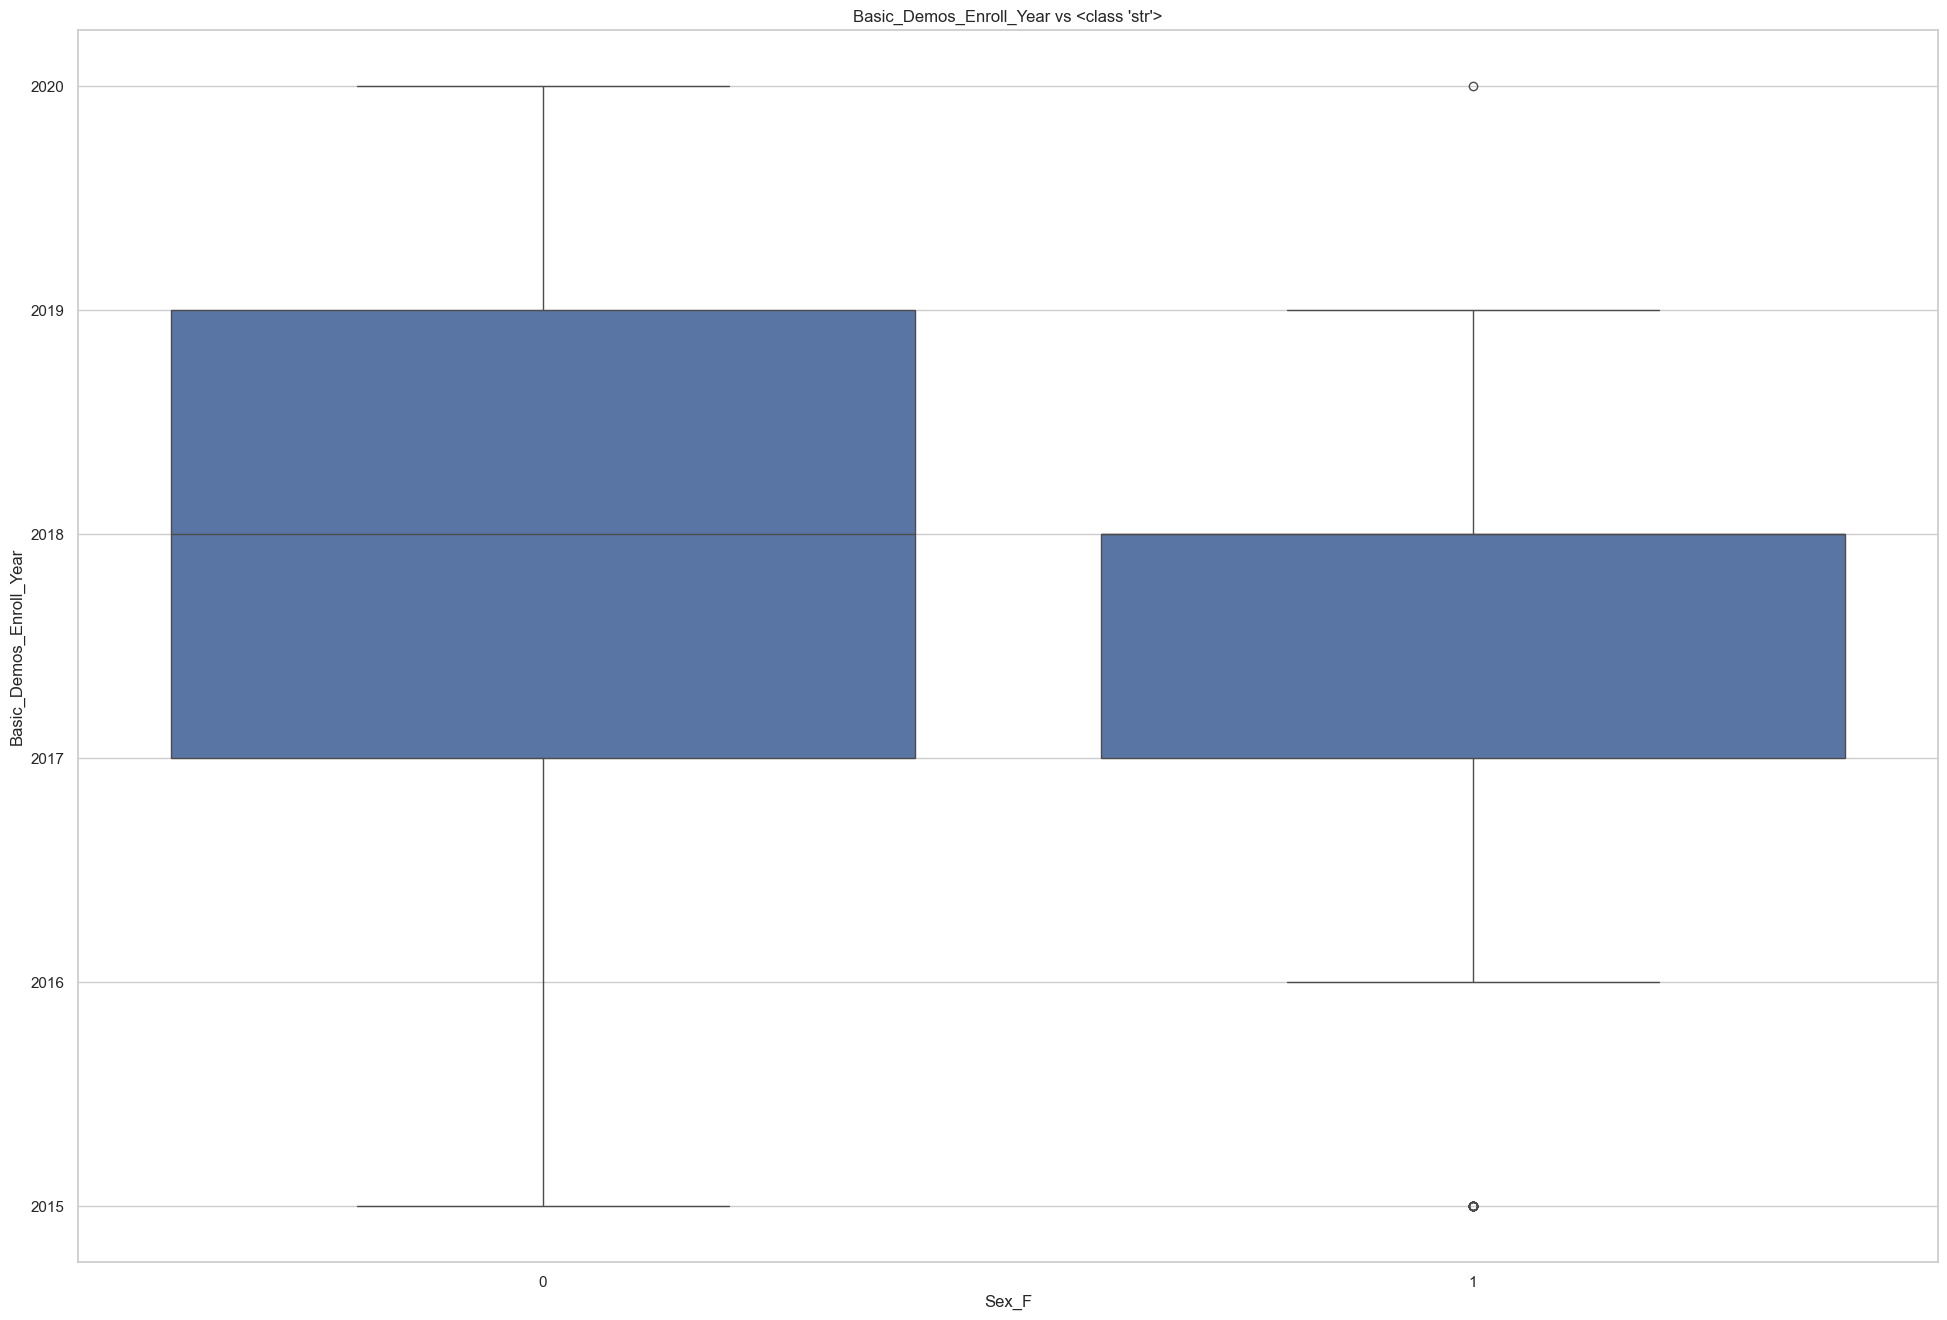

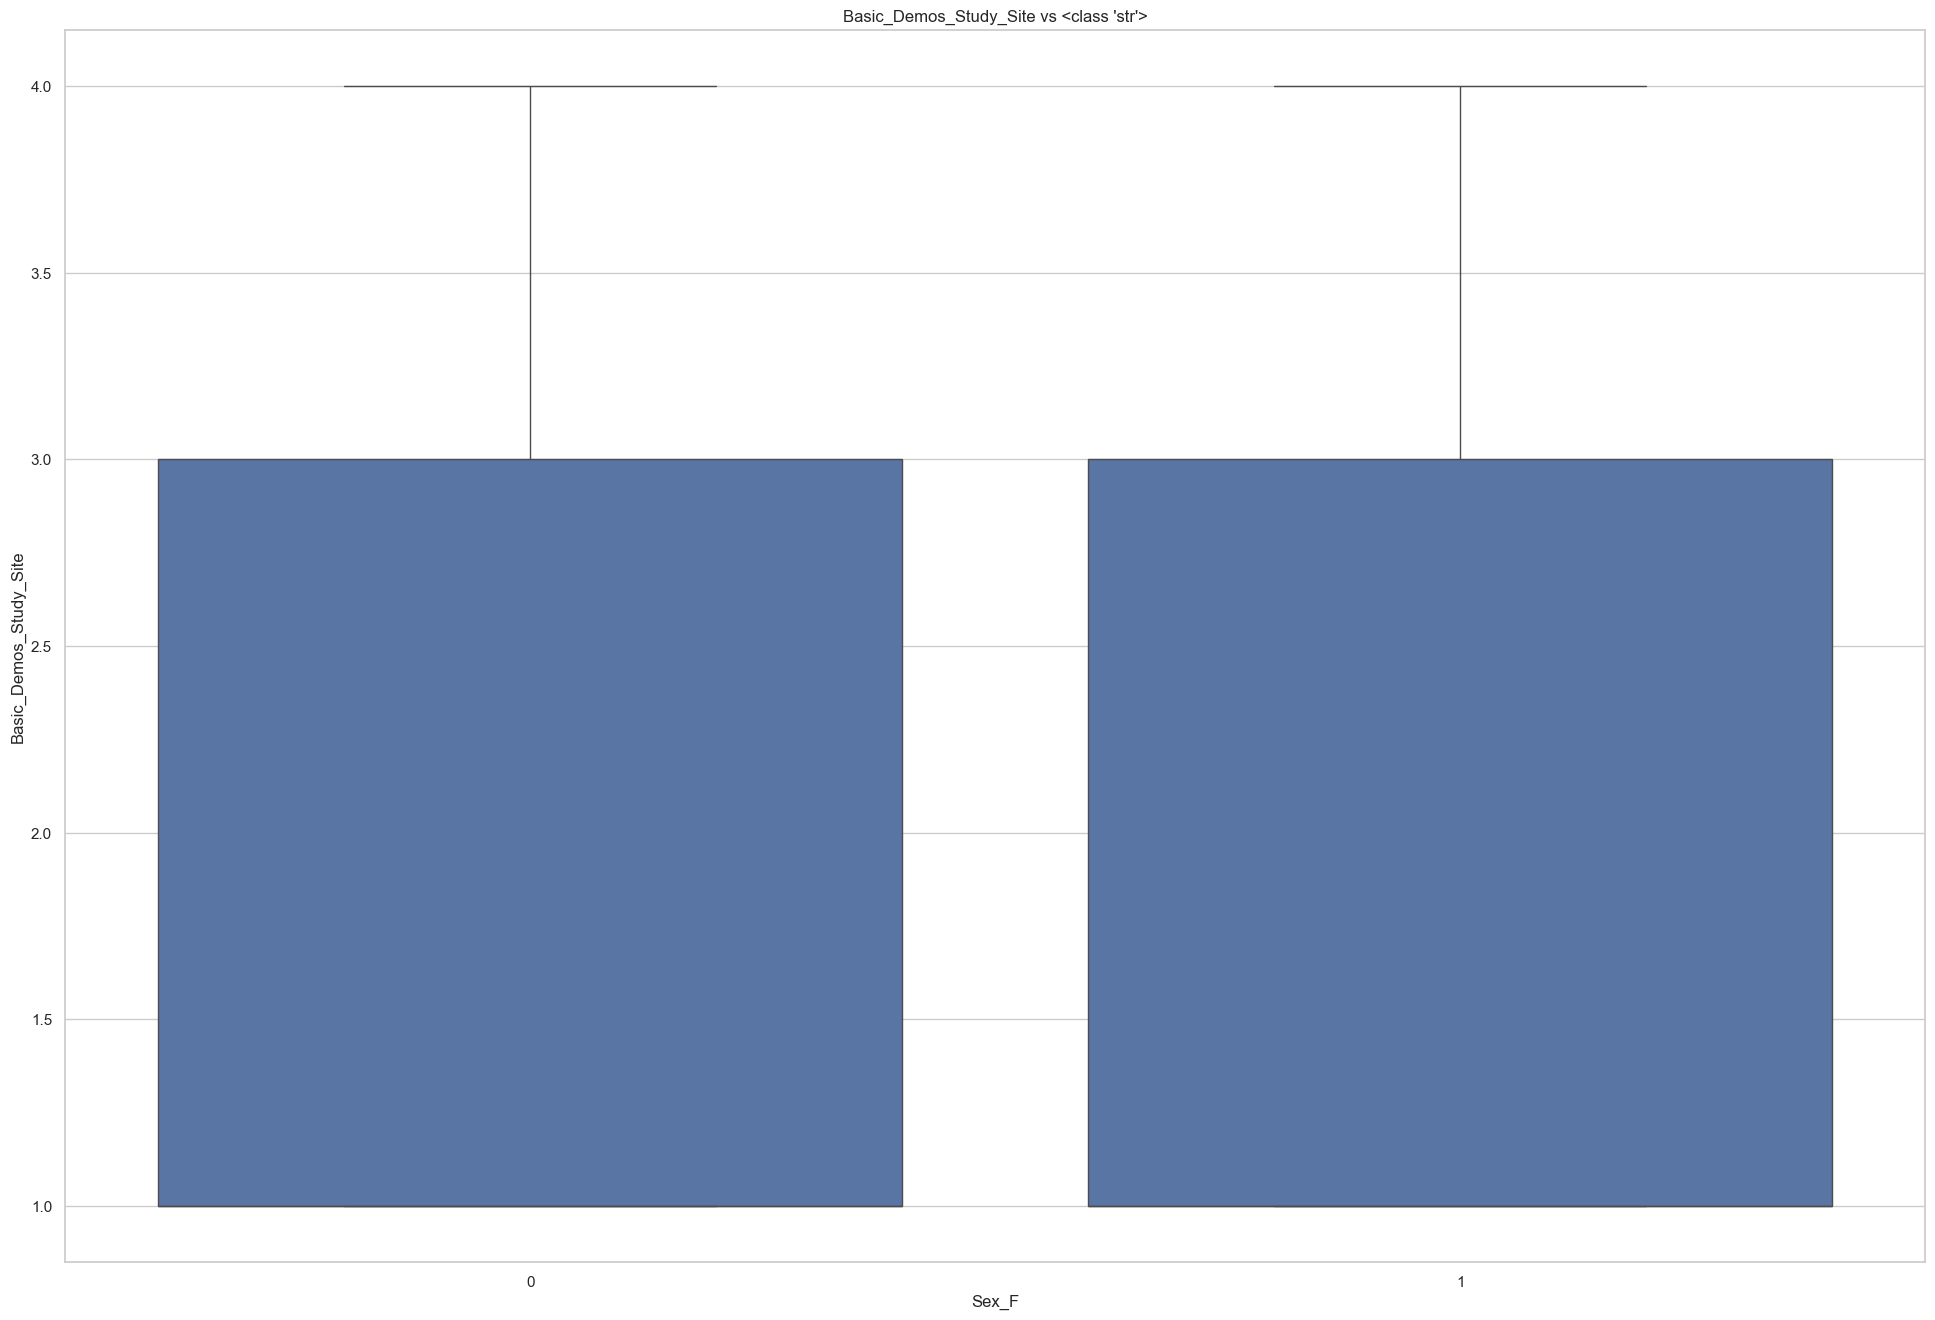

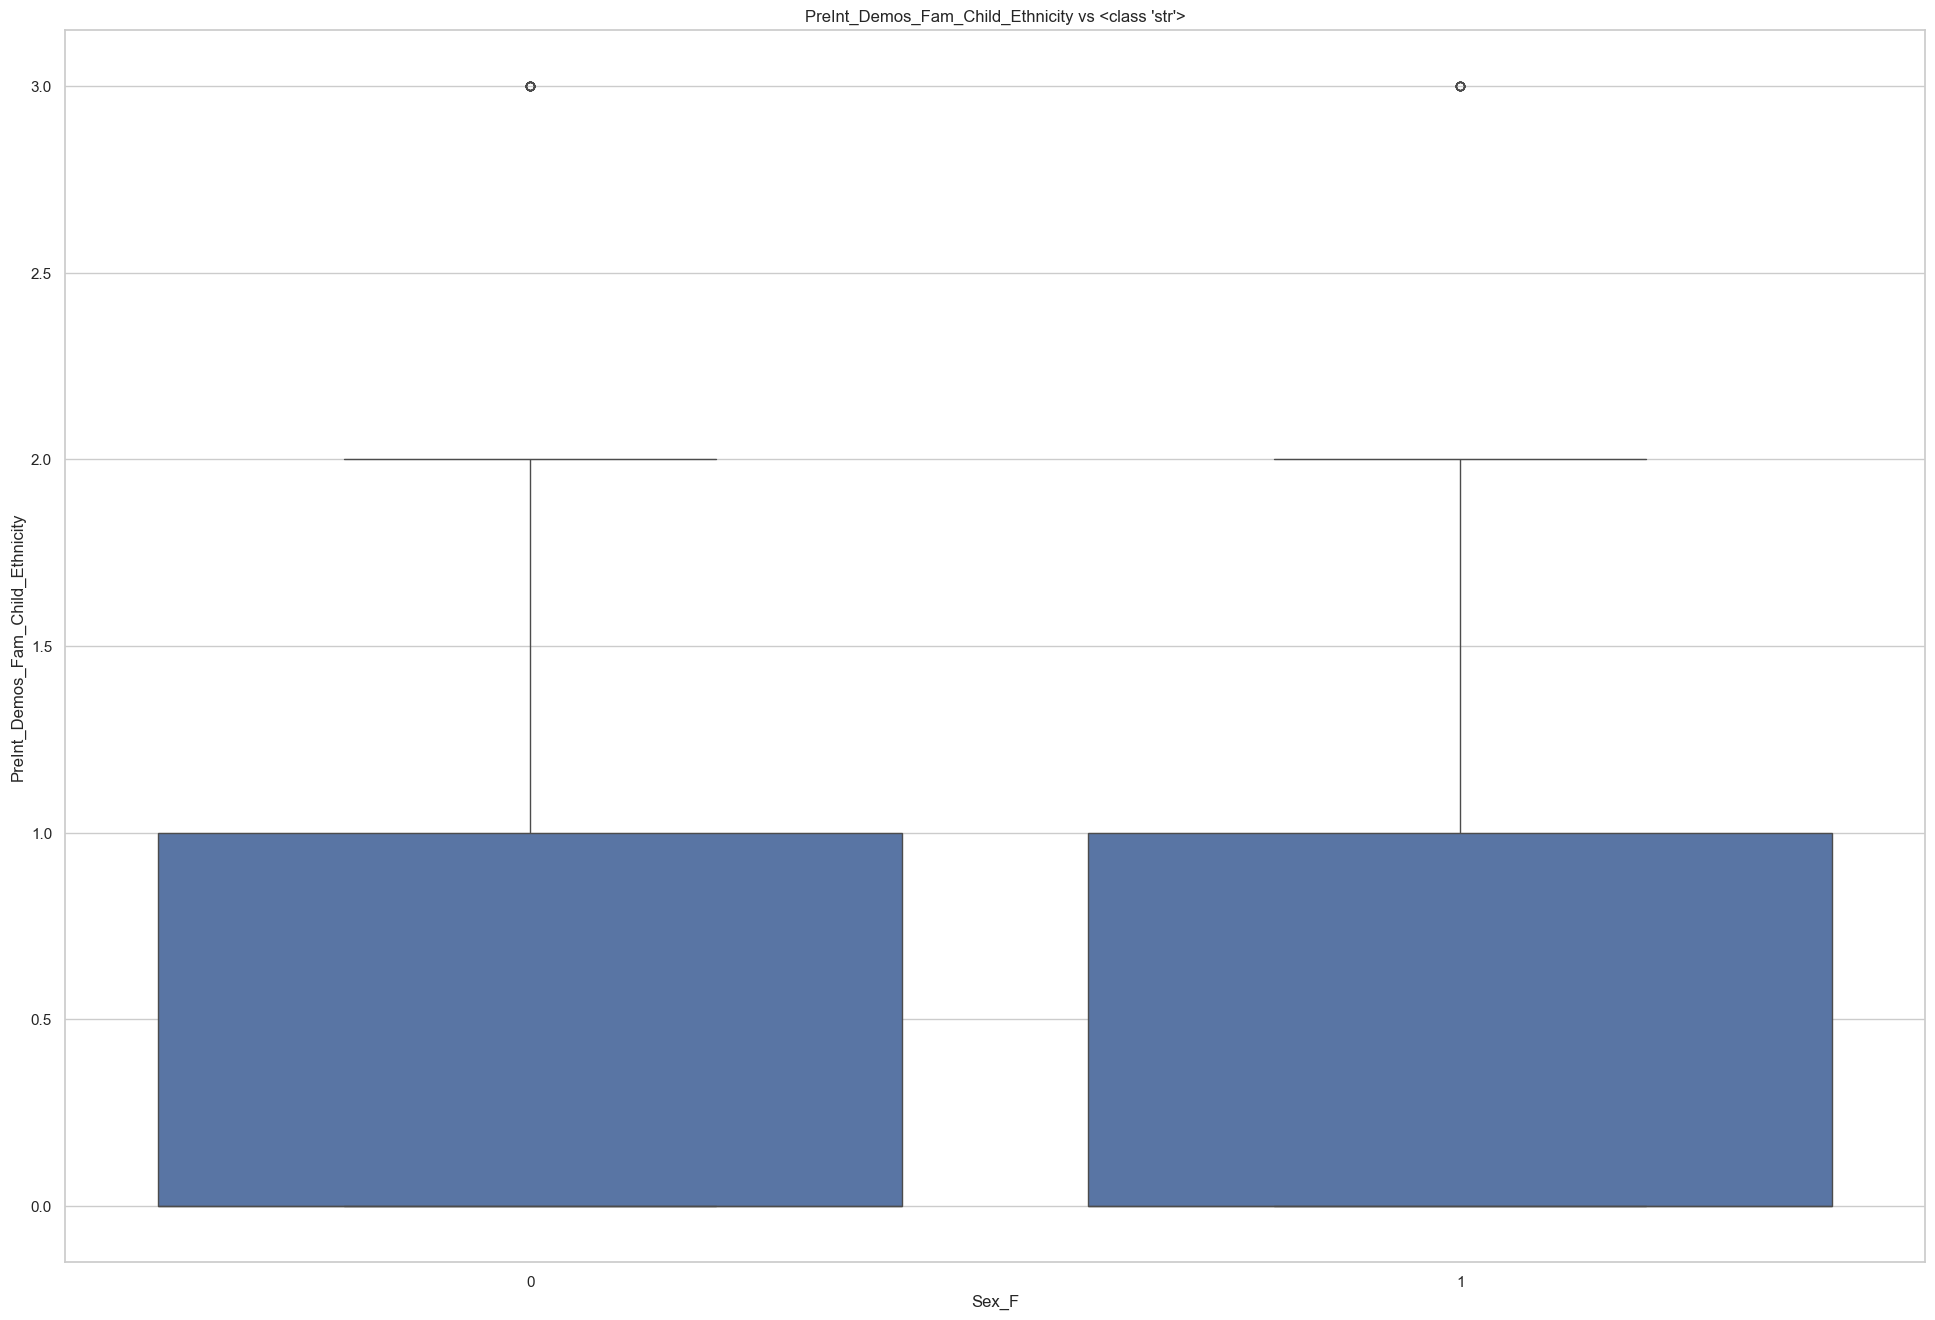

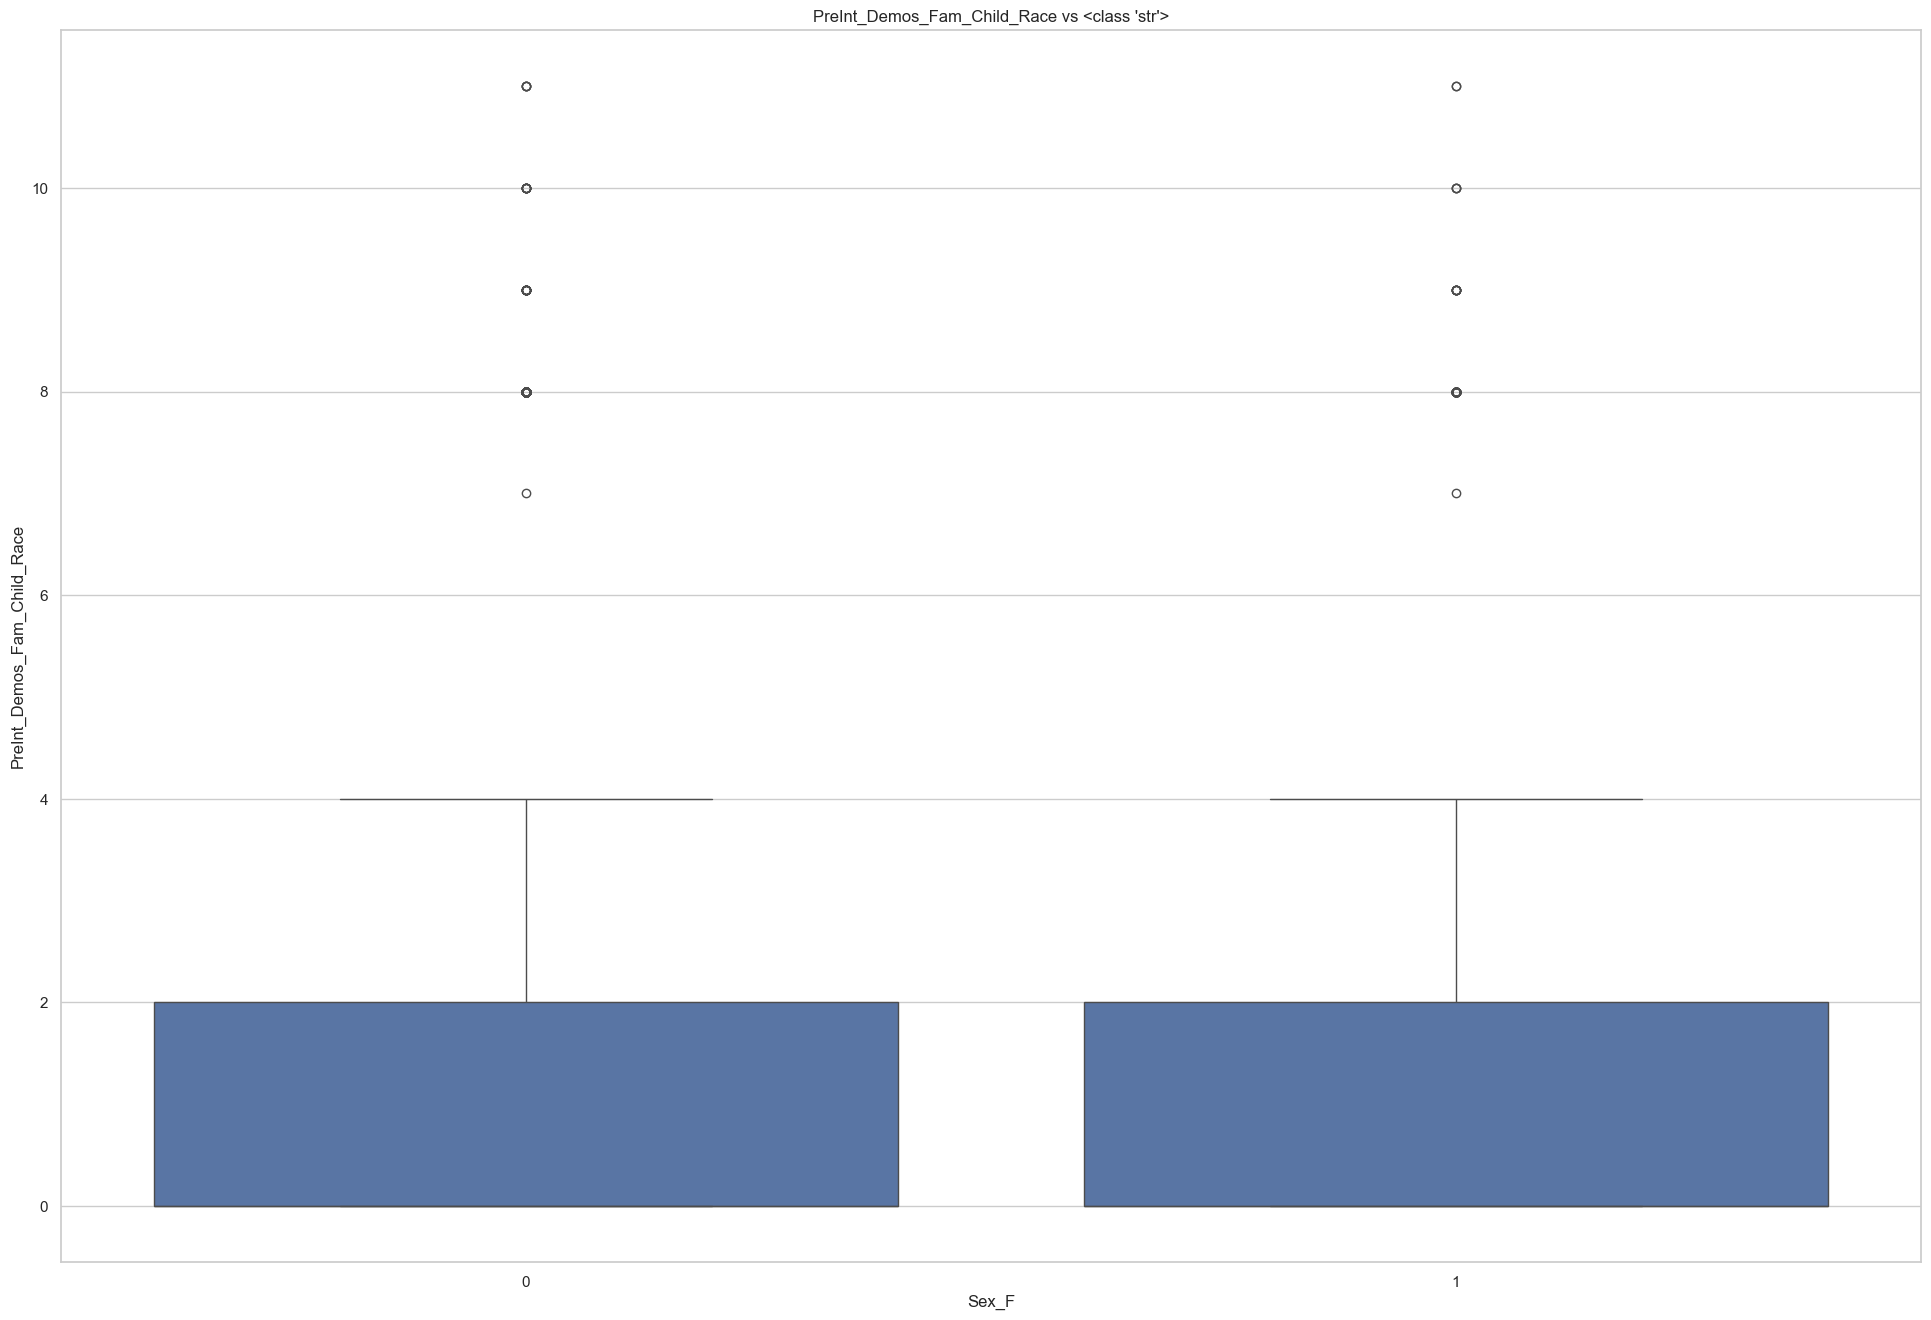

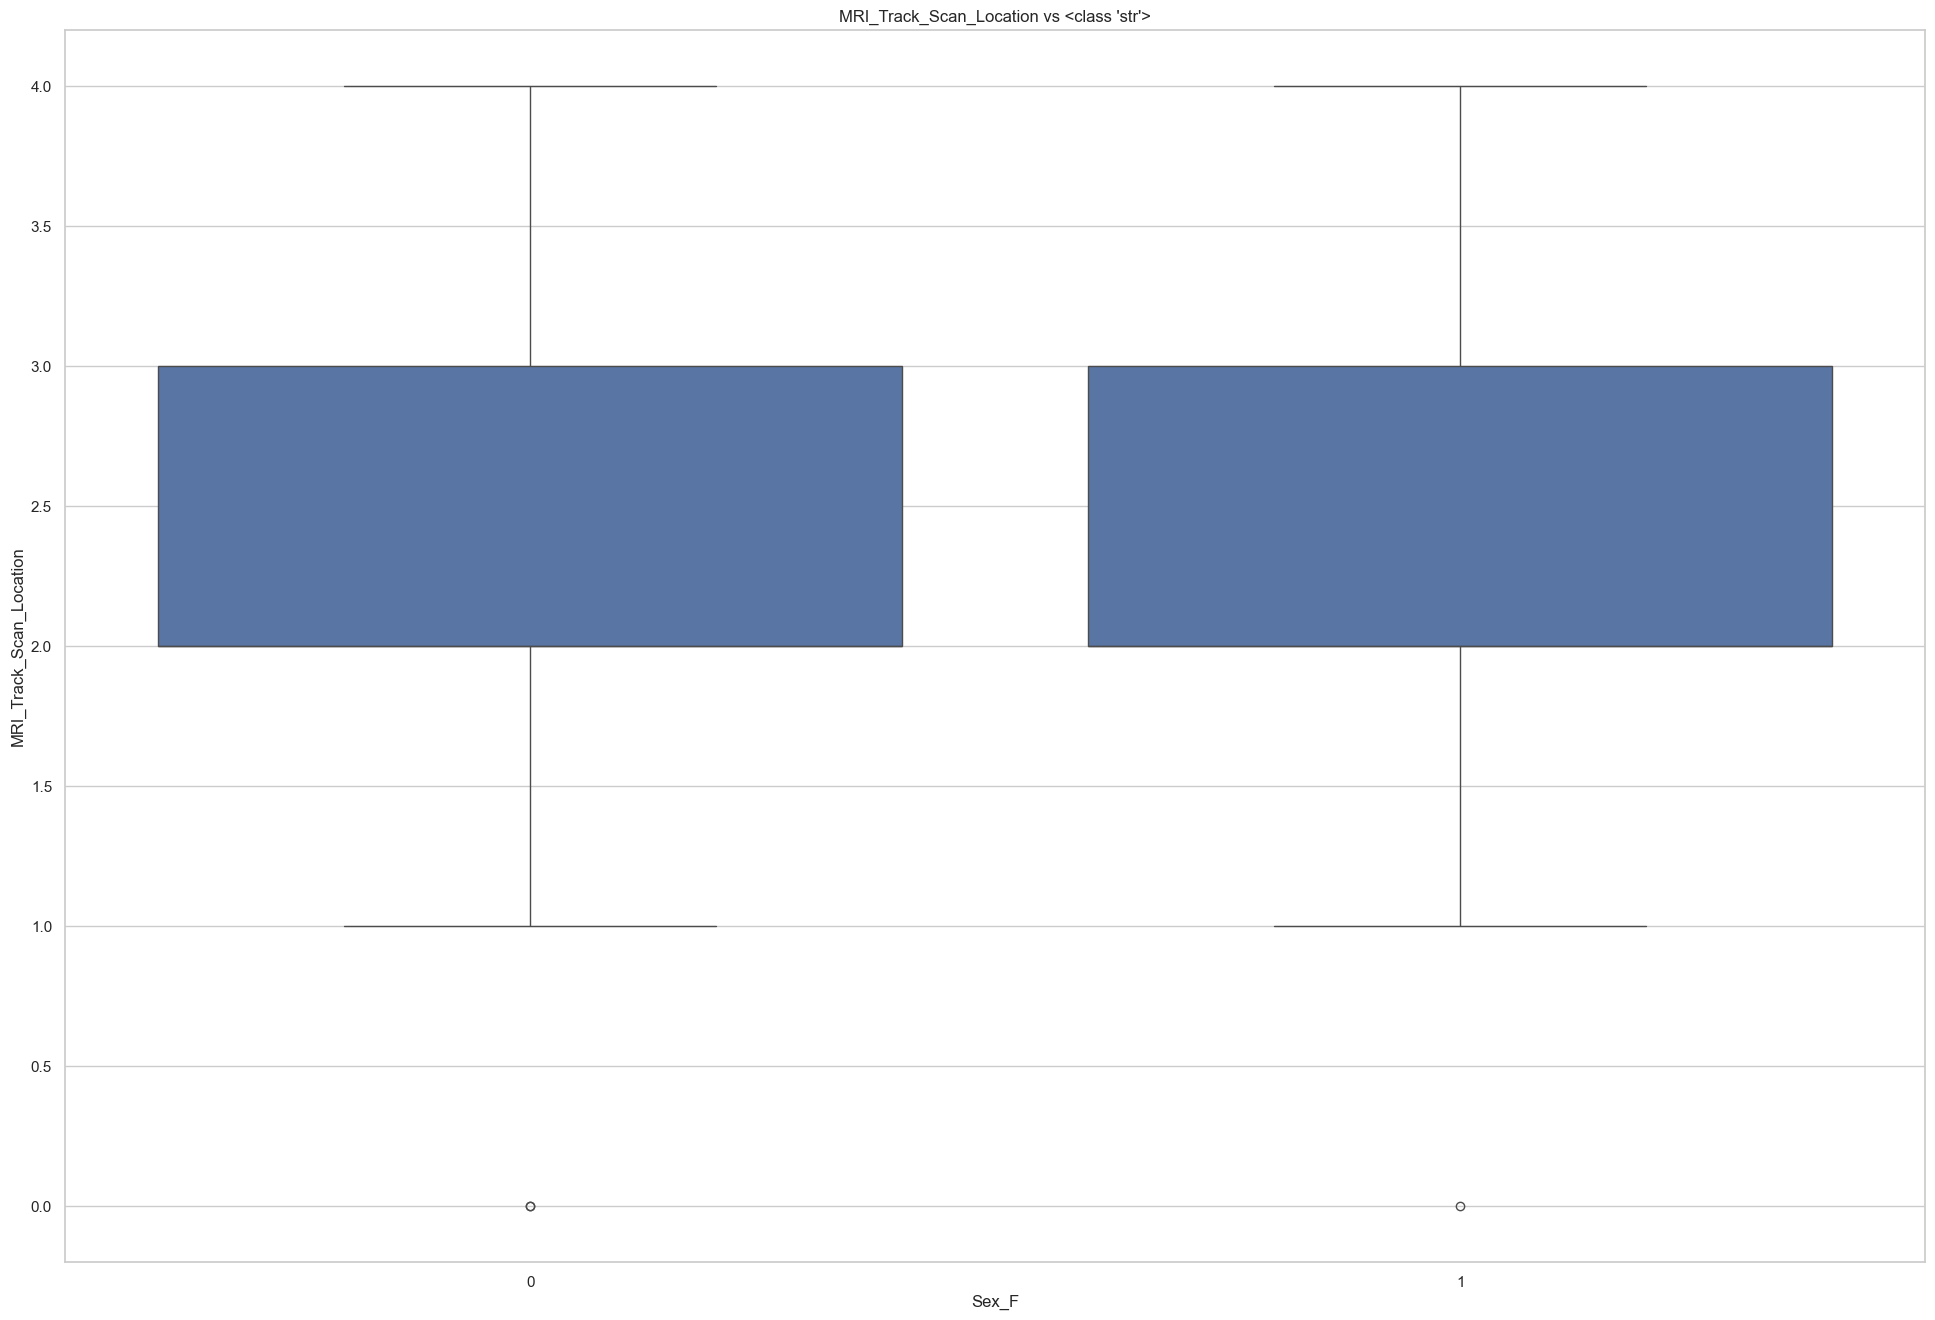

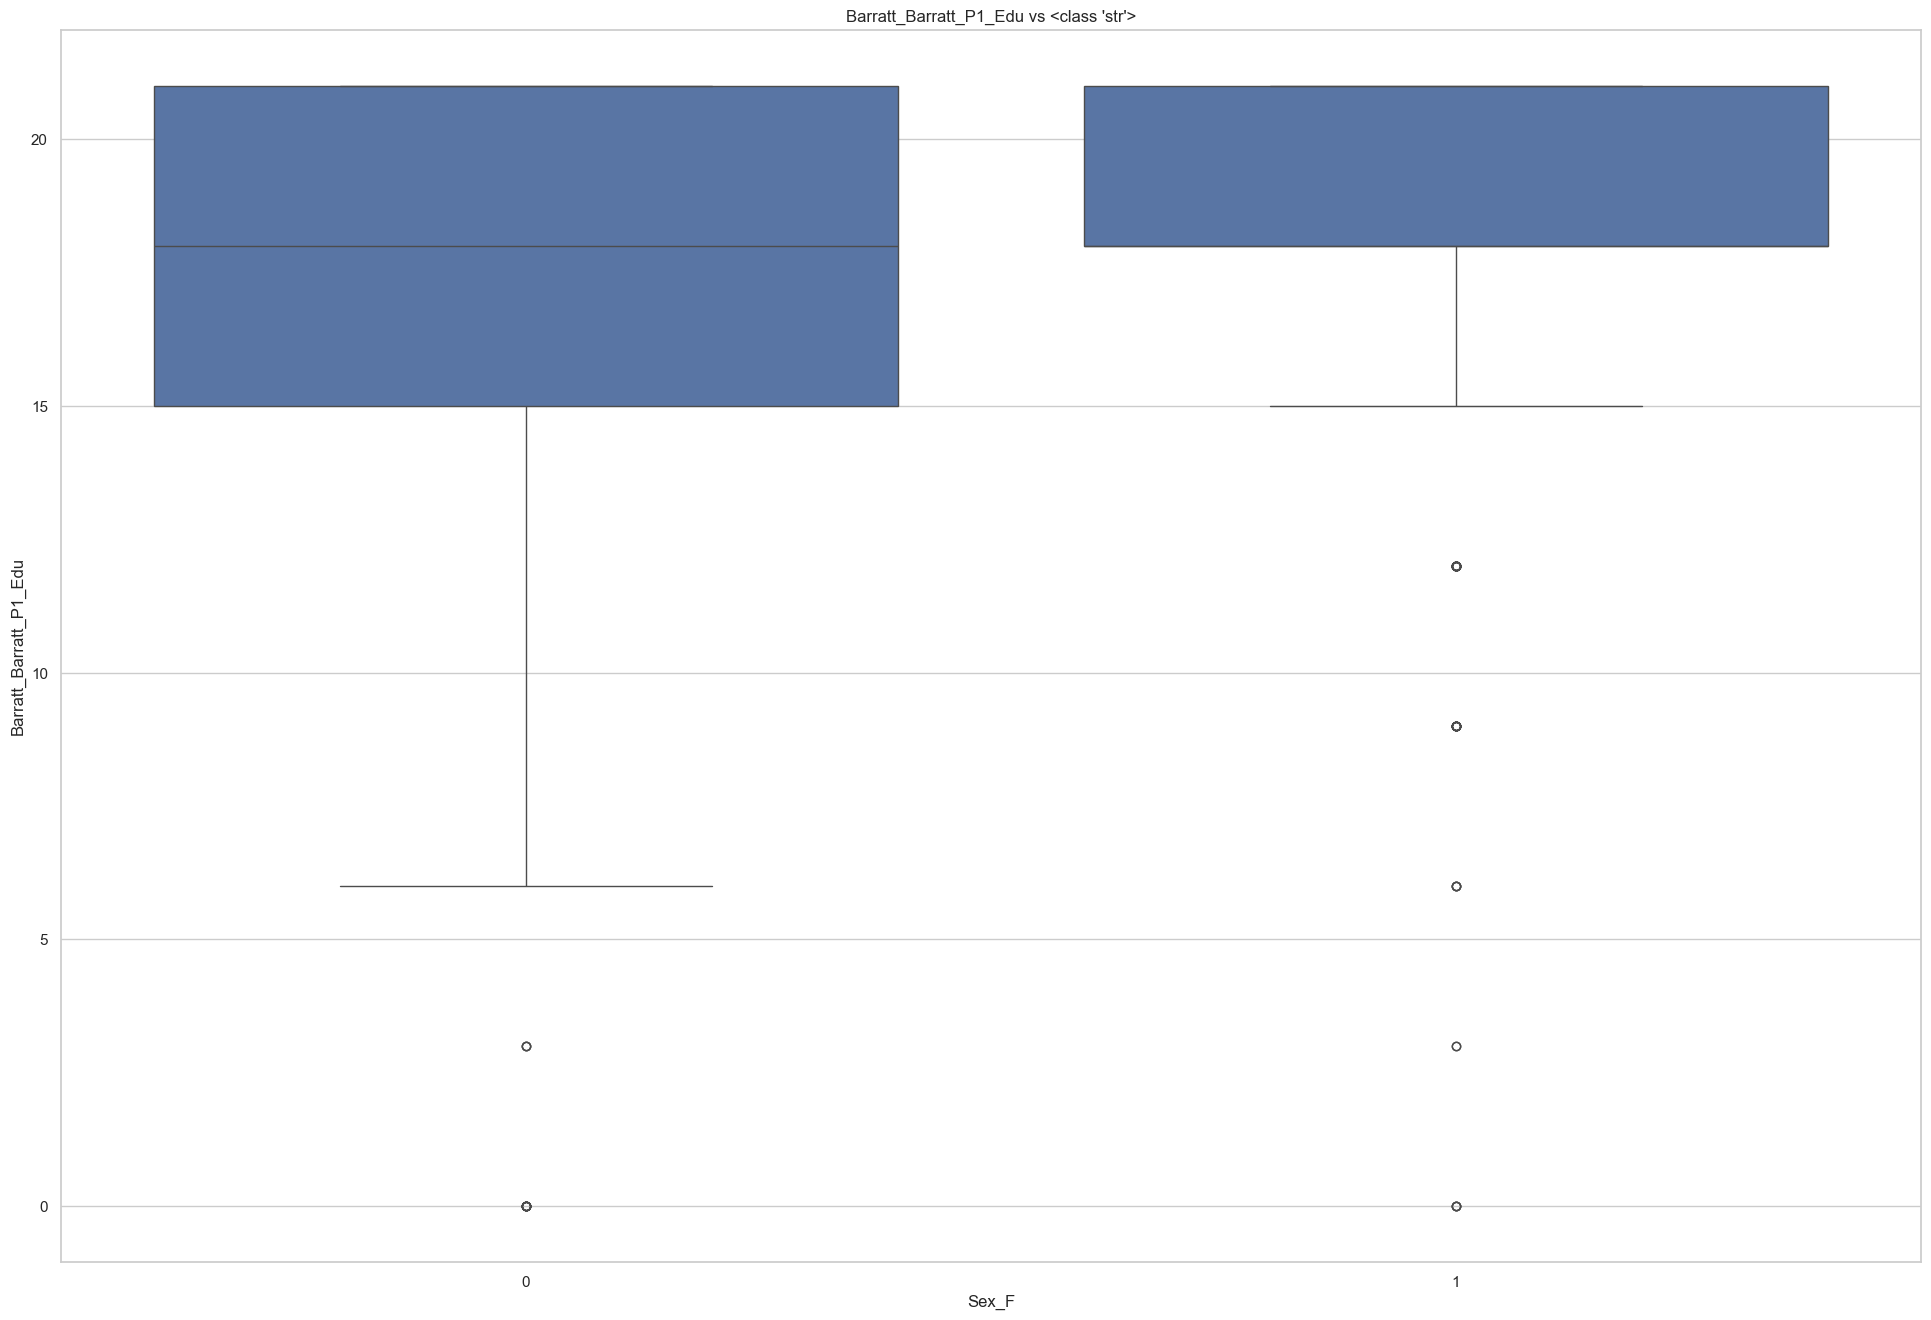

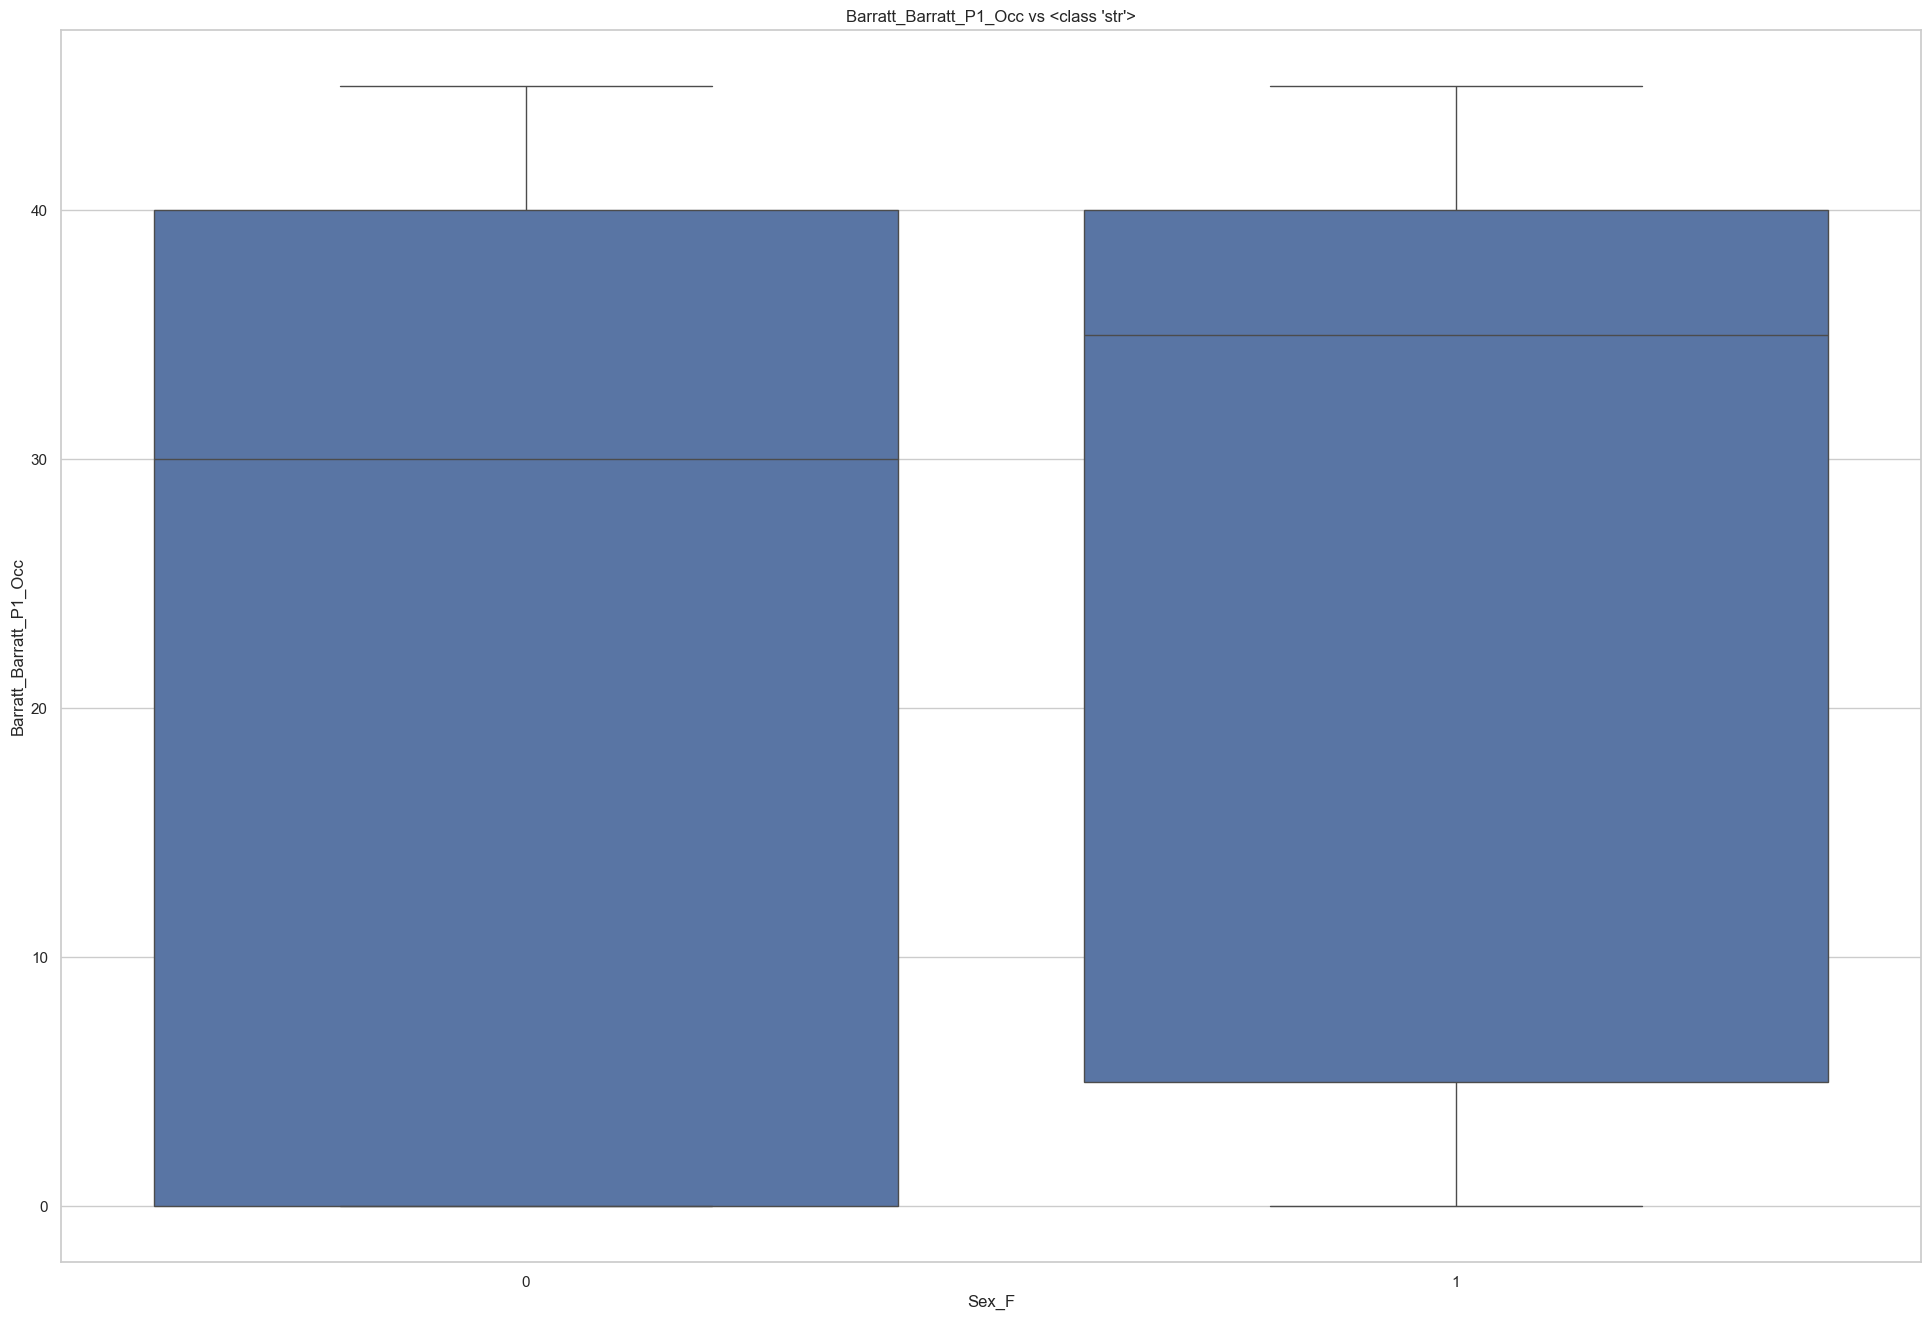

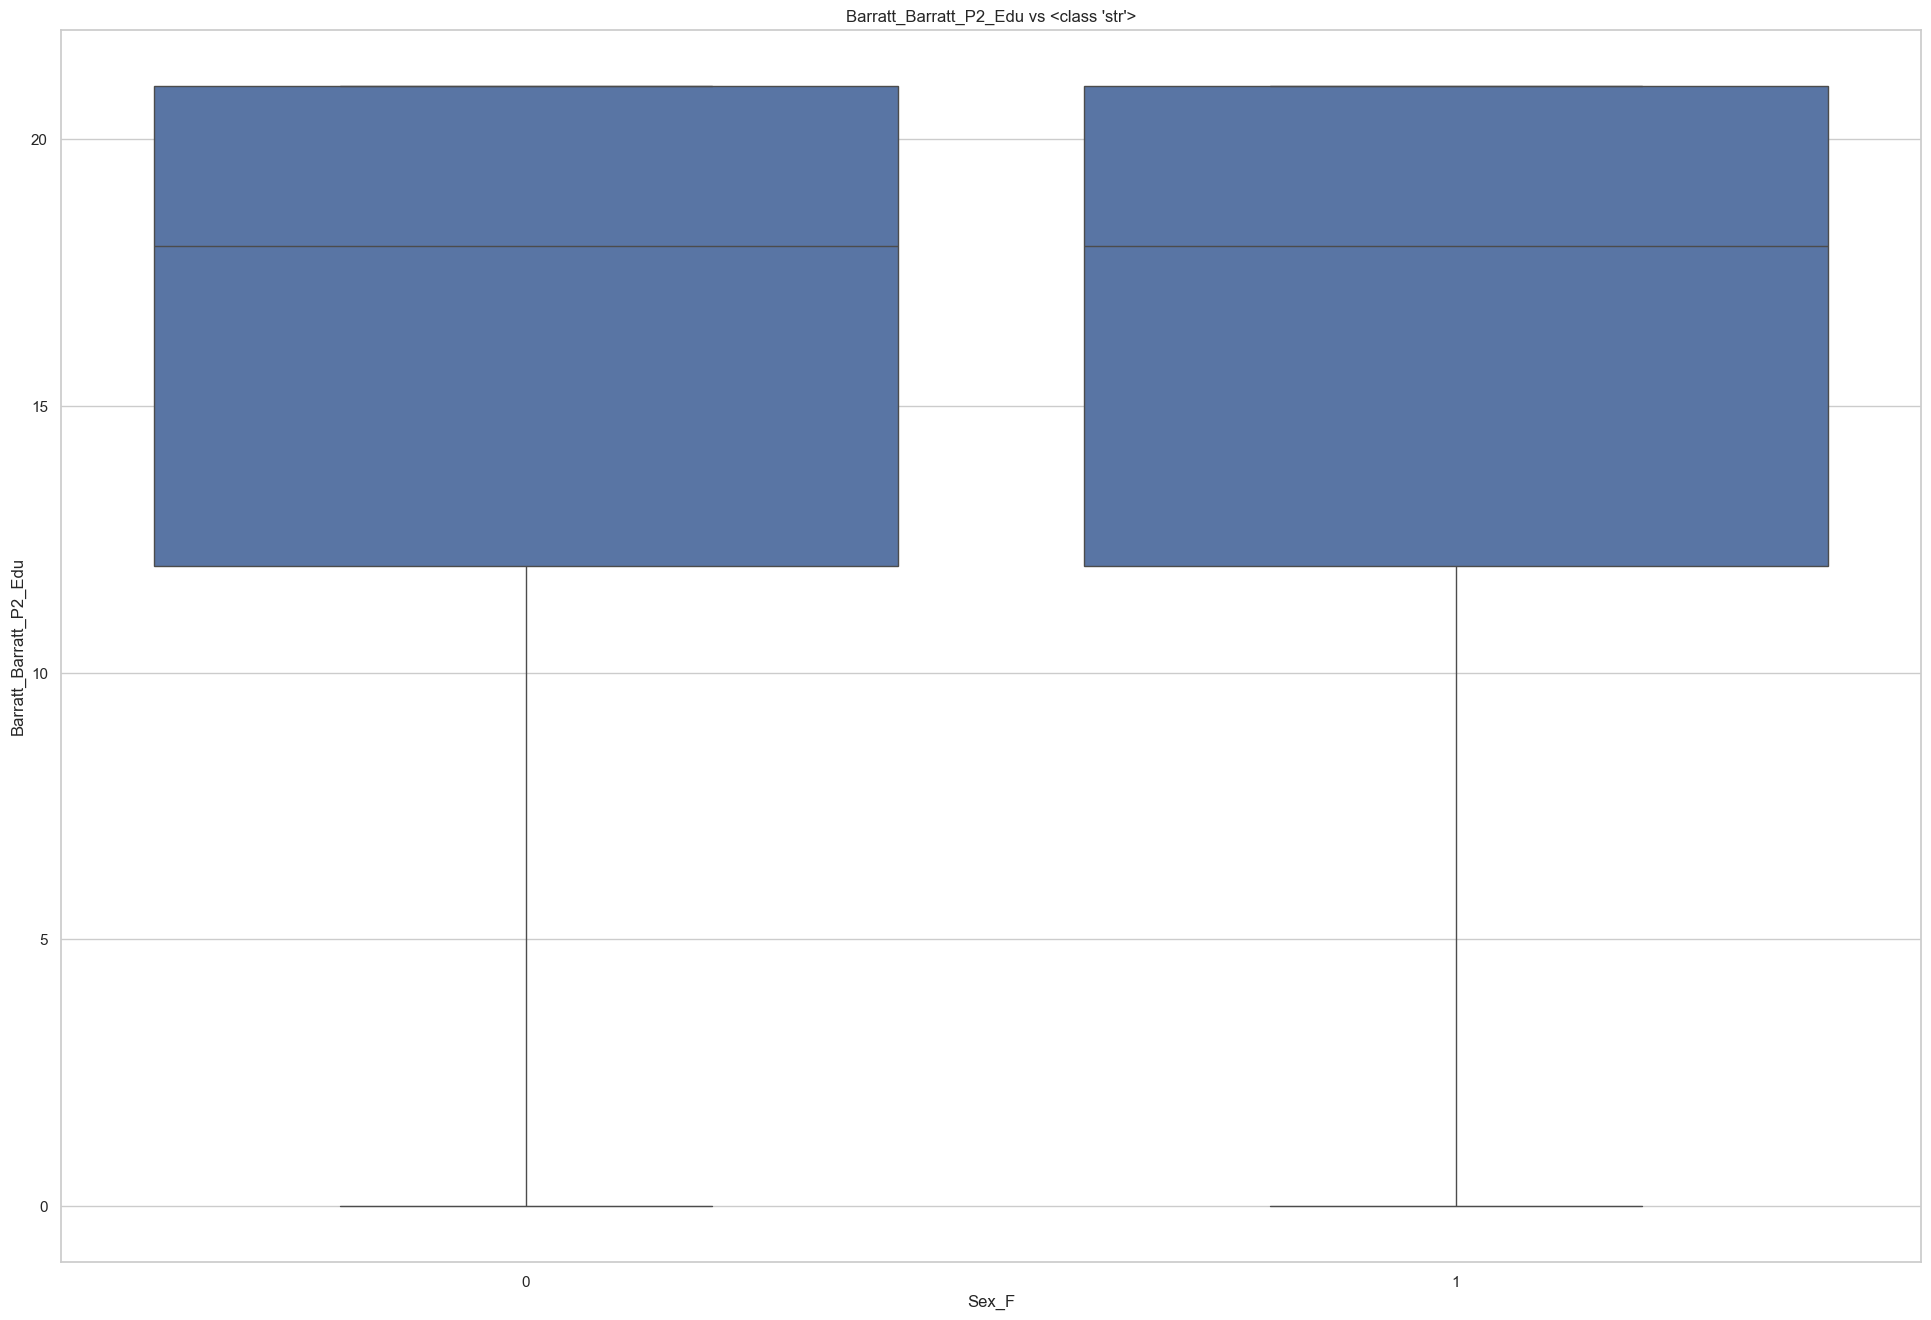

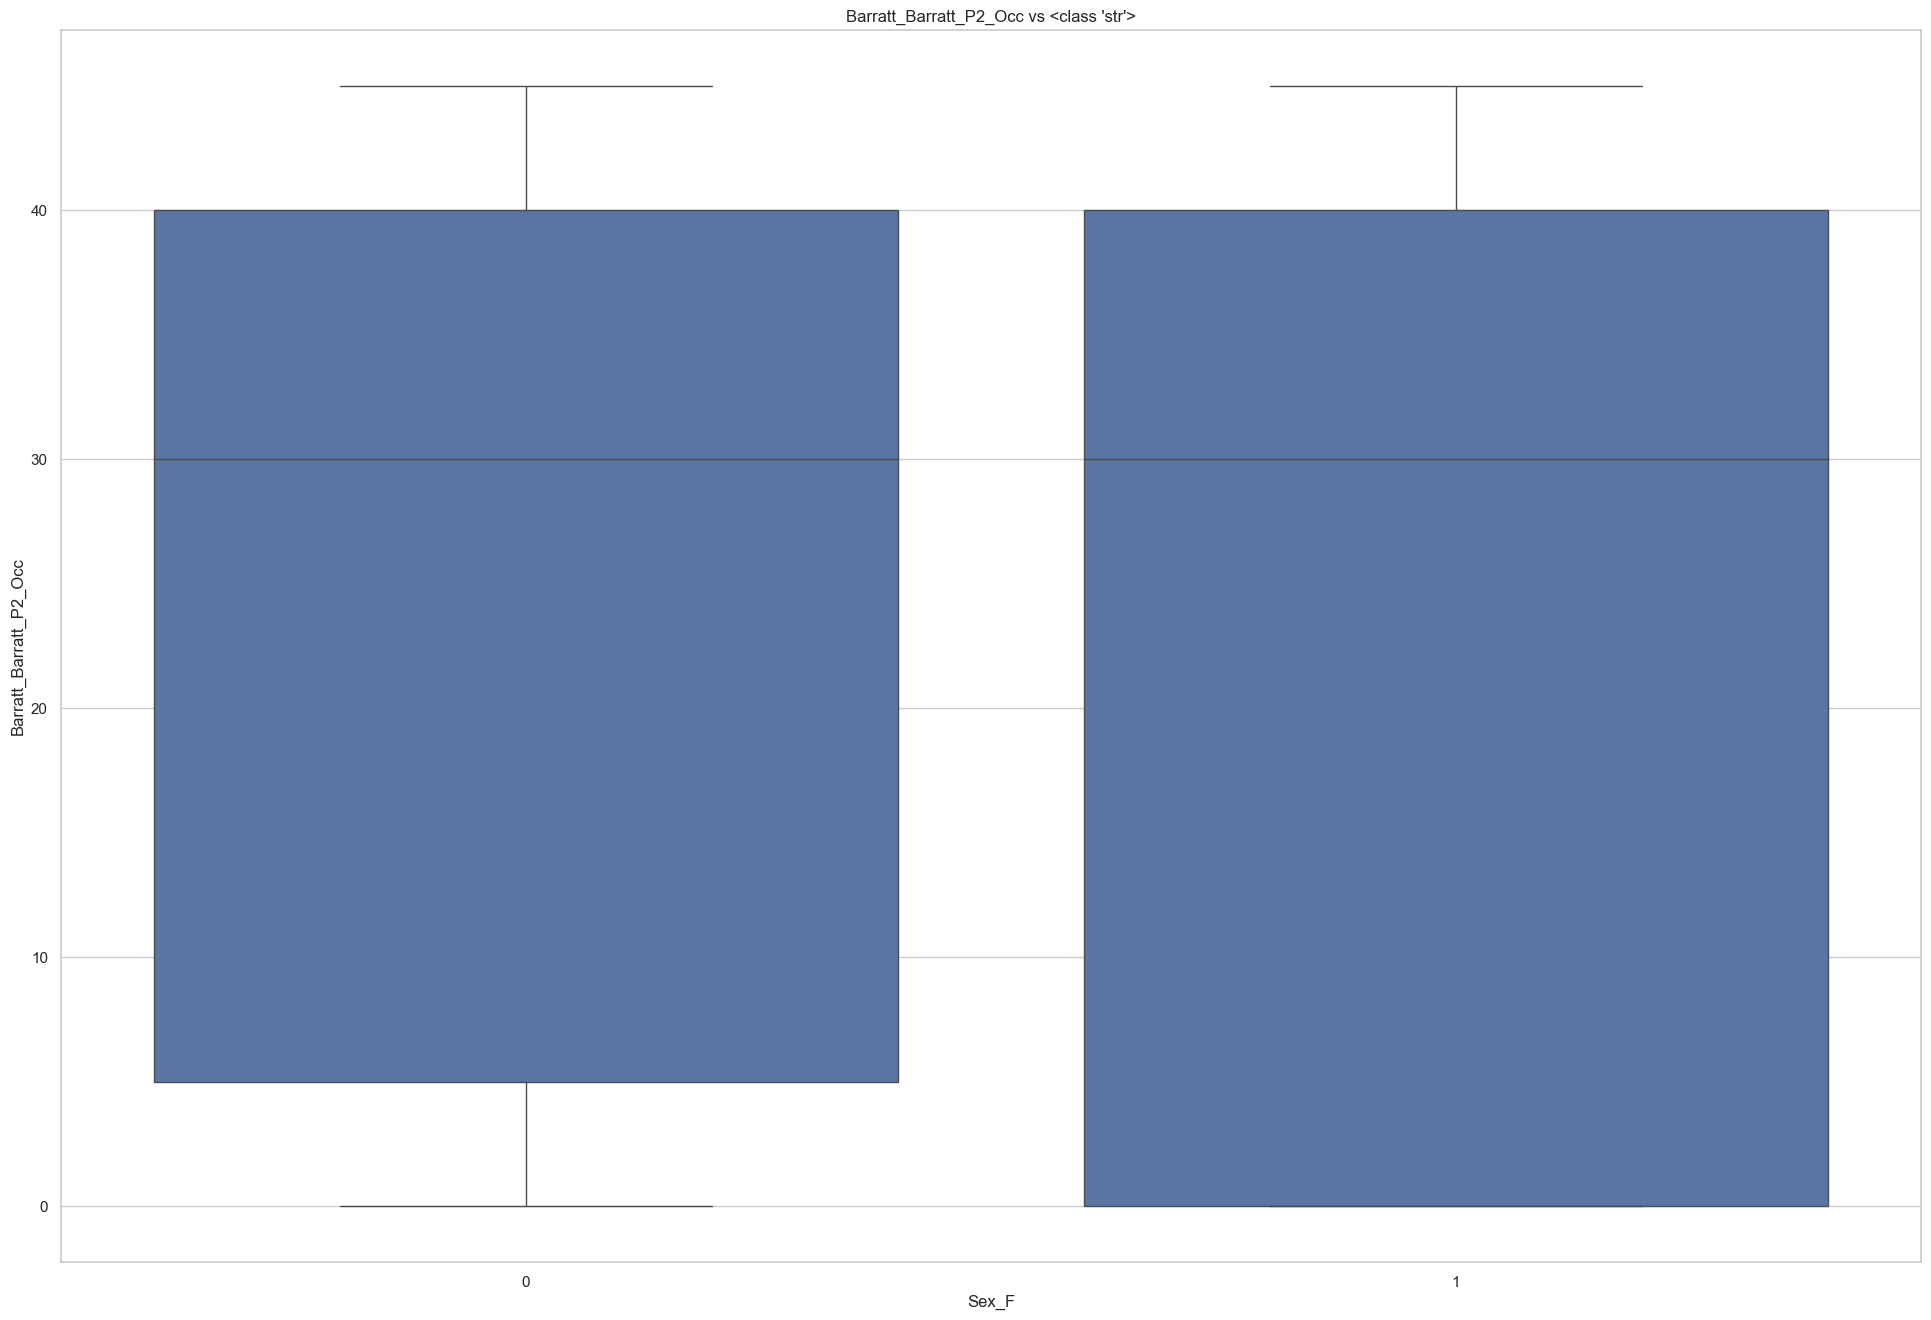

In [45]:
feature_relationship(df_metaB, "Sex_F")

<span style="font-family: Century Gothic; font-size: 15px">Missing values in MRI_Track_Age_at_Scan suggest that not all participants have MRI data. Contains psychological assessment scores</span>

<span style="font-family: Century Gothic; font-size: 15px">Demographic information such as study site, ethnicity, race, parental education/occupation, and MRI scan location</span>

### <span style="font-family: Century Gothic">Merge Metadata Based on Unique Identifier</span>

In [46]:
# Used outer to ensure all participants are retained

df_meta = pd.merge(df_metaA, df_metaB, on='participant_id', how='outer')
df_meta.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   00aIpNTbG5uh         100.00                    13               3   
1   00fV0OyyoLfw          92.27                    14               3   
2   04X1eiS79T4B          86.67                    14               3   
3   05ocQutkURd6          93.34                    14               3   
4   06YUNBA9ZRLq           0.00                    14               8   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0              15               44               14              20   
1              12               35               25              28   
2              21               37               18              26   
3              11               42               15              20   
4              12               35               22              12   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  ...  MRI_Track_Age_at_Scan  \
0              27                         3  ...              14.274127   
1              30                         5  ...                    NaN   
2              28                         3  ...              13.463381   
3              28                         0  ...               9.572553   
4              24                         6  ...               6.654574   

   Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0                     2019                       4   
1                     2017                       1   
2                     2017                       1   
3                     2018                       1   
4                     2018                       1   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               1.0                            0   
1                               0.0                            9   
2                               1.0                            2   
3                               3.0                            8   
4                               0.0                            1   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        3                      21                      45   
1                        2                      21                       0   
2                        2                       9                       0   
3                        2                      18                      10   
4                        2                      12                       0   

   Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  
0                       0                       0  
1                      21                      45  
2                       0                       0  
3                      18                       0  
4                       0                       0  

[5 rows x 28 columns]

In [47]:
df_meta.shape

(1213, 28)

### <span style="font-family: Century Gothic">Clean and Preprocess the data</span>

- <span style="font-family: Century Gothic; font-size: 15px">Handle missing values.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Encode categorical variables.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Normalize/scale numerical features.</span>

##### <span style="font-family: Century Gothic">Handling missing values using `Simple Imputer`</span>

- <span style="font-family: Century Gothic; font-size: 15px">Use median imputation for "MRI_Track_Age_at_Scan" (continuous variable).</span>
- <span style="font-family: Century Gothic; font-size: 15px">Use most frequent value imputation for "PreInt_Demos_Fam_Child_Ethnicity" (categorical variable).</span>

In [48]:
df = df_meta.copy()

In [49]:
imputer_numeric = SimpleImputer(strategy='median')
imputer_categorical = SimpleImputer(strategy='most_frequent')

df['MRI_Track_Age_at_Scan'] = imputer_numeric.fit_transform(df[['MRI_Track_Age_at_Scan']])
df['PreInt_Demos_Fam_Child_Ethnicity'] = imputer_categorical.fit_transform(df[['PreInt_Demos_Fam_Child_Ethnicity']])

#### <p style="font-family: Century Gothic; font-size: 15px">Encode Categorical Variables</p>

In [50]:
one_hot_features = [
    "Basic_Demos_Enroll_Year", "Basic_Demos_Study_Site", "PreInt_Demos_Fam_Child_Ethnicity", 
    "PreInt_Demos_Fam_Child_Race", "MRI_Track_Scan_Location"
]

# Ordinal encoding for features with an inherent order (e.g., education levels).
ordinal_features = [
    "Barratt_Barratt_P1_Edu", "Barratt_Barratt_P1_Occ", 
    "Barratt_Barratt_P2_Edu", "Barratt_Barratt_P2_Occ"
]

In [51]:
ordinal_encoder = OrdinalEncoder()
df_meta[ordinal_features] = ordinal_encoder.fit_transform(df_meta[ordinal_features])

In [52]:
# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[one_hot_features])

In [53]:
one_hot_df = pd.DataFrame(
    one_hot_encoded,
    columns=encoder.get_feature_names_out(one_hot_features)
)

In [54]:
df = df.drop(columns=one_hot_features).reset_index(drop=True)
df = pd.concat([df, one_hot_df], axis=1)

In [55]:
df.shape

(1213, 52)

In [56]:
df.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   00aIpNTbG5uh         100.00                    13               3   
1   00fV0OyyoLfw          92.27                    14               3   
2   04X1eiS79T4B          86.67                    14               3   
3   05ocQutkURd6          93.34                    14               3   
4   06YUNBA9ZRLq           0.00                    14               8   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0              15               44               14              20   
1              12               35               25              28   
2              21               37               18              26   
3              11               42               15              20   
4              12               35               22              12   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  ...  \
0              27                         3  ...   
1              30                         5  ...   
2              28                         3  ...   
3              28                         0  ...   
4              24                         6  ...   

   PreInt_Demos_Fam_Child_Race_7  PreInt_Demos_Fam_Child_Race_8  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            1.0   
4                            0.0                            0.0   

   PreInt_Demos_Fam_Child_Race_9  PreInt_Demos_Fam_Child_Race_10  \
0                            0.0                             0.0   
1                            1.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   PreInt_Demos_Fam_Child_Race_11  MRI_Track_Scan_Location_0  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   MRI_Track_Scan_Location_1  MRI_Track_Scan_Location_2  \
0                        0.0                        0.0   
1                        0.0                        1.0   
2                        0.0                        1.0   
3                        0.0                        1.0   
4                        0.0                        1.0   

   MRI_Track_Scan_Location_3  MRI_Track_Scan_Location_4  
0                        1.0                        0.0  
1                        0.0                        0.0  
2                        0.0                        0.0  
3                        0.0                        0.0  
4                        0.0                        0.0  

[5 rows x 52 columns]

#### <p style="font-family: Century Gothic; font-size: 15px">Standardize & Normalize Features</p>

- <p style="font-family: Century Gothic; font-size: 15px">Since we have different scales (e.g., Barratt_Barratt_P1_Edu vs SDQ scores), we standardize numerical features.</p>

In [57]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

<p style="font-family: Century Gothic; font-size: 15px">Let's remove bias from large values to ensures fair weight in models.</p>

In [58]:
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [59]:
df.shape

(1213, 52)

#### <p style="font-family: Century Gothic; font-size: 15px">Handle Duplicates & Outliers</p> 

In [60]:
print("Before dropping duplicates:", df.shape)
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)

Before dropping duplicates: (1213, 52)
After dropping duplicates: (1213, 52)


#### <p style="font-family: Century Gothic; font-size: 15px">Detect and Handle Outliers (Using IQR)</p> 

<p style="font-family: Century Gothic; font-size: 15px">Winsorization (clipping extreme values) to avoid excessive data loss.</p> 

In [61]:
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)

IQR = Q3 - Q1

# Detects outliers (1.5 * IQR Rule)
outliers = ((df[num_features] < (Q1 - 1.5 * IQR)) | (df[num_features] > (Q3 + 1.5 * IQR))).sum()
outliers

EHQ_EHQ_Total                           110
ColorVision_CV_Score                    244
APQ_P_APQ_P_CP                          139
APQ_P_APQ_P_ID                           15
APQ_P_APQ_P_INV                          15
APQ_P_APQ_P_OPD                          25
APQ_P_APQ_P_PM                           49
APQ_P_APQ_P_PP                           14
SDQ_SDQ_Conduct_Problems                 17
SDQ_SDQ_Difficulties_Total                2
SDQ_SDQ_Emotional_Problems               11
SDQ_SDQ_Externalizing                     2
SDQ_SDQ_Generating_Impact                 0
SDQ_SDQ_Hyperactivity                     0
SDQ_SDQ_Internalizing                    10
SDQ_SDQ_Peer_Problems                     0
SDQ_SDQ_Prosocial                        10
MRI_Track_Age_at_Scan                   106
Barratt_Barratt_P1_Edu                   20
Barratt_Barratt_P1_Occ                    0
Barratt_Barratt_P2_Edu                    0
Barratt_Barratt_P2_Occ                    0
Basic_Demos_Enroll_Year_2015    

In [62]:
# Handle Outliers with Winsorization
for feature in num_features:
    df[feature] = winsorize(df[feature], limits=[0.01, 0.01])

In [63]:
outliers = ((df[num_features] < (Q1 - 1.5 * IQR)) | (df[num_features] > (Q3 + 1.5 * IQR))).sum()
outliers

EHQ_EHQ_Total                           110
ColorVision_CV_Score                    244
APQ_P_APQ_P_CP                          127
APQ_P_APQ_P_ID                            0
APQ_P_APQ_P_INV                          15
APQ_P_APQ_P_OPD                          17
APQ_P_APQ_P_PM                           37
APQ_P_APQ_P_PP                           14
SDQ_SDQ_Conduct_Problems                 17
SDQ_SDQ_Difficulties_Total                0
SDQ_SDQ_Emotional_Problems                0
SDQ_SDQ_Externalizing                     0
SDQ_SDQ_Generating_Impact                 0
SDQ_SDQ_Hyperactivity                     0
SDQ_SDQ_Internalizing                     0
SDQ_SDQ_Peer_Problems                     0
SDQ_SDQ_Prosocial                         0
MRI_Track_Age_at_Scan                   100
Barratt_Barratt_P1_Edu                   20
Barratt_Barratt_P1_Occ                    0
Barratt_Barratt_P2_Edu                    0
Barratt_Barratt_P2_Occ                    0
Basic_Demos_Enroll_Year_2015    

In [64]:
df.shape

(1213, 52)

### <span style="font-family: Century Gothic">Merge `df` with `df_labels` and export the combination for further exploration</span>

In [65]:
df_original = pd.merge(df, df_labels, on='participant_id', how='outer')

In [66]:
df_original.shape

(1213, 54)

In [67]:
df_original.to_excel('Cleaned_Metadata.xlsx', index=False)
print("Preprocessing Complete. Cleaned data saved as 'Cleaned_Metadata.xlsx'")

Preprocessing Complete. Cleaned data saved as 'Cleaned_Metadata.xlsx'


### <span style="font-family: Century Gothic">Feature Selection</span>

#### <p style="font-family: Century Gothic; font-size: 15px">Lasso (L1 regularization)</p>

In [68]:
# Lasso classification
# Hint: https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel

df_feature_selection = df_original.copy()

In [69]:
df_feature_selection.head(2)

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   00aIpNTbG5uh       0.825186             -0.059321        -0.56792   
1   00fV0OyyoLfw       0.670074              0.300459        -0.56792   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0        0.471031         0.740903        -1.006138        0.671053   
1       -0.316329        -0.700630         1.917403        2.159487   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  ...  \
0        0.444049                  0.465092  ...   
1        1.203754                  1.453973  ...   

   PreInt_Demos_Fam_Child_Race_9  PreInt_Demos_Fam_Child_Race_10  \
0                      -0.139024                       -0.095663   
1                       7.192992                       -0.095663   

   PreInt_Demos_Fam_Child_Race_11  MRI_Track_Scan_Location_0  \
0                       -0.070505                  -0.049793   
1                       -0.070505                  -0.049793   

   MRI_Track_Scan_Location_1  MRI_Track_Scan_Location_2  \
0                   -0.41607                  -0.883858   
1                   -0.41607                   1.131404   

   MRI_Track_Scan_Location_3  MRI_Track_Scan_Location_4  ADHD_Outcome  Sex_F  
0                   1.272741                  -0.174889             1      0  
1                  -0.785706                  -0.174889             1      0  

[2 rows x 54 columns]

In [70]:
def lasso_regularization(df: pd.DataFrame, label: str):
    X = df.drop(columns=['participant_id'])
    y = df[label]

    for c in [1, 0.5]:
        model = LogisticRegression(penalty='l1', solver='liblinear', C=c, random_state=42)
        model.fit(X, y)
        
        coefficient = model.coef_[0]
        
        selected_features = np.array(X.columns)[coefficient != 0]
        
        print(f"Selected features with C={c}")
        print(selected_features)
        print(f"Number of selected features: {len(selected_features)}\n")

In [71]:
lasso_regularization(df_feature_selection, "ADHD_Outcome")

Selected features with C=1
['SDQ_SDQ_Hyperactivity' 'ADHD_Outcome']
Number of selected features: 2

Selected features with C=0.5
['SDQ_SDQ_Hyperactivity' 'ADHD_Outcome']
Number of selected features: 2



In [72]:
lasso_regularization(df_feature_selection, "Sex_F")

Selected features with C=1
['Sex_F']
Number of selected features: 1

Selected features with C=0.5
['Sex_F']
Number of selected features: 1



### <span style="font-family: Century Gothic">Split and Explore the data</span>

- <span style="font-family: Century Gothic; font-size: 15px">Separate a subset of the data (e.g., 20%) for final testing. This ensures you don’t overfit during exploration and preprocessing.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Check for missing values, outliers, and data types.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Summarize the dataset (e.g., mean, median, standard deviation for numerical features; frequency counts for categorical features).</span>
-  <span style="font-family: Century Gothic; font-size: 15px">Visualize distributions of key features (e.g., histograms, box plots).</span>

In [73]:
# This line of code is splitting the DataFrame `df_meta` into two separate datasets, `train_data` and `test_data`, using the `train_test_split` function. The `train_size=0.2` parameter specifies that 20% of the data will be allocated to the training set (`train_data`), while the remaining 80% will be allocated to the test set (`test_data`). The `random_state=42` parameter sets a seed for the random number generator to ensure reproducibility of the split.
train_data, test_data = train_test_split(df_original, test_size=0.2, random_state=50)                       

In [74]:
train_data.shape

(970, 54)

In [75]:
train_data.isnull().sum()

participant_id                          0
EHQ_EHQ_Total                           0
ColorVision_CV_Score                    0
APQ_P_APQ_P_CP                          0
APQ_P_APQ_P_ID                          0
APQ_P_APQ_P_INV                         0
APQ_P_APQ_P_OPD                         0
APQ_P_APQ_P_PM                          0
APQ_P_APQ_P_PP                          0
SDQ_SDQ_Conduct_Problems                0
SDQ_SDQ_Difficulties_Total              0
SDQ_SDQ_Emotional_Problems              0
SDQ_SDQ_Externalizing                   0
SDQ_SDQ_Generating_Impact               0
SDQ_SDQ_Hyperactivity                   0
SDQ_SDQ_Internalizing                   0
SDQ_SDQ_Peer_Problems                   0
SDQ_SDQ_Prosocial                       0
MRI_Track_Age_at_Scan                   0
Barratt_Barratt_P1_Edu                  0
Barratt_Barratt_P1_Occ                  0
Barratt_Barratt_P2_Edu                  0
Barratt_Barratt_P2_Occ                  0
Basic_Demos_Enroll_Year_2015      

In [76]:
train_data.describe()

EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  \
count     970.000000            970.000000      970.000000      970.000000   
mean       -0.008160              0.015973       -0.000065        0.015932   
std         1.002239              0.975420        0.945270        0.945477   
min        -3.188062             -4.736459       -1.294595       -2.153502   
25%        -0.289093              0.300459       -0.567920       -0.578782   
50%         0.324934              0.300459       -0.567920       -0.053875   
75%         0.691545              0.300459        0.158754        0.733485   
max         0.825186              0.300459        3.792126        2.308205   

       APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  \
count       970.000000       970.000000      970.000000      970.000000   
mean          0.052997         0.019978       -0.008524        0.059758   
std           0.802811         0.915046        0.951813        0.805997   
min          -2.622674        -2.866573       -2.119760       -3.101242   
25%          -0.540459        -0.474585       -0.631327       -0.568892   
50%           0.100222         0.056968       -0.259218        0.190814   
75%           0.580733         0.588521        0.484999        0.697284   
max           1.701926         2.183180        2.903704        1.203754   

       SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  ...  \
count                970.000000                  970.000000  ...   
mean                  -0.016605                   -0.005982  ...   
std                    0.975829                    0.995695  ...   
min                   -1.018229                   -1.843919  ...   
25%                   -1.018229                   -0.779198  ...   
50%                   -0.029348                   -0.018684  ...   
75%                    0.465092                    0.741831  ...   
max                    2.937294                    2.262860  ...   

       PreInt_Demos_Fam_Child_Race_9  PreInt_Demos_Fam_Child_Race_10  \
count                     970.000000                      970.000000   
mean                       -0.002966                       -0.095663   
std                         0.989989                        0.000000   
min                        -0.139024                       -0.095663   
25%                        -0.139024                       -0.095663   
50%                        -0.139024                       -0.095663   
75%                        -0.139024                       -0.095663   
max                         7.192992                       -0.095663   

       PreInt_Demos_Fam_Child_Race_11  MRI_Track_Scan_Location_0  \
count                    9.700000e+02               9.700000e+02   
mean                    -7.050534e-02              -4.979296e-02   
std                      1.388495e-17               1.388495e-17   
min                     -7.050534e-02              -4.979296e-02   
25%                     -7.050534e-02              -4.979296e-02   
50%                     -7.050534e-02              -4.979296e-02   
75%                     -7.050534e-02              -4.979296e-02   
max                     -7.050534e-02              -4.979296e-02   

       MRI_Track_Scan_Location_1  MRI_Track_Scan_Location_2  \
count                 970.000000                 970.000000   
mean                    0.028657                  -0.013348   
std                     1.028213                   0.998772   
min                    -0.416070                  -0.883858   
25%                    -0.416070                  -0.883858   
50%                    -0.416070                  -0.883858   
75%                    -0.416070                   1.131404   
max                     2.403443                   1.131404   

       MRI_Track_Scan_Location_3  MRI_Track_Scan_Location_4  ADHD_Outcome  \
count                 970.000000                 970.000000    970.000000   
mean                   -0.00476

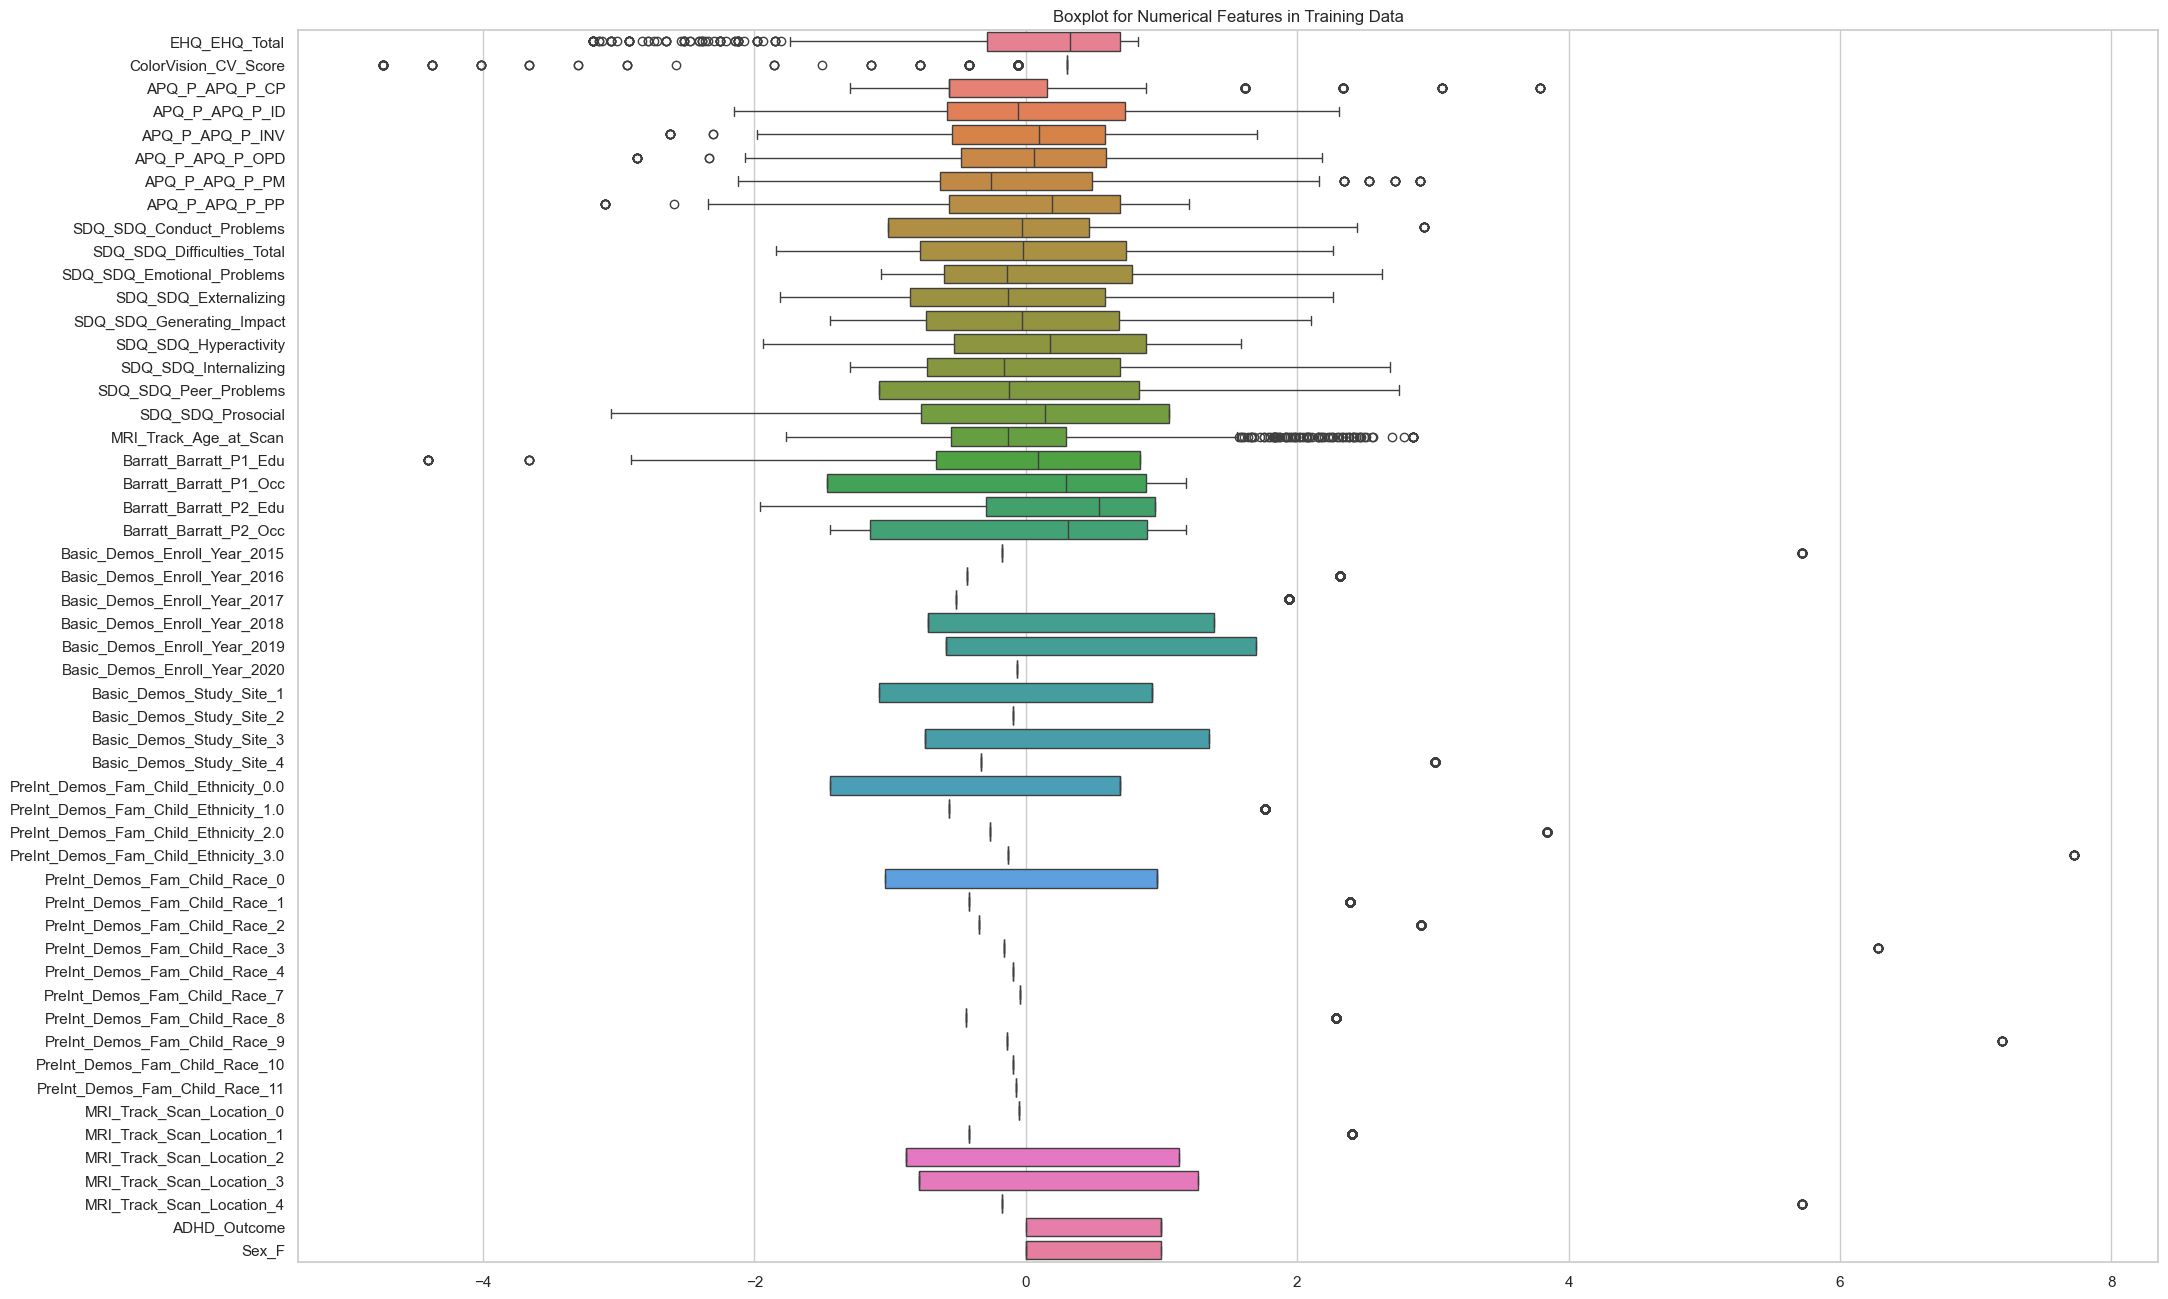

In [77]:
# Plot the boxplot for these 10 random columns
plt.figure(figsize=(24, 16))
sns.boxplot(data=train_data, orient='h')
plt.title("Boxplot for Numerical Features in Training Data")
plt.show()

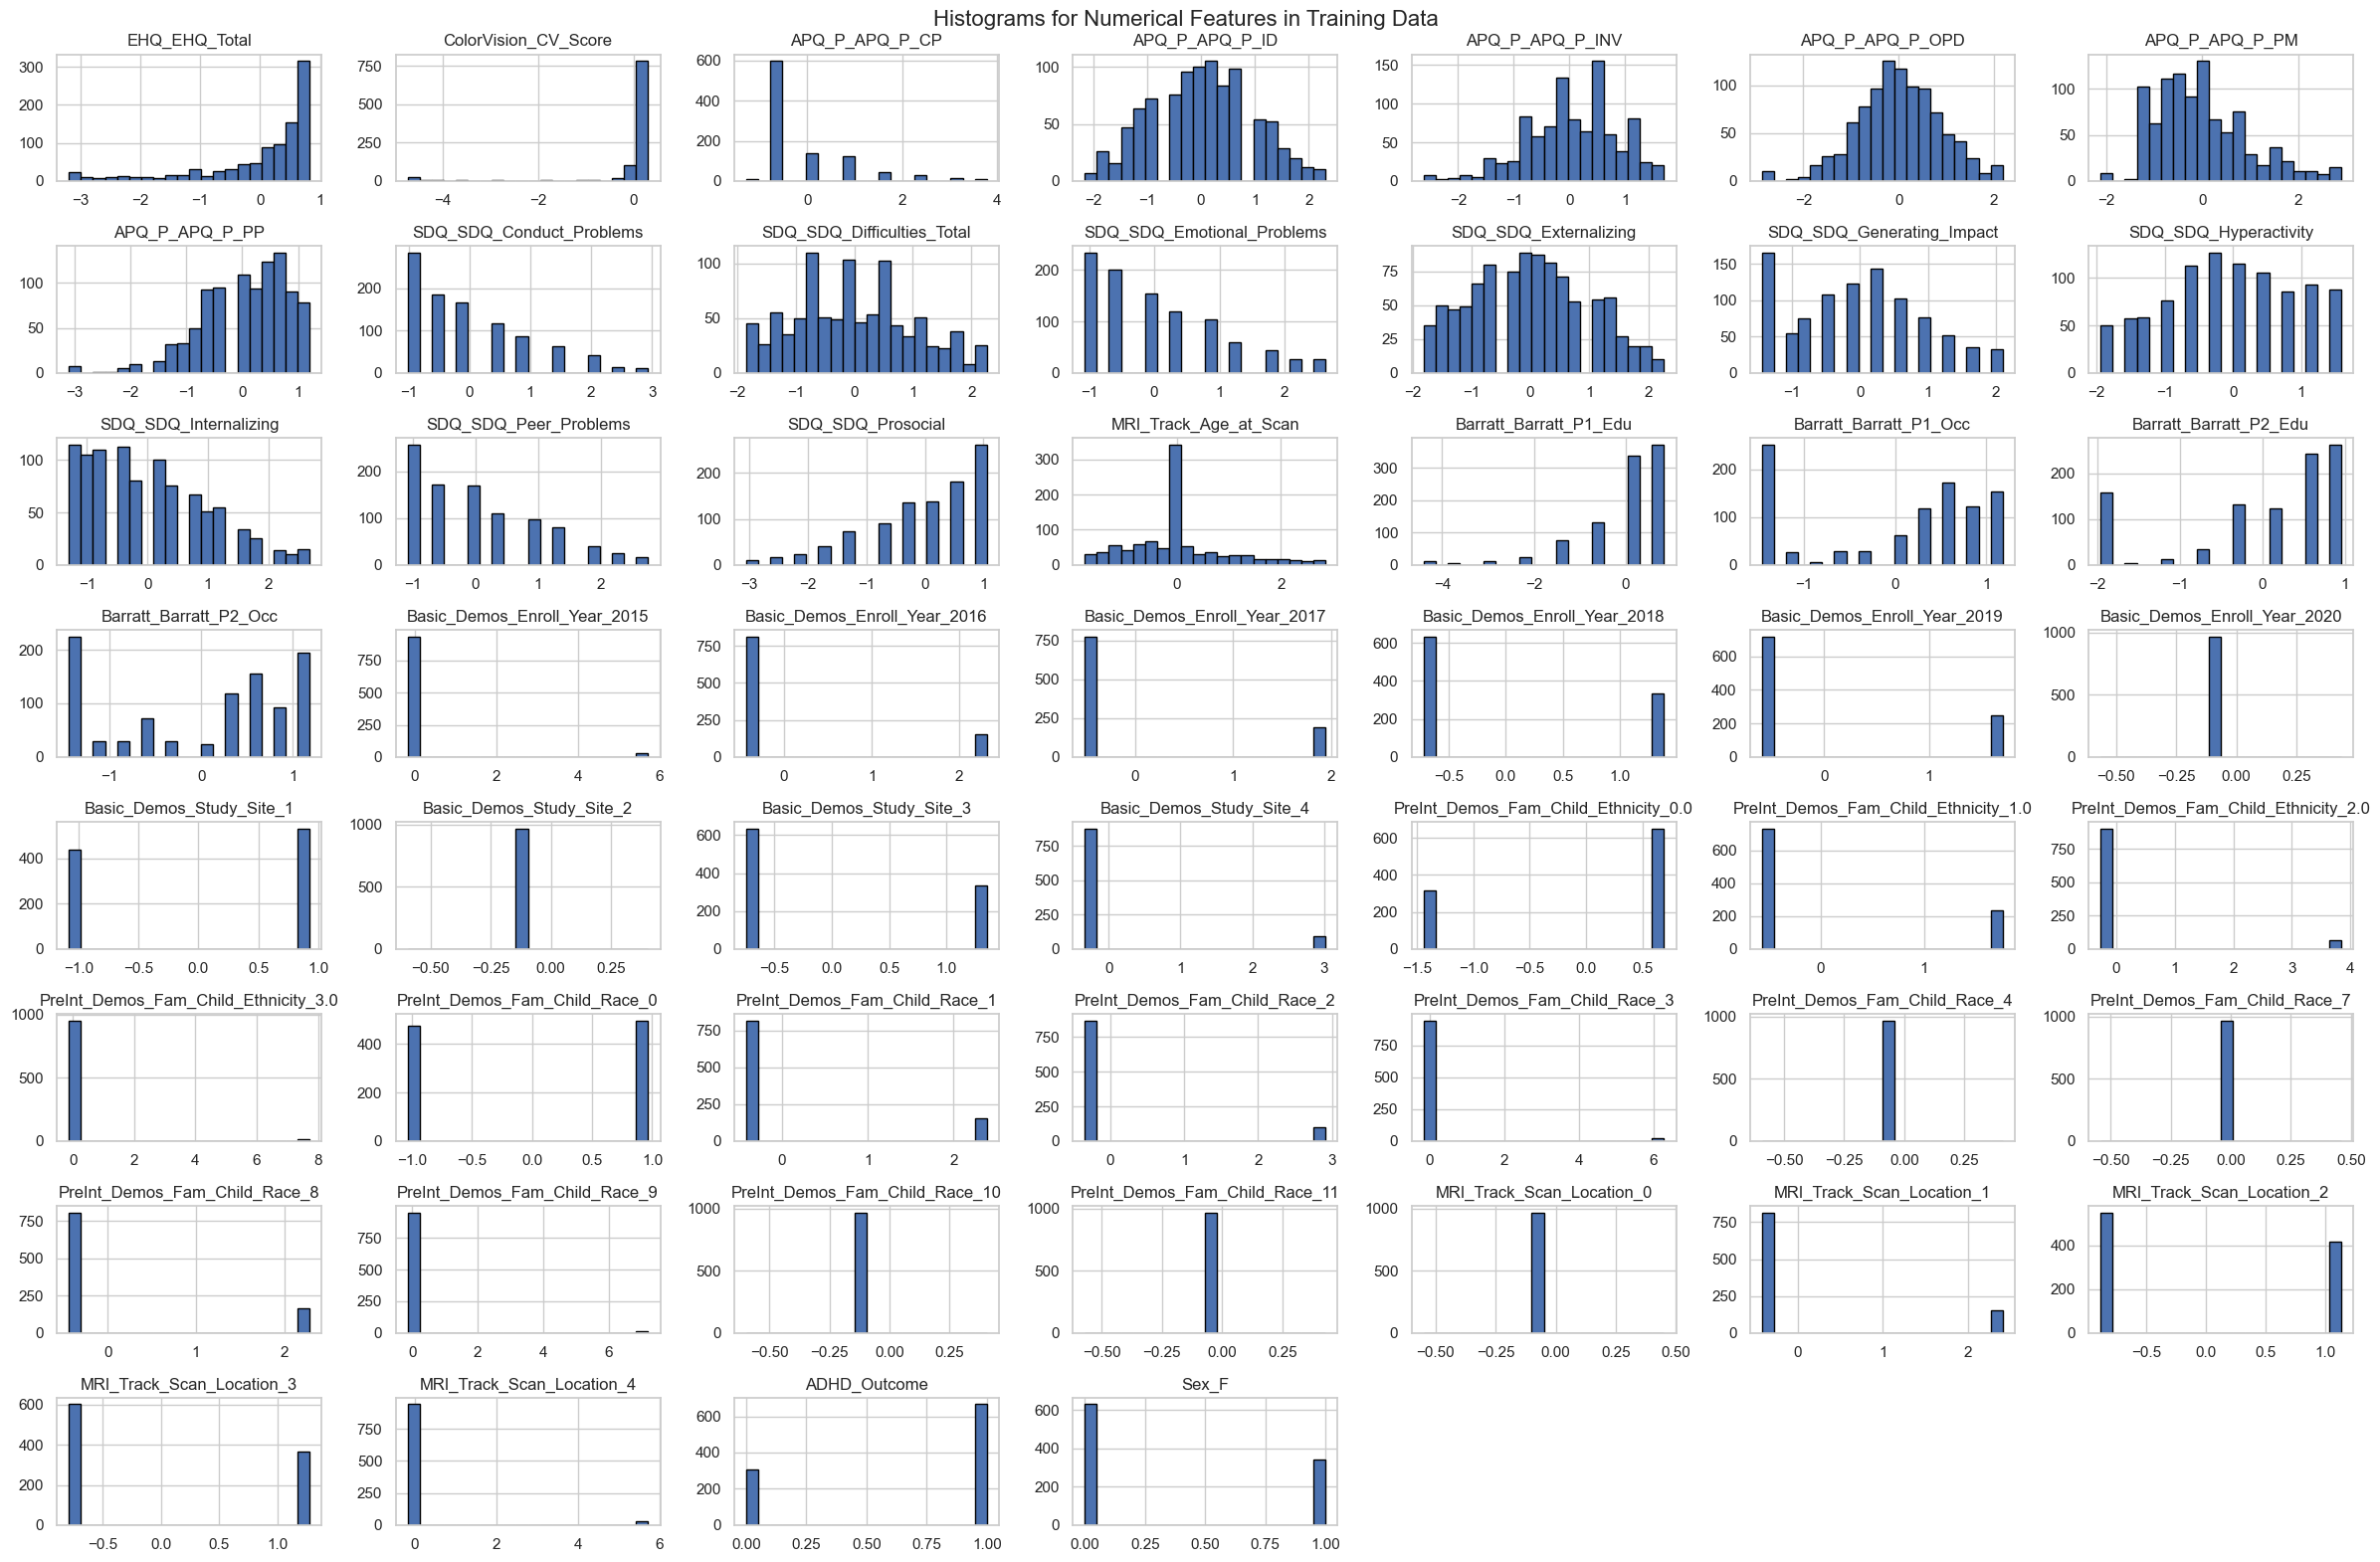

In [78]:
# Histograms for feature distributions
train_data.hist(figsize=(24,16), bins=20, edgecolor='black')
plt.suptitle("Histograms for Numerical Features in Training Data", fontsize=16)
plt.tight_layout()
plt.show()

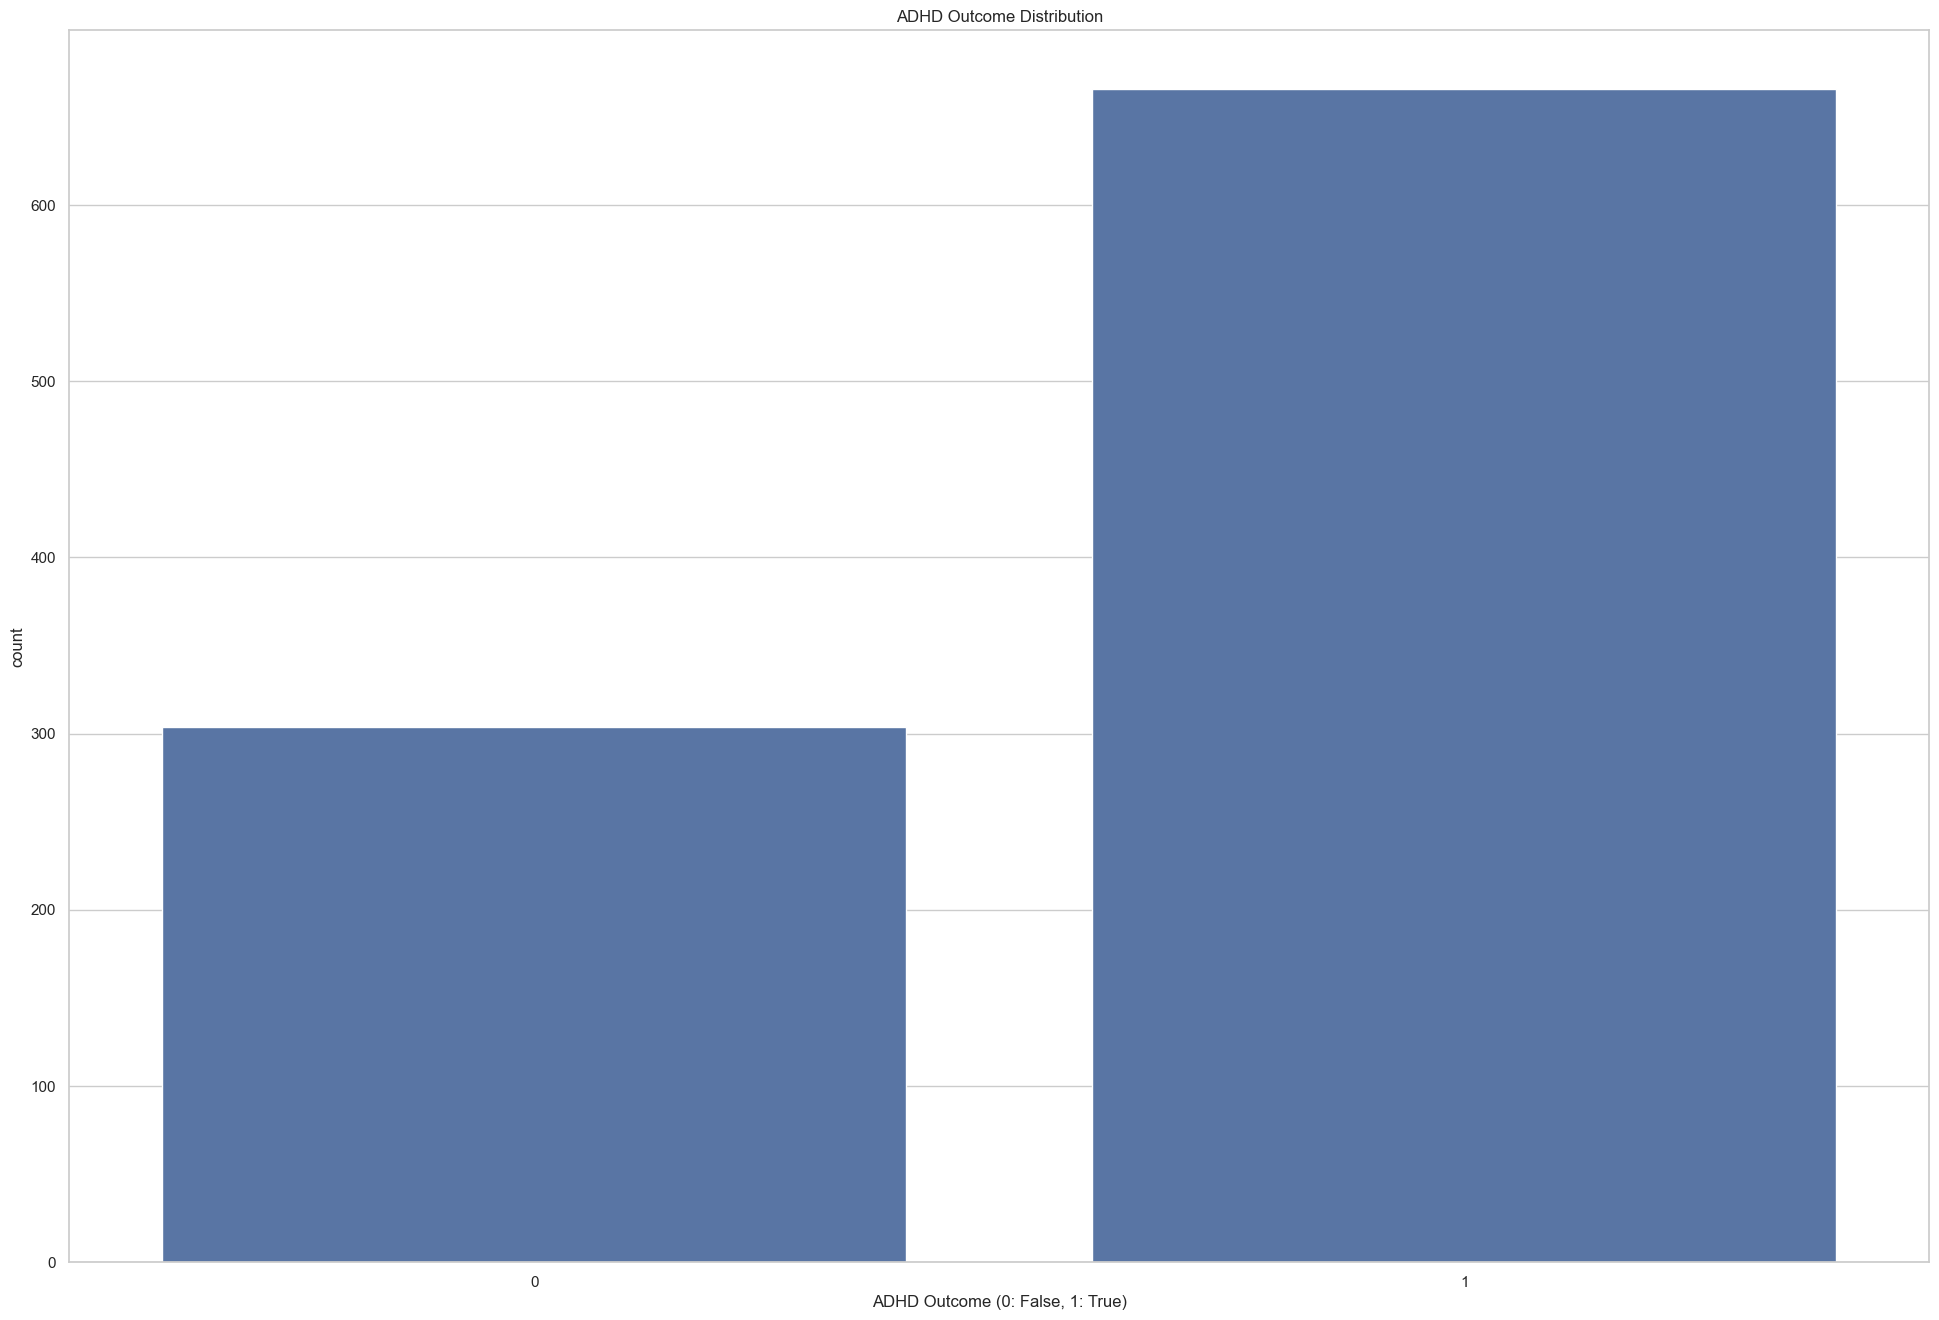

In [79]:
plt.figure(figsize=(24, 16))
sns.countplot(x='ADHD_Outcome', data=train_data)
plt.title("ADHD Outcome Distribution")
plt.xlabel('ADHD Outcome (0: False, 1: True)')
plt.show()

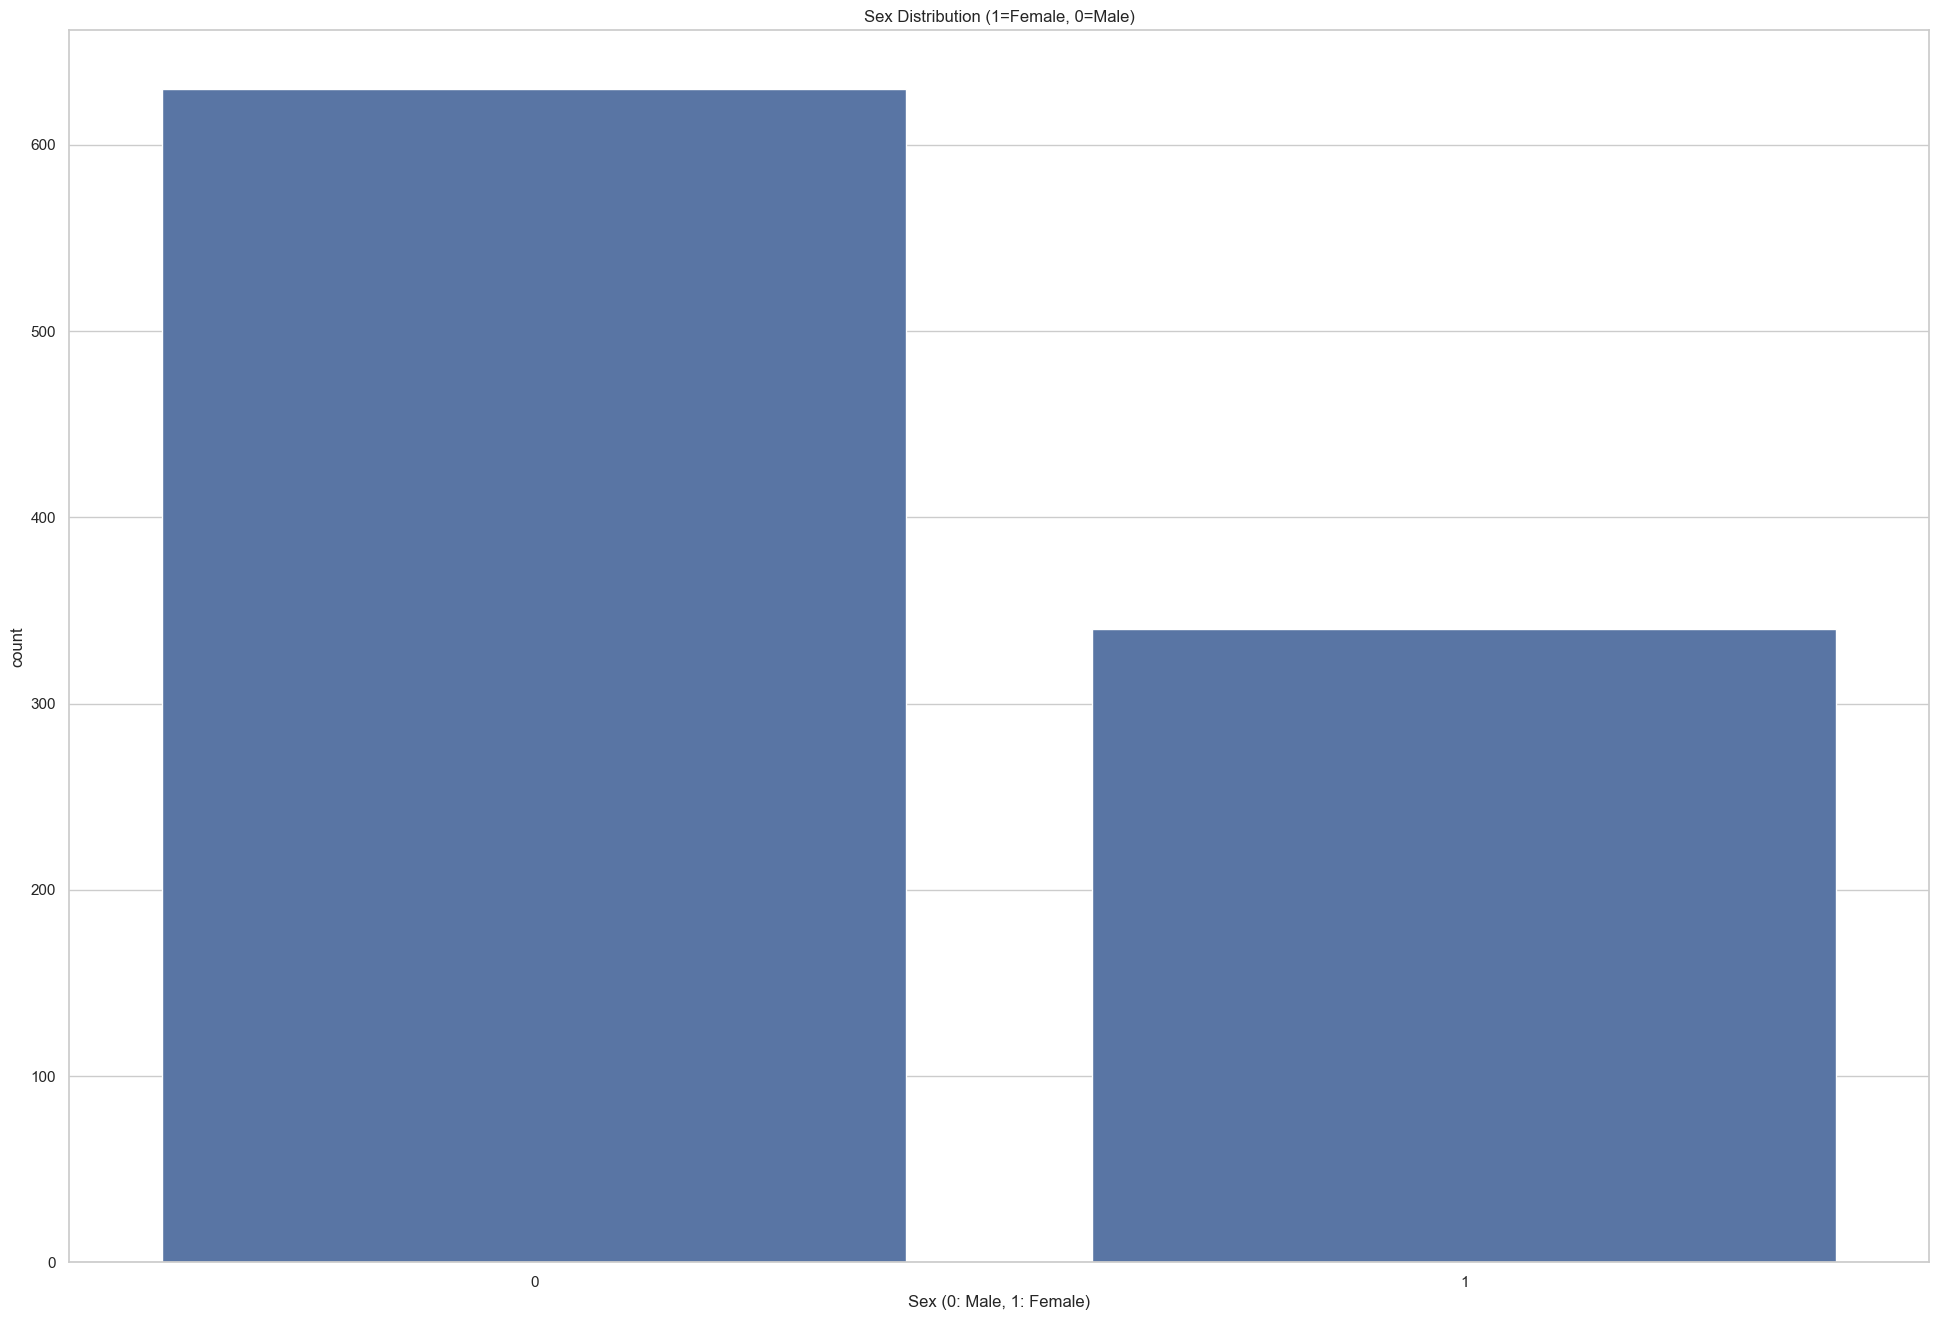

In [80]:
plt.figure(figsize=(24, 16))
sns.countplot(x='Sex_F', data=train_data)
plt.title("Sex Distribution (1=Female, 0=Male)")
plt.xlabel('Sex (0: Male, 1: Female)')
plt.show()

In [81]:
labels_crosstab(train_data)

No ADHD       ADHD
Male    27.460317  72.539683
Female  38.529412  61.470588

<Figure size 2400x1600 with 0 Axes>

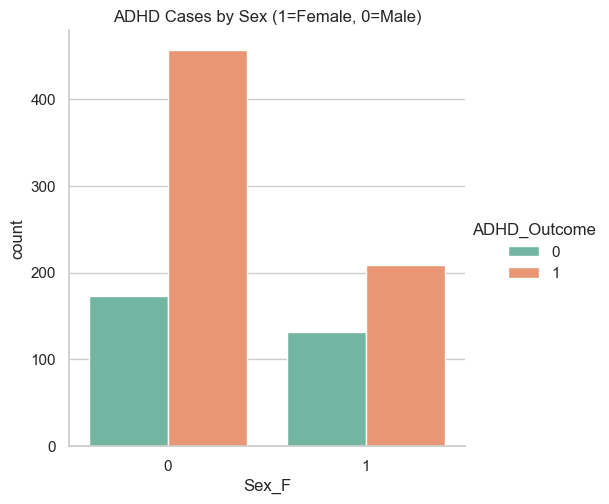

In [82]:
# Plot the joint distribution of ADHD_Outcome and Sex_F
plt.figure(figsize=(24, 16))
sns.catplot(x="Sex_F", hue="ADHD_Outcome", kind="count", data=train_data, palette="Set2")
plt.title("ADHD Cases by Sex (1=Female, 0=Male)")
plt.show()

### <span style="font-family: Century Gothic">Functional Connectodome</span>
#### <p style="font-family: Century Gothic; font-size: 15px">Purpose: Contains fMRI data (functional connectivity between brain regions).</p>
- <span style="font-family: Century Gothic; font-size: 15px">Inspect the file to understand the structure (e.g., rows = subjects, columns = brain region pairs).</span>
- <span style="font-family: Century Gothic; font-size: 15px">Check for missing values and inconsistencies.</span>
- <span style="font-family: Century Gothic; font-size: 15px">Normalize or standardize the data if necessary.</span>


In [83]:
df_fMRI.head()

participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.093473          0.146902          0.067893   
1   WHWymJu6zNZi          0.029580          0.179323          0.112933   
2   4PAQp1M6EyAo         -0.051580          0.139734          0.068295   
3   obEacy4Of68I          0.016273          0.204702          0.115980   
4   s7WzzDcmDOhF          0.065771          0.098714          0.097604   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.015141          0.070221          0.063997          0.055382   
1          0.038291          0.104899          0.064250          0.008488   
2          0.046991          0.111085          0.026978          0.151377   
3          0.043103          0.056431          0.057615          0.055773   
4          0.112988          0.071139          0.085607          0.019392   

   0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196thcolumn  \
0         -0.035335          0.068583  ...              0.003404   
1          0.077505         -0.004750  ...             -0.008409   
2          0.021198          0.083721  ...              0.053245   
3          0.075030          0.001033  ...             -0.023918   
4         -0.036403         -0.020375  ...              0.066439   

   195throw_197thcolumn  195throw_198thcolumn  195throw_199thcolumn  \
0             -0.010359             -0.050968             -0.014365   
1             -0.008479              0.020891              0.017754   
2             -0.028003              0.028773              0.024556   
3             -0.005356              0.018607              0.016193   
4             -0.076680             -0.047530             -0.031443   

   196throw_197thcolumn  196throw_198thcolumn  196throw_199thcolumn  \
0              0.128066              0.112646             -0.058980   
1              0.094040              0.035141              0.032537   
2              0.166343              0.058925              0.035485   
3              0.072955              0.130135              0.056120   
4              0.221213              0.007343              0.005763   

   197throw_198thcolumn  197throw_199thcolumn  198throw_199thcolumn  
0              0.028228              0.133582              0.143372  
1              0.075007              0.115350              0.138200  
2              0.063661              0.042862              0.162162  
3              0.084784              0.114148              0.190584  
4              0.083820              0.079582              0.067269  

[5 rows x 19901 columns]

In [84]:
np.mean(df_fMRI.isnull().sum())

np.float64(0.0)

In [85]:
df_fMRI.shape

(1213, 19901)

In [86]:
df_fMRI.describe()

0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  0throw_4thcolumn  \
count       1213.000000       1213.000000       1213.000000       1213.000000   
mean           0.060553          0.122315          0.060268          0.041287   
std            0.064178          0.054026          0.057495          0.043491   
min           -0.183279         -0.059932         -0.145566         -0.127827   
25%            0.018482          0.086102          0.026548          0.014457   
50%            0.058276          0.123220          0.061339          0.043246   
75%            0.100103          0.154518          0.099056          0.068408   
max            0.321522          0.390895          0.278429          0.189825   

       0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  0throw_8thcolumn  \
count       1213.000000       1213.000000       1213.000000       1213.000000   
mean           0.069722          0.091007          0.066852          0.000252   
std            0.044222          0.049189          0.046864          0.049046   
min           -0.072043         -0.079184         -0.105722         -0.164297   
25%            0.042462          0.057614          0.036934         -0.031358   
50%            0.067066          0.086494          0.067247          0.002549   
75%            0.096504          0.119404          0.095117          0.031053   
max            0.317500          0.316811          0.270018          0.168196   

       0throw_9thcolumn  0throw_10thcolumn  ...  195throw_196thcolumn  \
count       1213.000000        1213.000000  ...           1213.000000   
mean           0.014128          -0.002914  ...              0.011075   
std            0.038205           0.042462  ...              0.049632   
min           -0.137728          -0.148490  ...             -0.161666   
25%           -0.010635          -0.030538  ...             -0.021376   
50%            0.016130          -0.002604  ...              0.010254   
75%            0.038770           0.024507  ...              0.044165   
max            0.145364           0.128301  ...              0.194616   

       195throw_197thcolumn  195throw_198thcolumn  195throw_199thcolumn  \
count           1213.000000           1213.000000           1213.000000   
mean              -0.004938             -0.004378              0.001610   
std                0.046536              0.042900              0.047424   
min               -0.176523             -0.178688             -0.138048   
25%               -0.033424             -0.033798             -0.030132   
50%               -0.004683             -0.003724              0.000990   
75%                0.024913              0.024007              0.032268   
max                0.183152              0.180562              0.192015   

       196throw_197thcolumn  196throw_198thcolumn  196throw_199thcolumn  \
count           1213.000000           1213.000000           1213.000000   
mean               0.115171              0.049984              0.058144   
std                0.057128              0.051664              0.057674   
min               -0.070094             -0.153540             -0.131455   
25%                0.080291              0.015827              0.022316   
50%                0.113640              0.052705              0.059151   
75%                0.150524              0.082526              0.095192   
max                0.375635              0.228748              0.322084   

       197throw_198thcolumn  197throw_199thcolumn  198throw_199thcolumn  
count           1213.000000           1213.000000           1213.000000  
mean               0.093527              0.089403              0.128946  
std                0.054594              0.058036              0.058490  
min               -0.085566             -0.204160             -0.083077  
25%                0.059621              0.053224              0.090459  
50%                0.093397              0.088612              0.127913  
75%                

In [87]:
df_fMRI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


In [88]:
# Assuming your data is in a DataFrame `df_matric`
# Step 1: Check and remove object (non-numeric) columns
df_fMRI_num = df_fMRI.select_dtypes(include=['int64', 'float64'])

# Step 2: Calculate min and max values for numeric columns
min_value = df_fMRI_num.min().min()  # Minimum value across all numeric columns
max_value = df_fMRI_num.max().max()  # Maximum value across all numeric columns

print(f"Minimum value in the numeric dataset: {min_value}")
print(f"Maximum value in the numeric dataset: {max_value}")

Minimum value in the numeric dataset: -0.3768035681279196
Maximum value in the numeric dataset: 0.7390653502697623


<span style="font-family: Century Gothic; font-size: 15px"> Since `Functional Connectodome` is between `-1` and `1` no scaling is required. </span>

In [89]:
data = df_fMRI.copy()
data = data.drop(columns=['participant_id'])

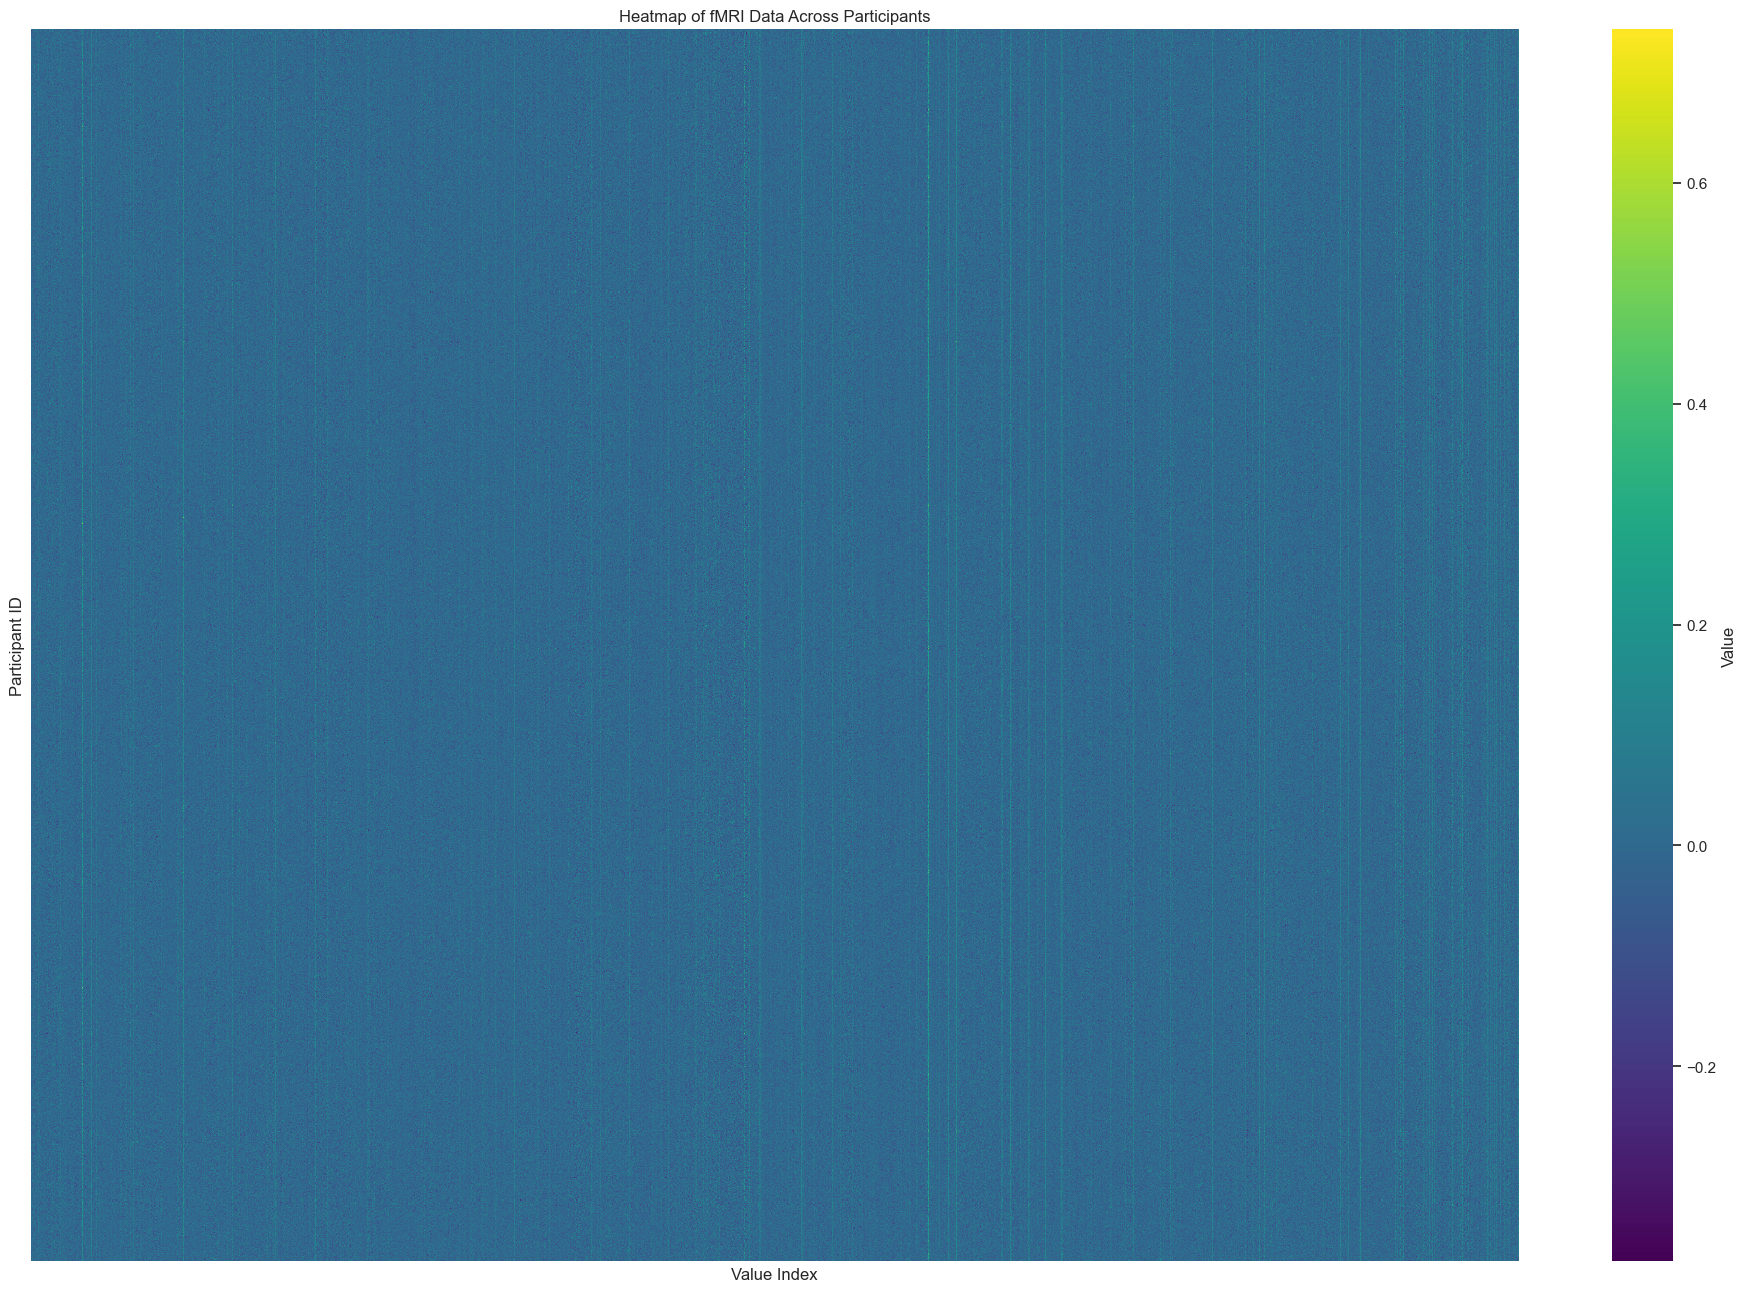

In [90]:
plt.figure(figsize=(24, 16))
sns.heatmap(data, cmap='viridis', cbar_kws={'label': 'Value'}, xticklabels=False, yticklabels=False)
plt.title('Heatmap of fMRI Data Across Participants')
plt.xlabel('Value Index')
plt.ylabel('Participant ID')
plt.show()

#### <p style="font-family: Century Gothic; font-size: 15px">Dimensionality Reduction (PCA)</p>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23232\815646926.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_components[:, 0], pca_components[:, 1], cmap='viridis')


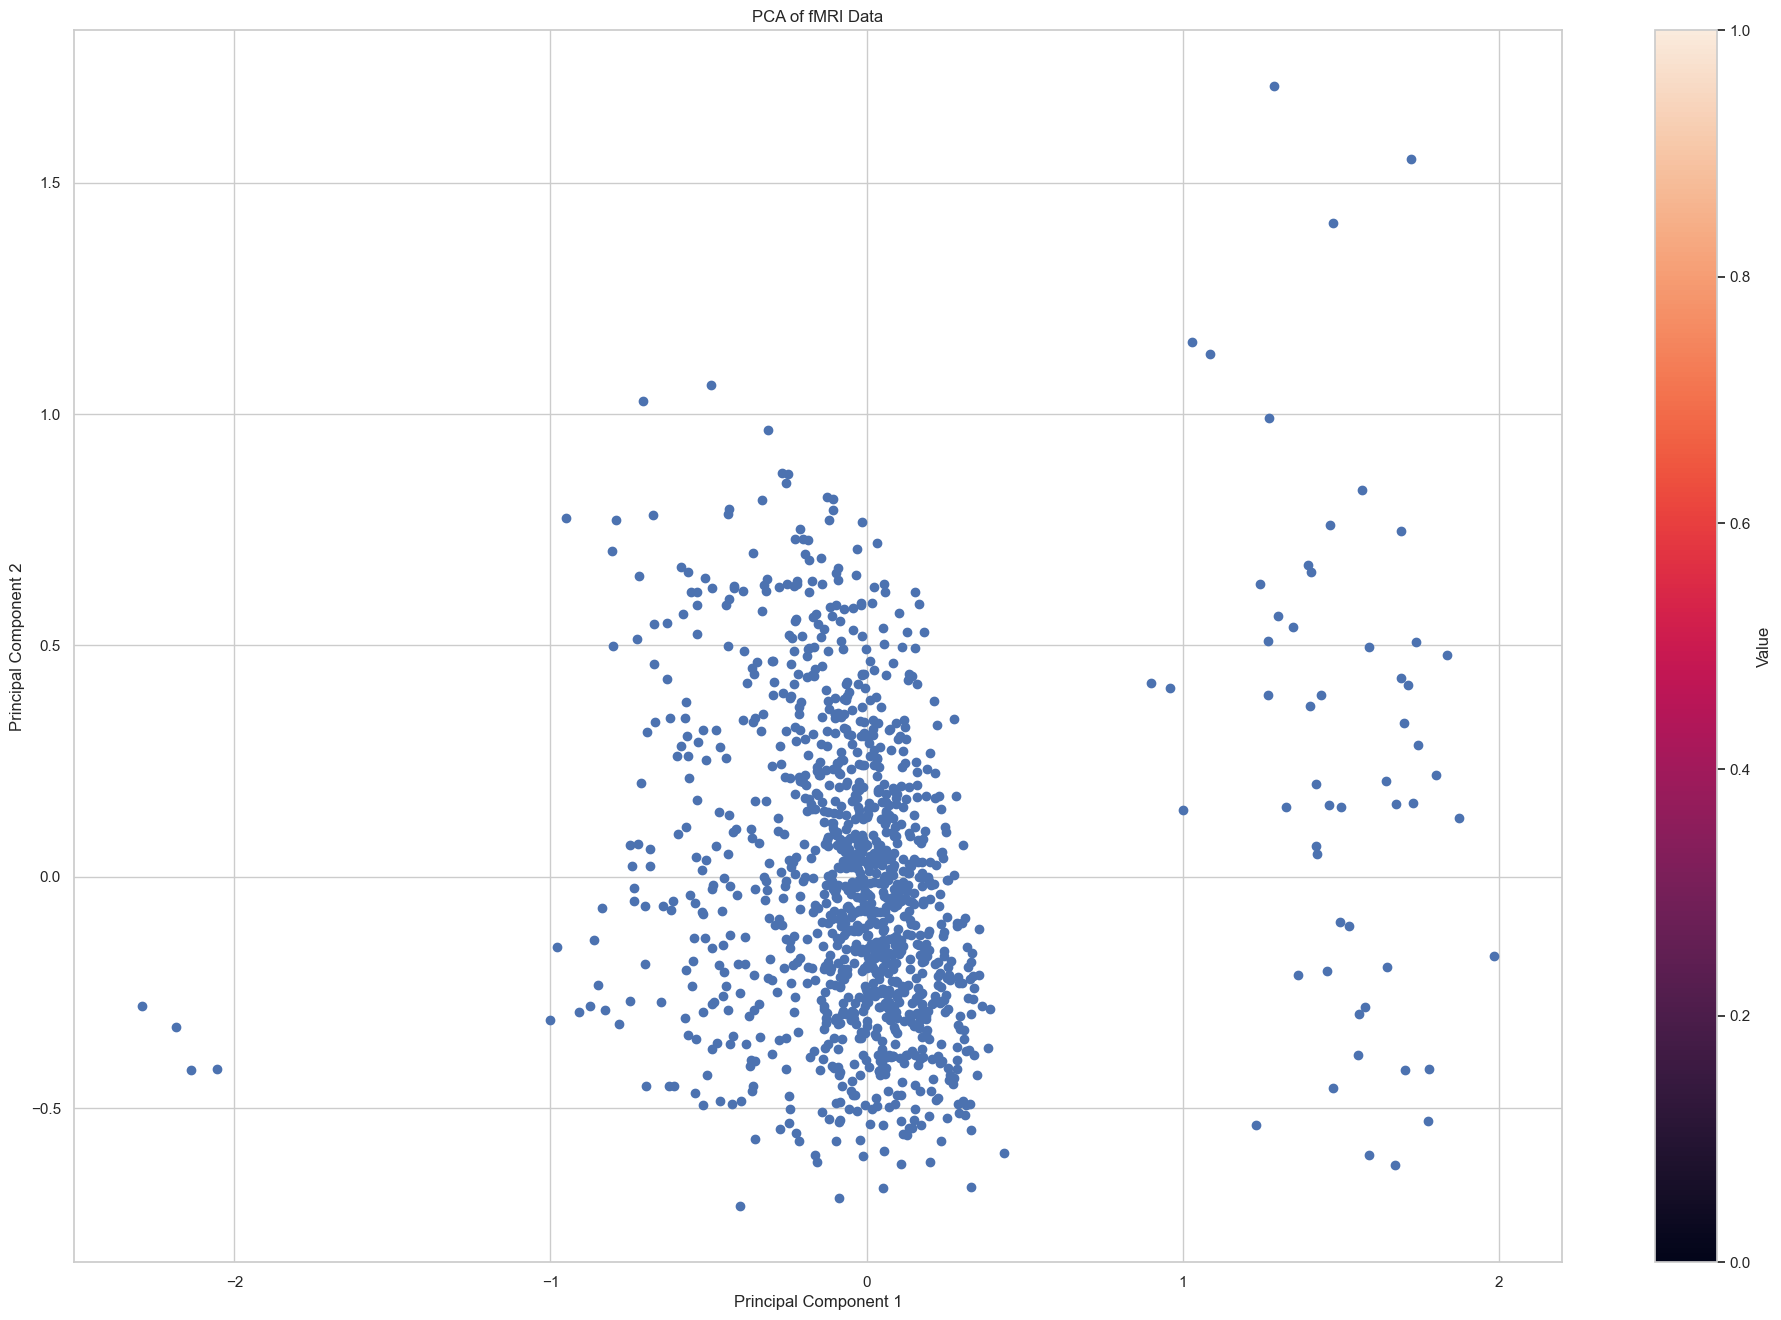

In [91]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data)

plt.figure(figsize=(24, 16))
plt.scatter(pca_components[:, 0], pca_components[:, 1], cmap='viridis')
plt.title('PCA of fMRI Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Value')
plt.show()

#### <p style="font-family: Century Gothic; font-size: 15px">Visualizing Data Distribution</p>

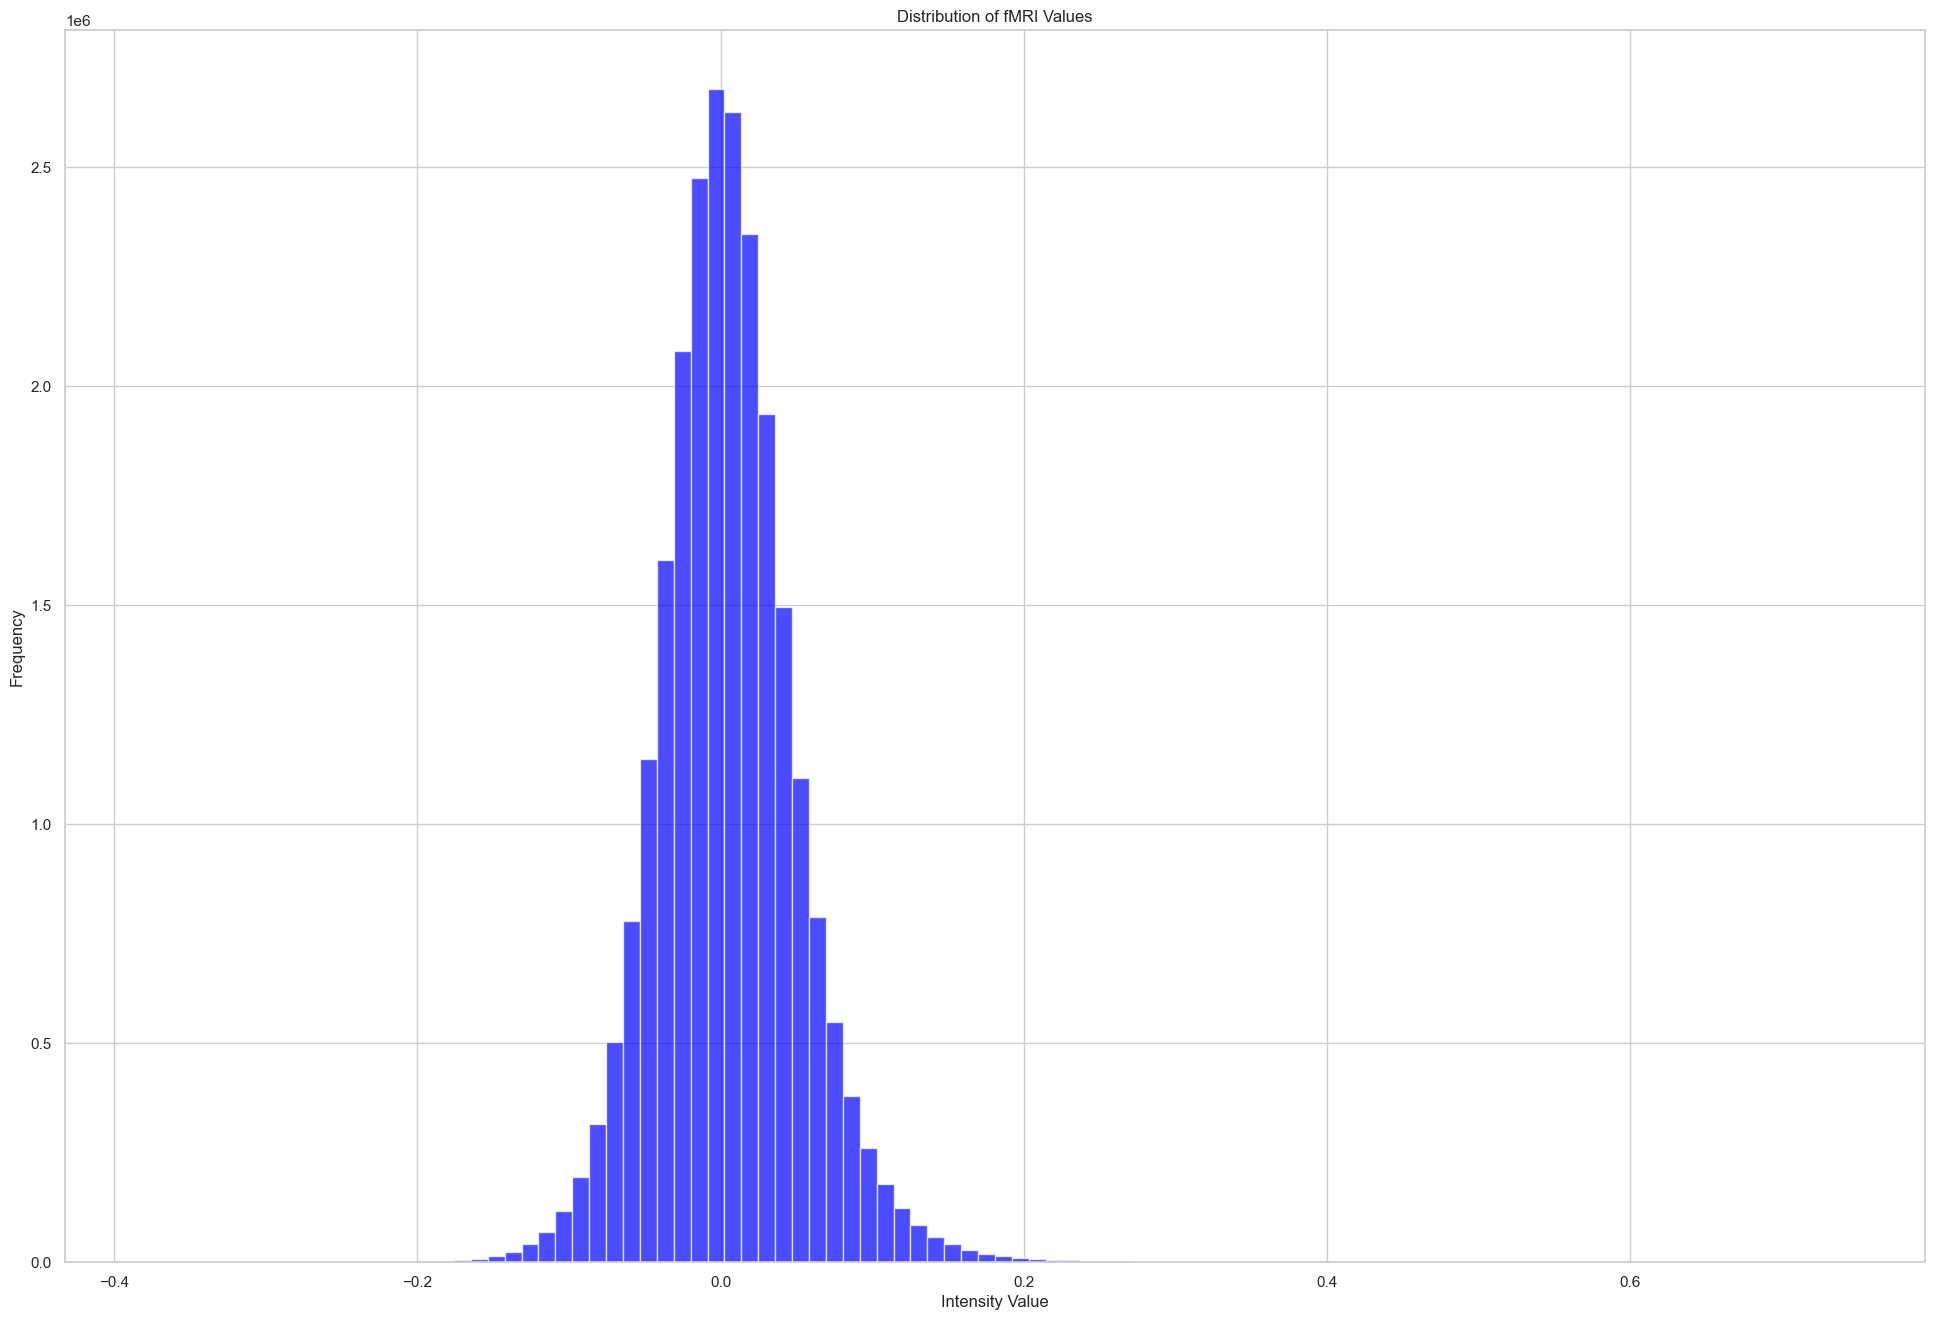

In [92]:
plt.figure(figsize=(24, 16))
plt.hist(data.values.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Distribution of fMRI Values')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

#### <p style="font-family: Century Gothic; font-size: 15px">Plotting Activity Across Selected Participants</p> 

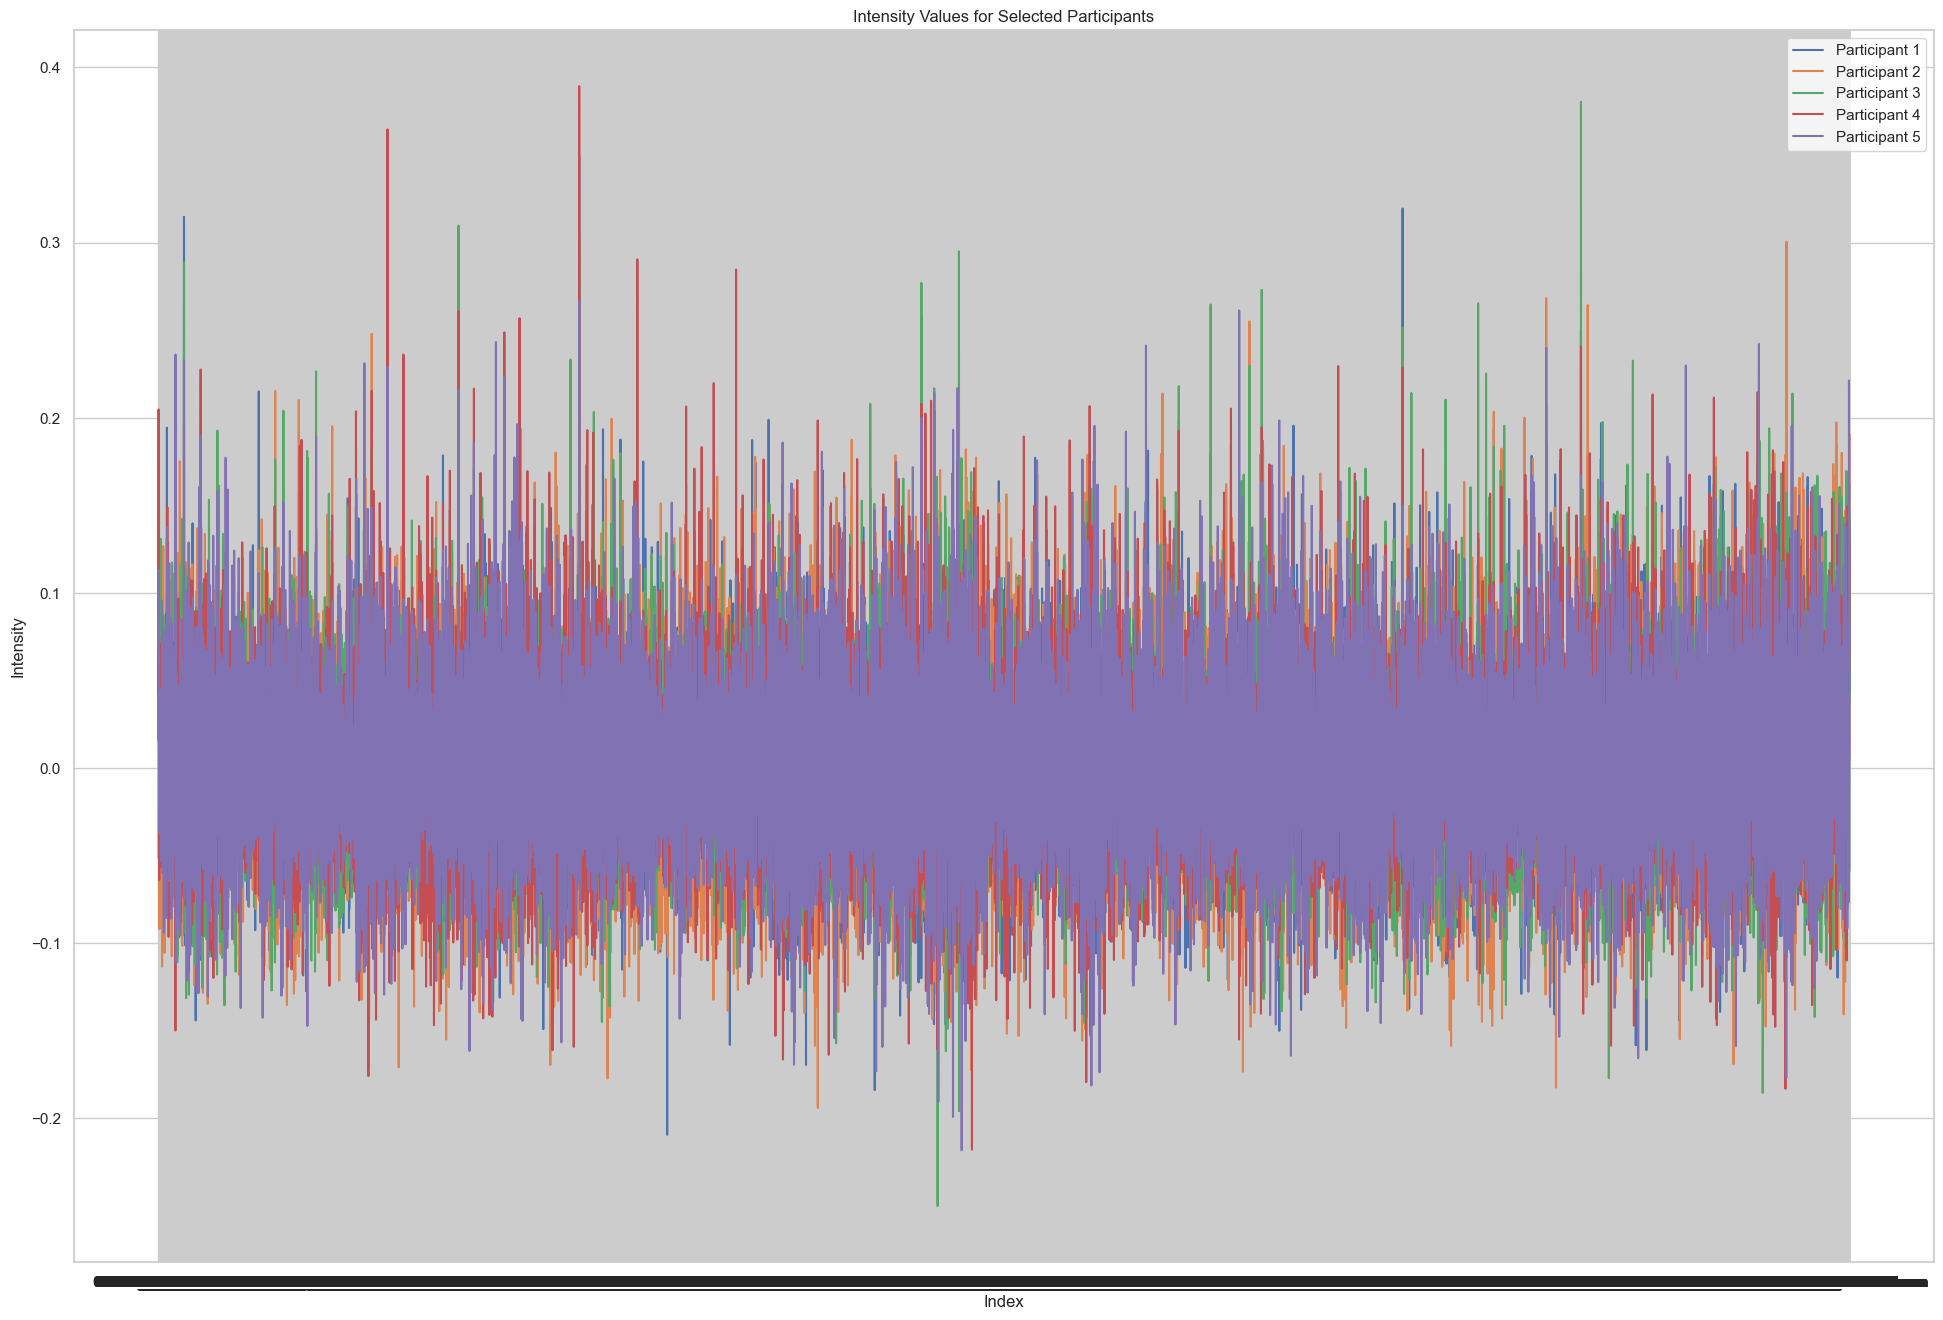

In [93]:
# Select a few participants (e.g., first 5 participants)
selected_participants = data.iloc[:5, :]

plt.figure(figsize=(24, 16))
for i in range(selected_participants.shape[0]):
    plt.plot(selected_participants.iloc[i], label=f'Participant {i+1}')

plt.title('Intensity Values for Selected Participants')
plt.xlabel('Index')
plt.ylabel('Intensity')
plt.legend()
plt.show()

#### <p style="font-family: Century Gothic; font-size: 15px">Feature Selection with Lasso</p>

In [94]:
# Lasso classification
# Hint: https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel

df_fMRI_orig = df_fMRI.copy()
df_fMRI_orig = pd.merge(df_fMRI_orig, df_labels, on='participant_id', how='outer')

In [100]:
df_fMRI_orig.head()

participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   00aIpNTbG5uh          0.047912          0.147614          0.035215   
1   00fV0OyyoLfw         -0.003560          0.131635          0.067454   
2   04X1eiS79T4B         -0.076074          0.162668          0.050365   
3   05ocQutkURd6          0.054913          0.160764          0.150480   
4   06YUNBA9ZRLq          0.100683          0.103170          0.046506   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.041143          0.070673          0.080293          0.063638   
1          0.073367          0.013845          0.198074          0.038971   
2          0.035320          0.055263          0.047298          0.155932   
3          0.113151          0.135581          0.118498          0.032319   
4          0.127893          0.075231          0.019648          0.116546   

   0throw_8thcolumn  0throw_9thcolumn  ...  195throw_198thcolumn  \
0         -0.016682          0.043650  ...             -0.031380   
1         -0.109366         -0.034447  ...              0.038632   
2          0.012768          0.084281  ...              0.013774   
3         -0.078683         -0.013995  ...             -0.075685   
4          0.035825          0.044905  ...             -0.005693   

   195throw_199thcolumn  196throw_197thcolumn  196throw_198thcolumn  \
0              0.032986              0.081980              0.093708   
1             -0.042040              0.125651              0.127045   
2             -0.057094              0.084471              0.075582   
3             -0.029209              0.087122              0.009254   
4             -0.001515              0.166933              0.005170   

   196throw_199thcolumn  197throw_198thcolumn  197throw_199thcolumn  \
0              0.021903              0.029458             -0.016072   
1              0.142448              0.051943              0.138729   
2              0.093687              0.091592              0.114817   
3              0.114800              0.218728              0.090305   
4              0.005126              0.126259             -0.038223   

   198throw_199thcolumn  ADHD_Outcome  Sex_F  
0              0.169368             1      0  
1              0.168951             1      0  
2              0.157812             0      1  
3              0.159943             0      1  
4              0.181322             1      0  

[5 rows x 19903 columns]

In [102]:
df_fMRI_orig.to_csv('Cleaned_fMRI.csv', index=False)
print("Preprocessing Complete. Cleaned data saved as 'Cleaned_fMRI.csv'")

Preprocessing Complete. Cleaned data saved as 'Cleaned_fMRI.csv'


In [ ]:
lasso_regularization(df_fMRI_orig, "ADHD_Outcome")

Selected features with C=1
['ADHD_Outcome']
Number of selected features: 1

Selected features with C=0.5
['ADHD_Outcome']
Number of selected features: 1



In [ ]:
lasso_regularization(df_fMRI_orig, "Sex_F")

Selected features with C=1
['ADHD_Outcome' 'Sex_F']
Number of selected features: 2

Selected features with C=0.5
['Sex_F']
Number of selected features: 1



#### <p style="font-family: Century Gothic; font-size: 15px">Kernel PCA for Non-Linear Patterns</p>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30180\3387122059.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], cmap='viridis')


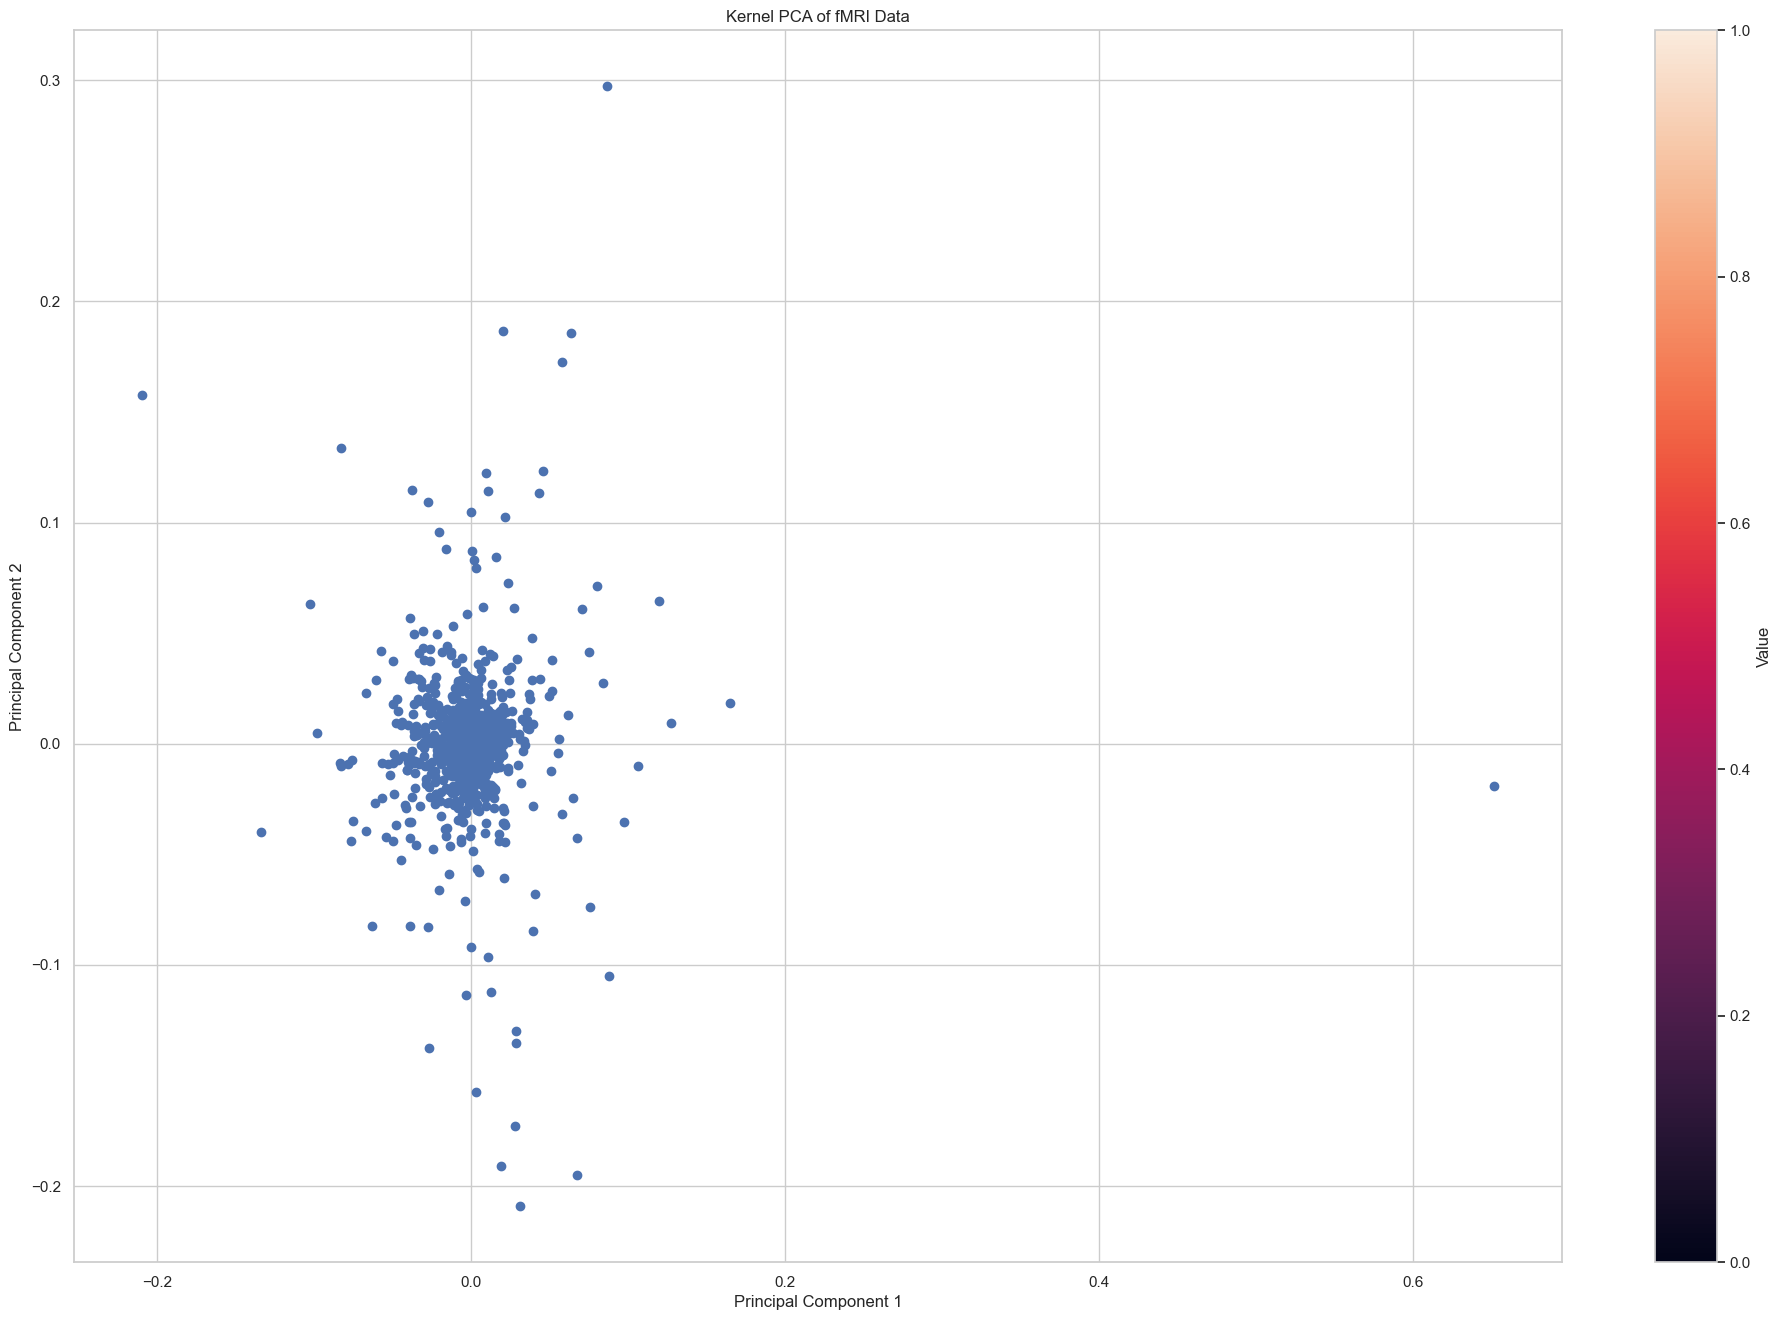

In [ ]:
kpca = KernelPCA(kernel='rbf', gamma=2, n_components=2)
X_kpca = kpca.fit_transform(data)

plt.figure(figsize=(24, 16))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], cmap='viridis')
plt.title('Kernel PCA of fMRI Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Value')
plt.show()